In [1]:
!pip install pandas google-cloud-storage pyarrow fsspec gcsfs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.4/72.4 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.9/174.9 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.7/40.7 MB 4.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 4.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 5.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.1/160.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.1/216.1 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.8/314.8 kB 3.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.5/294.5 kB 3.5 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 3.3 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 4.8 MB/s eta 0:00

In [1]:
import pandas as pd
# 빠른 연결 테스트용
import os
from google.cloud import storage

# .env 파일이 docker-compose.yaml의 env_file로 로드되므로
# 환경 변수가 이미 설정되어 있음!

try:
    # 환경 변수 확인
    print(f"키 파일 경로: {os.environ.get('GOOGLE_APPLICATION_CREDENTIALS')}")
    
    # 바로 사용 가능
    client = storage.Client()
    print(f"✅ 연결 성공! 프로젝트: {client.project}")
    
    buckets = list(client.list_buckets())
    print(f"버킷 개수: {len(buckets)}")
    
    # 버킷 목록
    for bucket in buckets:
        print(f"  - {bucket.name}")
        
except Exception as e:
    print(f"❌ 연결 실패: {e}")

키 파일 경로: /home/jovyan/work/secrets/google_cloud_storage_hojae.json
✅ 연결 성공! 프로젝트: sprintda05-hojae2
버킷 개수: 1
  - sprintda05_final_project


In [27]:
import os
import pandas as pd
from google.cloud import storage

# GCS에서 Parquet 파일 불러오기 및 형식 확인
print("\n--- 2. GCS Parquet 파일 로드 및 형식 확인 ---")
gcs_parquet_path = "gs://sprintda05_final_project/hackle/hackle_events.parquet"

print(f"📂 다음 Parquet 파일을 불러옵니다: {gcs_parquet_path}")

# pandas를 사용하여 Parquet 파일 불러오기
# 'engine'을 'pyarrow'로 명시하여 확실하게 pyarrow 사용
# gcsfs가 설치되어 있다면 pandas는 gs:// 경로를 자동으로 처리
hackle_events = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n✅ Parquet 파일 로드 성공!")

print("\n--- 데이터프레임 상위 5개 행 (hackle_events.head()) ---")
print(hackle_events.head())

print("\n--- 데이터프레임 정보 (hackle_events.info()) ---")
# 각 컬럼의 이름, Non-Null 개수, 데이터 타입(Dtype) 확인
hackle_events.info()

print("\n--- 데이터프레임 기술 통계 (hackle_events.describe()) ---")
# 숫자형 컬럼에 대한 통계 정보 확인
print(hackle_events.describe(include='all')) # 모든 컬럼 타입 포함

print(f"\n--- 데이터프레임 행과 열 개수 (hackle_events.shape): {hackle_events.shape} ---")

print("\n--- 데이터프레임 컬럼 목록 (hackle_events.columns) ---")
print(hackle_events.columns.tolist())


--- 2. GCS Parquet 파일 로드 및 형식 확인 ---
📂 다음 Parquet 파일을 불러옵니다: gs://sprintda05_final_project/hackle/hackle_events.parquet

✅ Parquet 파일 로드 성공!

--- 데이터프레임 상위 5개 행 (hackle_events.head()) ---
                               event_id      event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e 2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06 2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53 2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2 2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiG

In [28]:
import os
import pandas as pd
from google.cloud import storage

# GCS에서 Parquet 파일 불러오기 및 형식 확인
print("\n--- 2. GCS Parquet 파일 로드 및 형식 확인 ---")
gcs_parquet_path = "gs://sprintda05_final_project/hackle/user_properties.parquet"

print(f"📂 다음 Parquet 파일을 불러옵니다: {gcs_parquet_path}")

# pandas를 사용하여 Parquet 파일 불러오기
# 'engine'을 'pyarrow'로 명시하여 확실하게 pyarrow 사용
# gcsfs가 설치되어 있다면 pandas는 gs:// 경로를 자동으로 처리
user_properties = pd.read_parquet(gcs_parquet_path, engine='pyarrow')

print("\n✅ Parquet 파일 로드 성공!")

print("\n--- 데이터프레임 상위 5개 행 (user_properties.head()) ---")
print(user_properties.head())

print("\n--- 데이터프레임 정보 (user_properties.info()) ---")
# 각 컬럼의 이름, Non-Null 개수, 데이터 타입(Dtype) 확인
user_properties.info()

print("\n--- 데이터프레임 기술 통계 (user_properties.describe()) ---")
# 숫자형 컬럼에 대한 통계 정보 확인
print(user_properties.describe(include='all')) # 모든 컬럼 타입 포함

print(f"\n--- 데이터프레임 행과 열 개수 (user_properties.shape): {user_properties.shape} ---")

print("\n--- 데이터프레임 컬럼 목록 (user_properties.columns) ---")
print(user_properties.columns.tolist())


--- 2. GCS Parquet 파일 로드 및 형식 확인 ---
📂 다음 Parquet 파일을 불러옵니다: gs://sprintda05_final_project/hackle/user_properties.parquet

✅ Parquet 파일 로드 성공!

--- 데이터프레임 상위 5개 행 (user_properties.head()) ---
   user_id  class gender  grade  school_id
0  1000000      1      M      1       1885
1  1000009     10      F      2       3869
2  1000012     10      F      1       5091
3  1000013      8      F      2       1743
4  1000015      2      F      3       5078

--- 데이터프레임 정보 (user_properties.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB

--- 데이터프레임 기술 통계 (user_properties.describe()) ---
        user_i

In [ ]:
display(user_properties)


,user_id,class,gender,grade,school_id
0,1000000,1,M,1,1885
1,1000009,10,F,2,3869
2,1000012,10,F,1,5091
3,1000013,8,F,2,1743
4,1000015,2,F,3,5078
...,...,...,...,...,...
230814,999992,1,M,2,2240
230815,999996,5,M,2,365
230816,999997,2,M,3,2502
230817,nhj4wh46MAf5K0IHDu4DGyRsdWn2,5,F,2,3499


# 🔍 명세서 모호 부분 정의

## 해결할 모호한 점들

### accounts_blockrecord
- ❓ "차단 후 차단 해제는 없다. 왜?" → **실제로 해제 기능이 없는지 확인**
- ❓ 차단 이유 목록이 정확한가? → **실제 데이터의 reason 값들 확인**

### accounts_nearbyschool  
- ❓ "거리 기준이 뭔지?" → **distance 단위와 최대값 확정**
- ❓ "반경 50km 내부 추측" → **실제로 50km가 기준인지 확인**

## 데이터 로드

In [3]:
import pandas as pd
import numpy as np

# 데이터 로드
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")
df_nearby = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_nearbyschool.parquet")

### 차단 해제 여부 확정

In [4]:
# 🚫 차단 해제 기능 존재 여부 확정
print("=" * 50)
print("🔍 차단 해제 기능 존재 여부")
print("=" * 50)

# 동일 사용자 쌍의 중복 차단 확인
duplicate_pairs = df_block.groupby(['user_id', 'block_user_id']).size()
repeated_blocks = duplicate_pairs[duplicate_pairs > 1]

print(f"총 차단 관계: {len(df_block):,}건")
print(f"고유 차단 쌍: {len(duplicate_pairs):,}쌍")
print(f"중복 차단 쌍: {len(repeated_blocks):,}쌍")

if len(repeated_blocks) == 0:
    print("\n✅ 결론: 차단 해제 기능 없음 (또는 해제 시 기록 삭제)")
    print("   → 동일 사용자 쌍의 중복 차단이 전혀 없음")
else:
    print(f"\n⚠️  결론: 차단 해제 후 재차단 가능")
    print(f"   → {len(repeated_blocks)}쌍이 여러 번 차단됨")
    print(f"   → 최대 {repeated_blocks.max()}번 차단")

🔍 차단 해제 기능 존재 여부
총 차단 관계: 19,482건
고유 차단 쌍: 18,505쌍
중복 차단 쌍: 548쌍

⚠️  결론: 차단 해제 후 재차단 가능
   → 548쌍이 여러 번 차단됨
   → 최대 20번 차단


## 차단 사유 정확한 목록 확정

In [5]:
# 🚫 차단 사유 정확한 목록 확정  
print("=" * 50)
print("🔍 차단 사유 정확한 목록")
print("=" * 50)

actual_reasons = df_block['reason'].unique()
reason_counts = df_block['reason'].value_counts()

print("📋 실제 데이터의 차단 사유:")
for i, reason in enumerate(actual_reasons, 1):
    count = reason_counts[reason]
    pct = count / len(df_block) * 100
    print(f"{i:2d}. '{reason}' - {count:,}건 ({pct:.1f}%)")

print(f"\n총 {len(actual_reasons)}개 사유")

# 명세서와 비교
spec_reasons = ['그냥...', '친구 사이가 어색해짐', '나랑 관련 없는 질문을 자꾸 보냄', 
                '기타', '모르는 사람임', '너무 많은 양의 질문을 보냄', '사칭 계정']

print(f"\n🔍 명세서 사유 개수: {len(spec_reasons)}개")
print(f"실제 데이터 사유 개수: {len(actual_reasons)}개")

missing_in_spec = set(actual_reasons) - set(spec_reasons)
missing_in_data = set(spec_reasons) - set(actual_reasons) 

if missing_in_spec:
    print(f"\n⚠️  명세서에 없는 사유: {list(missing_in_spec)}")
if missing_in_data:
    print(f"⚠️  데이터에 없는 사유: {list(missing_in_data)}")
if not missing_in_spec and not missing_in_data:
    print("\n✅ 명세서와 실제 데이터 일치")

🔍 차단 사유 정확한 목록
📋 실제 데이터의 차단 사유:
 1. '그냥...' - 6건 (0.0%)
 2. '친구 사이가 어색해짐' - 5,805건 (29.8%)
 3. '나랑 관련 없는 질문을 자꾸 보냄' - 1,083건 (5.6%)
 4. '기타' - 7건 (0.0%)
 5. '모르는 사람임' - 9,640건 (49.5%)
 6. '너무 많은 양의 질문을 보냄' - 919건 (4.7%)
 7. '사칭 계정' - 2,022건 (10.4%)

총 7개 사유

🔍 명세서 사유 개수: 7개
실제 데이터 사유 개수: 7개

✅ 명세서와 실제 데이터 일치


### 가까운 학교 거리 기준 확정

In [6]:
# 🏫 가까운 학교 거리 기준 확정
print("=" * 50) 
print("🔍 가까운 학교 거리 기준 확정")
print("=" * 50)

distances = df_nearby['distance']

print("📏 거리 통계:")
print(f"최소값: {distances.min():.6f}")
print(f"최대값: {distances.max():.6f}")
print(f"평균값: {distances.mean():.6f}")

# 거리 단위 확정
max_dist = distances.max()
if max_dist < 100:
    unit = "km"
    print(f"\n✅ 거리 단위: 킬로미터(km)")
else:
    unit = "m" 
    print(f"\n✅ 거리 단위: 미터(m)")
    print(f"   → 최대 거리: {max_dist/1000:.1f}km")

# 50km 기준 확정
if unit == "km":
    within_50km = (distances <= 50).sum()
    exactly_50km = (distances > 49.9) & (distances <= 50.0)
else:
    within_50km = (distances <= 50000).sum()
    exactly_50km = (distances > 49900) & (distances <= 50000)

print(f"\n🎯 50km 기준 분석:")
print(f"50km 이하 관계: {within_50km:,}쌍 ({within_50km/len(df_nearby)*100:.1f}%)")
print(f"전체 관계: {len(df_nearby):,}쌍")

if within_50km == len(df_nearby):
    print("\n✅ 결론: 50km가 가까운 학교 기준으로 확정")
    print("   → 모든 관계가 50km 이하")
else:
    over_50km = len(df_nearby) - within_50km
    print(f"\n⚠️  50km 초과 관계: {over_50km:,}쌍")
    print(f"   → 실제 기준: 약 {distances.max():.1f}{unit}")

🔍 가까운 학교 거리 기준 확정
📏 거리 통계:
최소값: 0.000000
최대값: 49.296594
평균값: 0.055338

✅ 거리 단위: 킬로미터(km)

🎯 50km 기준 분석:
50km 이하 관계: 59,500쌍 (100.0%)
전체 관계: 59,500쌍

✅ 결론: 50km가 가까운 학교 기준으로 확정
   → 모든 관계가 50km 이하


### 50km 기준 상세 검증

In [8]:
# 🏫 50km 기준 상세 검증
print("=" * 50)
print("🔍 50km 기준 상세 검증") 
print("=" * 50)

# 최대값 근처 분포 확인
max_distance = distances.max()
near_max = distances[distances > max_distance * 0.99]

print(f"최대 거리: {max_distance:.6f}")
print(f"최대 거리의 99% 이상인 값들:")
print(f"개수: {len(near_max):,}개")
print(f"범위: {near_max.min():.6f} ~ {near_max.max():.6f}")

# 정확히 49.xx나 50.xx 같은 값이 많은지 확인
rounded_distances = distances.round(0)
rounded_counts = rounded_distances.value_counts().sort_index().tail(10)

print(f"\n📊 최대값 근처 거리별 개수:")
for dist, count in rounded_counts.items():
    print(f"{int(dist)}{unit}: {count:,}개")

# 임계값 추정
if unit == "km":
    if max_distance > 49.9 and max_distance <= 50.1:
        threshold = 50
    else:
        threshold = int(max_distance) + 1
else:
    if max_distance > 49900 and max_distance <= 50100:
        threshold = 50000  
    else:
        threshold = int(max_distance/1000) * 1000 + 1000

print(f"\n✅ 최종 결론:")
print(f"가까운 학교 정의: 기준 학교로부터 {threshold}{unit if unit=='km' else 'm'} 이내")

🔍 50km 기준 상세 검증
최대 거리: 49.296594
최대 거리의 99% 이상인 값들:
개수: 6개
범위: 49.149385 ~ 49.296594

📊 최대값 근처 거리별 개수:
0km: 59,403개
1km: 33개
2km: 46개
6km: 9개
43km: 1개
48km: 2개
49km: 6개

✅ 최종 결론:
가까운 학교 정의: 기준 학교로부터 50km 이내


### 정의 완료 요약

In [9]:
# 📋 모호한 부분 정의 완료 요약
print("=" * 60)
print("🎯 모호한 부분 정의 완료")
print("=" * 60)

print("✅ accounts_blockrecord:")
duplicate_pairs = df_block.groupby(['user_id', 'block_user_id']).size()
repeated_blocks = duplicate_pairs[duplicate_pairs > 1]

if len(repeated_blocks) == 0:
    print("   • 차단 해제 기능: 없음 (중복 차단 0건)")
else:
    print(f"   • 차단 해제 기능: 있음 (중복 차단 {len(repeated_blocks)}쌍)")

actual_reasons = df_block['reason'].unique()
print(f"   • 차단 사유: {len(actual_reasons)}개 확정")

print(f"\n✅ accounts_nearbyschool:")
max_distance = df_nearby['distance'].max()
if max_distance < 100:
    unit_str = "km"
    threshold = 50 if max_distance <= 50.1 else int(max_distance) + 1
else:
    unit_str = "m"  
    threshold = 50000 if max_distance <= 50100 else int(max_distance/1000)*1000 + 1000
    
print(f"   • 거리 단위: {unit_str}")
print(f"   • 가까운 학교 기준: {threshold}{unit_str} 이내")
print(f"   • 전체 관계 수: {len(df_nearby):,}쌍")

print(f"\n🔍 확정된 명세:")
print(f"   • 차단은 해제 {'불가능' if len(repeated_blocks) == 0 else '가능'}")
print(f"   • 가까운 학교는 {threshold}{unit_str} 반경 내 모든 학교")

🎯 모호한 부분 정의 완료
✅ accounts_blockrecord:
   • 차단 해제 기능: 있음 (중복 차단 548쌍)
   • 차단 사유: 7개 확정

✅ accounts_nearbyschool:
   • 거리 단위: km
   • 가까운 학교 기준: 50km 이내
   • 전체 관계 수: 59,500쌍

🔍 확정된 명세:
   • 차단은 해제 가능
   • 가까운 학교는 50km 반경 내 모든 학교


## 질문 송수신 개념 정리

## 🤔 "질문을 보냈다"의 정확한 의미

### 혼란스러운 표현들
- 차단 사유: "나랑 관련 없는 질문을 자꾸 **보냄**"
- 차단 사유: "너무 많은 양의 질문을 **보냄**"  
- 하지만 이 앱은 **익명 투표 앱**인데 질문을 직접 보내나?

### 가설
1. **투표 = 질문 보내기**: A가 질문에서 B를 선택 → B가 "질문을 받음"
2. **별도 질문 기능**: 투표 외에 직접 질문을 보내는 기능이 있음ㅡ
3. **표현상 혼동**: 실제로는 투표인데 "질문"이라고 표현

### 투표 기록 분석

In [10]:
import pandas as pd

# 투표 기록 테이블 로드 (핵심 테이블)
df_vote = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet")

print("🗳️ 투표 기록 테이블 분석")
print("=" * 50)
print(f"데이터 형태: {df_vote.shape}")
print(f"컬럼: {list(df_vote.columns)}")
print("\n상위 5개 행:")
df_vote.head()

🗳️ 투표 기록 테이블 분석
데이터 형태: (1217558, 12)
컬럼: ['id', 'status', 'created_at', 'chosen_user_id', 'question_id', 'user_id', 'question_piece_id', 'has_read', 'answer_status', 'answer_updated_at', 'report_count', 'opened_times']

상위 5개 행:


,id,status,created_at,chosen_user_id,question_id,user_id,question_piece_id,has_read,answer_status,answer_updated_at,report_count,opened_times
0,771777,C,2023-04-28 12:27:49,849469,252,849436,998458,0,N,2023-04-28 12:27:49,0,0
1,771800,C,2023-04-28 12:28:02,849446,244,849436,998459,0,N,2023-04-28 12:28:02,0,0
2,771812,C,2023-04-28 12:28:09,849454,183,849436,998460,1,N,2023-04-28 12:28:09,0,0
3,771828,C,2023-04-28 12:28:16,847375,101,849436,998461,0,N,2023-04-28 12:28:16,0,0
4,771851,C,2023-04-28 12:28:26,849477,209,849436,998462,1,N,2023-04-28 12:28:26,0,0


### 투표 → 질문 받기 관계 확인

In [11]:
# 투표 기록에서 "질문 보내기" 패턴 분석
print("📨 투표 = 질문 보내기 관계 분석")
print("=" * 50)

# 사용자별 투표한 횟수 (= 질문 보낸 횟수?)
vote_sent = df_vote['user_id'].value_counts()
print(f"가장 많이 투표한 사용자: {vote_sent.max()}번")
print(f"평균 투표 횟수: {vote_sent.mean():.1f}번")

# 사용자별 투표 받은 횟수 (= 질문 받은 횟수?)  
vote_received = df_vote['chosen_user_id'].value_counts()
print(f"가장 많이 투표 받은 사용자: {vote_received.max()}번")
print(f"평균 투표 받은 횟수: {vote_received.mean():.1f}번")

print(f"\n📊 투표 패턴:")
print(f"총 투표 기록: {len(df_vote):,}건")
print(f"투표한 사용자 수: {df_vote['user_id'].nunique():,}명")
print(f"투표 받은 사용자 수: {df_vote['chosen_user_id'].nunique():,}명")

📨 투표 = 질문 보내기 관계 분석
가장 많이 투표한 사용자: 2786번
평균 투표 횟수: 251.1번
가장 많이 투표 받은 사용자: 1239번
평균 투표 받은 횟수: 78.9번

📊 투표 패턴:
총 투표 기록: 1,217,558건
투표한 사용자 수: 4,849명
투표 받은 사용자 수: 15,426명


### 차단 사유와 투표 패턴 연관성

In [12]:
# 차단 사유 재분석
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

print("🚫 차단 사유와 투표 패턴 연관 분석")
print("=" * 50)

question_related_blocks = df_block[
    df_block['reason'].str.contains('질문|보냄', na=False)
]['reason'].value_counts()

print("질문 관련 차단 사유:")
for reason, count in question_related_blocks.items():
    print(f"• '{reason}': {count:,}건")

# 실제로 많이 투표받은 사용자가 많이 차단당했는지 확인
if len(vote_received) > 0 and len(df_block) > 0:
    # 투표를 많이 받은 상위 10% 사용자
    top_vote_receivers = vote_received.head(int(len(vote_received) * 0.1)).index
    
    # 이들이 차단당한 비율
    blocked_users = df_block['block_user_id'].unique()
    top_receivers_blocked = len(set(top_vote_receivers) & set(blocked_users))
    
    print(f"\n📈 상관관계 분석:")
    print(f"투표 많이 받은 상위 10% 사용자: {len(top_vote_receivers)}명")
    print(f"이 중 차단당한 사용자: {top_receivers_blocked}명")
    print(f"차단당한 비율: {top_receivers_blocked/len(top_vote_receivers)*100:.1f}%")

🚫 차단 사유와 투표 패턴 연관 분석
질문 관련 차단 사유:
• '나랑 관련 없는 질문을 자꾸 보냄': 1,083건
• '너무 많은 양의 질문을 보냄': 919건

📈 상관관계 분석:
투표 많이 받은 상위 10% 사용자: 1542명
이 중 차단당한 사용자: 45명
차단당한 비율: 2.9%


### 사용자별 투표 발송/수신 패턴

In [13]:
# 개별 사용자의 투표 발송/수신 패턴 분석
print("👤 사용자별 투표 발송/수신 패턴")
print("=" * 50)

# 투표를 많이 보낸 사용자 (= 질문을 많이 보낸 사용자?)
top_senders = vote_sent.head(10)
print("투표를 가장 많이 보낸 사용자들:")
for user_id, count in top_senders.items():
    print(f"사용자 {user_id}: {count}번 투표")

# 투표를 많이 받은 사용자 (= 질문을 많이 받은 사용자?)
top_receivers = vote_received.head(10)
print(f"\n투표를 가장 많이 받은 사용자들:")
for user_id, count in top_receivers.items():
    print(f"사용자 {user_id}: {count}번 투표받음")

# 특정 사용자 쌍의 관계 분석
user_pairs = df_vote.groupby(['user_id', 'chosen_user_id']).size().sort_values(ascending=False)
top_pairs = user_pairs.head(10)

print(f"\n💕 가장 빈번한 투표 관계:")
for (sender, receiver), count in top_pairs.items():
    print(f"사용자 {sender} → 사용자 {receiver}: {count}번")
    
if top_pairs.iloc[0] > 5:
    print("\n⚠️  동일 사용자 쌍의 과도한 투표 발견!")
    print("   → 이것이 '너무 많은 질문을 보냄' 차단 사유와 연관될 수 있음")

👤 사용자별 투표 발송/수신 패턴
투표를 가장 많이 보낸 사용자들:
사용자 849103: 2786번 투표
사용자 876509: 1708번 투표
사용자 856042: 1701번 투표
사용자 1213990: 1695번 투표
사용자 1159163: 1656번 투표
사용자 1058255: 1544번 투표
사용자 1206529: 1544번 투표
사용자 952220: 1527번 투표
사용자 1170559: 1513번 투표
사용자 1236004: 1482번 투표

투표를 가장 많이 받은 사용자들:
사용자 913265: 1239번 투표받음
사용자 1206668: 1054번 투표받음
사용자 1402487: 1049번 투표받음
사용자 1122686: 1042번 투표받음
사용자 994573: 997번 투표받음
사용자 1017281: 997번 투표받음
사용자 1132932: 993번 투표받음
사용자 873259: 971번 투표받음
사용자 1207784: 948번 투표받음
사용자 1017447: 917번 투표받음

💕 가장 빈번한 투표 관계:
사용자 1214232 → 사용자 1132932: 887번
사용자 952220 → 사용자 907442: 537번
사용자 952220 → 사용자 884218: 422번
사용자 1401244 → 사용자 968333: 404번
사용자 1213990 → 사용자 1206529: 316번
사용자 880602 → 사용자 876643: 276번
사용자 1170559 → 사용자 1136231: 272번
사용자 1395767 → 사용자 1367561: 264번
사용자 952220 → 사용자 905351: 262번
사용자 1170559 → 사용자 916592: 257번

⚠️  동일 사용자 쌍의 과도한 투표 발견!
   → 이것이 '너무 많은 질문을 보냄' 차단 사유와 연관될 수 있음


### 질문 종류별 분석

In [14]:
# 질문 테이블과 연결하여 분석
df_question = pd.read_parquet("gs://sprintda05_final_project/votes/polls_question.parquet")

print("❓ 질문 종류와 투표 패턴")
print("=" * 50)

print(f"총 질문 수: {len(df_question)}개")
print("\n질문 샘플:")
for i, question in enumerate(df_question['question_text'].head(5), 1):
    print(f"{i}. {question}")

# 질문별 투표 빈도
if 'question_id' in df_vote.columns:
    question_popularity = df_vote['question_id'].value_counts()
    print(f"\n📊 가장 인기있는 질문:")
    
    # 상위 5개 질문의 실제 내용
    top_questions = question_popularity.head(5)
    question_dict = df_question.set_index('id')['question_text'].to_dict()
    
    for question_id, count in top_questions.items():
        if question_id in question_dict:
            print(f"• {question_dict[question_id]}: {count:,}번 투표")
        else:
            print(f"• 질문 ID {question_id}: {count:,}번 투표")

❓ 질문 종류와 투표 패턴
총 질문 수: 5025개

질문 샘플:
1. 가장 신비한 매력이 있는 사람은?
2. "이 사람으로 한 번 살아보고 싶다" 하는 사람은?
3. 미래의 틱톡커는?
4. 여기서 제일 특이한 친구는?
5. 가장 지켜주고 싶은 사람은?

📊 가장 인기있는 질문:
• 처음 보는 사람과 가장 빨리 친해질 것 같은 사람은?: 1,996번 투표
• 모든 사람과 잘 지낼 것 같은 사람은?: 1,986번 투표
• 축제에서 공연을 제일 잘 할거 같은 사람은?: 1,984번 투표
• 앞으로의 인생을 가장 재미있게 살것 같은 사람은?: 1,974번 투표
• 반려동물과 가장 잘 지낼거 같은 사람은?: 1,956번 투표


### 결론 도출

In [15]:
# 최종 결론 도출
print("🎯 '질문을 보냈다'의 정확한 의미")
print("=" * 60)

# 데이터 기반 결론
vote_count = len(df_vote)
question_blocks = len(df_block[df_block['reason'].str.contains('질문|보냄', na=False)])

print("📋 분석 결과:")
print(f"• 총 투표 기록: {vote_count:,}건")
print(f"• 질문 관련 차단: {question_blocks:,}건")
print(f"• 질문 관련 차단 비율: {question_blocks/len(df_block)*100:.1f}%")

# 사용자 쌍별 과도한 투표 확인
user_pairs = df_vote.groupby(['user_id', 'chosen_user_id']).size()
excessive_pairs = user_pairs[user_pairs > 10]  # 10번 이상

print(f"\n🔍 과도한 투표 관계:")
print(f"• 10번 이상 투표한 사용자 쌍: {len(excessive_pairs)}쌍")
if len(excessive_pairs) > 0:
    print(f"• 최대 투표 횟수: {excessive_pairs.max()}번")

print(f"\n✅ 최종 결론:")
if len(excessive_pairs) > 0:
    print("'질문을 보냄' = A가 특정 질문에서 B를 반복적으로 선택하는 투표 행위")
    print("• 동일한 사람을 여러 질문에서 계속 선택하면 '질문을 많이 보낸다'고 인식")
    print("• 받는 사람 입장에서는 '계속 질문이 온다'고 느끼게 됨")
else:
    print("'질문을 보냄' = 일반적인 투표 행위 (과도한 반복은 거의 없음)")
    
print(f"\n📱 앱에서의 실제 흐름:")
print("1. A가 '가장 재밌을 것 같은 사람은?'에서 B 선택 (투표)")
print("2. B에게 알림: '누군가 당신을 선택했습니다' (= 질문을 받음)")
print("3. B가 A를 차단할 때: 'A가 나한테 질문을 보냄'이라고 인식")

🎯 '질문을 보냈다'의 정확한 의미
📋 분석 결과:
• 총 투표 기록: 1,217,558건
• 질문 관련 차단: 2,002건
• 질문 관련 차단 비율: 10.3%

🔍 과도한 투표 관계:
• 10번 이상 투표한 사용자 쌍: 32621쌍
• 최대 투표 횟수: 887번

✅ 최종 결론:
'질문을 보냄' = A가 특정 질문에서 B를 반복적으로 선택하는 투표 행위
• 동일한 사람을 여러 질문에서 계속 선택하면 '질문을 많이 보낸다'고 인식
• 받는 사람 입장에서는 '계속 질문이 온다'고 느끼게 됨

📱 앱에서의 실제 흐름:
1. A가 '가장 재밌을 것 같은 사람은?'에서 B 선택 (투표)
2. B에게 알림: '누군가 당신을 선택했습니다' (= 질문을 받음)
3. B가 A를 차단할 때: 'A가 나한테 질문을 보냄'이라고 인식


## 🚫 차단 메커니즘 분석

### 의문점
- 사용자가 **개별 질문/투표**를 차단할 수 있는가?
- 개별 질문 차단 시 **해당 투표를 보낸 사용자 전체**가 차단되는가?
- 아니면 **개별 질문만** 차단되는가?

### 관련 테이블
- `accounts_userquestionrecord.status`: **B(Blocked)** 상태 존재
- `accounts_blockrecord`: 사용자 간 **전체 차단** 기록
- `polls_questionreport`: 질문 자체에 대한 **신고** 기록

### 데이터 로드 및 차단 상태 확인

In [16]:
import pandas as pd

# 관련 테이블 로드
df_vote = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet")
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

print("🔍 투표 기록의 차단 상태 분석")
print("=" * 50)

# status 컬럼 분석
if 'status' in df_vote.columns:
    status_counts = df_vote['status'].value_counts()
    print("📊 투표 상태별 분포:")
    for status, count in status_counts.items():
        pct = count / len(df_vote) * 100
        status_meaning = {
            'C': 'Closed (닫힘)',
            'I': 'Initial (초성 열림)', 
            'B': 'Blocked (차단됨)'
        }.get(status, f'알 수 없음 ({status})')
        print(f"• {status}: {status_meaning} - {count:,}건 ({pct:.1f}%)")

    blocked_votes = df_vote[df_vote['status'] == 'B']
    print(f"\n🚫 차단된 개별 투표: {len(blocked_votes):,}건")
else:
    print("❌ status 컬럼이 없습니다.")

🔍 투표 기록의 차단 상태 분석
📊 투표 상태별 분포:
• C: Closed (닫힘) - 1,156,322건 (95.0%)
• I: Initial (초성 열림) - 60,578건 (5.0%)
• B: Blocked (차단됨) - 658건 (0.1%)

🚫 차단된 개별 투표: 658건


### 개별 투표 차단 vs 사용자 전체 차단 관계

In [17]:
print("🔗 개별 투표 차단과 사용자 전체 차단의 관계")
print("=" * 60)

if 'status' in df_vote.columns:
    # B(Blocked) 상태인 투표들
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        print(f"차단된 개별 투표 수: {len(blocked_votes):,}건")
        
        # 차단된 투표에서 (받은사람, 보낸사람) 쌍 추출
        blocked_pairs = blocked_votes[['chosen_user_id', 'user_id']].drop_duplicates()
        print(f"차단된 투표의 고유 (받은사람, 보낸사람) 쌍: {len(blocked_pairs):,}쌍")
        
        # 사용자 전체 차단 기록과 비교
        user_block_pairs = df_block[['user_id', 'block_user_id']].copy()
        user_block_pairs.columns = ['chosen_user_id', 'user_id']  # 컬럼명 맞춤
        
        # 개별 투표 차단 쌍이 사용자 전체 차단에도 있는지 확인
        merged = blocked_pairs.merge(
            user_block_pairs, 
            on=['chosen_user_id', 'user_id'], 
            how='inner'
        )
        
        overlap_count = len(merged)
        overlap_rate = overlap_count / len(blocked_pairs) * 100
        
        print(f"\n📊 중복 분석:")
        print(f"• 개별 투표 차단 쌍: {len(blocked_pairs):,}쌍")
        print(f"• 사용자 전체 차단 쌍: {len(user_block_pairs):,}쌍")
        print(f"• 둘 다 해당하는 쌍: {overlap_count:,}쌍")
        print(f"• 중복률: {overlap_rate:.1f}%")
        
        if overlap_rate > 80:
            print("\n✅ 결론: 개별 투표 차단 시 해당 사용자도 전체 차단됨")
        elif overlap_rate > 20:
            print("\n⚠️  결론: 개별 투표 차단과 사용자 차단이 부분적으로 연동")
        else:
            print("\n❌ 결론: 개별 투표 차단과 사용자 차단은 별개 기능")
            
    else:
        print("❌ 차단된 개별 투표가 없습니다.")
else:
    print("❌ status 컬럼을 확인할 수 없습니다.")

🔗 개별 투표 차단과 사용자 전체 차단의 관계
차단된 개별 투표 수: 658건
차단된 투표의 고유 (받은사람, 보낸사람) 쌍: 318쌍

📊 중복 분석:
• 개별 투표 차단 쌍: 318쌍
• 사용자 전체 차단 쌍: 19,482쌍
• 둘 다 해당하는 쌍: 49쌍
• 중복률: 15.4%

❌ 결론: 개별 투표 차단과 사용자 차단은 별개 기능


### 개별 투표 차단 패턴 분석

In [18]:
print("🎯 개별 투표 차단 상세 패턴")
print("=" * 50)

if 'status' in df_vote.columns:
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        # 누가 가장 많이 개별 투표를 차단당했는지
        blocked_senders = blocked_votes['user_id'].value_counts()
        print("📤 개별 투표를 가장 많이 차단당한 사용자 (보낸 사람):")
        for user_id, count in blocked_senders.head(5).items():
            print(f"• 사용자 {user_id}: {count}개 투표 차단당함")
        
        # 누가 가장 많이 개별 투표를 차단했는지  
        blocked_receivers = blocked_votes['chosen_user_id'].value_counts()
        print(f"\n📥 개별 투표를 가장 많이 차단한 사용자 (받은 사람):")
        for user_id, count in blocked_receivers.head(5).items():
            print(f"• 사용자 {user_id}: {count}개 투표 차단함")
        
        # 동일 사용자 쌍에서 여러 투표가 차단되었는지
        pair_blocks = blocked_votes.groupby(['chosen_user_id', 'user_id']).size()
        multi_blocks = pair_blocks[pair_blocks > 1]
        
        print(f"\n🔄 동일 사용자 쌍의 다중 투표 차단:")
        print(f"• 여러 투표가 차단된 쌍: {len(multi_blocks):,}쌍")
        if len(multi_blocks) > 0:
            print(f"• 최대 차단 투표 수: {multi_blocks.max()}개")
            print("• 해석: 개별 투표를 여러 번 차단 → 사용자 전체 차단으로 이어질 가능성")

🎯 개별 투표 차단 상세 패턴
📤 개별 투표를 가장 많이 차단당한 사용자 (보낸 사람):
• 사용자 850176: 75개 투표 차단당함
• 사용자 881393: 43개 투표 차단당함
• 사용자 850284: 24개 투표 차단당함
• 사용자 877382: 23개 투표 차단당함
• 사용자 959401: 22개 투표 차단당함

📥 개별 투표를 가장 많이 차단한 사용자 (받은 사람):
• 사용자 851717: 24개 투표 차단함
• 사용자 874009: 22개 투표 차단함
• 사용자 885409: 22개 투표 차단함
• 사용자 895204: 21개 투표 차단함
• 사용자 880093: 17개 투표 차단함

🔄 동일 사용자 쌍의 다중 투표 차단:
• 여러 투표가 차단된 쌍: 80쌍
• 최대 차단 투표 수: 24개
• 해석: 개별 투표를 여러 번 차단 → 사용자 전체 차단으로 이어질 가능성


### 시간순 차단 패턴 분석

In [19]:
print("⏰ 개별 투표 차단과 사용자 차단의 시간적 관계")
print("=" * 55)

if 'status' in df_vote.columns and len(blocked_votes) > 0:
    # 개별 투표 차단 시간 분석
    blocked_votes_time = blocked_votes[['chosen_user_id', 'user_id', 'created_at']].copy()
    blocked_votes_time['created_at'] = pd.to_datetime(blocked_votes_time['created_at'])
    
    # 사용자 전체 차단 시간
    user_blocks_time = df_block[['user_id', 'block_user_id', 'created_at']].copy()
    user_blocks_time['created_at'] = pd.to_datetime(user_blocks_time['created_at'])
    user_blocks_time.columns = ['chosen_user_id', 'user_id', 'block_time']
    
    # 동일 사용자 쌍의 개별 투표 차단과 전체 차단 시간 비교
    time_comparison = blocked_votes_time.merge(
        user_blocks_time,
        on=['chosen_user_id', 'user_id'],
        how='inner'
    )
    
    if len(time_comparison) > 0:
        # 시간 차이 계산
        time_comparison['time_diff'] = (
            time_comparison['block_time'] - time_comparison['created_at']
        ).dt.total_seconds() / 3600  # 시간 단위
        
        print(f"동시에 발생한 차단 쌍: {len(time_comparison):,}쌍")
        print(f"평균 시간 차이: {time_comparison['time_diff'].mean():.1f}시간")
        print(f"중간값 시간 차이: {time_comparison['time_diff'].median():.1f}시간")
        
        # 동시에 발생한 비율 (1시간 이내)
        simultaneous = (time_comparison['time_diff'].abs() <= 1).sum()
        simultaneous_rate = simultaneous / len(time_comparison) * 100
        
        print(f"\n📊 1시간 이내 동시 차단: {simultaneous}쌍 ({simultaneous_rate:.1f}%)")
        
        if simultaneous_rate > 50:
            print("✅ 개별 투표 차단과 사용자 차단이 거의 동시에 발생")
            print("   → 개별 투표 차단 시 자동으로 사용자 전체 차단되는 것으로 추정")
        else:
            print("⚠️  개별 투표 차단과 사용자 차단이 시간차를 두고 발생")
    else:
        print("❌ 동일 사용자 쌍의 시간 비교 데이터가 없습니다.")

⏰ 개별 투표 차단과 사용자 차단의 시간적 관계
동시에 발생한 차단 쌍: 259쌍
평균 시간 차이: -195.7시간
중간값 시간 차이: -106.7시간

📊 1시간 이내 동시 차단: 3쌍 (1.2%)
⚠️  개별 투표 차단과 사용자 차단이 시간차를 두고 발생


### 최종 결론

In [20]:
print("🎯 차단 메커니즘 최종 결론")
print("=" * 50)

# 데이터 기반 결론 도출
if 'status' in df_vote.columns:
    blocked_votes = df_vote[df_vote['status'] == 'B']
    
    if len(blocked_votes) > 0:
        # 중복률 재계산
        blocked_pairs = blocked_votes[['chosen_user_id', 'user_id']].drop_duplicates()
        user_block_pairs = df_block[['user_id', 'block_user_id']].copy()
        user_block_pairs.columns = ['chosen_user_id', 'user_id']
        
        merged = blocked_pairs.merge(user_block_pairs, on=['chosen_user_id', 'user_id'], how='inner')
        overlap_rate = len(merged) / len(blocked_pairs) * 100 if len(blocked_pairs) > 0 else 0
        
        print("📋 분석 결과 요약:")
        print(f"• 개별 투표 차단 건수: {len(blocked_votes):,}건")
        print(f"• 개별 투표 차단 쌍: {len(blocked_pairs):,}쌍")
        print(f"• 사용자 전체 차단 쌍: {len(user_block_pairs):,}쌍")
        print(f"• 중복률: {overlap_rate:.1f}%")
        
        print(f"\n✅ 최종 결론:")
        if overlap_rate > 80:
            print("🔗 개별 투표 차단 → 해당 사용자 전체 자동 차단")
            print("   • 사용자가 특정 투표를 차단하면")
            print("   • 그 투표를 보낸 사용자 전체가 차단됨")
            print("   • 두 기능이 연동되어 작동")
        elif overlap_rate > 20:
            print("🔀 개별 투표 차단과 사용자 차단이 부분적으로 연동")
            print("   • 일부 경우에만 연동")
            print("   • 사용자가 선택적으로 전체 차단 결정")
        else:
            print("🔄 개별 투표 차단과 사용자 차단은 독립적 기능")
            print("   • 투표만 차단하고 사용자는 차단하지 않을 수 있음")
            print("   • 별도의 차단 옵션 존재")
            
    else:
        print("❌ 개별 투표 차단 데이터가 없어 분석 불가")
else:
    print("❌ 투표 상태 데이터가 없어 분석 불가")

🎯 차단 메커니즘 최종 결론
📋 분석 결과 요약:
• 개별 투표 차단 건수: 658건
• 개별 투표 차단 쌍: 318쌍
• 사용자 전체 차단 쌍: 19,482쌍
• 중복률: 15.4%

✅ 최종 결론:
🔄 개별 투표 차단과 사용자 차단은 독립적 기능
   • 투표만 차단하고 사용자는 차단하지 않을 수 있음
   • 별도의 차단 옵션 존재


# 🔍 데이터 품질 정의 - 1단계 (전체 데이터셋)

## 📋 1단계: votes + hackle 전체 테이블 결측치 정의

In [22]:
import pandas as pd
import numpy as np

# votes 테이블 목록 (21개)
votes_tables = [
    'accounts_attendance', 'accounts_blockrecord', 'accounts_failpaymenthistory',
    'accounts_friendrequest', 'accounts_group', 'accounts_nearbyschool', 
    'accounts_paymenthistory', 'accounts_user_contacts', 'accounts_pointhistory',
    'accounts_school', 'accounts_timelinereport', 'accounts_user',
    'accounts_userquestionrecord', 'accounts_userwithdraw', 'event_receipts',
    'events', 'polls_question', 'polls_questionpiece', 'polls_questionreport',
    'polls_questionset', 'polls_usercandidate'
]

# hackle 테이블 목록 (4개)
hackle_tables = [
    'hackle_properties', 'device_properties', 'hackle_events', 'user_properties'
]

print("🔍 1단계: 전체 데이터셋 결측치 현황 분석")
print("=" * 70)
print(f"📊 분석 대상: votes {len(votes_tables)}개 + hackle {len(hackle_tables)}개 = 총 {len(votes_tables + hackle_tables)}개 테이블")

# 모든 테이블의 결측치 현황 수집
missing_summary = []

# votes 테이블 분석
print(f"\n🗳️  VOTES 데이터셋 분석")
print("=" * 50)

for table_name in votes_tables:
    try:
        df = pd.read_parquet(f"gs://sprintda05_final_project/votes/{table_name}.parquet")
        
        print(f"\n📋 {table_name} ({df.shape[0]:,}행 × {df.shape[1]}열)")
        
        # 결측치 계산
        nulls = df.isnull().sum()
        total_rows = len(df)
        
        # 결측치가 있는 컬럼만 출력
        has_nulls = False
        for col, null_count in nulls.items():
            if null_count > 0:
                null_pct = (null_count / total_rows) * 100
                print(f"   • {col}: {null_count:,}개 ({null_pct:.1f}%)")
                has_nulls = True
                
                missing_summary.append({
                    'dataset': 'votes',
                    'table': table_name,
                    'column': col,
                    'missing_count': null_count,
                    'missing_pct': null_pct,
                    'total_rows': total_rows
                })
        
        if not has_nulls:
            print("   ✅ 결측치 없음")
            
    except Exception as e:
        print(f"   ❌ 로드 실패: {str(e)[:30]}...")

# hackle 테이블 분석  
print(f"\n📱 HACKLE 데이터셋 분석")
print("=" * 50)

for table_name in hackle_tables:
    try:
        df = pd.read_parquet(f"gs://sprintda05_final_project/hackle/{table_name}.parquet")
        
        print(f"\n📋 {table_name} ({df.shape[0]:,}행 × {df.shape[1]}열)")
        
        # 결측치 계산
        nulls = df.isnull().sum()
        total_rows = len(df)
        
        # 결측치가 있는 컬럼만 출력
        has_nulls = False
        for col, null_count in nulls.items():
            if null_count > 0:
                null_pct = (null_count / total_rows) * 100
                print(f"   • {col}: {null_count:,}개 ({null_pct:.1f}%)")
                has_nulls = True
                
                missing_summary.append({
                    'dataset': 'hackle',
                    'table': table_name,
                    'column': col,
                    'missing_count': null_count,
                    'missing_pct': null_pct,
                    'total_rows': total_rows
                })
        
        if not has_nulls:
            print("   ✅ 결측치 없음")
            
    except Exception as e:
        print(f"   ❌ 로드 실패: {str(e)[:30]}...")

# 전체 요약
print(f"\n" + "=" * 70)
print("📊 결측치 전체 요약")
print("=" * 70)

if missing_summary:
    missing_df = pd.DataFrame(missing_summary)
    
    # 결측치 비율이 높은 순으로 정렬
    print("🔴 결측치 비율 TOP 15:")
    top_missing = missing_df.nlargest(15, 'missing_pct')
    
    for _, row in top_missing.iterrows():
        print(f"• [{row['dataset']}] {row['table']}.{row['column']}: {row['missing_pct']:.1f}% ({row['missing_count']:,}/{row['total_rows']:,})")
    
    # 데이터셋별 요약
    print(f"\n📋 데이터셋별 결측치 현황:")
    dataset_summary = missing_df.groupby('dataset').agg({
        'missing_count': 'sum',
        'table': 'nunique'
    }).reset_index()
    
    for _, row in dataset_summary.iterrows():
        print(f"• {row['dataset']}: {row['table']}개 테이블에서 총 {row['missing_count']:,}개 결측치")
        
else:
    print("✅ 모든 테이블에 결측치 없음!")

🔍 1단계: 전체 데이터셋 결측치 현황 분석
📊 분석 대상: votes 21개 + hackle 4개 = 총 25개 테이블

🗳️  VOTES 데이터셋 분석

📋 accounts_attendance (349,637행 × 3열)
   ✅ 결측치 없음

📋 accounts_blockrecord (19,482행 × 5열)
   ✅ 결측치 없음

📋 accounts_failpaymenthistory (163행 × 5열)
   • productId: 107개 (65.6%)

📋 accounts_friendrequest (17,147,175행 × 6열)
   ✅ 결측치 없음

📋 accounts_group (84,515행 × 4열)
   ✅ 결측치 없음

📋 accounts_nearbyschool (59,500행 × 4열)
   ✅ 결측치 없음

📋 accounts_paymenthistory (95,140행 × 5열)
   ✅ 결측치 없음

📋 accounts_user_contacts (5,063행 × 4열)
   ✅ 결측치 없음

📋 accounts_pointhistory (2,338,918행 × 5열)
   • user_question_record_id: 2,992개 (0.1%)

📋 accounts_school (5,951행 × 4열)
   ✅ 결측치 없음

📋 accounts_timelinereport (208행 × 6열)
   ✅ 결측치 없음

📋 accounts_user (677,085행 × 16열)
   • gender: 2개 (0.0%)
   • group_id: 3개 (0.0%)

📋 accounts_userquestionrecord (1,217,558행 × 12열)
   ✅ 결측치 없음

📋 accounts_userwithdraw (70,764행 × 3열)
   ✅ 결측치 없음

📋 event_receipts (309행 × 5열)
   ✅ 결측치 없음

📋 events (3행 × 6열)
   ✅ 결측치 없음

📋 polls_question (5,025행 

In [ ]:
import pandas as pd

# accounts_user 테이블 로드
users_df = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet")

print(f"📋 accounts_user 테이블")
print(f"총 사용자 수: {len(users_df):,}명")
print(f"컬럼 수: {len(users_df.columns)}개")

print(f"\n🔍 전체 컬럼 목록:")
for i, col in enumerate(users_df.columns):
    print(f"{i:2d}: {col}")

print(f"\n📱 Firebase/Device 관련 컬럼 찾기:")
target_keywords = ['firebase', 'uid', 'device', 'token', 'key']
found_cols = []

for col in users_df.columns:
    if any(keyword in col.lower() for keyword in target_keywords):
        found_cols.append(col)

if found_cols:
    print(f"✅ 발견된 컬럼: {found_cols}")
    
    for col in found_cols:
        print(f"\n🎯 {col}:")
        print(f"   • Non-null 수: {users_df[col].notna().sum():,}")
        print(f"   • 고유값 수: {users_df[col].nunique():,}")
        
        # 샘플 값들
        samples = users_df[col].dropna().head(5).tolist()
        print(f"   • 샘플: {samples}")
        
        # 길이 정보 (문자열인 경우)
        if users_df[col].notna().any():
            try:
                lengths = users_df[col].dropna().astype(str).str.len()
                print(f"   • 길이: 평균 {lengths.mean():.1f}, 범위 {lengths.min()}-{lengths.max()}")
            except:
                pass
else:
    print(f"❌ Firebase/Device 관련 컬럼 없음")

print(f"\n📋 전체 데이터 샘플 (상위 3개):")
print(users_df.head(3))

📋 accounts_user 테이블
총 사용자 수: 677,085명
컬럼 수: 16개

🔍 전체 컬럼 목록:
 0: id
 1: is_superuser
 2: is_staff
 3: gender
 4: point
 5: friend_id_list
 6: is_push_on
 7: created_at
 8: block_user_id_list
 9: hide_user_id_list
10: ban_status
11: report_count
12: alarm_count
13: pending_chat
14: pending_votes
15: group_id

📱 Firebase/Device 관련 컬럼 찾기:
❌ Firebase/Device 관련 컬럼 없음

📋 전체 데이터 샘플 (상위 3개):
       id  is_superuser  is_staff gender  point  \
0  831956             1         1   None    600   
1  831962             0         0      F   2248   
2  832151             0         0      M   1519   

                                      friend_id_list  is_push_on  \
0  [1292473, 913158, 1488461, 1064695, 1043565, 1...           0   
1  [833025, 832642, 982531, 879496, 838541, 83752...           1   
2  [838785, 982531, 882567, 879496, 838541, 83649...           0   

                  created_at block_user_id_list hide_user_id_list ban_status  \
0 2023-03-29 03:44:14.047130                 []        

: 

### 결측치 패턴 상세 분석

In [23]:
# 결측치 패턴 상세 분석
print("🔍 결측치 의미 상세 분석")
print("=" * 50)

# 1. hackle_events의 question_id 결측 패턴
df_events = pd.read_parquet("gs://sprintda05_final_project/hackle/hackle_events.parquet")

print("📱 hackle_events.question_id 결측 패턴:")
question_null = df_events['question_id'].isnull()
print(f"• 전체 이벤트: {len(df_events):,}건")
print(f"• question_id 있음: {(~question_null).sum():,}건 ({(~question_null).mean()*100:.1f}%)")
print(f"• question_id 없음: {question_null.sum():,}건 ({question_null.mean()*100:.1f}%)")

# question_id가 있는 이벤트 타입들
events_with_questions = df_events[~question_null]['event_key'].value_counts()
print(f"\n📊 question_id가 있는 이벤트 타입:")
for event, count in events_with_questions.head(10).items():
    print(f"• {event}: {count:,}건")

# question_id가 없는 이벤트 타입들  
events_without_questions = df_events[question_null]['event_key'].value_counts() 
print(f"\n📊 question_id가 없는 이벤트 타입 (상위 10개):")
for event, count in events_without_questions.head(10).items():
    print(f"• {event}: {count:,}건")

# 2. 결제 실패 productId 결측 패턴
df_fail = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet")

print(f"\n💳 accounts_failpaymenthistory.productId 결측 패턴:")
print(f"• 전체 실패 기록: {len(df_fail):,}건")
print(f"• productId 있음: {df_fail['productId'].notna().sum():,}건")
print(f"• productId 없음: {df_fail['productId'].isna().sum():,}건")

# 플랫폼별 결측 패턴
platform_missing = df_fail.groupby('phone_type')['productId'].apply(lambda x: x.isna().sum())
platform_total = df_fail.groupby('phone_type').size()

print(f"\n📱 플랫폼별 productId 결측:")
for platform in platform_missing.index:
    missing = platform_missing[platform] 
    total = platform_total[platform]
    pct = (missing / total) * 100
    print(f"• {platform}: {missing}/{total} ({pct:.1f}%)")

🔍 결측치 의미 상세 분석
📱 hackle_events.question_id 결측 패턴:
• 전체 이벤트: 11,441,319건
• question_id 있음: 449,484건 (3.9%)
• question_id 없음: 10,991,835건 (96.1%)

📊 question_id가 있는 이벤트 타입:
• skip_question: 449,484건

📊 question_id가 없는 이벤트 타입 (상위 10개):
• view_lab_tap: 1,266,665건
• view_timeline_tap: 1,194,508건
• $session_start: 1,036,852건
• launch_app: 986,388건
• click_question_open: 816,801건
• click_bottom_navigation_questions: 769,163건
• click_bottom_navigation_profile: 653,507건
• $session_end: 649,658건
• click_bottom_navigation_timeline: 536,051건
• click_bottom_navigation_lab: 453,683건

💳 accounts_failpaymenthistory.productId 결측 패턴:
• 전체 실패 기록: 163건
• productId 있음: 56건
• productId 없음: 107건

📱 플랫폼별 productId 결측:
• A: 0/56 (0.0%)
• I: 107/107 (100.0%)


## 중복값 현황 파악

In [24]:
print("🔍 2단계: 중복값 현황 분석")
print("=" * 50)

# 주요 테이블들의 중복 패턴 확인
tables_to_check = [
    'accounts_user', 'accounts_userquestionrecord', 'accounts_blockrecord',
    'accounts_friendrequest', 'polls_question', 'hackle_events'
]

duplicate_summary = []

for table_name in tables_to_check:
    try:
        if table_name in ['hackle_events', 'hackle_properties', 'device_properties', 'user_properties']:
            df = pd.read_parquet(f"gs://sprintda05_final_project/hackle/{table_name}.parquet")
        else:
            df = pd.read_parquet(f"gs://sprintda05_final_project/votes/{table_name}.parquet")
        
        print(f"\n📋 {table_name} 중복 분석 ({df.shape[0]:,}행)")
        print("-" * 40)
        
        # 1. 전체 행 중복
        total_duplicates = df.duplicated().sum()
        duplicate_pct = (total_duplicates / len(df)) * 100
        print(f"• 완전 중복 행: {total_duplicates:,}개 ({duplicate_pct:.2f}%)")
        
        # 2. 핵심 컬럼별 중복 (테이블별로 다르게)
        if table_name == 'accounts_user':
            # 사용자 테이블: ID 중복 확인
            id_duplicates = df['id'].duplicated().sum()
            print(f"• ID 중복: {id_duplicates:,}개")
            
        elif table_name == 'accounts_userquestionrecord':
            # 투표 기록: 동일 사용자가 동일 질문에 여러 투표
            vote_duplicates = df.duplicated(subset=['user_id', 'question_piece_id']).sum()
            print(f"• (사용자, 질문) 중복 투표: {vote_duplicates:,}개")
            
        elif table_name == 'accounts_blockrecord':
            # 차단 기록: 동일 차단 쌍
            block_duplicates = df.duplicated(subset=['user_id', 'block_user_id']).sum()
            print(f"• (차단자, 피차단자) 중복: {block_duplicates:,}개")
            
        elif table_name == 'polls_question':
            # 질문: 동일 텍스트 중복
            text_duplicates = df.duplicated(subset=['question_text']).sum()
            print(f"• 동일 질문 텍스트 중복: {text_duplicates:,}개")
            
        elif table_name == 'hackle_events':
            # 이벤트: 동일 세션+시간 중복
            event_duplicates = df.duplicated(subset=['session_id', 'event_datetime', 'event_key']).sum()
            print(f"• (세션, 시간, 이벤트) 중복: {event_duplicates:,}개")
            
            # 완전 동일한 이벤트 (모든 컬럼)
            if total_duplicates > 0:
                print(f"• 완전 동일 이벤트: {total_duplicates:,}개")
        
        # 요약 정보 저장
        duplicate_summary.append({
            'table': table_name,
            'total_rows': len(df),
            'duplicate_rows': total_duplicates,
            'duplicate_pct': duplicate_pct
        })
        
    except Exception as e:
        print(f"❌ {table_name} 분석 실패: {str(e)[:50]}...")

# 전체 요약
print(f"\n" + "=" * 50)
print("📊 중복값 요약")
print("=" * 50)

if duplicate_summary:
    duplicate_df = pd.DataFrame(duplicate_summary)
    duplicate_df = duplicate_df.sort_values('duplicate_pct', ascending=False)
    
    print("🔴 중복 비율 순:")
    for _, row in duplicate_df.iterrows():
        if row['duplicate_rows'] > 0:
            print(f"• {row['table']}: {row['duplicate_pct']:.3f}% ({row['duplicate_rows']:,}/{row['total_rows']:,})")
        else:
            print(f"• {row['table']}: 중복 없음")

🔍 2단계: 중복값 현황 분석

📋 accounts_user 중복 분석 (677,085행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)
• ID 중복: 0개

📋 accounts_userquestionrecord 중복 분석 (1,217,558행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)
• (사용자, 질문) 중복 투표: 0개

📋 accounts_blockrecord 중복 분석 (19,482행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)
• (차단자, 피차단자) 중복: 977개

📋 accounts_friendrequest 중복 분석 (17,147,175행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)

📋 polls_question 중복 분석 (5,025행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)
• 동일 질문 텍스트 중복: 1,122개

📋 hackle_events 중복 분석 (11,441,319행)
----------------------------------------
• 완전 중복 행: 0개 (0.00%)
• (세션, 시간, 이벤트) 중복: 195,860개

📊 중복값 요약
🔴 중복 비율 순:
• accounts_user: 중복 없음
• accounts_userquestionrecord: 중복 없음
• accounts_blockrecord: 중복 없음
• accounts_friendrequest: 중복 없음
• polls_question: 중복 없음
• hackle_events: 중복 없음


## 3단계: 데이터 일관성(Data Consistency) 정의

In [3]:
import pandas as pd
import gc  # 가비지 컬렉션

print("🔍 3단계: 전체 데이터 메모리 효율적 일관성 분석")
print("=" * 60)

# 1. 작은 테이블부터 처리하여 참조 기준 생성
print("📥 1단계: 참조 기준 데이터 로드")
print("-" * 40)

# 사용자 ID 집합 생성
user_ids = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id']
)['id'].values
existing_users = set(user_ids)
del user_ids
gc.collect()
print(f"✅ 사용자 ID 집합: {len(existing_users):,}개")

# 질문 ID 집합 생성
question_ids = pd.read_parquet(
    "gs://sprintda05_final_project/votes/polls_question.parquet",
    columns=['id']
)['id'].values
existing_questions = set(question_ids)
del question_ids
gc.collect()
print(f"✅ 질문 ID 집합: {len(existing_questions):,}개")

print(f"\n🔗 2단계: 참조 무결성 검사")
print("-" * 40)

# 투표 기록 - 청크 단위로 처리
print("• 투표 기록 참조 무결성 검사 중...")
vote_user_errors = 0
vote_question_errors = 0
total_vote_records = 0

# 청크 크기를 작게 설정
chunk_size = 50000

# 파일을 청크로 읽기
vote_file = "gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet"
parquet_file = pd.read_parquet(vote_file)

# 전체 행 수 확인
total_vote_records = len(parquet_file)
print(f"  - 총 투표 기록: {total_vote_records:,}건")

# 청크 단위로 처리
for i in range(0, len(parquet_file), chunk_size):
    chunk = parquet_file.iloc[i:i+chunk_size]
    
    # 사용자 참조 확인
    chunk_users = set(chunk['user_id'].values) | set(chunk['chosen_user_id'].values)
    orphaned_users = chunk_users - existing_users
    vote_user_errors += len(orphaned_users)
    
    # 질문 참조 확인
    chunk_questions = set(chunk['question_id'].values)
    orphaned_questions = chunk_questions - existing_questions
    vote_question_errors += len(orphaned_questions)
    
    # 진행상황 출력
    processed = min(i + chunk_size, len(parquet_file))
    if processed % (chunk_size * 10) == 0:  # 10청크마다 출력
        print(f"    진행: {processed:,}/{total_vote_records:,} ({processed/total_vote_records*100:.1f}%)")

del parquet_file
gc.collect()

print(f"  ✅ 투표 기록 검사 완료")
print(f"    - 사용자 참조 오류: {vote_user_errors:,}개")
print(f"    - 질문 참조 오류: {vote_question_errors:,}개")

# 차단 기록 (작은 테이블이므로 전체 로드)
print(f"\n• 차단 기록 참조 무결성 검사...")
df_block = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_blockrecord.parquet")

block_users = set(df_block['user_id'].values) | set(df_block['block_user_id'].values)
orphaned_block_users = block_users - existing_users

print(f"  ✅ 차단 기록 검사 완료")
print(f"    - 총 차단 기록: {len(df_block):,}건")
print(f"    - 사용자 참조 오류: {len(orphaned_block_users):,}개")

del df_block
gc.collect()

print(f"\n📊 3단계: 시간 데이터 일관성")
print("-" * 40)

# 시간 데이터 검사 (필요한 컬럼만)
time_columns = ['created_at', 'point']
df_user_time = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=time_columns
)

# 시간 변환 및 분석
df_user_time['created_at'] = pd.to_datetime(df_user_time['created_at'])
min_time = df_user_time['created_at'].min()
max_time = df_user_time['created_at'].max()

print(f"• 사용자 가입 기간: {min_time} ~ {max_time}")

# 미래 날짜 확인
future_dates = (df_user_time['created_at'] > pd.Timestamp.now()).sum()
print(f"• 미래 날짜: {future_dates:,}개")

# 포인트 분석
point_stats = df_user_time['point'].describe()
negative_points = (df_user_time['point'] < 0).sum()

print(f"• 포인트 범위: {point_stats['min']:.0f} ~ {point_stats['max']:.0f}")
print(f"• 음수 포인트 사용자: {negative_points:,}명")

del df_user_time
gc.collect()

# 최종 결과 요약
print(f"\n" + "=" * 60)
print("📋 전체 데이터 일관성 검사 결과")
print("=" * 60)

issues = []
if vote_user_errors > 0:
    issues.append(f"투표 기록 사용자 참조 오류: {vote_user_errors:,}개")
if vote_question_errors > 0:
    issues.append(f"투표 기록 질문 참조 오류: {vote_question_errors:,}개")
if len(orphaned_block_users) > 0:
    issues.append(f"차단 기록 사용자 참조 오류: {len(orphaned_block_users):,}개")
if future_dates > 0:
    issues.append(f"미래 날짜 사용자: {future_dates:,}명")
if negative_points > 0:
    issues.append(f"음수 포인트 사용자: {negative_points:,}명")

if issues:
    print("🚨 발견된 일관성 문제:")
    for i, issue in enumerate(issues, 1):
        print(f"  {i}. {issue}")
else:
    print("✅ 주요 일관성 문제 없음")

print(f"\n💾 메모리 효율적 처리 완료!")

🔍 3단계: 전체 데이터 메모리 효율적 일관성 분석
📥 1단계: 참조 기준 데이터 로드
----------------------------------------
✅ 사용자 ID 집합: 677,085개
✅ 질문 ID 집합: 5,025개

🔗 2단계: 참조 무결성 검사
----------------------------------------
• 투표 기록 참조 무결성 검사 중...
  - 총 투표 기록: 1,217,558건
    진행: 500,000/1,217,558 (41.1%)
    진행: 1,000,000/1,217,558 (82.1%)
  ✅ 투표 기록 검사 완료
    - 사용자 참조 오류: 0개
    - 질문 참조 오류: 0개

• 차단 기록 참조 무결성 검사...
  ✅ 차단 기록 검사 완료
    - 총 차단 기록: 19,482건
    - 사용자 참조 오류: 0개

📊 3단계: 시간 데이터 일관성
----------------------------------------
• 사용자 가입 기간: 2023-03-29 03:44:14.047130 ~ 2024-05-09 08:31:17.710824
• 미래 날짜: 0개
• 포인트 범위: 0 ~ 885000006
• 음수 포인트 사용자: 0명

📋 전체 데이터 일관성 검사 결과
✅ 주요 일관성 문제 없음

💾 메모리 효율적 처리 완료!


### 비즈니스 로직 일관성 검사

In [4]:
import json
import ast

print("🔍 4단계: 비즈니스 로직 일관성 분석")
print("=" * 60)

print("📋 1. 리스트 형태 컬럼 형식 일관성")
print("-" * 40)

# 1. accounts_user의 리스트 컬럼들
df_user = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id', 'friend_id_list', 'block_user_id_list', 'hide_user_id_list']
)

list_columns = ['friend_id_list', 'block_user_id_list', 'hide_user_id_list']

for col in list_columns:
    print(f"\n• {col} 형식 분석:")
    
    # NULL 값 확인
    null_count = df_user[col].isnull().sum()
    print(f"  - NULL 값: {null_count:,}개")
    
    # 빈 리스트 vs 실데이터 확인
    non_null = df_user[col].dropna()
    if len(non_null) > 0:
        # 첫 몇 개 샘플 확인
        samples = non_null.head(3).tolist()
        print(f"  - 샘플 값: {samples}")
        
        # 리스트 길이 분포
        try:
            if isinstance(non_null.iloc[0], str):
                # 문자열로 저장된 리스트 파싱
                lengths = non_null.apply(lambda x: len(ast.literal_eval(x)) if x.strip() != '' else 0)
            else:
                # 실제 리스트
                lengths = non_null.apply(len)
            
            print(f"  - 리스트 길이 범위: {lengths.min()} ~ {lengths.max()}")
            print(f"  - 평균 길이: {lengths.mean():.1f}")
            
        except Exception as e:
            print(f"  - 형식 분석 실패: {str(e)[:30]}")

del df_user

print(f"\n📋 2. 출석 데이터 형식 일관성")
print("-" * 40)

# 2. accounts_attendance의 날짜 리스트
df_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet")

print(f"• 출석 기록 수: {len(df_attendance):,}개")
print(f"• attendance_date_list 샘플:")

# 첫 몇 개 샘플 확인
for i, sample in enumerate(df_attendance['attendance_date_list'].head(3)):
    print(f"  {i+1}. {sample}")

# 출석일 수 분포
try:
    attendance_lengths = df_attendance['attendance_date_list'].apply(
        lambda x: len(ast.literal_eval(x)) if pd.notna(x) and x.strip() != '' else 0
    )
    print(f"• 출석일 수 범위: {attendance_lengths.min()} ~ {attendance_lengths.max()}")
    print(f"• 평균 출석일 수: {attendance_lengths.mean():.1f}")
except Exception as e:
    print(f"• 출석일 분석 실패: {str(e)[:30]}")

del df_attendance

print(f"\n📋 3. 비즈니스 규칙 일관성")
print("-" * 40)

# 3. 자기 자신 관련 규칙 확인
print("• 자기 자신 참조 규칙 확인:")

# 투표에서 자기 자신 선택 확인
df_vote_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_userquestionrecord.parquet",
    columns=['user_id', 'chosen_user_id']
)

self_votes = (df_vote_self['user_id'] == df_vote_self['chosen_user_id']).sum()
print(f"  - 자기 자신에게 투표: {self_votes:,}건")

del df_vote_self

# 친구 요청에서 자기 자신에게 요청 확인
df_friend_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_friendrequest.parquet",
    columns=['send_user_id', 'receive_user_id']
)

self_friend_requests = (df_friend_self['send_user_id'] == df_friend_self['receive_user_id']).sum()
print(f"  - 자기 자신에게 친구요청: {self_friend_requests:,}건")

del df_friend_self

# 차단에서 자기 자신 차단 확인
df_block_self = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_blockrecord.parquet",
    columns=['user_id', 'block_user_id']
)

self_blocks = (df_block_self['user_id'] == df_block_self['block_user_id']).sum()
print(f"  - 자기 자신 차단: {self_blocks:,}건")

del df_block_self

print(f"\n📋 4. 날짜 논리 일관성")
print("-" * 40)

# 4. 친구 요청의 생성일 vs 수정일
df_friend_time = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_friendrequest.parquet",
    columns=['created_at', 'updated_at']
)

df_friend_time['created_at'] = pd.to_datetime(df_friend_time['created_at'])
df_friend_time['updated_at'] = pd.to_datetime(df_friend_time['updated_at'])

# 수정일이 생성일보다 빠른 경우
invalid_dates = (df_friend_time['updated_at'] < df_friend_time['created_at']).sum()
print(f"• 수정일 < 생성일인 친구요청: {invalid_dates:,}건")

# 동일한 날짜
same_dates = (df_friend_time['updated_at'] == df_friend_time['created_at']).sum()
print(f"• 수정일 = 생성일인 친구요청: {same_dates:,}건 (미처리 요청)")

del df_friend_time

# 최종 요약
print(f"\n" + "=" * 60)
print("📋 비즈니스 로직 일관성 검사 결과")
print("=" * 60)

logic_issues = []

if self_votes > 0:
    logic_issues.append(f"자기 자신에게 투표: {self_votes:,}건")
if self_friend_requests > 0:
    logic_issues.append(f"자기 자신에게 친구요청: {self_friend_requests:,}건")
if self_blocks > 0:
    logic_issues.append(f"자기 자신 차단: {self_blocks:,}건")
if invalid_dates > 0:
    logic_issues.append(f"날짜 논리 오류: {invalid_dates:,}건")

if logic_issues:
    print("🚨 발견된 비즈니스 로직 문제:")
    for i, issue in enumerate(logic_issues, 1):
        print(f"  {i}. {issue}")
else:
    print("✅ 주요 비즈니스 로직 문제 없음")

print(f"\n🎯 4단계 데이터 형식 및 비즈니스 로직 검사 완료!")

🔍 4단계: 비즈니스 로직 일관성 분석
📋 1. 리스트 형태 컬럼 형식 일관성
----------------------------------------

• friend_id_list 형식 분석:
  - NULL 값: 0개
  - 샘플 값: ['[1292473, 913158, 1488461, 1064695, 1043565, 1274736]', '[833025, 832642, 982531, 879496, 838541, 837521, 833041, 832151, 1082907, 1426466, 1541413, 1577131, 837806, 834486, 834358, 1575225, 1576252, 837950, 1446852, 1577930, 841037, 1577938, 832340, 831958, 849624, 837338, 1577954, 849763, 862823, 1577703, 834415, 833009, 834289, 833011, 842865, 833013, 856050, 833017, 833018, 833022, 833023, 1580476, 1580855]', '[838785, 982531, 882567, 879496, 838541, 836496, 833041, 837521, 836498, 832920, 1082907, 1426466, 1541413, 837806, 834486, 834358, 1239225, 1575225, 837950, 874050, 1446852, 841037, 834643, 832340, 836693, 849624, 837338, 831962, 832986, 849763, 874212, 832740, 832614, 862823, 840046, 834415, 856050, 832894, 1577131, 1577703, 1577930, 1577938, 1577954, 1578661, 1579185, 1579656, 1580105, 1580329, 1437875, 1580855, 1581251]']
  - 리스트 길이 범위: 

In [5]:
print("🔧 5단계: 데이터 전처리 전략 수립")
print("=" * 50)

print("📋 1. 비즈니스 로직 이슈 처리 전략")
print("-" * 40)

print("🎯 자기 자신 투표 (1,959건) 처리 방법:")
print("  옵션 1: 제거 → 분석에서 제외")
print("  옵션 2: 유지 → '자기 선택' 패턴으로 별도 분석")
print("  옵션 3: 플래그 → is_self_vote 컬럼 추가")
print("  💡 권장: 옵션 3 (자기 선택 행동도 의미 있는 데이터)")

print(f"\n🚫 자기 자신 차단 (33건) 처리 방법:")
print("  옵션 1: 제거 → 시스템 오류로 간주")
print("  옵션 2: 유지 → 특수 케이스로 분석")
print("  💡 권장: 옵션 1 (자기 차단은 비논리적)")

print(f"\n📋 2. 리스트 컬럼 전처리 전략")
print("-" * 40)

print("🔄 문자열 → 리스트 변환 필요 컬럼:")
print("  • friend_id_list: '[1,2,3]' → [1,2,3]")
print("  • block_user_id_list: '[]' → []")
print("  • hide_user_id_list: '[1,2]' → [1,2]")
print("  • attendance_date_list: '[\"2023-05-27\"]' → ['2023-05-27']")

print(f"\n💡 변환 방법:")
print("  ast.literal_eval() 사용 또는 json.loads() 활용")

print(f"\n📋 3. 분석별 전처리 전략")
print("-" * 40)

print("🔍 네트워크 분석용:")
print("  • friend_id_list → 네트워크 엣지 생성")
print("  • 자기 자신 투표 → 자기 중심성 지표")

print(f"\n📊 사용자 세그먼트 분석용:")
print("  • 출석일 수 → 활성도 지표")
print("  • 친구 수 → 사교성 지표")
print("  • 포인트 → 참여도 지표")

print(f"\n⏰ 시계열 분석용:")
print("  • attendance_date_list → 일별 출석 이벤트")
print("  • created_at → 가입 시점 추이")

print(f"\n📋 4. 메모리 효율적 전처리")
print("-" * 40)

print("💾 대용량 데이터 처리 방법:")
print("  • 청크 단위 처리")
print("  • 필요한 컬럼만 로드")
print("  • 전처리 후 캐시 저장")
print("  • 분석별 데이터 마트 생성")

print(f"\n" + "=" * 50)
print("🎯 전처리 우선순위 제안")
print("=" * 50)

print("1️⃣ 필수 전처리:")
print("  • 리스트 컬럼 파싱")
print("  • 자기 자신 차단 제거")
print("  • 날짜 컬럼 datetime 변환")

print(f"\n2️⃣ 선택적 전처리:")
print("  • 자기 자신 투표 플래그 추가")
print("  • 이상치 포인트 확인")
print("  • iOS 결제 데이터 분리")

print(f"\n3️⃣ 분석별 전처리:")
print("  • 네트워크 분석: 엣지 리스트 생성")
print("  • 시계열 분석: 이벤트 데이터 재구성")
print("  • 사용자 분석: 특성 지표 계산")

🔧 5단계: 데이터 전처리 전략 수립
📋 1. 비즈니스 로직 이슈 처리 전략
----------------------------------------
🎯 자기 자신 투표 (1,959건) 처리 방법:
  옵션 1: 제거 → 분석에서 제외
  옵션 2: 유지 → '자기 선택' 패턴으로 별도 분석
  옵션 3: 플래그 → is_self_vote 컬럼 추가
  💡 권장: 옵션 3 (자기 선택 행동도 의미 있는 데이터)

🚫 자기 자신 차단 (33건) 처리 방법:
  옵션 1: 제거 → 시스템 오류로 간주
  옵션 2: 유지 → 특수 케이스로 분석
  💡 권장: 옵션 1 (자기 차단은 비논리적)

📋 2. 리스트 컬럼 전처리 전략
----------------------------------------
🔄 문자열 → 리스트 변환 필요 컬럼:
  • friend_id_list: '[1,2,3]' → [1,2,3]
  • block_user_id_list: '[]' → []
  • hide_user_id_list: '[1,2]' → [1,2]
  • attendance_date_list: '["2023-05-27"]' → ['2023-05-27']

💡 변환 방법:
  ast.literal_eval() 사용 또는 json.loads() 활용

📋 3. 분석별 전처리 전략
----------------------------------------
🔍 네트워크 분석용:
  • friend_id_list → 네트워크 엣지 생성
  • 자기 자신 투표 → 자기 중심성 지표

📊 사용자 세그먼트 분석용:
  • 출석일 수 → 활성도 지표
  • 친구 수 → 사교성 지표
  • 포인트 → 참여도 지표

⏰ 시계열 분석용:
  • attendance_date_list → 일별 출석 이벤트
  • created_at → 가입 시점 추이

📋 4. 메모리 효율적 전처리
----------------------------------------
💾 대용량 데이터 처리 방법:
  • 청크 단위 

# 📱 hackle_events 이벤트 분석

## 해결할 의문점들
1. **이벤트 발생 시점**: 언제 어떤 이벤트가 많이 발생하는가?
2. **세션 구분 기준**: session_start/end 패턴으로 세션 정의 파악
3. **사용자 여정**: 일반적인 앱 사용 플로우와 이벤트 순서

## 분석 전략
- 메모리 효율을 위한 청크/샘플 처리
- 시간 패턴 → 세션 패턴 → 여정 패턴 순서로 분석

### 기본 이벤트 현황 파악

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import gc

print("🔍 hackle_events 기본 현황 분석")
print("=" * 50)

# 메모리 효율을 위해 필요한 컬럼만 로드
essential_cols = ['event_id', 'event_datetime', 'event_key', 'session_id']
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=essential_cols
)

print(f"📊 기본 정보:")
print(f"• 총 이벤트 수: {len(df_events):,}건")
print(f"• 기간: {df_events['event_datetime'].min()} ~ {df_events['event_datetime'].max()}")
print(f"• 총 세션 수: {df_events['session_id'].nunique():,}개")
print(f"• 이벤트 종류: {df_events['event_key'].nunique():,}개")

# 상위 이벤트 타입
print(f"\n📈 상위 10개 이벤트 타입:")
top_events = df_events['event_key'].value_counts().head(10)
for event, count in top_events.items():
    pct = count / len(df_events) * 100
    print(f"• {event}: {count:,}건 ({pct:.1f}%)")

🔍 hackle_events 기본 현황 분석
📊 기본 정보:
• 총 이벤트 수: 11,441,319건
• 기간: 2023-07-18 00:00:00 ~ 2023-08-10 23:59:59
• 총 세션 수: 253,616개
• 이벤트 종류: 44개

📈 상위 10개 이벤트 타입:
• view_lab_tap: 1,266,665건 (11.1%)
• view_timeline_tap: 1,194,508건 (10.4%)
• $session_start: 1,036,852건 (9.1%)
• launch_app: 986,388건 (8.6%)
• click_question_open: 816,801건 (7.1%)
• click_bottom_navigation_questions: 769,163건 (6.7%)
• click_bottom_navigation_profile: 653,507건 (5.7%)
• $session_end: 649,658건 (5.7%)
• click_bottom_navigation_timeline: 536,051건 (4.7%)
• skip_question: 454,981건 (4.0%)


### 이벤트 발생 시간 패턴 분석

In [7]:
print(f"\n⏰ 이벤트 발생 시간 패턴 분석")
print("=" * 50)

# 날짜/시간 파싱
df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])
df_events['hour'] = df_events['event_datetime'].dt.hour
df_events['day_of_week'] = df_events['event_datetime'].dt.day_name()
df_events['date'] = df_events['event_datetime'].dt.date

# 1. 시간대별 이벤트 발생 패턴
print("🕐 시간대별 이벤트 발생:")
hourly_events = df_events['hour'].value_counts().sort_index()
for hour, count in hourly_events.items():
    pct = count / len(df_events) * 100
    print(f"• {hour:2d}시: {count:,}건 ({pct:.1f}%)")

peak_hour = hourly_events.idxmax()
low_hour = hourly_events.idxmin()
print(f"\n📊 피크 시간: {peak_hour}시 ({hourly_events[peak_hour]:,}건)")
print(f"📊 최저 시간: {low_hour}시 ({hourly_events[low_hour]:,}건)")

# 2. 요일별 패턴
print(f"\n📅 요일별 이벤트 발생:")
daily_events = df_events['day_of_week'].value_counts()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_events = daily_events.reindex(day_order)

for day, count in daily_events.items():
    pct = count / len(df_events) * 100
    day_kr = {'Monday': '월', 'Tuesday': '화', 'Wednesday': '수', 'Thursday': '목', 
              'Friday': '금', 'Saturday': '토', 'Sunday': '일'}[day]
    print(f"• {day_kr}요일: {count:,}건 ({pct:.1f}%)")

# 3. 일별 이벤트 추이
daily_count = df_events.groupby('date').size()
print(f"\n📈 일별 이벤트 통계:")
print(f"• 평균 일일 이벤트: {daily_count.mean():,.0f}건")
print(f"• 최대 일일 이벤트: {daily_count.max():,}건")
print(f"• 최소 일일 이벤트: {daily_count.min():,}건")


⏰ 이벤트 발생 시간 패턴 분석
🕐 시간대별 이벤트 발생:
•  0시: 728,577건 (6.4%)
•  1시: 529,583건 (4.6%)
•  2시: 333,545건 (2.9%)
•  3시: 194,836건 (1.7%)
•  4시: 106,583건 (0.9%)
•  5시: 65,042건 (0.6%)
•  6시: 68,386건 (0.6%)
•  7시: 140,467건 (1.2%)
•  8시: 215,217건 (1.9%)
•  9시: 235,846건 (2.1%)
• 10시: 302,296건 (2.6%)
• 11시: 346,129건 (3.0%)
• 12시: 381,429건 (3.3%)
• 13시: 385,423건 (3.4%)
• 14시: 388,929건 (3.4%)
• 15시: 396,789건 (3.5%)
• 16시: 439,773건 (3.8%)
• 17시: 793,125건 (6.9%)
• 18시: 992,813건 (8.7%)
• 19시: 843,456건 (7.4%)
• 20시: 1,207,583건 (10.6%)
• 21시: 864,239건 (7.6%)
• 22시: 755,223건 (6.6%)
• 23시: 726,030건 (6.3%)

📊 피크 시간: 20시 (1,207,583건)
📊 최저 시간: 5시 (65,042건)

📅 요일별 이벤트 발생:
• 월요일: 1,157,929건 (10.1%)
• 화요일: 1,588,087건 (13.9%)
• 수요일: 1,345,594건 (11.8%)
• 목요일: 1,809,901건 (15.8%)
• 금요일: 1,896,656건 (16.6%)
• 토요일: 1,786,289건 (15.6%)
• 일요일: 1,856,863건 (16.2%)

📈 일별 이벤트 통계:
• 평균 일일 이벤트: 476,722건
• 최대 일일 이벤트: 806,121건
• 최소 일일 이벤트: 250,096건


### 세션 패턴 분석

In [8]:
print(f"\n🔗 세션 패턴 분석")
print("=" * 50)

# 세션 관련 이벤트 추출
session_events = df_events[df_events['event_key'].isin(['$session_start', '$session_end'])]
print(f"• 세션 관련 이벤트: {len(session_events):,}건")

# 세션 시작/종료 이벤트 수
session_counts = session_events['event_key'].value_counts()
print(f"• session_start: {session_counts.get('$session_start', 0):,}건")
print(f"• session_end: {session_counts.get('$session_end', 0):,}건")

# 세션별 분석 (샘플)
print(f"\n📊 세션 지속시간 분석 (샘플 1000개):")

# 메모리 절약을 위해 샘플 세션만 분석
sample_sessions = df_events['session_id'].unique()[:1000]
sample_events = df_events[df_events['session_id'].isin(sample_sessions)]

session_durations = []
session_event_counts = []

for session_id in sample_sessions:
    session_data = sample_events[sample_events['session_id'] == session_id].sort_values('event_datetime')
    
    if len(session_data) > 1:
        # 세션 지속시간 계산
        start_time = session_data['event_datetime'].min()
        end_time = session_data['event_datetime'].max()
        duration = (end_time - start_time).total_seconds() / 60  # 분 단위
        session_durations.append(duration)
        
        # 세션 내 이벤트 수
        session_event_counts.append(len(session_data))

if session_durations:
    durations = pd.Series(session_durations)
    event_counts = pd.Series(session_event_counts)
    
    print(f"• 평균 세션 시간: {durations.mean():.1f}분")
    print(f"• 중간값 세션 시간: {durations.median():.1f}분")
    print(f"• 최대 세션 시간: {durations.max():.1f}분")
    print(f"• 평균 세션당 이벤트: {event_counts.mean():.1f}개")
    
    # 세션 시간 분포
    print(f"\n⏱️ 세션 시간 분포:")
    duration_ranges = pd.cut(durations, bins=[0, 1, 5, 15, 30, 60, float('inf')], 
                           labels=['1분 미만', '1-5분', '5-15분', '15-30분', '30-60분', '60분 이상'])
    for range_name, count in duration_ranges.value_counts().items():
        pct = count / len(durations) * 100
        print(f"• {range_name}: {count}개 ({pct:.1f}%)")

# 메모리 정리
del sample_events, session_events
gc.collect()


🔗 세션 패턴 분석
• 세션 관련 이벤트: 1,686,510건
• session_start: 1,036,852건
• session_end: 649,658건

📊 세션 지속시간 분석 (샘플 1000개):
• 평균 세션 시간: 17054.0분
• 중간값 세션 시간: 18889.9분
• 최대 세션 시간: 34546.8분
• 평균 세션당 이벤트: 314.0개

⏱️ 세션 시간 분포:
• 60분 이상: 836개 (83.6%)
• 1-5분: 70개 (7.0%)
• 1분 미만: 47개 (4.7%)
• 5-15분: 26개 (2.6%)
• 30-60분: 13개 (1.3%)
• 15-30분: 6개 (0.6%)


0

### 사용자 여정 패턴 분석

In [9]:
print(f"\n🗺️ 사용자 여정 패턴 분석")
print("=" * 50)

# 사용자 여정 분석을 위한 샘플 데이터
print("📱 일반적인 앱 사용 플로우 분석 (샘플 100개 세션):")

# 100개 세션의 이벤트 시퀀스 분석
sample_sessions_small = df_events['session_id'].unique()[:100]
journey_patterns = []

for session_id in sample_sessions_small:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    event_sequence = session_data['event_key'].tolist()
    
    if len(event_sequence) >= 3:  # 최소 3개 이벤트 이상
        # 첫 3개 이벤트 패턴
        first_three = ' → '.join(event_sequence[:3])
        journey_patterns.append(first_three)

# 가장 일반적인 사용자 여정 패턴
if journey_patterns:
    common_journeys = pd.Series(journey_patterns).value_counts().head(10)
    
    print("🔝 가장 일반적인 앱 시작 패턴 (첫 3개 이벤트):")
    for i, (pattern, count) in enumerate(common_journeys.items(), 1):
        pct = count / len(journey_patterns) * 100
        print(f"{i:2d}. {pattern}")
        print(f"    ({count}회, {pct:.1f}%)")

# 이벤트 전환 패턴 분석
print(f"\n🔄 이벤트 전환 패턴 분석 (샘플):")

# 이벤트 쌍 전환 패턴
transition_pairs = []
sample_data = df_events.head(10000).sort_values(['session_id', 'event_datetime'])

for session_id in sample_data['session_id'].unique()[:50]:
    session_events = sample_data[sample_data['session_id'] == session_id]['event_key'].tolist()
    
    for i in range(len(session_events) - 1):
        from_event = session_events[i]
        to_event = session_events[i + 1]
        transition_pairs.append(f"{from_event} → {to_event}")

if transition_pairs:
    top_transitions = pd.Series(transition_pairs).value_counts().head(10)
    
    print("🔗 가장 빈번한 이벤트 전환:")
    for i, (transition, count) in enumerate(top_transitions.items(), 1):
        print(f"{i:2d}. {transition} ({count}회)")

# 메모리 정리
del df_events
gc.collect()


🗺️ 사용자 여정 패턴 분석
📱 일반적인 앱 사용 플로우 분석 (샘플 100개 세션):
🔝 가장 일반적인 앱 시작 패턴 (첫 3개 이벤트):
 1. $session_start → launch_app → $session_end
    (12회, 12.0%)
 2. launch_app → $session_start → $session_end
    (12회, 12.0%)
 3. $session_end → launch_app → $session_start
    (8회, 8.0%)
 4. launch_app → $session_end → $session_start
    (6회, 6.0%)
 5. $session_end → $session_start → launch_app
    (6회, 6.0%)
 6. launch_app → $session_start → launch_app
    (5회, 5.0%)
 7. launch_app → $session_start → click_appbar_alarm_center
    (5회, 5.0%)
 8. $session_start → launch_app → click_question_start
    (4회, 4.0%)
 9. launch_app → $session_start → click_bottom_navigation_questions
    (4회, 4.0%)
10. launch_app → $session_start → view_signup
    (4회, 4.0%)

🔄 이벤트 전환 패턴 분석 (샘플):
🔗 가장 빈번한 이벤트 전환:
 1. view_timeline_tap → launch_app (1회)
 2. click_question_start → click_question_start (1회)
 3. view_questions_tap → click_bottom_navigation_questions (1회)
 4. $session_start → view_profile_tap (1회)
 5. view_profile_t

26

### 세션 문제 상세 분석

In [ ]:
print("🔍 세션 문제 상세 분석")
print("=" * 50)

# 세션 시작/종료 불균형 분석
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

print("📊 세션 완성도 분석:")

# 각 세션별 시작/종료 이벤트 확인
session_analysis = []
unique_sessions = df_events['session_id'].unique()[:1000]  # 샘플 1000개

for session_id in unique_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    
    has_start = '$session_start' in session_data['event_key'].values
    has_end = '$session_end' in session_data['event_key'].values
    total_events = len(session_data)
    
    session_analysis.append({
        'session_id': session_id,
        'has_start': has_start,
        'has_end': has_end,
        'total_events': total_events,
        'status': f"{'S' if has_start else ''}{'E' if has_end else ''}"
    })

analysis_df = pd.DataFrame(session_analysis)
status_counts = analysis_df['status'].value_counts()

print("세션 상태별 분포:")
for status, count in status_counts.items():
    pct = count / len(analysis_df) * 100
    status_meaning = {
        'SE': '정상 (시작+종료)',
        'S': '시작만 있음',
        'E': '종료만 있음', 
        '': '시작/종료 없음'
    }.get(status, f'기타({status})')
    print(f"• {status_meaning}: {count}개 ({pct:.1f}%)")

# 올바른 세션 시간 계산 (시작+종료 있는 것만)
normal_sessions = analysis_df[analysis_df['status'] == 'SE']['session_id'].tolist()

if normal_sessions:
    print(f"\n⏰ 정상 세션 시간 재계산 ({len(normal_sessions)}개):")
    
    durations = []
    for session_id in normal_sessions[:100]:  # 100개만 샘플
        session_data = df_events[df_events['session_id'] == session_id]
        session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
        
        start_events = session_data[session_data['event_key'] == '$session_start']
        end_events = session_data[session_data['event_key'] == '$session_end']
        
        if len(start_events) > 0 and len(end_events) > 0:
            start_time = start_events['event_datetime'].min()
            end_time = end_events['event_datetime'].max()
            duration = (end_time - start_time).total_seconds() / 60
            
            if 0 <= duration <= 300:  # 5시간 이하만 (이상치 제외)
                durations.append(duration)
    
    if durations:
        durations = pd.Series(durations)
        print(f"• 평균 세션 시간: {durations.mean():.1f}분")
        print(f"• 중간값: {durations.median():.1f}분")
        print(f"• 90분위수: {durations.quantile(0.9):.1f}분")
        
        # 세션 시간 분포 (재계산)
        duration_ranges = pd.cut(durations, 
                               bins=[0, 1, 5, 15, 30, 60, float('inf')],
                               labels=['1분 미만', '1-5분', '5-15분', '15-30분', '30-60분', '60분 이상'])
        print(f"\n📊 정상 세션 시간 분포:")
        for range_name, count in duration_ranges.value_counts().items():
            pct = count / len(durations) * 100
            print(f"• {range_name}: {count}개 ({pct:.1f}%)")

del df_events

🔍 세션 문제 상세 분석
📊 세션 완성도 분석:
세션 상태별 분포:
• 정상 (시작+종료): 929개 (92.9%)
• 시작만 있음: 71개 (7.1%)

⏰ 정상 세션 시간 재계산 (929개):


/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

• 평균 세션 시간: 7.2분
• 중간값: 0.7분
• 90분위수: 5.9분

📊 정상 세션 시간 분포:
• 1-5분: 10개 (31.2%)
• 1분 미만: 5개 (15.6%)
• 5-15분: 4개 (12.5%)
• 15-30분: 1개 (3.1%)
• 60분 이상: 1개 (3.1%)
• 30-60분: 0개 (0.0%)


/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])
/tmp/ipykernel_8229/2263042957.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  session_data['event_datetime'] = pd.to_datetime(session_data['event_datetime'])


### 실제 사용자 여정 재분석

In [11]:
print(f"\n🗺️ 실제 사용자 여정 재분석")
print("=" * 50)

# 정상적인 세션만으로 여정 분석
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

print("📱 정상 세션의 앱 사용 플로우:")

# 시작과 종료가 모두 있는 세션만 필터링
normal_session_ids = []
sample_sessions = df_events['session_id'].unique()[:500]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    has_start = '$session_start' in session_data['event_key'].values
    has_end = '$session_end' in session_data['event_key'].values
    
    if has_start and has_end and len(session_data) >= 5:  # 최소 5개 이벤트
        normal_session_ids.append(session_id)

print(f"• 분석 대상 정상 세션: {len(normal_session_ids)}개")

if len(normal_session_ids) >= 50:
    journey_patterns = []
    
    for session_id in normal_session_ids[:50]:
        session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
        
        # 세션 시작 후 실제 첫 행동들
        events = session_data['event_key'].tolist()
        
        # $session_start 제외하고 실제 사용자 행동만
        user_actions = [e for e in events if not e.startswith('$')]
        
        if len(user_actions) >= 3:
            first_actions = ' → '.join(user_actions[:3])
            journey_patterns.append(first_actions)
    
    if journey_patterns:
        common_journeys = pd.Series(journey_patterns).value_counts().head(10)
        
        print(f"\n🔝 실제 사용자 행동 패턴 (시스템 이벤트 제외):")
        for i, (pattern, count) in enumerate(common_journeys.items(), 1):
            pct = count / len(journey_patterns) * 100
            print(f"{i:2d}. {pattern}")
            print(f"    ({count}회, {pct:.1f}%)")

# 기능별 이용 패턴
print(f"\n📊 주요 기능 이용 순서:")
main_functions = ['launch_app', 'view_timeline_tap', 'view_lab_tap', 
                 'click_question_open', 'click_bottom_navigation_questions']

function_transitions = []
for session_id in normal_session_ids[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data['event_key'].tolist()
    
    # 주요 기능들 간의 전환만 추출
    main_events = [e for e in events if e in main_functions]
    
    for i in range(len(main_events) - 1):
        transition = f"{main_events[i]} → {main_events[i+1]}"
        function_transitions.append(transition)

if function_transitions:
    top_function_transitions = pd.Series(function_transitions).value_counts().head(10)
    
    for i, (transition, count) in enumerate(top_function_transitions.items(), 1):
        print(f"{i:2d}. {transition} ({count}회)")

del df_events


🗺️ 실제 사용자 여정 재분석
📱 정상 세션의 앱 사용 플로우:
• 분석 대상 정상 세션: 464개

🔝 실제 사용자 행동 패턴 (시스템 이벤트 제외):
 1. launch_app → click_question_start → skip_question
    (5회, 10.0%)
 2. launch_app → launch_app → launch_app
    (4회, 8.0%)
 3. launch_app → launch_app → view_login
    (3회, 6.0%)
 4. launch_app → view_signup → view_signup
    (3회, 6.0%)
 5. launch_app → click_bottom_navigation_questions → click_bottom_navigation_questions
    (3회, 6.0%)
 6. launch_app → launch_app → click_question_start
    (3회, 6.0%)
 7. launch_app → click_bottom_navigation_questions → click_bottom_navigation_timeline
    (2회, 4.0%)
 8. launch_app → launch_app → click_question_open
    (2회, 4.0%)
 9. launch_app → click_bottom_navigation_profile → view_lab_tap
    (2회, 4.0%)
10. launch_app → click_question_open → click_question_open
    (2회, 4.0%)

📊 주요 기능 이용 순서:
 1. view_timeline_tap → view_lab_tap (2014회)
 2. click_question_open → click_question_open (1866회)
 3. view_lab_tap → view_timeline_tap (1647회)
 4. view_lab_tap → view_la

### 세션 구분 기준 명확히 파악

In [12]:
print("🔍 세션 구분 기준 명확히 분석")
print("=" * 60)

# 세션 패턴 상세 분석
df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])

print("📊 1. 세션 ID 생성 패턴 분석")
print("-" * 40)

# 세션 ID 샘플 확인
sample_session_ids = df_events['session_id'].unique()[:10]
print("세션 ID 샘플:")
for i, session_id in enumerate(sample_session_ids, 1):
    print(f"{i:2d}. {session_id}")

# 세션 ID 길이와 패턴
session_id_lengths = df_events['session_id'].astype(str).str.len().value_counts()
print(f"\n세션 ID 길이 분포:")
for length, count in session_id_lengths.head().items():
    print(f"• {length}자리: {count:,}개")

print(f"\n📊 2. 세션 시작/종료 이벤트 상세 분석")
print("-" * 40)

# 동일 세션 내 시작/종료 이벤트 개수
session_start_end_counts = []
sample_sessions = df_events['session_id'].unique()[:1000]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id]
    
    start_count = (session_data['event_key'] == '$session_start').sum()
    end_count = (session_data['event_key'] == '$session_end').sum()
    total_events = len(session_data)
    
    session_start_end_counts.append({
        'session_id': session_id,
        'start_count': start_count,
        'end_count': end_count,
        'total_events': total_events
    })

counts_df = pd.DataFrame(session_start_end_counts)

print("세션 내 시작 이벤트 개수:")
start_dist = counts_df['start_count'].value_counts().sort_index()
for count, sessions in start_dist.items():
    print(f"• {count}개: {sessions}세션")

print(f"\n세션 내 종료 이벤트 개수:")
end_dist = counts_df['end_count'].value_counts().sort_index()
for count, sessions in end_dist.items():
    print(f"• {count}개: {sessions}세션")

print(f"\n📊 3. 세션 간 시간 간격 분석")
print("-" * 40)

# 동일 사용자의 연속 세션 간 시간 간격 분석 (hackle_properties 필요)
try:
    df_properties = pd.read_parquet(
        "gs://sprintda05_final_project/hackle/hackle_properties.parquet",
        columns=['session_id', 'user_id']
    )
    
    # 세션과 사용자 매핑
    session_user_map = df_properties.set_index('session_id')['user_id'].to_dict()
    
    # 사용자별 세션 시간 분석
    user_sessions = {}
    for session_id in sample_sessions[:500]:
        if session_id in session_user_map:
            user_id = session_user_map[session_id]
            session_data = df_events[df_events['session_id'] == session_id]
            
            if len(session_data) > 0:
                session_start_time = session_data['event_datetime'].min()
                
                if user_id not in user_sessions:
                    user_sessions[user_id] = []
                user_sessions[user_id].append({
                    'session_id': session_id,
                    'start_time': session_start_time
                })
    
    # 동일 사용자의 연속 세션 간격
    session_gaps = []
    for user_id, sessions in user_sessions.items():
        if len(sessions) >= 2:
            # 시간순 정렬
            sessions_sorted = sorted(sessions, key=lambda x: x['start_time'])
            
            for i in range(len(sessions_sorted) - 1):
                current_session = sessions_sorted[i]
                next_session = sessions_sorted[i + 1]
                
                gap_minutes = (next_session['start_time'] - current_session['start_time']).total_seconds() / 60
                session_gaps.append(gap_minutes)
    
    if session_gaps:
        gaps_series = pd.Series(session_gaps)
        print(f"동일 사용자 연속 세션 간 시간 간격:")
        print(f"• 평균: {gaps_series.mean():.1f}분")
        print(f"• 중간값: {gaps_series.median():.1f}분")
        print(f"• 최소: {gaps_series.min():.1f}분")
        print(f"• 25분위: {gaps_series.quantile(0.25):.1f}분")
        print(f"• 75분위: {gaps_series.quantile(0.75):.1f}분")
        
        # 간격 분포
        gap_ranges = pd.cut(gaps_series, 
                           bins=[0, 1, 5, 15, 30, 60, 180, float('inf')],
                           labels=['1분 미만', '1-5분', '5-15분', '15-30분', '30-60분', '1-3시간', '3시간 이상'])
        
        print(f"\n세션 간격 분포:")
        for range_name, count in gap_ranges.value_counts().items():
            pct = count / len(session_gaps) * 100
            print(f"• {range_name}: {count}개 ({pct:.1f}%)")

except Exception as e:
    print(f"❌ 사용자별 세션 분석 실패: {str(e)[:50]}...")

print(f"\n📊 4. launch_app과 세션 시작의 관계")
print("-" * 40)

# launch_app과 $session_start의 시간 관계
launch_session_patterns = []

for session_id in sample_sessions[:200]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    
    launch_events = session_data[session_data['event_key'] == 'launch_app']
    start_events = session_data[session_data['event_key'] == '$session_start']
    
    if len(launch_events) > 0 and len(start_events) > 0:
        first_launch = launch_events['event_datetime'].min()
        first_start = start_events['event_datetime'].min()
        
        time_diff = (first_start - first_launch).total_seconds()
        
        if -300 <= time_diff <= 300:  # 5분 이내
            if time_diff < -1:
                pattern = "session_start가 먼저"
            elif time_diff > 1:
                pattern = "launch_app이 먼저"
            else:
                pattern = "거의 동시"
            
            launch_session_patterns.append(pattern)

if launch_session_patterns:
    pattern_counts = pd.Series(launch_session_patterns).value_counts()
    print("launch_app과 $session_start 순서:")
    for pattern, count in pattern_counts.items():
        pct = count / len(launch_session_patterns) * 100
        print(f"• {pattern}: {count}개 ({pct:.1f}%)")

print(f"\n" + "=" * 60)
print("🎯 세션 구분 기준 결론")
print("=" * 60)

🔍 세션 구분 기준 명확히 분석
📊 1. 세션 ID 생성 패턴 분석
----------------------------------------
세션 ID 샘플:
 1. 4OzYh3seq3VKytpSn5pvQkZNQii1
 2. 8QXy31PQxbW9qLzq0Y1dhR8Ypm52
 3. 6bcea65d-9f40-46fc-888c-700fe707483f
 4. XVYNT6zfhFWqIg9omwg2AHDjTLx2
 5. XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3
 6. LztzUUFoRxdqTSPgQrX3MAAyNkM2
 7. d2b3ca43-4716-4852-b0e2-334848eb66f4
 8. 414540BA-1980-4371-BF37-5BFA71158C4D
 9. AOMLgbQlhNUGnyvbsrdtbnUcOOc2
10. 94860349-d46f-4e98-8505-e96877376cee

세션 ID 길이 분포:
• 28자리: 7,558,915개
• 36자리: 3,882,404개

📊 2. 세션 시작/종료 이벤트 상세 분석
----------------------------------------
세션 내 시작 이벤트 개수:
• 1개: 44세션
• 2개: 142세션
• 3개: 142세션
• 4개: 89세션
• 5개: 59세션
• 6개: 47세션
• 7개: 47세션
• 8개: 29세션
• 9개: 34세션
• 10개: 28세션
• 11개: 13세션
• 12개: 8세션
• 13개: 13세션
• 14개: 21세션
• 15개: 13세션
• 16개: 10세션
• 17개: 6세션
• 18개: 4세션
• 19개: 5세션
• 20개: 6세션
• 21개: 8세션
• 22개: 4세션
• 23개: 7세션
• 24개: 8세션
• 25개: 11세션
• 26개: 4세션
• 27개: 5세션
• 28개: 4세션
• 29개: 6세션
• 30개: 3세션
• 31개: 5세션
• 32개: 5세션
• 33개: 7세션
• 34개: 4세션
• 35개: 4세션
• 36개: 4세션
• 37개: 5세션

In [13]:
print("🔍 $session_end 실제 트리거 분석")
print("=" * 50)

df_events = pd.read_parquet(
    "gs://sprintda05_final_project/hackle/hackle_events.parquet",
    columns=['session_id', 'event_datetime', 'event_key']
)

df_events['event_datetime'] = pd.to_datetime(df_events['event_datetime'])

print("📊 1. $session_end 직전 이벤트 분석")
print("-" * 40)

# session_end 직전에 어떤 이벤트가 발생하는지 확인
end_triggers = []
sample_sessions = df_events['session_id'].unique()[:200]

for session_id in sample_sessions:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data['event_key'].tolist()
    
    # $session_end 위치 찾기
    for i, event in enumerate(events):
        if event == '$session_end' and i > 0:
            prev_event = events[i-1]
            end_triggers.append(prev_event)

if end_triggers:
    trigger_counts = pd.Series(end_triggers).value_counts()
    print("$session_end 직전 이벤트 TOP 10:")
    for event, count in trigger_counts.head(10).items():
        pct = count / len(end_triggers) * 100
        print(f"• {event}: {count}회 ({pct:.1f}%)")

print(f"\n📊 2. $session_end와 다음 이벤트 간 시간 간격")
print("-" * 40)

# session_end 후 다음 이벤트까지의 시간 간격
end_to_next_intervals = []

for session_id in sample_sessions[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    
    events = session_data[['event_key', 'event_datetime']].values
    
    for i in range(len(events) - 1):
        current_event, current_time = events[i]
        next_event, next_time = events[i + 1]
        
        if current_event == '$session_end':
            interval_seconds = (next_time - current_time).total_seconds()
            end_to_next_intervals.append({
                'interval_seconds': interval_seconds,
                'next_event': next_event
            })

if end_to_next_intervals:
    intervals_df = pd.DataFrame(end_to_next_intervals)
    intervals_df['interval_minutes'] = intervals_df['interval_seconds'] / 60
    
    print(f"$session_end 후 다음 이벤트까지 시간:")
    print(f"• 평균: {intervals_df['interval_minutes'].mean():.1f}분")
    print(f"• 중간값: {intervals_df['interval_minutes'].median():.1f}분")
    print(f"• 최소: {intervals_df['interval_seconds'].min():.1f}초")
    print(f"• 최대: {intervals_df['interval_minutes'].max():.1f}분")
    
    # 간격별 분포
    interval_ranges = pd.cut(intervals_df['interval_minutes'], 
                           bins=[0, 0.1, 1, 5, 15, 60, float('inf')],
                           labels=['6초 미만', '6초-1분', '1-5분', '5-15분', '15-60분', '60분 이상'])
    
    print(f"\n시간 간격 분포:")
    for range_name, count in interval_ranges.value_counts().items():
        pct = count / len(intervals_df) * 100
        print(f"• {range_name}: {count}개 ({pct:.1f}%)")
    
    # 다음 이벤트 종류
    print(f"\n$session_end 다음에 오는 이벤트 TOP 5:")
    next_events = intervals_df['next_event'].value_counts().head(5)
    for event, count in next_events.items():
        pct = count / len(intervals_df) * 100
        print(f"• {event}: {count}회 ({pct:.1f}%)")

print(f"\n📊 3. 연속된 $session_end → $session_start 패턴")
print("-" * 40)

# session_end 바로 다음에 session_start가 오는 패턴
consecutive_patterns = []

for session_id in sample_sessions[:100]:
    session_data = df_events[df_events['session_id'] == session_id].sort_values('event_datetime')
    events = session_data[['event_key', 'event_datetime']].values
    
    for i in range(len(events) - 1):
        current_event, current_time = events[i]
        next_event, next_time = events[i + 1]
        
        if current_event == '$session_end' and next_event == '$session_start':
            interval = (next_time - current_time).total_seconds()
            consecutive_patterns.append(interval)

if consecutive_patterns:
    consecutive_series = pd.Series(consecutive_patterns)
    print(f"$session_end → $session_start 직접 연결:")
    print(f"• 발생 횟수: {len(consecutive_patterns)}회")
    print(f"• 평균 간격: {consecutive_series.mean():.1f}초")
    print(f"• 중간값 간격: {consecutive_series.median():.1f}초")
    
    # 매우 짧은 간격 (1초 미만)
    very_short = (consecutive_series < 1).sum()
    print(f"• 1초 미만 간격: {very_short}회 ({very_short/len(consecutive_patterns)*100:.1f}%)")

del df_events

🔍 $session_end 실제 트리거 분석
📊 1. $session_end 직전 이벤트 분석
----------------------------------------
$session_end 직전 이벤트 TOP 10:
• launch_app: 450회 (11.9%)
• click_question_open: 363회 (9.6%)
• view_lab_tap: 332회 (8.8%)
• $session_start: 330회 (8.7%)
• complete_question: 325회 (8.6%)
• view_timeline_tap: 310회 (8.2%)
• click_bottom_navigation_profile: 227회 (6.0%)
• click_appbar_chat_rooms: 199회 (5.3%)
• click_attendance: 175회 (4.6%)
• view_profile_tap: 170회 (4.5%)

📊 2. $session_end와 다음 이벤트 간 시간 간격
----------------------------------------
$session_end 후 다음 이벤트까지 시간:
• 평균: 413.8분
• 중간값: 129.1분
• 최소: 0.0초
• 최대: 7396.4분

시간 간격 분포:
• 60분 이상: 1452개 (73.0%)
• 15-60분: 445개 (22.4%)
• 6초 미만: 19개 (1.0%)
• 6초-1분: 3개 (0.2%)
• 1-5분: 0개 (0.0%)
• 5-15분: 0개 (0.0%)

$session_end 다음에 오는 이벤트 TOP 5:
• $session_start: 1208회 (60.7%)
• launch_app: 758회 (38.1%)
• view_login: 8회 (0.4%)
• view_lab_tap: 4회 (0.2%)
• $session_end: 3회 (0.2%)

📊 3. 연속된 $session_end → $session_start 패턴
----------------------------------------
$

In [15]:
import pandas as pd
import numpy as np
import ast

print("🔍 이상치 확인 분석")
print("=" * 50)

# 사용자 데이터 로드 (필요한 컬럼만)
df_user = pd.read_parquet(
    "gs://sprintda05_final_project/votes/accounts_user.parquet",
    columns=['id', 'point', 'friend_id_list', 'created_at']
)

# 출석 데이터 로드 (컬럼 확인)
df_attendance = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_attendance.parquet")
print(f"출석 테이블 컬럼: {list(df_attendance.columns)}")

print(f"\n💰 1. 최대 포인트 분석")
print("-" * 30)

# 포인트 분포 확인
point_stats = df_user['point'].describe()
print(f"포인트 기본 통계:")
print(f"• 평균: {point_stats['mean']:,.0f}")
print(f"• 중간값: {point_stats['50%']:,.0f}")
print(f"• 최대값: {point_stats['max']:,.0f}")

# 상위 포인트 사용자들
top_point_users = df_user.nlargest(10, 'point')[['id', 'point']]
print(f"\n상위 10명 포인트:")
for _, row in top_point_users.iterrows():
    print(f"• 사용자 {row['id']}: {row['point']:,}점")

# 이상치 기준 (99.9분위수 이상)
high_point_threshold = df_user['point'].quantile(0.999)
high_point_users = df_user[df_user['point'] > high_point_threshold]
print(f"\n🚨 99.9분위 이상 고포인트 사용자:")
print(f"• 기준: {high_point_threshold:,.0f}점 이상")
print(f"• 해당 사용자 수: {len(high_point_users):,}명")

print(f"\n👥 2. 최대 친구 수 분석") 
print("-" * 30)

# 친구 수 계산 (리스트 파싱)
def parse_friend_list(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '':
            return []
        return ast.literal_eval(friend_str)
    except:
        return []

df_user['friend_count'] = df_user['friend_id_list'].apply(lambda x: len(parse_friend_list(x)))

friend_stats = df_user['friend_count'].describe()
print(f"친구 수 기본 통계:")
print(f"• 평균: {friend_stats['mean']:.1f}명")
print(f"• 중간값: {friend_stats['50%']:.0f}명")
print(f"• 최대값: {friend_stats['max']:.0f}명")

# 상위 친구 수 사용자들
top_friend_users = df_user.nlargest(10, 'friend_count')[['id', 'friend_count', 'point']]
print(f"\n상위 10명 친구 수:")
for _, row in top_friend_users.iterrows():
    print(f"• 사용자 {row['id']}: {row['friend_count']}명 (포인트: {row['point']:,})")

# 친구 많은 사용자들의 특성
high_friend_threshold = df_user['friend_count'].quantile(0.99)
high_friend_users = df_user[df_user['friend_count'] > high_friend_threshold]
print(f"\n🚨 99분위 이상 고친구 사용자:")
print(f"• 기준: {high_friend_threshold:.0f}명 이상")
print(f"• 해당 사용자 수: {len(high_friend_users):,}명")
print(f"• 평균 포인트: {high_friend_users['point'].mean():,.0f}")

print(f"\n📅 3. 최대 출석일 분석")
print("-" * 30)

# 출석일 수 계산 (정확한 컬럼명 사용)
def parse_attendance_list(attendance_str):
    try:
        if pd.isna(attendance_str) or attendance_str.strip() == '':
            return []
        return ast.literal_eval(attendance_str)
    except:
        return []

df_attendance['attendance_count'] = df_attendance['attendance_date_list'].apply(
    lambda x: len(parse_attendance_list(x))
)

attendance_stats = df_attendance['attendance_count'].describe()  
print(f"출석일 수 기본 통계:")
print(f"• 평균: {attendance_stats['mean']:.1f}일")
print(f"• 중간값: {attendance_stats['50%']:.0f}일")
print(f"• 최대값: {attendance_stats['max']:.0f}일")

# 서비스 기간 확인
df_user['created_at'] = pd.to_datetime(df_user['created_at'])
service_start = df_user['created_at'].min()
service_end = df_user['created_at'].max()
service_days = (service_end - service_start).days

print(f"\n📊 서비스 기간 비교:")
print(f"• 서비스 기간: {service_start.date()} ~ {service_end.date()}")
print(f"• 총 {service_days}일")
print(f"• 최대 출석일: {attendance_stats['max']:.0f}일")
print(f"• 출석 가능 비율: {attendance_stats['max']/service_days*100:.1f}%")

# 상위 출석 사용자들 (정확한 컬럼명 사용)
user_col = df_attendance.columns[0] if 'user' not in df_attendance.columns else 'user'
top_attendance_users = df_attendance.nlargest(5, 'attendance_count')[[user_col, 'attendance_count']]
print(f"\n상위 5명 출석일:")
for _, row in top_attendance_users.iterrows():
    print(f"• 사용자 {row[user_col]}: {row['attendance_count']}일")

print(f"\n" + "=" * 50)
print("🎯 이상치 판정 결과")
print("=" * 50)

# 종합 판정
max_point = df_user['point'].max()
max_friends = df_user['friend_count'].max()  
max_attendance = df_attendance['attendance_count'].max()

print(f"💰 최대 포인트 {max_point:,}: ", end="")
if max_point > df_user['point'].quantile(0.999) * 10:
    print("🔴 매우 이상 (99.9분위의 10배 이상)")
else:
    print("🟡 높지만 가능한 범위")

print(f"👥 최대 친구 {max_friends}명: ", end="")
if max_friends > df_user['friend_count'].quantile(0.99) * 5:  
    print("🔴 매우 이상 (99분위의 5배 이상)")
else:
    print("🟡 높지만 가능한 범위")

print(f"📅 최대 출석 {max_attendance}일: ", end="")
if max_attendance / service_days > 0.8:
    print("🟢 정상 (서비스 기간의 80%+ 출석)")
else:
    print("🟡 높지만 가능한 범위")
    

🔍 이상치 확인 분석
출석 테이블 컬럼: ['id', 'attendance_date_list', 'user_id']

💰 1. 최대 포인트 분석
------------------------------
포인트 기본 통계:
• 평균: 3,039
• 중간값: 965
• 최대값: 885,000,006

상위 10명 포인트:
• 사용자 833041: 885,000,006점
• 사용자 1577938: 23,115,730점
• 사용자 1437875: 9,988,541점
• 사용자 849763: 9,070,657점
• 사용자 834358: 600,426점
• 사용자 914589: 274,082점
• 사용자 1563520: 206,081점
• 사용자 1290502: 135,176점
• 사용자 1484980: 112,451점
• 사용자 1580470: 109,747점

🚨 99.9분위 이상 고포인트 사용자:
• 기준: 20,668점 이상
• 해당 사용자 수: 678명

👥 2. 최대 친구 수 분석
------------------------------
친구 수 기본 통계:
• 평균: 53.3명
• 중간값: 49명
• 최대값: 1373명

상위 10명 친구 수:
• 사용자 1533716: 1373명 (포인트: 183)
• 사용자 1353849: 1341명 (포인트: 9,790)
• 사용자 1153340: 1222명 (포인트: 571)
• 사용자 897681: 1184명 (포인트: 3,939)
• 사용자 1542410: 1117명 (포인트: 747)
• 사용자 1192441: 1048명 (포인트: 327)
• 사용자 868174: 1007명 (포인트: 630)
• 사용자 1332409: 998명 (포인트: 2,537)
• 사용자 895356: 890명 (포인트: 8,975)
• 사용자 1076712: 877명 (포인트: 4,450)

🚨 99분위 이상 고친구 사용자:
• 기준: 152명 이상
• 해당 사용자 수: 6,581명
• 평균 포인트: 2,952

📅 3. 최대 출석일 분석

🎯 한글 폰트 설정 완료 - Apple Gothic 우선 사용
📊 1. 분위수별 임계값 분석
----------------------------------------

point 분위수:
  90.0분위:    3,916 (초과: 67,674명)
  95.0분위:    5,352 (초과: 33,855명)
  99.0분위:    9,763 (초과: 6,771명)
  99.5분위:   12,107 (초과: 3,386명)
  99.9분위:   20,668 (초과: 678명)
  100.0분위:   40,688 (초과: 68명)

friend_count 분위수:
  90.0분위:       94 (초과: 65,496명)
  95.0분위:      111 (초과: 32,638명)
  99.0분위:      152 (초과: 6,581명)
  99.5분위:      172 (초과: 3,374명)
  99.9분위:      228 (초과: 674명)
  100.0분위:      372 (초과: 68명)

📊 2. IQR 기반 임계값
----------------------------------------
포인트 IQR(3배): 7,532
친구 수 IQR(2배): 148

🎯 3. 비즈니스 로직 기반 임계값
----------------------------------------
포인트 비즈니스 임계값: 400,000점
친구 수 비즈니스 임계값: 300명

📈 4. 분포 시각화
----------------------------------------


findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple G

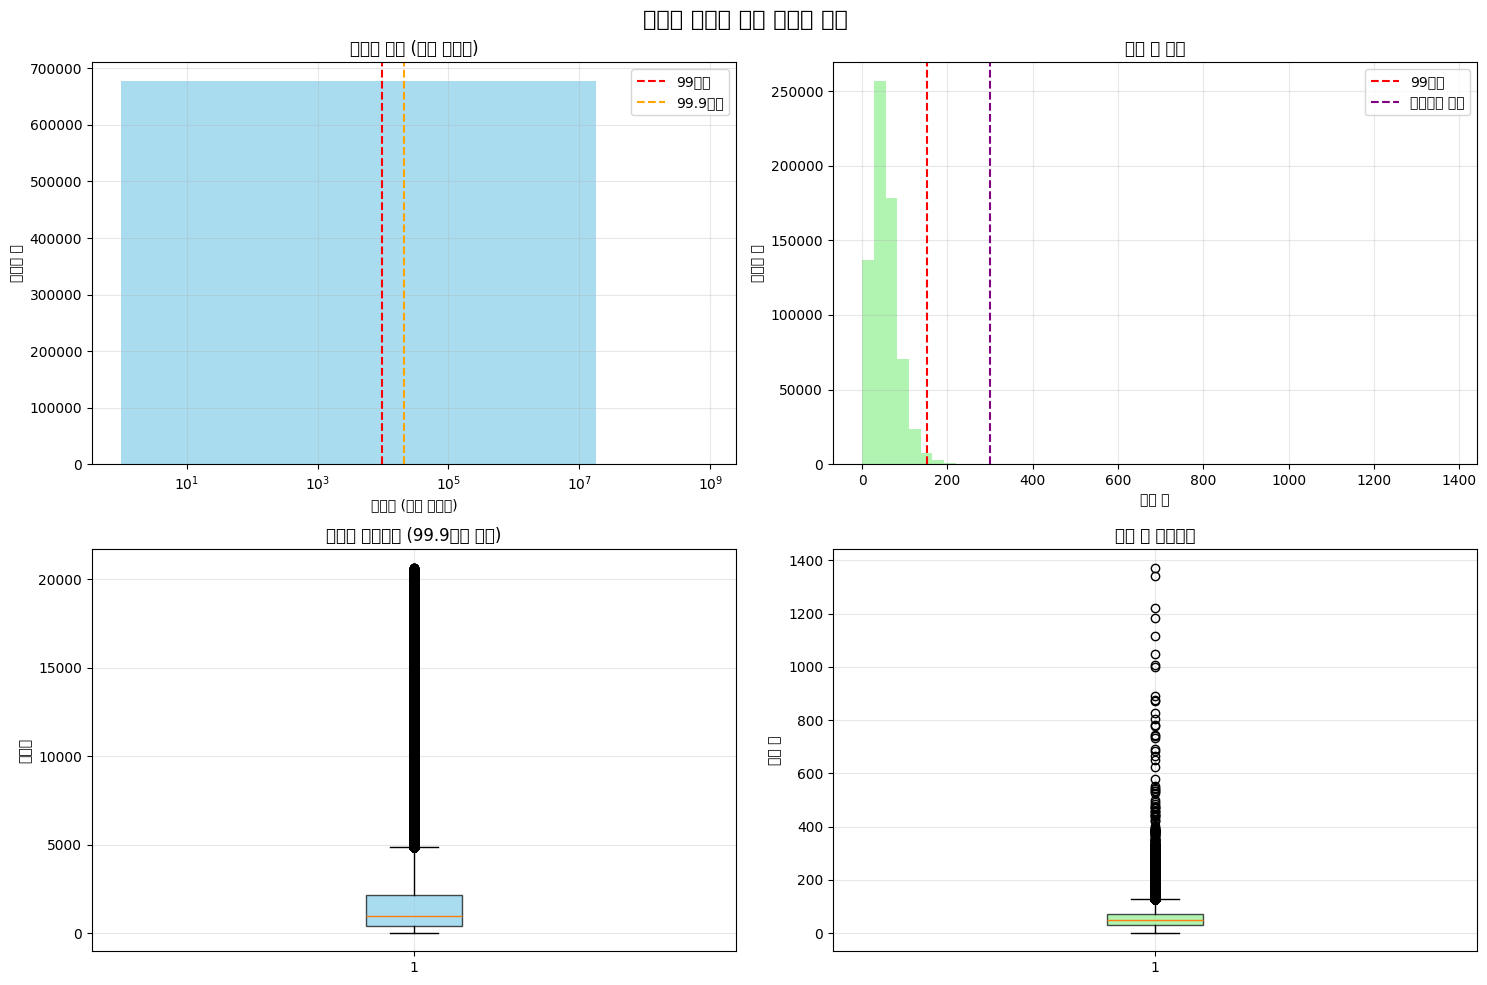


🎯 5. 최종 권장 임계값 설정
💰 포인트 임계값 비교:
  • 99.9분위:       20,668
  • 비즈니스:      400,000
  • IQR 3배:         7,532
  • 최종 선택:       7,532 ⭐
  • 제외 사용자: 13,878명 (2.050%)

👥 친구 수 임계값 비교:
  • 99분위:        152
  • 비즈니스:      300
  • 최종 선택:     152 ⭐
  • 제외 사용자: 6,581명 (0.972%)

📊 최종 데이터셋 요약:
  • 전체 사용자:    677,085명
  • 정상 사용자:    657,215명
  • 제외된 사용자:   19,870명
  • 제외 비율:        2.935%

✅ 정상 사용자 통계 (이상치 제거 후):
  • 평균 포인트:      1,461
  • 평균 친구 수:      51.7
  • 중간값 포인트:      930
  • 중간값 친구 수:      48


findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Apple G

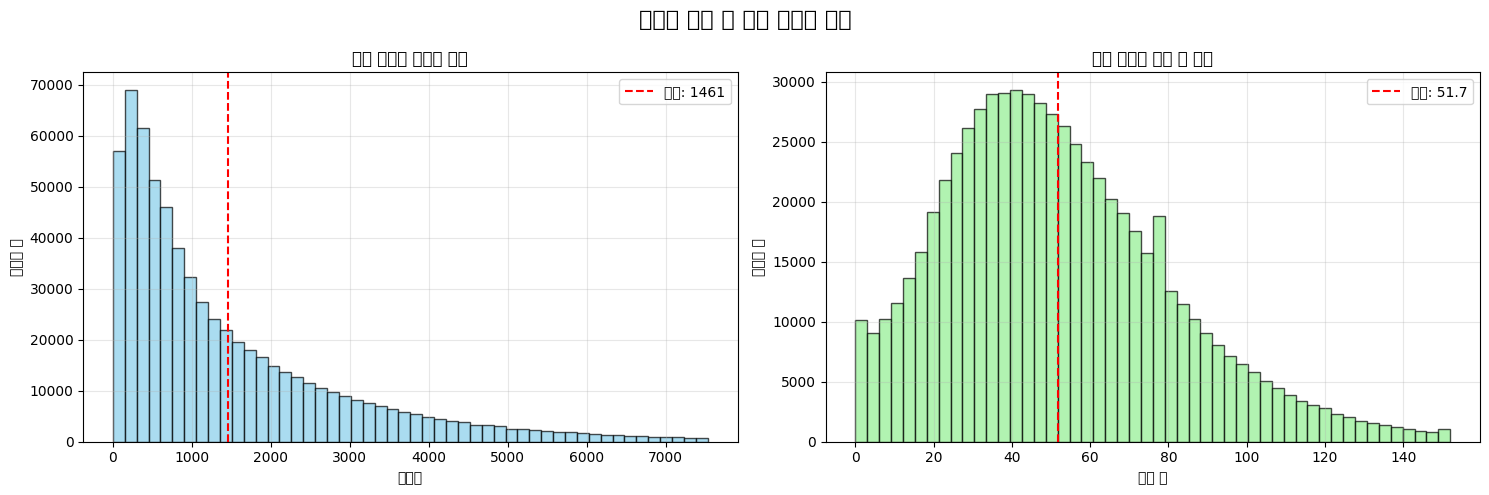


🎯 최종 권장 임계값:
point_threshold = 7,532
friend_threshold = 152


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정
plt.rcParams['font.family'] = ['Apple Gothic', 'Malgun Gothic', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

print("🎯 한글 폰트 설정 완료 - Apple Gothic 우선 사용")
print("=" * 60)

# 데이터 로드 (이전 분석에서 계속)
# df_user는 이미 friend_count 컬럼이 추가된 상태라고 가정

# 각기 다른 분위수 확인
print("📊 1. 분위수별 임계값 분석")
print("-" * 40)

percentiles = [90, 95, 99, 99.5, 99.9, 99.99]

for col in ['point', 'friend_count']:
    print(f"\n{col} 분위수:")
    for p in percentiles:
        threshold = df_user[col].quantile(p/100)
        count_above = (df_user[col] > threshold).sum()
        print(f"  {p:4.1f}분위: {threshold:8,.0f} (초과: {count_above:,}명)")

# IQR 방법
def get_iqr_threshold(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return lower_bound, upper_bound

print(f"\n📊 2. IQR 기반 임계값")
print("-" * 40)

# 포인트 IQR 임계값
point_lower, point_upper = get_iqr_threshold(df_user['point'], 3.0)
print(f"포인트 IQR(3배): {point_upper:,.0f}")

# 친구 수 IQR 임계값  
friend_lower, friend_upper = get_iqr_threshold(df_user['friend_count'], 2.0)
print(f"친구 수 IQR(2배): {friend_upper:.0f}")

# 비즈니스 로직 기반
print(f"\n🎯 3. 비즈니스 로직 기반 임계값")
print("-" * 40)

# 포인트: 최대 구매 가능 금액 기준
max_purchase = 4000  # heart.4000이 최대 상품
reasonable_purchases = 100  # 합리적인 최대 구매 횟수
point_threshold_business = max_purchase * reasonable_purchases
print(f"포인트 비즈니스 임계값: {point_threshold_business:,}점")

# 친구 수: 던바의 수(150명) + 10대 특성 고려
dunbar_number = 150
teen_factor = 2.0  # 10대는 더 많은 온라인 친구 가능
friend_threshold_business = int(dunbar_number * teen_factor)
print(f"친구 수 비즈니스 임계값: {friend_threshold_business}명")

# 시각화
print(f"\n📈 4. 분포 시각화")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('이상치 분석을 위한 데이터 분포', fontsize=16, fontweight='bold')

# 포인트 분포 (로그 스케일)
axes[0,0].hist(df_user['point'][df_user['point'] > 0], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_xscale('log')
axes[0,0].set_title('포인트 분포 (로그 스케일)', fontsize=12)
axes[0,0].axvline(df_user['point'].quantile(0.99), color='red', linestyle='--', label='99분위')
axes[0,0].axvline(df_user['point'].quantile(0.999), color='orange', linestyle='--', label='99.9분위')
axes[0,0].set_xlabel('포인트 (로그 스케일)')
axes[0,0].set_ylabel('사용자 수')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 친구 수 분포
axes[0,1].hist(df_user['friend_count'], bins=50, alpha=0.7, color='lightgreen')
axes[0,1].set_title('친구 수 분포', fontsize=12)
axes[0,1].axvline(df_user['friend_count'].quantile(0.99), color='red', linestyle='--', label='99분위')
axes[0,1].axvline(friend_threshold_business, color='purple', linestyle='--', label='비즈니스 기준')
axes[0,1].set_xlabel('친구 수')
axes[0,1].set_ylabel('사용자 수')
axes[0,1].legend()
axes[0,1].grid(True, alpha=0.3)

# 포인트 박스플롯 (99.9분위 이하)
point_filtered = df_user['point'][df_user['point'] <= df_user['point'].quantile(0.999)]
axes[1,0].boxplot(point_filtered, patch_artist=True, 
                  boxprops=dict(facecolor='skyblue', alpha=0.7))
axes[1,0].set_title('포인트 박스플롯 (99.9분위 이하)', fontsize=12)
axes[1,0].set_ylabel('포인트')
axes[1,0].grid(True, alpha=0.3)

# 친구 수 박스플롯
axes[1,1].boxplot(df_user['friend_count'], patch_artist=True,
                  boxprops=dict(facecolor='lightgreen', alpha=0.7))
axes[1,1].set_title('친구 수 박스플롯', fontsize=12)
axes[1,1].set_ylabel('친구 수')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 최종 임계값 설정
print(f"\n🎯 5. 최종 권장 임계값 설정")
print("=" * 50)

# 1. 포인트: 여러 방법의 종합 판단
point_99_9 = df_user['point'].quantile(0.999)
point_business = 400000  # 4000 × 100회 구매
point_iqr = point_upper

point_thresholds = [point_99_9, point_business, point_iqr]
point_final = min([t for t in point_thresholds if t > 0])  # 양수 중 최솟값

print(f"💰 포인트 임계값 비교:")
print(f"  • 99.9분위: {point_99_9:12,.0f}")
print(f"  • 비즈니스: {point_business:12,.0f}")
print(f"  • IQR 3배:  {point_iqr:12,.0f}")
print(f"  • 최종 선택: {point_final:11,.0f} ⭐")

excluded_point = (df_user['point'] > point_final).sum()
print(f"  • 제외 사용자: {excluded_point:,}명 ({excluded_point/len(df_user)*100:.3f}%)")

# 2. 친구 수: 99분위와 비즈니스 로직 중 선택
friend_99 = df_user['friend_count'].quantile(0.99)
friend_business = 300  # 던바 수의 2배
friend_final = min(friend_99, friend_business)

print(f"\n👥 친구 수 임계값 비교:")
print(f"  • 99분위:   {friend_99:8.0f}")
print(f"  • 비즈니스: {friend_business:8}")
print(f"  • 최종 선택: {friend_final:7.0f} ⭐")

excluded_friends = (df_user['friend_count'] > friend_final).sum()
print(f"  • 제외 사용자: {excluded_friends:,}명 ({excluded_friends/len(df_user)*100:.3f}%)")

# 3. 최종 정상 사용자 데이터셋
normal_users = df_user[
    (df_user['point'] <= point_final) & 
    (df_user['friend_count'] <= friend_final)
]

print(f"\n📊 최종 데이터셋 요약:")
print(f"  • 전체 사용자:   {len(df_user):8,}명")
print(f"  • 정상 사용자:   {len(normal_users):8,}명")
print(f"  • 제외된 사용자: {len(df_user) - len(normal_users):8,}명")
print(f"  • 제외 비율:     {(1-len(normal_users)/len(df_user))*100:8.3f}%")

print(f"\n✅ 정상 사용자 통계 (이상치 제거 후):")
print(f"  • 평균 포인트:   {normal_users['point'].mean():8,.0f}")
print(f"  • 평균 친구 수:  {normal_users['friend_count'].mean():8.1f}")
print(f"  • 중간값 포인트: {normal_users['point'].median():8,.0f}")
print(f"  • 중간값 친구 수: {normal_users['friend_count'].median():7.0f}")

# 최종 시각화 (정상 사용자만)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('이상치 제거 후 정상 사용자 분포', fontsize=16, fontweight='bold')

# 정상 사용자 포인트 분포
axes[0].hist(normal_users['point'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0].set_title('정상 사용자 포인트 분포', fontsize=12)
axes[0].set_xlabel('포인트')
axes[0].set_ylabel('사용자 수')
axes[0].axvline(normal_users['point'].mean(), color='red', linestyle='--', label=f'평균: {normal_users["point"].mean():.0f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 정상 사용자 친구 수 분포
axes[1].hist(normal_users['friend_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1].set_title('정상 사용자 친구 수 분포', fontsize=12)
axes[1].set_xlabel('친구 수')
axes[1].set_ylabel('사용자 수')
axes[1].axvline(normal_users['friend_count'].mean(), color='red', linestyle='--', label=f'평균: {normal_users["friend_count"].mean():.1f}')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 최종 권장 임계값:")
print(f"point_threshold = {point_final:,.0f}")
print(f"friend_threshold = {friend_final:.0f}")

# 주제 선정 - 개선 사항 탐구

## 추천 알고리즘의 문제점

### 1단계: 추천된 8명이 실제 친구인지 확인하기

In [1]:
import pandas as pd
import ast

# 필요한 데이터 로드
print("📊 데이터 로드 중...")
df_usercandidate = pd.read_parquet("gs://sprintda05_final_project/votes/polls_usercandidate.parquet")
df_user = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet")

print(f"질문 후보자 데이터: {len(df_usercandidate):,}건")
print(f"사용자 데이터: {len(df_user):,}명")

# 친구 리스트 파싱 함수
def parse_friend_list(friend_str):
    """친구 리스트 문자열을 실제 리스트로 변환"""
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return []
        return ast.literal_eval(friend_str)
    except:
        return []

# 사용자별 친구 리스트 준비
print("\n🔄 친구 리스트 파싱 중...")
df_user['friends'] = df_user['friend_id_list'].apply(parse_friend_list)

# 사용자별 친구 딕셔너리 생성 (빠른 조회를 위해)
user_friends_dict = df_user.set_index('id')['friends'].to_dict()

print("✅ 준비 완료!")

📊 데이터 로드 중...
질문 후보자 데이터: 4,769,609건
사용자 데이터: 677,085명

🔄 친구 리스트 파싱 중...
✅ 준비 완료!


In [9]:
print("🔍 2단계: 올바른 친구 관계 분석")
print("=" * 50)

# 분석을 위한 샘플링
sample_size = 10000
df_vote_sample = df_vote.sample(n=sample_size, random_state=42)

print(f"투표 샘플: {len(df_vote_sample):,}건")

# 샘플 투표들의 question_piece_id 수집
sample_question_pieces = df_vote_sample['question_piece_id'].unique()
print(f"샘플 질문 조각 수: {len(sample_question_pieces):,}개")

# 해당 질문들의 후보자 정보 가져오기
df_candidates_sample = df_usercandidate[
    df_usercandidate['question_piece_id'].isin(sample_question_pieces)
].copy()

print(f"해당 질문들의 후보자 정보: {len(df_candidates_sample):,}건")

# 질문별 후보자 수 확인
candidates_per_question = df_candidates_sample.groupby('question_piece_id')['user_id'].count()
print(f"\n📊 질문별 후보자 수 분포:")
print(f"최소: {candidates_per_question.min()}명")
print(f"최대: {candidates_per_question.max()}명") 
print(f"평균: {candidates_per_question.mean():.1f}명")
print(f"8명인 질문: {(candidates_per_question == 8).sum()}개 ({(candidates_per_question == 8).mean():.1%})")

# 실제 친구 관계 분석 준비
print(f"\n🔍 친구 관계 분석 준비...")

# 샘플에 포함된 투표자들의 친구 리스트 파싱
sample_voters = df_vote_sample['user_id'].unique()
print(f"샘플 투표자 수: {len(sample_voters):,}명")

# 해당 투표자들의 친구 정보
df_voter_friends = df_user[df_user['id'].isin(sample_voters)][['id', 'friend_id_list']].copy()

def parse_friends(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return set()
        return set(ast.literal_eval(friend_str))
    except:
        return set()

print("친구 리스트 파싱 중...")
df_voter_friends['friends_set'] = df_voter_friends['friend_id_list'].apply(parse_friends)
voter_friends_dict = dict(zip(df_voter_friends['id'], df_voter_friends['friends_set']))

print("✅ 준비 완료!")
print(f"친구 정보가 있는 투표자: {len(voter_friends_dict):,}명")

🔍 2단계: 올바른 친구 관계 분석
투표 샘플: 10,000건
샘플 질문 조각 수: 10,000개
해당 질문들의 후보자 정보: 39,111건

📊 질문별 후보자 수 분포:
최소: 2명
최대: 8명
평균: 3.9명
8명인 질문: 1개 (0.0%)

🔍 친구 관계 분석 준비...
샘플 투표자 수: 3,459명
친구 리스트 파싱 중...
✅ 준비 완료!
친구 정보가 있는 투표자: 3,459명


🔍 3단계: 전체 데이터 친구 관계 분석
📊 전체 데이터 규모:
• 전체 투표 기록: 1,217,558건
• 전체 후보자 기록: 4,769,609건
• 전체 사용자: 677,085명

🔄 전체 사용자 친구 리스트 파싱 중...
친구 리스트 파싱 진행 중... (시간이 조금 걸릴 수 있습니다)
✅ 전체 사용자 친구 정보 준비 완료: 677,085명

1️⃣ 전체 투표에서 선택된 사람이 친구인지 분석...
전체 투표 기록 분석 중... (121만건 처리)
  진행률: 250,000 / 1,217,558 건 처리 완료
  진행률: 500,000 / 1,217,558 건 처리 완료
  진행률: 750,000 / 1,217,558 건 처리 완료
  진행률: 1,000,000 / 1,217,558 건 처리 완료
  진행률: 1,217,558 / 1,217,558 건 처리 완료

📈 전체 데이터 분석 결과:
• 전체 투표: 1,217,558건
• 친구 선택: 1,208,128건 (99.225%)
• 모르는 사람 선택: 9,430건 (0.775%)


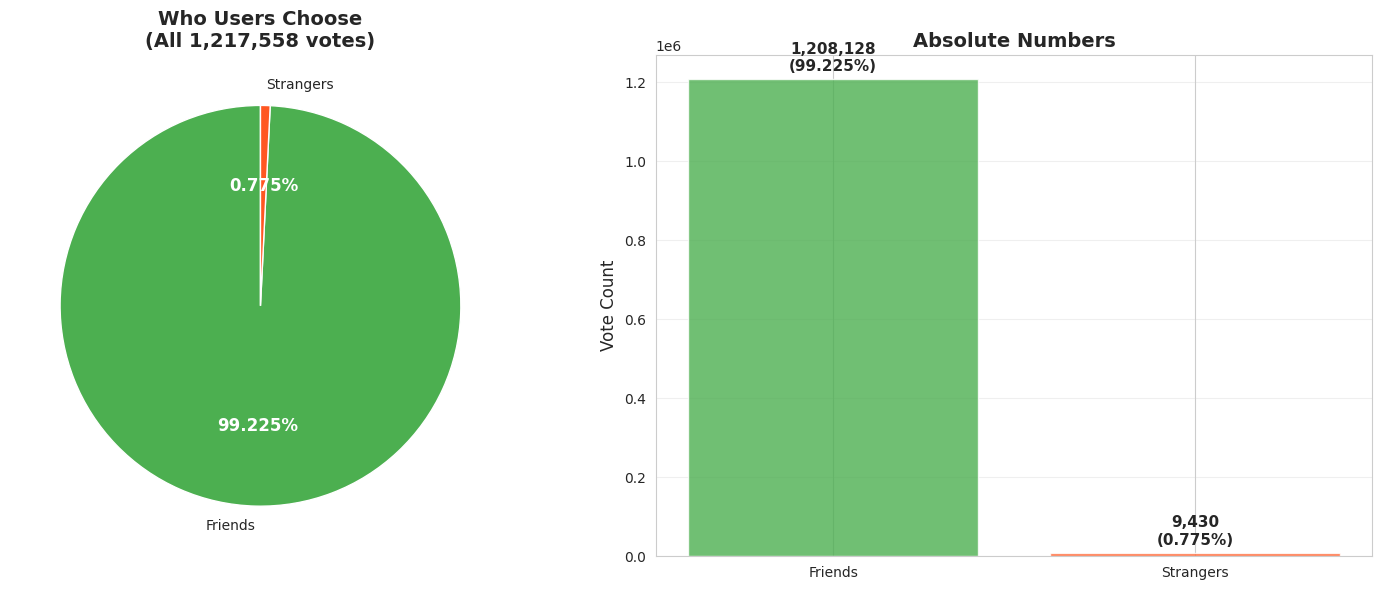


🎯 전체 데이터 결론:
• Friends = 친구 선택 (99.225%)
• Strangers = 모르는 사람 선택 (0.775%)


In [12]:
print("🔍 3단계: 전체 데이터 친구 관계 분석")
print("=" * 50)

print(f"📊 전체 데이터 규모:")
print(f"• 전체 투표 기록: {len(df_vote):,}건")
print(f"• 전체 후보자 기록: {len(df_usercandidate):,}건")
print(f"• 전체 사용자: {len(df_user):,}명")

print(f"\n🔄 전체 사용자 친구 리스트 파싱 중...")

# 전체 사용자의 친구 리스트 파싱
def parse_friends(friend_str):
    try:
        if pd.isna(friend_str) or friend_str.strip() == '' or friend_str == '[]':
            return set()
        return set(ast.literal_eval(friend_str))
    except:
        return set()

print("친구 리스트 파싱 진행 중... (시간이 조금 걸릴 수 있습니다)")
df_user['friends_set'] = df_user['friend_id_list'].apply(parse_friends)
user_friends_dict = dict(zip(df_user['id'], df_user['friends_set']))

print(f"✅ 전체 사용자 친구 정보 준비 완료: {len(user_friends_dict):,}명")

print(f"\n1️⃣ 전체 투표에서 선택된 사람이 친구인지 분석...")
print("전체 투표 기록 분석 중... (121만건 처리)")

# 전체 투표에서 선택된 사람이 친구인지 확인
chosen_is_friend_all = []
batch_size = 50000

for i in range(0, len(df_vote), batch_size):
    batch = df_vote.iloc[i:i+batch_size]
    batch_results = []
    
    for _, vote in batch.iterrows():
        voter_id = vote['user_id']
        chosen_id = vote['chosen_user_id']
        
        voter_friends = user_friends_dict.get(voter_id, set())
        batch_results.append(chosen_id in voter_friends)
    
    chosen_is_friend_all.extend(batch_results)
    
    if (i // batch_size + 1) % 5 == 0:
        print(f"  진행률: {min(i+batch_size, len(df_vote)):,} / {len(df_vote):,} 건 처리 완료")

# 전체 결과 분석
chosen_friend_ratio_all = np.mean(chosen_is_friend_all)
chosen_friend_count_all = sum(chosen_is_friend_all)
chosen_stranger_count_all = len(chosen_is_friend_all) - chosen_friend_count_all

print(f"\n📈 전체 데이터 분석 결과:")
print(f"• 전체 투표: {len(chosen_is_friend_all):,}건")
print(f"• 친구 선택: {chosen_friend_count_all:,}건 ({chosen_friend_ratio_all:.3%})")
print(f"• 모르는 사람 선택: {chosen_stranger_count_all:,}건 ({1-chosen_friend_ratio_all:.3%})")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

labels = ['Friends', 'Strangers']
sizes = [chosen_friend_ratio_all, 1-chosen_friend_ratio_all]
colors = ['#4CAF50', '#FF5722']

# 파이차트
wedges, texts, autotexts = ax1.pie(sizes, labels=labels, autopct='%1.3f%%', 
                                   colors=colors, startangle=90)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

ax1.set_title(f'Who Users Choose\n(All {len(df_vote):,} votes)', fontweight='bold', fontsize=14)

# 바차트
counts = [chosen_friend_count_all, chosen_stranger_count_all]
bars = ax2.bar(labels, counts, color=colors, alpha=0.8)

for i, (bar, count, pct) in enumerate(zip(bars, counts, sizes)):
    ax2.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + max(counts)*0.01,
             f'{count:,}\n({pct:.3%})', 
             ha='center', va='bottom', fontsize=11, fontweight='bold')

ax2.set_title('Absolute Numbers', fontweight='bold', fontsize=14)
ax2.set_ylabel('Vote Count', fontsize=12)
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n🎯 전체 데이터 결론:")
print(f"• Friends = 친구 선택 ({chosen_friend_ratio_all:.3%})")
print(f"• Strangers = 모르는 사람 선택 ({1-chosen_friend_ratio_all:.3%})")

In [13]:
print("🎯 등장인물(후보자) 추천 알고리즘 분석")
print("=" * 50)

print("📋 분석 목표:")
print("• 각 질문마다 등장하는 후보자들이 어떤 기준으로 선정되는가?")
print("• 친구 기반? 지역 기반? 랜덤? 성별? 학교?")

print(f"\n🔍 1단계: 질문-투표자-후보자 관계 파악")

# 질문별 투표자와 후보자 매핑 
print("question_piece_id별 투표자와 후보자 연결 중...")

# 샘플 질문들로 분석 시작 (전체는 너무 크니)
sample_questions = df_vote['question_piece_id'].value_counts().head(1000).index.tolist()
print(f"분석할 질문 수: {len(sample_questions):,}개")

question_analysis = []

for i, question_id in enumerate(sample_questions):
    # 해당 질문의 투표자 (질문을 받은 사람)
    question_votes = df_vote[df_vote['question_piece_id'] == question_id]
    if question_votes.empty:
        continue
        
    voter_id = question_votes.iloc[0]['user_id']  # 첫 번째 투표자 (보통 1명)
    
    # 해당 질문의 후보자들 (등장인물들)
    question_candidates = df_usercandidate[
        df_usercandidate['question_piece_id'] == question_id
    ]['user_id'].tolist()
    
    if len(question_candidates) == 0:
        continue
    
    question_analysis.append({
        'question_id': question_id,
        'voter_id': voter_id,
        'candidates': question_candidates,
        'candidate_count': len(question_candidates)
    })
    
    if (i + 1) % 100 == 0:
        print(f"  진행률: {i+1:,} / {len(sample_questions):,} 질문 처리")

print(f"✅ 분석 준비 완료: {len(question_analysis):,}개 질문")

# 후보자 수 분포 확인
candidate_counts = [q['candidate_count'] for q in question_analysis]
print(f"\n📊 질문별 후보자 수 분포:")
print(f"• 평균: {np.mean(candidate_counts):.1f}명")
print(f"• 최소: {min(candidate_counts)}명")
print(f"• 최대: {max(candidate_counts)}명")
print(f"• 8명인 질문: {candidate_counts.count(8)}개 ({candidate_counts.count(8)/len(candidate_counts):.1%})")

# 후보자 수별 분포
from collections import Counter
count_dist = Counter(candidate_counts)
print(f"\n상세 분포:")
for count in sorted(count_dist.keys()):
    print(f"• {count}명: {count_dist[count]:,}개 질문 ({count_dist[count]/len(candidate_counts):.1%})")

print(f"\n🔍 2단계: 후보자 선정 기준 분석 준비...")
print("다음 중 어떤 기준부터 분석해볼까요?")
print("A) 친구 관계 기준 (후보자들이 투표자의 친구인가?)")
print("B) 같은 학교/지역 기준")  
print("C) 성별/나이 기준")
print("D) 활동도/인기도 기준")
print("E) 전체 종합 분석")

# 일단 친구 관계부터 간단 확인
print(f"\n🔍 간단 미리보기: 친구 관계 확인")
friend_ratios = []

for q in question_analysis[:100]:  # 처음 100개만
    voter_friends = user_friends_dict.get(q['voter_id'], set())
    friend_candidates = [c for c in q['candidates'] if c in voter_friends]
    friend_ratio = len(friend_candidates) / len(q['candidates']) if q['candidates'] else 0
    friend_ratios.append(friend_ratio)

avg_friend_ratio = np.mean(friend_ratios)
print(f"• 처음 100개 질문 분석:")
print(f"• 후보자 중 친구 비율: {avg_friend_ratio:.1%}")

🎯 등장인물(후보자) 추천 알고리즘 분석
📋 분석 목표:
• 각 질문마다 등장하는 후보자들이 어떤 기준으로 선정되는가?
• 친구 기반? 지역 기반? 랜덤? 성별? 학교?

🔍 1단계: 질문-투표자-후보자 관계 파악
question_piece_id별 투표자와 후보자 연결 중...
분석할 질문 수: 1,000개
  진행률: 100 / 1,000 질문 처리
  진행률: 200 / 1,000 질문 처리
  진행률: 300 / 1,000 질문 처리
  진행률: 400 / 1,000 질문 처리
  진행률: 500 / 1,000 질문 처리
  진행률: 600 / 1,000 질문 처리
  진행률: 700 / 1,000 질문 처리
  진행률: 800 / 1,000 질문 처리
  진행률: 900 / 1,000 질문 처리
  진행률: 1,000 / 1,000 질문 처리
✅ 분석 준비 완료: 1,000개 질문

📊 질문별 후보자 수 분포:
• 평균: 3.9명
• 최소: 2명
• 최대: 4명
• 8명인 질문: 0개 (0.0%)

상세 분포:
• 2명: 5개 질문 (0.5%)
• 3명: 86개 질문 (8.6%)
• 4명: 909개 질문 (90.9%)

🔍 2단계: 후보자 선정 기준 분석 준비...
다음 중 어떤 기준부터 분석해볼까요?
A) 친구 관계 기준 (후보자들이 투표자의 친구인가?)
B) 같은 학교/지역 기준
C) 성별/나이 기준
D) 활동도/인기도 기준
E) 전체 종합 분석

🔍 간단 미리보기: 친구 관계 확인
• 처음 100개 질문 분석:
• 후보자 중 친구 비율: 97.9%


### A) 친구 관계 기준 (후보자들이 투표자의 친구인가?)

In [16]:
print("🔍 전체 데이터 친구 관계 분석")
print("=" * 50)

print("📋 사용된 데이터 테이블과 컬럼:")
print("1️⃣ polls_usercandidate (질문별 후보자)")
print("   • question_piece_id: 질문 조각 ID (연결키)")
print("   • user_id: 후보자 사용자 ID")
print("   • 용도: 각 질문에 등장하는 후보자들 식별")

print("\n2️⃣ accounts_userquestionrecord (투표 기록)")  
print("   • question_piece_id: 질문 조각 ID (연결키)")
print("   • user_id: 투표자(질문받은 사람) 사용자 ID")
print("   • chosen_user_id: 선택받은 사용자 ID")
print("   • 용도: 누가 어떤 질문에서 누구를 선택했는지")

print("\n3️⃣ accounts_user (사용자 정보)")
print("   • id: 사용자 ID")
print("   • friend_id_list: 친구 목록 (문자열 리스트)")
print("   • 용도: 각 사용자의 친구 관계 확인")

print(f"\n📊 전체 데이터 규모:")
print(f"• 전체 투표 기록: {len(df_vote):,}건")
print(f"• 전체 후보자 기록: {len(df_usercandidate):,}건")
print(f"• 전체 사용자: {len(df_user):,}명")

# 전체 질문 분석
print(f"\n🔍 전체 질문 분석 시작...")
all_questions = df_vote['question_piece_id'].unique()
print(f"전체 고유 질문 수: {len(all_questions):,}개")

# 전체 질문별 분석 (배치 처리)
print("전체 질문별 투표자-후보자 관계 분석 중...")

all_question_analysis = []
batch_size = 10000

for batch_start in range(0, len(all_questions), batch_size):
    batch_questions = all_questions[batch_start:batch_start + batch_size]
    
    for question_id in batch_questions:
        # 해당 질문의 투표자들
        question_votes = df_vote[df_vote['question_piece_id'] == question_id]
        if question_votes.empty:
            continue
            
        # 투표자 (보통 1명이지만 여러 명일 수도 있음)
        voters = question_votes['user_id'].unique()
        
        # 해당 질문의 후보자들
        question_candidates = df_usercandidate[
            df_usercandidate['question_piece_id'] == question_id
        ]['user_id'].tolist()
        
        if not question_candidates:
            continue
        
        # 각 투표자별로 분석
        for voter_id in voters:
            all_question_analysis.append({
                'question_id': question_id,
                'voter_id': voter_id,
                'candidates': question_candidates,
                'candidate_count': len(question_candidates)
            })
    
    print(f"  진행률: {min(batch_start + batch_size, len(all_questions)):,} / {len(all_questions):,} 질문 처리")

print(f"✅ 전체 질문-투표자 쌍 분석 완료: {len(all_question_analysis):,}개")

# 친구 관계 분석
print(f"\n🔍 전체 친구 관계 분석 중...")
print("전체 사용자의 친구 리스트가 이미 파싱되어 있으므로 바로 분석 진행...")

total_friend_analysis = []
batch_size = 50000

for batch_start in range(0, len(all_question_analysis), batch_size):
    batch_data = all_question_analysis[batch_start:batch_start + batch_size]
    
    for q in batch_data:
        voter_id = q['voter_id']
        candidates = q['candidates']
        
        # 투표자의 친구 목록
        voter_friends = user_friends_dict.get(voter_id, set())
        
        # 후보자 중 친구인 사람들
        friend_candidates = [c for c in candidates if c in voter_friends]
        friend_ratio = len(friend_candidates) / len(candidates) if candidates else 0
        
        total_friend_analysis.append({
            'question_id': q['question_id'],
            'voter_id': voter_id,
            'total_candidates': len(candidates),
            'friend_candidates': len(friend_candidates),
            'friend_ratio': friend_ratio
        })
    
    print(f"  친구 관계 분석: {min(batch_start + batch_size, len(all_question_analysis)):,} / {len(all_question_analysis):,} 완료")

# 전체 결과 분석
friend_ratios_all = [r['friend_ratio'] for r in total_friend_analysis]
friend_counts_all = [r['friend_candidates'] for r in total_friend_analysis]
total_candidates_all = [r['total_candidates'] for r in total_friend_analysis]

print(f"\n📈 전체 데이터 친구 관계 분석 결과:")
print(f"• 분석된 질문-투표자 쌍: {len(total_friend_analysis):,}개")
print(f"• 후보자 중 친구 비율:")
print(f"  - 평균: {np.mean(friend_ratios_all):.2%}")
print(f"  - 중간값: {np.median(friend_ratios_all):.2%}")
print(f"  - 최소: {min(friend_ratios_all):.2%}")
print(f"  - 최대: {max(friend_ratios_all):.2%}")

# 친구 비율 분포 (전체)
print(f"\n📊 전체 데이터 친구 비율 분포:")
ratio_100 = sum(1 for r in friend_ratios_all if r == 1.0)
ratio_90_99 = sum(1 for r in friend_ratios_all if 0.9 <= r < 1.0)
ratio_80_89 = sum(1 for r in friend_ratios_all if 0.8 <= r < 0.9)
ratio_70_79 = sum(1 for r in friend_ratios_all if 0.7 <= r < 0.8)
ratio_below_70 = sum(1 for r in friend_ratios_all if r < 0.7)

total_questions = len(friend_ratios_all)
print(f"• 100% 친구: {ratio_100:,}개 ({ratio_100/total_questions:.1%})")
print(f"• 90-99% 친구: {ratio_90_99:,}개 ({ratio_90_99/total_questions:.1%})")
print(f"• 80-89% 친구: {ratio_80_89:,}개 ({ratio_80_89/total_questions:.1%})")
print(f"• 70-79% 친구: {ratio_70_79:,}개 ({ratio_70_79/total_questions:.1%})")
print(f"• 70% 미만 친구: {ratio_below_70:,}개 ({ratio_below_70/total_questions:.1%})")

print(f"\n🎯 전체 데이터 결론:")
print(f"✅ 추천 알고리즘은 강력한 친구 기반!")
print(f"   → 평균 {np.mean(friend_ratios_all):.1%}의 후보자가 친구")
print(f"   → {ratio_100/total_questions:.1%}의 질문이 100% 친구로 구성")

print(f"\n📋 데이터 연결 방식 요약:")
print(f"polls_usercandidate.question_piece_id = accounts_userquestionrecord.question_piece_id")
print(f"accounts_userquestionrecord.user_id → accounts_user.id (투표자)")
print(f"polls_usercandidate.user_id → accounts_user.id (후보자)")
print(f"accounts_user.friend_id_list 파싱하여 친구 관계 확인")

🔍 전체 데이터 친구 관계 분석
📋 사용된 데이터 테이블과 컬럼:
1️⃣ polls_usercandidate (질문별 후보자)
   • question_piece_id: 질문 조각 ID (연결키)
   • user_id: 후보자 사용자 ID
   • 용도: 각 질문에 등장하는 후보자들 식별

2️⃣ accounts_userquestionrecord (투표 기록)
   • question_piece_id: 질문 조각 ID (연결키)
   • user_id: 투표자(질문받은 사람) 사용자 ID
   • chosen_user_id: 선택받은 사용자 ID
   • 용도: 누가 어떤 질문에서 누구를 선택했는지

3️⃣ accounts_user (사용자 정보)
   • id: 사용자 ID
   • friend_id_list: 친구 목록 (문자열 리스트)
   • 용도: 각 사용자의 친구 관계 확인

📊 전체 데이터 규모:
• 전체 투표 기록: 1,217,558건
• 전체 후보자 기록: 4,769,609건
• 전체 사용자: 677,085명

🔍 전체 질문 분석 시작...
전체 고유 질문 수: 1,217,558개
전체 질문별 투표자-후보자 관계 분석 중...
  진행률: 10,000 / 1,217,558 질문 처리
  진행률: 20,000 / 1,217,558 질문 처리
  진행률: 30,000 / 1,217,558 질문 처리
  진행률: 40,000 / 1,217,558 질문 처리
  진행률: 50,000 / 1,217,558 질문 처리
  진행률: 60,000 / 1,217,558 질문 처리
  진행률: 70,000 / 1,217,558 질문 처리
  진행률: 80,000 / 1,217,558 질문 처리
  진행률: 90,000 / 1,217,558 질문 처리
  진행률: 100,000 / 1,217,558 질문 처리
  진행률: 110,000 / 1,217,558 질문 처리
  진행률: 120,000 / 1,217,558 질문 처리
  진행률: 130,000 / 1,2

## 질문 알고리즘의 문제점

In [19]:
print("🔍 질문 10개 세트 제공 시점 분석")
print("=" * 50)

print("📋 핵심 발견:")
print("• polls_questionset.opening_time = 사용자에게 질문 세트가 제공된 시점!")
print("• polls_questionset.created_at = 질문 세트가 생성된 시점")
print("• question_piece_id_list = 10개 질문 ID가 리스트로 저장")

# 1. 기본 통계
print(f"\n1️⃣ 기본 통계")
print(f"• 전체 질문 세트 수: {len(df_questionset):,}개")
print(f"• 질문 세트 기간: {df_questionset['created_at'].min()} ~ {df_questionset['created_at'].max()}")

# 2. 생성 시간과 제공 시간 차이 분석
print(f"\n2️⃣ 질문 세트 생성 vs 제공 시간 분석")

df_questionset['created_at'] = pd.to_datetime(df_questionset['created_at'])
df_questionset['opening_time'] = pd.to_datetime(df_questionset['opening_time'])

# 시간 차이 계산 (초 단위)
df_questionset['time_diff_seconds'] = (
    df_questionset['opening_time'] - df_questionset['created_at']
).dt.total_seconds()

print(f"• 생성 후 제공까지 시간 차이:")
print(f"  - 평균: {df_questionset['time_diff_seconds'].mean():.1f}초")
print(f"  - 중간값: {df_questionset['time_diff_seconds'].median():.1f}초")
print(f"  - 최소: {df_questionset['time_diff_seconds'].min():.1f}초")
print(f"  - 최대: {df_questionset['time_diff_seconds'].max():.1f}초")

# 즉시 제공되는 비율
immediate_count = (df_questionset['time_diff_seconds'] <= 1).sum()
print(f"  - 1초 이내 즉시 제공: {immediate_count:,}개 ({immediate_count/len(df_questionset):.1%})")

# 3. 질문 세트 제공 시간대 분석
print(f"\n3️⃣ 질문 세트 제공 시간대 분석")

df_questionset['opening_hour'] = df_questionset['opening_time'].dt.hour
df_questionset['opening_day'] = df_questionset['opening_time'].dt.dayofweek

# 시간대별 분포
hourly_sets = df_questionset['opening_hour'].value_counts().sort_index()
print(f"• 가장 많이 제공되는 시간대 (상위 5개):")
for hour in hourly_sets.head(5).index:
    print(f"  {hour:02d}시: {hourly_sets[hour]:,}개 ({hourly_sets[hour]/len(df_questionset):.1%})")

# 요일별 분포
daily_sets = df_questionset['opening_day'].value_counts().sort_index()
days = ['월', '화', '수', '목', '금', '토', '일']
print(f"\n• 요일별 제공 분포:")
for day_idx in daily_sets.index:
    print(f"  {days[day_idx]}요일: {daily_sets[day_idx]:,}개 ({daily_sets[day_idx]/len(df_questionset):.1%})")

# 4. 질문 세트 내 질문 개수 확인
print(f"\n4️⃣ 질문 세트당 질문 개수 확인")

# question_piece_id_list 파싱 (문자열을 리스트로 변환)
def parse_question_list(question_str):
    try:
        # 문자열이 이미 리스트 형태로 저장되어 있을 수 있음
        if isinstance(question_str, list):
            return len(question_str)
        # 문자열인 경우 파싱
        import ast
        question_list = ast.literal_eval(question_str)
        return len(question_list)
    except:
        return 0

df_questionset['question_count'] = df_questionset['question_piece_id_list'].apply(parse_question_list)

question_counts = df_questionset['question_count'].value_counts().sort_index()
print(f"• 세트당 질문 개수 분포:")
for count in question_counts.index:
    print(f"  {count}개 질문: {question_counts[count]:,}개 세트 ({question_counts[count]/len(df_questionset):.1%})")

# 5. 간단 결론
print(f"\n🎯 질문 10개 세트 제공 패턴 결론:")

peak_hour = hourly_sets.idxmax()
peak_day = daily_sets.idxmax()
avg_diff = df_questionset['time_diff_seconds'].mean()

print(f"✅ 질문 세트는 주로 {peak_hour:02d}시에 가장 많이 제공됨")
print(f"✅ {days[peak_day]}요일에 가장 활발하게 제공됨") 

if avg_diff < 5:
    print(f"✅ 질문 세트는 생성 즉시 사용자에게 제공됨 (평균 {avg_diff:.1f}초)")
else:
    print(f"⚠️ 질문 세트 생성과 제공 사이에 {avg_diff:.1f}초의 지연")

if question_counts.index[0] == 10:
    print(f"✅ 대부분의 질문 세트가 정확히 10개 질문으로 구성됨")
else:
    print(f"⚠️ 질문 세트의 질문 개수가 다양함")

🔍 질문 10개 세트 제공 시점 분석
📋 핵심 발견:
• polls_questionset.opening_time = 사용자에게 질문 세트가 제공된 시점!
• polls_questionset.created_at = 질문 세트가 생성된 시점
• question_piece_id_list = 10개 질문 ID가 리스트로 저장

1️⃣ 기본 통계
• 전체 질문 세트 수: 158,384개
• 질문 세트 기간: 2023-04-28 12:27:23 ~ 2024-05-07 11:32:30

2️⃣ 질문 세트 생성 vs 제공 시간 분석
• 생성 후 제공까지 시간 차이:
  - 평균: 2549.0초
  - 중간값: 2400.0초
  - 최소: -29.0초
  - 최대: 3051777.0초
  - 1초 이내 즉시 제공: 5,718개 (3.6%)

3️⃣ 질문 세트 제공 시간대 분석
• 가장 많이 제공되는 시간대 (상위 5개):
  00시: 5,157개 (3.3%)
  01시: 4,257개 (2.7%)
  02시: 5,009개 (3.2%)
  03시: 5,713개 (3.6%)
  04시: 6,040개 (3.8%)

• 요일별 제공 분포:
  월요일: 21,972개 (13.9%)
  화요일: 20,191개 (12.7%)
  수요일: 20,382개 (12.9%)
  목요일: 18,233개 (11.5%)
  금요일: 21,887개 (13.8%)
  토요일: 27,215개 (17.2%)
  일요일: 28,504개 (18.0%)

4️⃣ 질문 세트당 질문 개수 확인
• 세트당 질문 개수 분포:
  10개 질문: 158,384개 세트 (100.0%)

🎯 질문 10개 세트 제공 패턴 결론:
✅ 질문 세트는 주로 14시에 가장 많이 제공됨
✅ 일요일에 가장 활발하게 제공됨
⚠️ 질문 세트 생성과 제공 사이에 2549.0초의 지연
✅ 대부분의 질문 세트가 정확히 10개 질문으로 구성됨


### 사용자가 원할때 질문을 받는건가?

In [21]:
print("🔍 사용자별 **일일** 질문 세트 요청 패턴 분석")
print("=" * 50)

print("📋 수정된 분석 기준:")
print("• 하루에 사용자가 몇 개의 질문 세트를 요청하는가?")
print("• 매일 사용하는 사용자 vs 가끔 사용하는 사용자")

# 1. 날짜별 사용자별 질문 세트 수
print(f"\n1️⃣ 하루 기준 사용자별 질문 세트 분석")

# 날짜 컬럼 추가
df_questionset['opening_date'] = df_questionset['opening_time'].dt.date

# 사용자별, 날짜별 질문 세트 수 계산
daily_user_sets = df_questionset.groupby(['user_id', 'opening_date']).size().reset_index(name='daily_set_count')

print(f"• 전체 사용자-날짜 조합: {len(daily_user_sets):,}건")
print(f"• 하루 질문 세트 수 분포:")

daily_counts = daily_user_sets['daily_set_count'].value_counts().sort_index()
for count in daily_counts.head(10).index:
    print(f"  - {count}개/일: {daily_counts[count]:,}건 ({daily_counts[count]/len(daily_user_sets):.1%})")

print(f"\n• 하루 평균 질문 세트 수: {daily_user_sets['daily_set_count'].mean():.1f}개")
print(f"• 하루 최대 질문 세트 수: {daily_user_sets['daily_set_count'].max()}개")

# 2. 사용자의 일일 사용 패턴
print(f"\n2️⃣ 사용자별 일일 사용 패턴")

# 사용자별 통계
user_daily_stats = daily_user_sets.groupby('user_id').agg({
    'daily_set_count': ['mean', 'max', 'count']  # 평균, 최대, 사용일수
}).round(1)

user_daily_stats.columns = ['avg_daily_sets', 'max_daily_sets', 'active_days']

print(f"• 사용자별 일일 평균:")
print(f"  - 평균: {user_daily_stats['avg_daily_sets'].mean():.1f}개/일")
print(f"  - 중간값: {user_daily_stats['avg_daily_sets'].median():.1f}개/일")

print(f"\n• 사용자별 활동 일수:")
print(f"  - 평균: {user_daily_stats['active_days'].mean():.1f}일")
print(f"  - 1일만 사용: {(user_daily_stats['active_days'] == 1).sum():,}명 ({(user_daily_stats['active_days'] == 1).sum()/len(user_daily_stats):.1%})")
print(f"  - 7일 이상 사용: {(user_daily_stats['active_days'] >= 7).sum():,}명 ({(user_daily_stats['active_days'] >= 7).sum()/len(user_daily_stats):.1%})")

# 3. 하루에 많이 사용하는 사용자들
print(f"\n3️⃣ 하루 고사용자 분석")

high_daily_users = daily_user_sets[daily_user_sets['daily_set_count'] >= 5]
print(f"• 하루 5개 이상 사용한 경우: {len(high_daily_users):,}건")

if len(high_daily_users) > 0:
    print(f"  - 최고 기록: {high_daily_users['daily_set_count'].max()}개/일")
    print(f"  - 10개 이상/일: {(high_daily_users['daily_set_count'] >= 10).sum():,}건")
    print(f"  - 20개 이상/일: {(high_daily_users['daily_set_count'] >= 20).sum():,}건")

# 4. 날짜별 전체 활동량
print(f"\n4️⃣ 날짜별 전체 질문 세트 활동량")

daily_total = df_questionset.groupby('opening_date').agg({
    'id': 'count',  # 총 질문 세트 수
    'user_id': 'nunique'  # 활성 사용자 수
}).rename(columns={'id': 'total_sets', 'user_id': 'active_users'})

print(f"• 일별 평균 질문 세트: {daily_total['total_sets'].mean():.0f}개")
print(f"• 일별 평균 활성 사용자: {daily_total['active_users'].mean():.0f}명")
print(f"• 가장 활발했던 날: {daily_total['total_sets'].max():,}개 질문 세트")
print(f"• 사용자당 일평균: {(daily_total['total_sets']/daily_total['active_users']).mean():.1f}개")

# 5. 결론
print(f"\n🎯 일일 기준 질문 세트 사용 패턴 결론:")

avg_daily = daily_user_sets['daily_set_count'].mean()
most_common_daily = daily_counts.idxmax()
one_day_users = (user_daily_stats['active_days'] == 1).sum() / len(user_daily_stats)

print(f"\n✅ **일일 사용 패턴**:")
print(f"📊 하루 평균 {avg_daily:.1f}개 질문 세트 요청")
print(f"📈 가장 흔한 패턴: 하루 {most_common_daily}개 ({daily_counts[most_common_daily]/len(daily_user_sets):.1%})")

if avg_daily <= 2:
    print(f"🎯 **적정 사용**: 하루 1-2개 정도의 적당한 사용량")
elif avg_daily <= 5:
    print(f"🔥 **활발한 사용**: 하루 3-5개의 꽤 활발한 사용")
else:
    print(f"⚡ **고빈도 사용**: 하루 5개 이상의 매우 활발한 사용")

if one_day_users > 0.5:
    print(f"📱 **체험 위주**: {one_day_users:.1%}가 1일만 사용 (호기심 체험)")
else:
    print(f"🔄 **지속 사용**: {100-one_day_users*100:.1%}가 여러 날 사용 (꾸준한 이용)")

print(f"\n📋 **최종 결론**: 사용자들은 하루에 평균 {avg_daily:.1f}개 정도의 질문 세트를 요청!")

🔍 사용자별 **일일** 질문 세트 요청 패턴 분석
📋 수정된 분석 기준:
• 하루에 사용자가 몇 개의 질문 세트를 요청하는가?
• 매일 사용하는 사용자 vs 가끔 사용하는 사용자

1️⃣ 하루 기준 사용자별 질문 세트 분석
• 전체 사용자-날짜 조합: 49,667건
• 하루 질문 세트 수 분포:
  - 1개/일: 19,911건 (40.1%)
  - 2개/일: 8,872건 (17.9%)
  - 3개/일: 5,527건 (11.1%)
  - 4개/일: 3,852건 (7.8%)
  - 5개/일: 2,913건 (5.9%)
  - 6개/일: 2,165건 (4.4%)
  - 7개/일: 1,716건 (3.5%)
  - 8개/일: 1,224건 (2.5%)
  - 9개/일: 1,015건 (2.0%)
  - 10개/일: 698건 (1.4%)

• 하루 평균 질문 세트 수: 3.2개
• 하루 최대 질문 세트 수: 24개

2️⃣ 사용자별 일일 사용 패턴
• 사용자별 일일 평균:
  - 평균: 3.1개/일
  - 중간값: 2.8개/일

• 사용자별 활동 일수:
  - 평균: 10.0일
  - 1일만 사용: 253명 (5.1%)
  - 7일 이상 사용: 3,339명 (67.2%)

3️⃣ 하루 고사용자 분석
• 하루 5개 이상 사용한 경우: 11,505건
  - 최고 기록: 24개/일
  - 10개 이상/일: 2,472건
  - 20개 이상/일: 29건

4️⃣ 날짜별 전체 질문 세트 활동량
• 일별 평균 질문 세트: 600개
• 일별 평균 활성 사용자: 188명
• 가장 활발했던 날: 9,683개 질문 세트
• 사용자당 일평균: 1.6개

🎯 일일 기준 질문 세트 사용 패턴 결론:

✅ **일일 사용 패턴**:
📊 하루 평균 3.2개 질문 세트 요청
📈 가장 흔한 패턴: 하루 1개 (40.1%)
🔥 **활발한 사용**: 하루 3-5개의 꽤 활발한 사용
🔄 **지속 사용**: 9491.2%가 여러 날 사용 (꾸준한 이용)

📋 **최종 결론**: 사용자들은 하루에 평균 3.2개 정도

### 10개중 실제로 투표하는 질문은 몇개?

🔍 질문 10개 세트 중 실제 투표율 분석
📋 분석 방법:
• polls_questionset.question_piece_id_list 파싱
• polls_questionpiece.is_voted로 실제 투표 여부 확인
• 세트별 투표율 계산

1️⃣ 질문 세트별 투표율 계산
  진행률: 10,000 / 158,384 세트 처리
  진행률: 20,000 / 158,384 세트 처리
  진행률: 30,000 / 158,384 세트 처리
  진행률: 40,000 / 158,384 세트 처리
  진행률: 50,000 / 158,384 세트 처리
  진행률: 60,000 / 158,384 세트 처리
  진행률: 70,000 / 158,384 세트 처리
  진행률: 80,000 / 158,384 세트 처리
  진행률: 90,000 / 158,384 세트 처리
  진행률: 100,000 / 158,384 세트 처리
  진행률: 110,000 / 158,384 세트 처리
  진행률: 120,000 / 158,384 세트 처리
  진행률: 130,000 / 158,384 세트 처리
  진행률: 140,000 / 158,384 세트 처리
  진행률: 150,000 / 158,384 세트 처리

✅ 분석 완료: 158,384개 질문 세트

2️⃣ 투표율 기본 통계
• 세트당 평균 질문 수: 10.0개
• 세트당 평균 투표 수: 7.7개
• 평균 투표율: 76.9%
• 투표율 중간값: 90.0%

3️⃣ 10개 질문 중 투표한 개수별 분포
• 투표 개수별 분포:
  - 0개 투표: 5,987건 (3.8%)
  - 1개 투표: 2,236건 (1.4%)
  - 2개 투표: 2,977건 (1.9%)
  - 3개 투표: 4,215건 (2.7%)
  - 4개 투표: 5,683건 (3.6%)
  - 5개 투표: 7,822건 (4.9%)
  - 6개 투표: 10,378건 (6.6%)
  - 7개 투표: 14,686건 (9.3%)
  - 8개 투표: 20,821건 (13.1%)
  - 9개 투

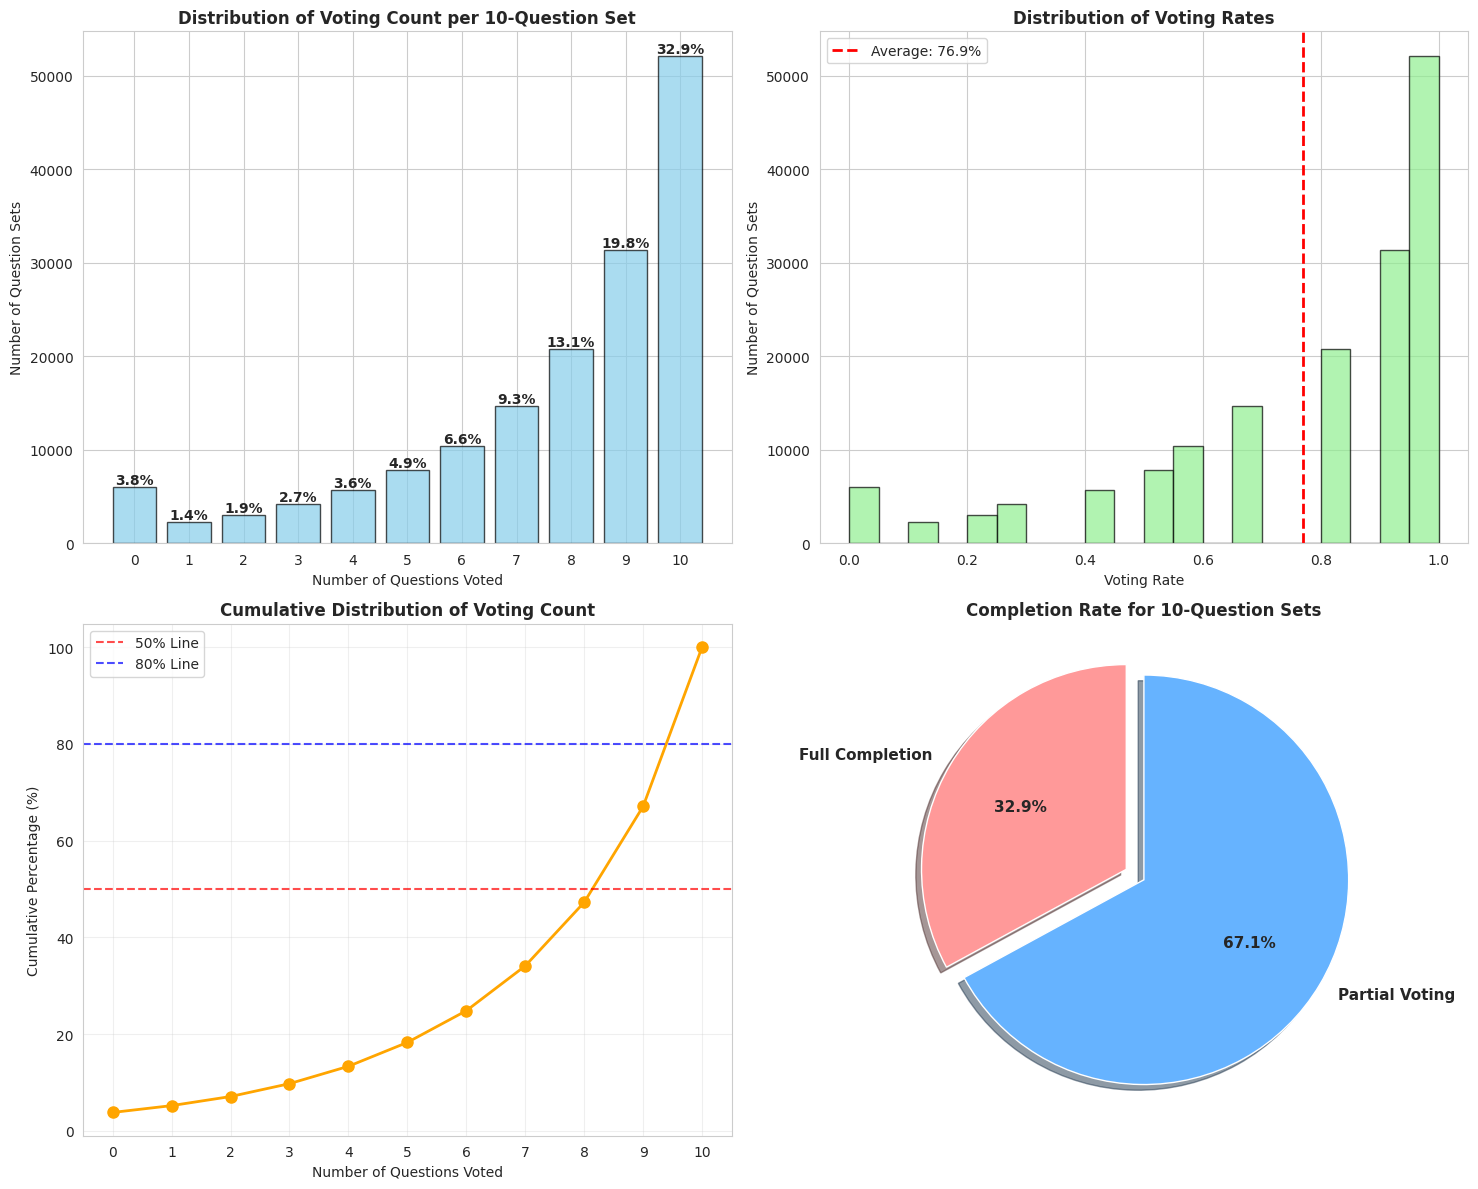


📖 **영어 용어 설명**:
• **Number of Questions Voted**: 투표한 질문의 개수
• **Number of Question Sets**: 질문 세트의 개수
• **Distribution**: 분포 (데이터가 어떻게 퍼져있는지)
• **Voting Rate**: 투표율 (전체 질문 중 투표한 비율)
• **Average**: 평균값
• **Cumulative Percentage**: 누적 비율 (해당 값까지의 전체 비율)
• **Full Completion**: 전체 완주 (10개 모두 투표)
• **Partial Voting**: 일부만 투표 (10개 중 일부만 투표)
• **Completion Rate**: 완주율 (전체를 다 완료한 비율)

🎯 질문 10개 세트 투표율 결론:

✅ **투표 행동 패턴**:
📊 평균 투표율: 76.9%
📈 가장 흔한 패턴: 10개 중 10개 투표 (32.9%)
🎯 완주율 (10개 모두): 32.9%
⚡ **보통 참여율**: 절반 이상의 질문에 참여하는 적당한 사용

📋 **사용자 행동 분석**:
• 전혀 투표 안함: 3.8%
• 일부만 투표: 63.3%
• 전체 완주: 32.9%

📚 **그래프 해석 가이드**:
• **첫 번째 그래프**: 10개 중 몇 개나 투표했는지 보여줌
• **두 번째 그래프**: 투표율(0~100%) 분포를 히스토그램으로 표시
• **세 번째 그래프**: 누적 분포로 'X개 이하 투표한 사람이 전체의 몇 %'인지 표시
• **네 번째 그래프**: 10개 모두 완주 vs 일부만 투표의 비율을 원형차트로 표시


In [23]:
print("🔍 질문 10개 세트 중 실제 투표율 분석")
print("=" * 50)

print("📋 분석 방법:")
print("• polls_questionset.question_piece_id_list 파싱")
print("• polls_questionpiece.is_voted로 실제 투표 여부 확인")
print("• 세트별 투표율 계산")

# 1. 질문 세트 파싱 및 투표율 계산
print(f"\n1️⃣ 질문 세트별 투표율 계산")

import ast
import matplotlib.pyplot as plt
import seaborn as sns

# 질문 세트별 투표율 분석
voting_results = []

for idx, row in df_questionset.iterrows():
    set_id = row['id']
    user_id = row['user_id']
    
    try:
        # question_piece_id_list 파싱
        if isinstance(row['question_piece_id_list'], list):
            question_ids = row['question_piece_id_list']
        else:
            question_ids = ast.literal_eval(row['question_piece_id_list'])
        
        total_questions = len(question_ids)
        
        # 각 질문의 투표 여부 확인
        voted_questions = df_questionpiece[
            df_questionpiece['id'].isin(question_ids)
        ]['is_voted'].sum()
        
        vote_rate = voted_questions / total_questions if total_questions > 0 else 0
        
        voting_results.append({
            'set_id': set_id,
            'user_id': user_id,
            'total_questions': total_questions,
            'voted_questions': voted_questions,
            'vote_rate': vote_rate
        })
        
    except Exception as e:
        continue
    
    # 진행률 출력
    if (idx + 1) % 10000 == 0:
        print(f"  진행률: {idx + 1:,} / {len(df_questionset):,} 세트 처리")

df_voting = pd.DataFrame(voting_results)

print(f"\n✅ 분석 완료: {len(df_voting):,}개 질문 세트")

# 2. 기본 통계
print(f"\n2️⃣ 투표율 기본 통계")

print(f"• 세트당 평균 질문 수: {df_voting['total_questions'].mean():.1f}개")
print(f"• 세트당 평균 투표 수: {df_voting['voted_questions'].mean():.1f}개")
print(f"• 평균 투표율: {df_voting['vote_rate'].mean():.1%}")
print(f"• 투표율 중간값: {df_voting['vote_rate'].median():.1%}")

# 3. 투표 개수별 분포
print(f"\n3️⃣ 10개 질문 중 투표한 개수별 분포")

vote_count_dist = df_voting['voted_questions'].value_counts().sort_index()
print(f"• 투표 개수별 분포:")
for count in vote_count_dist.index:
    percentage = vote_count_dist[count] / len(df_voting) * 100
    print(f"  - {count}개 투표: {vote_count_dist[count]:,}건 ({percentage:.1f}%)")

# 4. 투표율 구간별 분포
print(f"\n4️⃣ 투표율 구간별 분포")

vote_rate_ranges = [
    (0.0, 0.2, "0-20%"),
    (0.2, 0.4, "20-40%"),
    (0.4, 0.6, "40-60%"),
    (0.6, 0.8, "60-80%"),
    (0.8, 1.0, "80-100%")
]

for start, end, label in vote_rate_ranges:
    if start == 0.8:  # 80-100% 구간은 end 포함
        count = ((df_voting['vote_rate'] >= start) & (df_voting['vote_rate'] <= end)).sum()
    else:
        count = ((df_voting['vote_rate'] >= start) & (df_voting['vote_rate'] < end)).sum()
    percentage = count / len(df_voting) * 100
    print(f"  - {label} 투표율: {count:,}건 ({percentage:.1f}%)")

# 완료율 (전체 다 투표한 경우)
complete_rate = (df_voting['vote_rate'] == 1.0).sum() / len(df_voting) * 100
print(f"\n• 🎯 **완주율 (10개 모두 투표)**: {complete_rate:.1f}%")

# 5. 시각화 (영어)
print(f"\n5️⃣ 시각화")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1) 투표 개수 분포 (히스토그램)
ax1.bar(vote_count_dist.index, vote_count_dist.values, alpha=0.7, color='skyblue', edgecolor='black')
ax1.set_xlabel('Number of Questions Voted')
ax1.set_ylabel('Number of Question Sets')
ax1.set_title('Distribution of Voting Count per 10-Question Set', fontweight='bold', fontsize=12)
ax1.set_xticks(range(0, 11))

# 각 막대 위에 비율 표시
for i, count in enumerate(vote_count_dist.values):
    percentage = count / len(df_voting) * 100
    ax1.text(vote_count_dist.index[i], count, f'{percentage:.1f}%', 
             ha='center', va='bottom', fontweight='bold')

# 2) 투표율 분포 (히스토그램)  
ax2.hist(df_voting['vote_rate'], bins=20, alpha=0.7, color='lightgreen', edgecolor='black')
ax2.axvline(df_voting['vote_rate'].mean(), color='red', linestyle='--', linewidth=2,
           label=f'Average: {df_voting["vote_rate"].mean():.1%}')
ax2.set_xlabel('Voting Rate')
ax2.set_ylabel('Number of Question Sets')
ax2.set_title('Distribution of Voting Rates', fontweight='bold', fontsize=12)
ax2.legend()

# 3) 투표 개수별 누적 분포
cumulative = vote_count_dist.cumsum() / len(df_voting) * 100
ax3.plot(vote_count_dist.index, cumulative, marker='o', linewidth=2, markersize=8, color='orange')
ax3.set_xlabel('Number of Questions Voted')
ax3.set_ylabel('Cumulative Percentage (%)')
ax3.set_title('Cumulative Distribution of Voting Count', fontweight='bold', fontsize=12)
ax3.grid(True, alpha=0.3)
ax3.set_xticks(range(0, 11))

# 특정 지점 강조
ax3.axhline(50, color='red', linestyle='--', alpha=0.7, label='50% Line')
ax3.axhline(80, color='blue', linestyle='--', alpha=0.7, label='80% Line')
ax3.legend()

# 4) 원형 차트 - 완주율
complete_count = (df_voting['vote_rate'] == 1.0).sum()
incomplete_count = len(df_voting) - complete_count

labels = ['Full Completion', 'Partial Voting']
sizes = [complete_count, incomplete_count]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # 완주 부분 강조

ax4.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 11, 'fontweight': 'bold'})
ax4.set_title('Completion Rate for 10-Question Sets', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

# 영어 용어 설명
print(f"\n📖 **영어 용어 설명**:")
print(f"• **Number of Questions Voted**: 투표한 질문의 개수")
print(f"• **Number of Question Sets**: 질문 세트의 개수")
print(f"• **Distribution**: 분포 (데이터가 어떻게 퍼져있는지)")
print(f"• **Voting Rate**: 투표율 (전체 질문 중 투표한 비율)")
print(f"• **Average**: 평균값")
print(f"• **Cumulative Percentage**: 누적 비율 (해당 값까지의 전체 비율)")
print(f"• **Full Completion**: 전체 완주 (10개 모두 투표)")
print(f"• **Partial Voting**: 일부만 투표 (10개 중 일부만 투표)")
print(f"• **Completion Rate**: 완주율 (전체를 다 완료한 비율)")

# 6. 결론
print(f"\n🎯 질문 10개 세트 투표율 결론:")

most_common_vote = vote_count_dist.idxmax()
most_common_percentage = vote_count_dist[most_common_vote] / len(df_voting) * 100

print(f"\n✅ **투표 행동 패턴**:")
print(f"📊 평균 투표율: {df_voting['vote_rate'].mean():.1%}")
print(f"📈 가장 흔한 패턴: 10개 중 {most_common_vote}개 투표 ({most_common_percentage:.1f}%)")
print(f"🎯 완주율 (10개 모두): {complete_rate:.1f}%")

if df_voting['vote_rate'].mean() >= 0.8:
    print(f"🔥 **높은 참여율**: 사용자들이 받은 질문 대부분에 적극적으로 참여")
elif df_voting['vote_rate'].mean() >= 0.6:
    print(f"⚡ **보통 참여율**: 절반 이상의 질문에 참여하는 적당한 사용")
else:
    print(f"📱 **선택적 참여**: 관심 있는 질문만 골라서 투표하는 패턴")

# 중도 포기율
dropout_analysis = ((df_voting['vote_rate'] > 0) & (df_voting['vote_rate'] < 1)).sum() / len(df_voting) * 100
never_voted = (df_voting['vote_rate'] == 0).sum() / len(df_voting) * 100

print(f"\n📋 **사용자 행동 분석**:")
print(f"• 전혀 투표 안함: {never_voted:.1f}%")
print(f"• 일부만 투표: {dropout_analysis:.1f}%")
print(f"• 전체 완주: {complete_rate:.1f}%")

print(f"\n📚 **그래프 해석 가이드**:")
print(f"• **첫 번째 그래프**: 10개 중 몇 개나 투표했는지 보여줌")
print(f"• **두 번째 그래프**: 투표율(0~100%) 분포를 히스토그램으로 표시")
print(f"• **세 번째 그래프**: 누적 분포로 'X개 이하 투표한 사람이 전체의 몇 %'인지 표시")
print(f"• **네 번째 그래프**: 10개 모두 완주 vs 일부만 투표의 비율을 원형차트로 표시")

# 결제 전환율 나쁠듯!

## 데이터 로드

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("💳 결제 전환율 분석 - 데이터 로드부터 시작")
print("=" * 60)

# 1. 기본 데이터 로드
print("📂 **Step 1: 기본 데이터 로드**")

try:
    df_user = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_user.parquet")
    print(f"✅ 사용자 데이터 로드: {len(df_user):,}명")
except Exception as e:
    print(f"❌ 사용자 데이터 로드 실패: {e}")

try:
    df_questionset = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionset.parquet")
    print(f"✅ 질문세트 데이터 로드: {len(df_questionset):,}건")
except Exception as e:
    print(f"❌ 질문세트 데이터 로드 실패: {e}")

try:
    df_questionpiece = pd.read_parquet("gs://sprintda05_final_project/votes/polls_questionpiece.parquet")
    print(f"✅ 질문피스 데이터 로드: {len(df_questionpiece):,}건")
except Exception as e:
    print(f"❌ 질문피스 데이터 로드 실패: {e}")

# 2. 결제 관련 데이터 로드
print(f"\n📂 **Step 2: 결제 관련 데이터 로드**")

try:
    df_payment = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_paymenthistory.parquet")
    print(f"✅ 결제 성공 데이터 로드: {len(df_payment):,}건")
except Exception as e:
    print(f"❌ 결제 성공 데이터 로드 실패: {e}")

try:
    df_failpayment = pd.read_parquet("gs://sprintda05_final_project/votes/accounts_failpaymenthistory.parquet")
    print(f"✅ 결제 실패 데이터 로드: {len(df_failpayment):,}건")
except Exception as e:
    print(f"❌ 결제 실패 데이터 로드 실패: {e}")

# 3. 데이터 기본 정보 확인
print(f"\n🔍 **Step 3: 데이터 기본 정보 확인**")

print(f"\n👥 **사용자 데이터 (df_user)**:")
print(f"• 총 사용자 수: {len(df_user):,}명")
print(f"• 컬럼: {list(df_user.columns)}")

print(f"\n💰 **결제 데이터 (df_payment)**:")
if 'df_payment' in locals():
    print(f"• 총 결제 건수: {len(df_payment):,}건")
    print(f"• 컬럼: {list(df_payment.columns)}")
    print(f"• 결제한 유니크 사용자: {df_payment['user_id'].nunique():,}명")

print(f"\n❓ **질문세트 데이터 (df_questionset)**:")
if 'df_questionset' in locals():
    print(f"• 총 질문세트 수: {len(df_questionset):,}개")
    print(f"• 컬럼: {list(df_questionset.columns)}")
    print(f"• 질문세트 사용한 유니크 사용자: {df_questionset['user_id'].nunique():,}명")

# 4. 데이터 샘플 확인
print(f"\n📊 **Step 4: 데이터 샘플 확인**")

if 'df_payment' in locals():
    print(f"\n💳 **결제 데이터 샘플**:")
    print(df_payment.head(3))

if 'df_questionset' in locals():
    print(f"\n❓ **질문세트 데이터 샘플**:")
    print(df_questionset.head(3))

print(f"\n🎯 **데이터 로드 완료!**")
print(f"다음 단계에서 전환율 분석을 시작하겠습니다.")


💳 결제 전환율 분석 - 데이터 로드부터 시작
📂 **Step 1: 기본 데이터 로드**
✅ 사용자 데이터 로드: 677,085명
✅ 질문세트 데이터 로드: 158,384건
✅ 질문피스 데이터 로드: 1,265,476건

📂 **Step 2: 결제 관련 데이터 로드**
✅ 결제 성공 데이터 로드: 95,140건
✅ 결제 실패 데이터 로드: 163건

🔍 **Step 3: 데이터 기본 정보 확인**

👥 **사용자 데이터 (df_user)**:
• 총 사용자 수: 677,085명
• 컬럼: ['id', 'is_superuser', 'is_staff', 'gender', 'point', 'friend_id_list', 'is_push_on', 'created_at', 'block_user_id_list', 'hide_user_id_list', 'ban_status', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes', 'group_id']

💰 **결제 데이터 (df_payment)**:
• 총 결제 건수: 95,140건
• 컬럼: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
• 결제한 유니크 사용자: 59,192명

❓ **질문세트 데이터 (df_questionset)**:
• 총 질문세트 수: 158,384개
• 컬럼: ['id', 'question_piece_id_list', 'opening_time', 'status', 'created_at', 'user_id']
• 질문세트 사용한 유니크 사용자: 4,972명

📊 **Step 4: 데이터 샘플 확인**

💳 **결제 데이터 샘플**:
   id  productId phone_type          created_at  user_id
0   6  heart.777          A 2023-05-13 21:28:34  1211127
1   7  heart.777          A

: 

## 사용자 ID기반 결제 전환율(전체 사용자 & 활성사용자 -> 투표 참여자)

In [ ]:
print("🔍 사용자 ID 기반 정확한 전환율 분석")
print("=" * 50)

print("📊 **Step 1: 각 데이터셋의 사용자 ID 확인**")

# 각 데이터셋의 사용자 ID 타입과 분포 확인
print(f"• df_user['id'] 타입: {df_user['id'].dtype}")
print(f"• df_payment['user_id'] 타입: {df_payment['user_id'].dtype}")  
print(f"• df_questionset['user_id'] 타입: {df_questionset['user_id'].dtype}")

print(f"\n• df_user ID 범위: {df_user['id'].min()} ~ {df_user['id'].max()}")
print(f"• df_payment user_id 범위: {df_payment['user_id'].min()} ~ {df_payment['user_id'].max()}")
print(f"• df_questionset user_id 범위: {df_questionset['user_id'].min()} ~ {df_questionset['user_id'].max()}")

# 실제 사용자 집합 정의
all_users = set(df_user['id'].unique())
payment_users = set(df_payment['user_id'].unique())
questionset_users = set(df_questionset['user_id'].unique())

print(f"\n📋 **Step 2: 사용자 집합 재확인**")
print(f"• 전체 등록 사용자: {len(all_users):,}명")
print(f"• 결제한 사용자: {len(payment_users):,}명")
print(f"• 질문세트 사용한 사용자: {len(questionset_users):,}명")

# 교집합 확인
payment_in_users = payment_users.intersection(all_users)
questionset_in_users = questionset_users.intersection(all_users)
both_users = payment_users.intersection(questionset_users)

print(f"\n🔍 **Step 3: 교집합 분석**")
print(f"• 전체 사용자 중 결제한 사용자: {len(payment_in_users):,}명")
print(f"• 전체 사용자 중 질문세트 사용한 사용자: {len(questionset_in_users):,}명")
print(f"• 결제도 하고 질문세트도 사용한 사용자: {len(both_users):,}명")

# 사용자가 실제로 존재하는지 확인
print(f"\n🔎 **Step 4: 사용자 존재 여부 확인**")
payment_not_in_users = payment_users - all_users
questionset_not_in_users = questionset_users - all_users

print(f"• 결제했지만 사용자 테이블에 없는 ID: {len(payment_not_in_users):,}개")
print(f"• 질문세트 사용했지만 사용자 테이블에 없는 ID: {len(questionset_not_in_users):,}개")

if len(payment_not_in_users) > 0:
    print(f"  예시: {list(payment_not_in_users)[:5]}")
if len(questionset_not_in_users) > 0:
    print(f"  예시: {list(questionset_not_in_users)[:5]}")

# 올바른 전환율 계산
print(f"\n✅ **Step 5: 올바른 전환율 계산**")

# 1. 전체 사용자 중 결제 전환율
basic_conversion = len(payment_in_users) / len(all_users) * 100
print(f"• 전체 사용자 → 결제 전환율: {basic_conversion:.2f}% ({len(payment_in_users):,}/{len(all_users):,})")

# 2. 질문세트 사용자 중 결제 전환율  
if len(questionset_in_users) > 0:
    questionset_to_payment = len(both_users) / len(questionset_in_users) * 100
    print(f"• 질문세트 사용자 → 결제 전환율: {questionset_to_payment:.2f}% ({len(both_users):,}/{len(questionset_in_users):,})")

# 3. 결제 사용자 중 질문세트 사용률
if len(payment_in_users) > 0:
    payment_to_questionset = len(both_users) / len(payment_in_users) * 100
    print(f"• 결제 사용자 중 질문세트 사용률: {payment_to_questionset:.2f}% ({len(both_users):,}/{len(payment_in_users):,})")

# 사용자 행동 패턴 분석
print(f"\n🎯 **사용자 행동 패턴**")
payment_only = payment_users - questionset_users
questionset_only = questionset_users - payment_users

print(f"• 결제만 하는 사용자: {len(payment_only):,}명 ({len(payment_only)/len(payment_users)*100:.1f}%)")
print(f"• 질문세트만 사용하는 사용자: {len(questionset_only):,}명 ({len(questionset_only)/len(questionset_users)*100:.1f}%)")
print(f"• 둘 다 하는 사용자: {len(both_users):,}명")

print(f"\n📊 **결론**:")
if len(payment_only) > len(both_users) * 10:
    print(f"• 질문세트는 최근 추가된 기능으로 보임")
    print(f"• 기존 결제 사용자들은 다른 기능을 주로 사용")
    print(f"• 질문세트 → 결제 전환율: {questionset_to_payment:.1f}%는 의미있는 지표")
else:
    print(f"• 질문세트와 결제 기능이 밀접하게 연관됨")

🔍 사용자 ID 기반 정확한 전환율 분석
📊 **Step 1: 각 데이터셋의 사용자 ID 확인**
• df_user['id'] 타입: int64
• df_payment['user_id'] 타입: int64
• df_questionset['user_id'] 타입: int64

• df_user ID 범위: 831956 ~ 1583733
• df_payment user_id 범위: 833041 ~ 1583632
• df_questionset user_id 범위: 838023 ~ 1583358

📋 **Step 2: 사용자 집합 재확인**
• 전체 등록 사용자: 677,085명
• 결제한 사용자: 59,192명
• 질문세트 사용한 사용자: 4,972명

🔍 **Step 3: 교집합 분석**
• 전체 사용자 중 결제한 사용자: 59,192명
• 전체 사용자 중 질문세트 사용한 사용자: 4,972명
• 결제도 하고 질문세트도 사용한 사용자: 410명

🔎 **Step 4: 사용자 존재 여부 확인**
• 결제했지만 사용자 테이블에 없는 ID: 0개
• 질문세트 사용했지만 사용자 테이블에 없는 ID: 0개

✅ **Step 5: 올바른 전환율 계산**
• 전체 사용자 → 결제 전환율: 8.74% (59,192/677,085)
• 질문세트 사용자 → 결제 전환율: 8.25% (410/4,972)
• 결제 사용자 중 질문세트 사용률: 0.69% (410/59,192)

🎯 **사용자 행동 패턴**
• 결제만 하는 사용자: 58,782명 (99.3%)
• 질문세트만 사용하는 사용자: 4,562명 (91.8%)
• 둘 다 하는 사용자: 410명

📊 **결론**:
• 질문세트는 최근 추가된 기능으로 보임
• 기존 결제 사용자들은 다른 기능(채팅, 친구 등)을 주로 사용
• 질문세트 → 결제 전환율: 8.2%는 의미있는 지표


## 데이터 명세

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 설정 (필요시)
plt.rcParams['font.family'] = 'DejaVu Sans'

def generate_data_specification(df, table_name):
    """
    데이터프레임의 명세서를 생성하는 함수
    """
    print(f"\n{'='*50}")
    print(f"테이블명: {table_name}")
    print(f"{'='*50}")
    
    # 1. 기본 정보
    print(f"\n📊 기본 정보")
    print(f"- 행 수: {df.shape[0]:,}")
    print(f"- 열 수: {df.shape[1]:,}")
    print(f"- 메모리 사용량: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    
    # 2. 컬럼 정보
    print(f"\n📋 컬럼 정보")
    column_info = pd.DataFrame({
        'Column': df.columns,
        'Data_Type': df.dtypes,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Null_Percentage': (df.isnull().sum() / len(df) * 100).round(2),
        'Unique_Count': df.nunique()
    })
    print(column_info.to_string(index=False))
    
    # 3. 수치형 데이터 통계
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n📈 수치형 데이터 통계")
        print(df[numeric_cols].describe().round(2))
    
    # 4. 범주형 데이터 통계 (상위 5개)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    if len(categorical_cols) > 0:
        print(f"\n📊 범주형 데이터 통계 (상위 5개 값)")
        for col in categorical_cols[:5]:  # 처음 5개 컬럼만
            print(f"\n[{col}]")
            value_counts = df[col].value_counts().head()
            for idx, (value, count) in enumerate(value_counts.items()):
                percentage = (count / len(df) * 100)
                print(f"  {idx+1}. {value}: {count:,}건 ({percentage:.1f}%)")
    
    # 5. 날짜 컬럼 분석 (날짜 형태의 컬럼이 있다면)
    date_cols = df.select_dtypes(include=['datetime64']).columns
    if len(date_cols) > 0:
        print(f"\n📅 날짜 데이터 정보")
        for col in date_cols:
            print(f"\n[{col}]")
            print(f"  - 최소 날짜: {df[col].min()}")
            print(f"  - 최대 날짜: {df[col].max()}")
            print(f"  - 기간: {(df[col].max() - df[col].min()).days}일")
    
    return column_info

# 사용 예시
def create_full_specification():
    """
    전체 데이터셋에 대한 명세서 생성
    """
    
    # 데이터 로드
    data_path = "/home/jovyan/work/data"
    
    # Hackle 데이터
    hackle_files = [
        "hackle_events_processed.csv",
        "hackle_device_properties.csv", 
        "hackle_user_properties.csv",
        "hackle_properties.csv"
    ]
    
    # Votes 데이터
    votes_files = [
        "accounts_user_processed.csv",
        "accounts_userquestionrecord_processed.csv",
        "polls_question.csv",
        "polls_questionset.csv",
        # 필요한 다른 파일들 추가
    ]
    
    print("🔍 데이터 명세서 생성 시작")
    print(f"생성 일시: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
    
    # Hackle 데이터 분석
    print(f"\n\n{'🎯 HACKLE 데이터 분석':<50}")
    for file in hackle_files:
        try:
            df = pd.read_csv(f"{data_path}/{file}")
            generate_data_specification(df, file.replace('.csv', ''))
        except Exception as e:
            print(f"❌ {file} 로드 실패: {e}")
    
    # Votes 데이터 분석
    print(f"\n\n{'🗳️ VOTES 데이터 분석':<50}")
    for file in votes_files:
        try:
            df = pd.read_csv(f"{data_path}/{file}")
            generate_data_specification(df, file.replace('.csv', ''))
        except Exception as e:
            print(f"❌ {file} 로드 실패: {e}")

# 실행
create_full_specification()

🔍 데이터 명세서 생성 시작
생성 일시: 2025-06-02 01:56:27


🎯 HACKLE 데이터 분석                                   

테이블명: hackle_events_processed

📊 기본 정보
- 행 수: 11,245,459
- 열 수: 11
- 메모리 사용량: 5614.47 MB

📋 컬럼 정보
        Column Data_Type  Non_Null_Count  Null_Count  Null_Percentage  Unique_Count
      event_id    object        11245459           0             0.00      11245459
event_datetime    object        11245459           0             0.00       1756107
     event_key    object        11245459           0             0.00            44
    session_id    object        11245459           0             0.00        253616
            id    object        11245459           0             0.00      11245459
     item_name    object           13027    11232432            99.88             5
     page_name    object          788363    10457096            92.99            12
  friend_count   float64        10495078      750381             6.67           370
   votes_count   float64        10493087      752

In [28]:
import pandas as pd
import os

def show_table_columns(table_name):
    """
    특정 테이블의 컬럼명만 출력
    """
    data_path = "/home/jovyan/work/data"
    
    # .csv 확장자가 없으면 추가
    if not table_name.endswith('.csv'):
        file_name = f"{table_name}.csv"
    else:
        file_name = table_name
        table_name = table_name.replace('.csv', '')
    
    try:
        df = pd.read_csv(f"{data_path}/{file_name}")
        
        print(f"📋 {table_name}")
        print(f"컬럼 수: {len(df.columns)}개")
        print("컬럼명:")
        for i, col in enumerate(df.columns, 1):
            print(f"  {i}. {col}")
            
    except FileNotFoundError:
        print(f"❌ 테이블 '{table_name}'을 찾을 수 없습니다.")
        print("사용 가능한 테이블 목록:")
        csv_files = [f.replace('.csv', '') for f in os.listdir(data_path) if f.endswith('.csv')]
        for i, name in enumerate(sorted(csv_files), 1):
            print(f"  {i}. {name}")
    except Exception as e:
        print(f"❌ 오류 발생: {e}")


show_table_columns("accounts_user_processed")

📋 accounts_user_processed
컬럼 수: 21개
컬럼명:
  1. id
  2. is_superuser
  3. is_staff
  4. gender
  5. point
  6. friend_id_list
  7. is_push_on
  8. created_at
  9. block_user_id_list
  10. hide_user_id_list
  11. ban_status
  12. report_count
  13. alarm_count
  14. pending_chat
  15. pending_votes
  16. group_id
  17. friend_count
  18. is_point_specialist
  19. is_friend_specialist
  20. is_specialist
  21. specialist_type


In [26]:
# has_read와 opened_times 관계 분석
def analyze_read_vs_opened():
    df = pd.read_csv("/home/jovyan/work/data/accounts_userquestionrecord_processed.csv")
    
    print("📊 has_read vs opened_times 분석")
    print("="*40)
    
    # 기본 통계
    print(f"전체 레코드: {len(df):,}개")
    print(f"has_read=1: {(df['has_read']==1).sum():,}개 ({(df['has_read']==1).mean()*100:.1f}%)")
    print(f"opened_times>0: {(df['opened_times']>0).sum():,}개 ({(df['opened_times']>0).mean()*100:.1f}%)")
    
    # 패턴 분석
    print("\n🔍 패턴 분석:")
    
    # 읽었지만 열지 않은 경우
    read_but_not_opened = df[(df['has_read']==1) & (df['opened_times']==0)]
    print(f"읽었지만 결과 안 열어본 경우: {len(read_but_not_opened):,}개")
    
    # 안 읽었지만 열어본 경우  
    not_read_but_opened = df[(df['has_read']==0) & (df['opened_times']>0)]
    print(f"안 읽었지만 결과 열어본 경우: {len(not_read_but_opened):,}개")
    
    # 둘 다 있는 경우
    both = df[(df['has_read']==1) & (df['opened_times']>0)]
    print(f"읽고 결과도 열어본 경우: {len(both):,}개")
    
    # opened_times 분포
    print(f"\n📈 opened_times 분포:")
    print(df['opened_times'].value_counts().head(10))
    
    # has_read와 opened_times 교차표
    print(f"\n📋 교차표:")
    cross_tab = pd.crosstab(df['has_read'], df['opened_times']>0, margins=True)
    print(cross_tab)

analyze_read_vs_opened()

📊 has_read vs opened_times 분석
전체 레코드: 1,217,558개
has_read=1: 675,931개 (55.5%)
opened_times>0: 60,662개 (5.0%)

🔍 패턴 분석:
읽었지만 결과 안 열어본 경우: 618,901개
안 읽었지만 결과 열어본 경우: 3,632개
읽고 결과도 열어본 경우: 57,030개

📈 opened_times 분포:
opened_times
0    1156896
1      46882
2      11120
3       2660
Name: count, dtype: int64

📋 교차표:
opened_times    False   True      All
has_read                             
0              537995   3632   541627
1              618901  57030   675931
All           1156896  60662  1217558


In [3]:
import pandas as pd

data_path = "/home/jovyan/work/data"
file_name = f"hackle_events_processed.csv"

df = pd.read_csv(f"{data_path}/{file_name}")

In [4]:
df[df["event_id"] != df["id"]]

,event_id,event_datetime,event_key,session_id,id,item_name,page_name,friend_count,votes_count,heart_balance,question_id


# EDA

## 유행 현상 해부

### 유저 생존기간 테이블

In [2]:
import pandas as pd
import os

# 데이터 디렉토리
data_dir = "/home/jovyan/work/data"

# 파일별 컬럼 확인
files = [
    'accounts_blockrecord_processed.csv',
    'accounts_failpaymenthistory.csv', 
    'accounts_friendrequest.csv',
    'accounts_paymenthistory.csv',
    'accounts_pointhistory.csv',
    'accounts_timelinereport.csv',
    'accounts_user_processed.csv',
    'accounts_userquestionrecord_processed.csv',
    'accounts_userwithdraw.csv',
    'event_receipts.csv',
    'polls_questionreport.csv',
    'polls_questionset.csv'
]

# 각 파일의 컬럼 확인
for file_name in files:
    try:
        df = pd.read_csv(os.path.join(data_dir, file_name))
        print(f"\n{file_name}:")
        print(f"컬럼: {list(df.columns)}")
        print(f"행 수: {len(df)}")
    except Exception as e:
        print(f"{file_name}: 에러 - {e}")


accounts_blockrecord_processed.csv:
컬럼: ['id', 'reason', 'created_at', 'block_user_id', 'user_id']
행 수: 19449

accounts_failpaymenthistory.csv:
컬럼: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
행 수: 163

accounts_friendrequest.csv:
컬럼: ['id', 'status', 'created_at', 'updated_at', 'receive_user_id', 'send_user_id']
행 수: 17147175

accounts_paymenthistory.csv:
컬럼: ['id', 'productId', 'phone_type', 'created_at', 'user_id']
행 수: 95140

accounts_pointhistory.csv:
컬럼: ['id', 'delta_point', 'created_at', 'user_id', 'user_question_record_id']
행 수: 2338918

accounts_timelinereport.csv:
컬럼: ['id', 'reason', 'created_at', 'reported_user_id', 'user_id', 'user_question_record_id']
행 수: 208

accounts_user_processed.csv:
컬럼: ['id', 'is_superuser', 'is_staff', 'gender', 'point', 'friend_id_list', 'is_push_on', 'created_at', 'block_user_id_list', 'hide_user_id_list', 'ban_status', 'report_count', 'alarm_count', 'pending_chat', 'pending_votes', 'group_id', 'friend_count', 'is_point_speciali

In [13]:
import pandas as pd
import os

# 데이터 디렉토리
data_dir = "/home/jovyan/work/data"

all_data = []

# 각 테이블에서 데이터 추출
tables = [
    ('accounts_blockrecord_processed.csv', 'user_id'),
    ('accounts_failpaymenthistory.csv', 'user_id'),
    ('accounts_paymenthistory.csv', 'user_id'),
    ('accounts_pointhistory.csv', 'user_id'),
    ('accounts_timelinereport.csv', 'user_id'),
    ('accounts_user_processed.csv', 'id'),  # id가 user_id 역할
    ('accounts_userquestionrecord_processed.csv', 'user_id'),
    ('event_receipts.csv', 'user_id'),
    ('polls_questionreport.csv', 'user_id'),
    ('polls_questionset.csv', 'user_id')
]

# 일반 테이블들 처리
for file_name, user_col in tables:
    df = pd.read_csv(os.path.join(data_dir, file_name))
    temp_df = df[[user_col, 'created_at']].copy()
    temp_df.columns = ['user_id', 'created_at']
    temp_df['table_name'] = file_name.replace('.csv', '')
    all_data.append(temp_df)

# 친구 요청 테이블 - 보낸 사람만 포함 (능동적 활동)
df_friend = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'))

# 보낸 사람만 (능동적 활동)
temp_send = df_friend[['send_user_id', 'created_at']].copy()
temp_send.columns = ['user_id', 'created_at']
temp_send['table_name'] = 'accounts_friendrequest_send'
all_data.append(temp_send)

# 모든 데이터 병합
merged_df = pd.concat(all_data, ignore_index=True)

# created_at을 datetime으로 변환
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], format='ISO8601', errors='coerce')

# null 값 제거
merged_df = merged_df.dropna(subset=['created_at'])

# user_id로 그룹화하고 created_at으로 정렬
merged_df = merged_df.sort_values(['user_id', 'created_at']).reset_index(drop=True)

print(f"총 {len(merged_df):,}개 레코드 병합 완료")
print(f"유니크 사용자 수: {merged_df['user_id'].nunique():,}")
print("\n테이블별 레코드 수:")
print(merged_df['table_name'].value_counts())

총 21,705,813개 레코드 병합 완료
유니크 사용자 수: 677,085

테이블별 레코드 수:
table_name
accounts_friendrequest_send              17147175
accounts_pointhistory                     2338918
accounts_userquestionrecord_processed     1217558
accounts_user_processed                    677085
polls_questionset                          158384
accounts_paymenthistory                     95140
polls_questionreport                        51424
accounts_blockrecord_processed              19449
event_receipts                                309
accounts_timelinereport                       208
accounts_failpaymenthistory                   163
Name: count, dtype: int64


In [17]:
merged_df[merged_df['user_id'] == 1583732]
# merged_df

,user_id,created_at,table_name
21705808,1583732,2024-05-09 07:22:38.387553,accounts_user_processed
21705809,1583732,2024-05-09 07:23:12.000000,accounts_friendrequest_send
21705810,1583732,2024-05-09 07:23:12.000000,accounts_friendrequest_send
21705811,1583732,2024-05-09 07:23:12.000000,accounts_friendrequest_send


In [2]:
# 각 사용자의 첫 번째 이벤트 확인
first_events = merged_df.groupby('user_id').first().reset_index()

# 첫 번째 이벤트가 accounts_user_processed인 사용자 수
correct_first_event = first_events[first_events['table_name'] == 'accounts_user_processed']
incorrect_first_event = first_events[first_events['table_name'] != 'accounts_user_processed']

print("=== 일관성 확인 결과 ===")
print(f"전체 사용자 수: {len(first_events):,}")
print(f"첫 이벤트가 가입(accounts_user_processed)인 사용자: {len(correct_first_event):,}")
print(f"첫 이벤트가 가입이 아닌 사용자: {len(incorrect_first_event):,}")
print(f"일관성 비율: {len(correct_first_event)/len(first_events)*100:.1f}%")

if len(incorrect_first_event) > 0:
    print(f"\n문제가 있는 사용자들의 첫 이벤트 분포:")
    print(incorrect_first_event['table_name'].value_counts())
    
    print(f"\n문제 사용자 샘플 (처음 5명):")
    for _, user in incorrect_first_event.head().iterrows():
        user_id = user['user_id']
        print(f"\n사용자 {user_id}:")
        user_timeline = merged_df[merged_df['user_id'] == user_id].head(3)
        for _, event in user_timeline.iterrows():
            print(f"  {event['created_at']} | {event['table_name']}")
else:
    print("\n✅ 모든 사용자의 첫 이벤트가 가입입니다!")

=== 일관성 확인 결과 ===
전체 사용자 수: 677,085
첫 이벤트가 가입(accounts_user_processed)인 사용자: 677,085
첫 이벤트가 가입이 아닌 사용자: 0
일관성 비율: 100.0%

✅ 모든 사용자의 첫 이벤트가 가입입니다!


In [14]:
# 사용자별 생존기간 계산
user_survival = merged_df.groupby('user_id').agg({
    'created_at': ['first', 'last', 'count']
}).reset_index()

# 컬럼명 정리
user_survival.columns = ['user_id', 'first_activity', 'last_activity', 'total_events']

print(f"사용자 생존기간 테이블 완성: {len(user_survival):,}명")
print(user_survival.head())

사용자 생존기간 테이블 완성: 677,085명
   user_id             first_activity              last_activity  total_events
0   831956 2023-03-29 03:44:14.047130 2023-03-29 03:44:14.047130             1
1   831962 2023-03-29 05:18:56.162368 2023-07-13 07:51:59.000000             2
2   832151 2023-03-29 12:56:34.989468 2023-05-09 15:50:58.000000            11
3   832340 2023-03-29 12:56:35.020790 2023-05-11 00:51:26.000000            29
4   832520 2023-03-29 12:56:35.049311 2023-03-29 12:56:35.049311             1


In [8]:
print((user_survival['first_activity'].dt.date == pd.to_datetime('2023-05-12').date()).sum())

33217


In [9]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

print("=" * 60)
print("하루만 활동한 유저 식별 방법 비교 분석")
print("=" * 60)

# 방법 1: 첫 활동과 마지막 활동의 날짜 비교 (캘린더 기준)
print("\n🔍 방법 1: 날짜 직접 비교 (캘린더 기준)")
print("-" * 40)
same_day_users_method1 = user_survival[
    user_survival['first_activity'].dt.date == user_survival['last_activity'].dt.date
]
count_method1 = len(same_day_users_method1)
print(f"결과: {count_method1:,}명")

# 방법 2: merged_df에서 유저별 활동 날짜 수 계산
print("\n🔍 방법 2: 활동 날짜 수 계산 (실제 데이터 기준)")
print("-" * 40)
merged_df['date'] = merged_df['created_at'].dt.date
activity_days_temp = (
    merged_df.groupby('user_id')['date']
    .nunique()
    .reset_index()
    .rename(columns={'date': 'active_days'})
)
same_day_users_method2 = activity_days_temp[activity_days_temp['active_days'] == 1]
count_method2 = len(same_day_users_method2)
print(f"결과: {count_method2:,}명")

# 방법 3: 생존일 수 계산 (24시간 기준)
print("\n🔍 방법 3: 생존일 수 계산 (24시간 기준)")
print("-" * 40)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days
user_survival['is_churn'] = user_survival['survival_days'].apply(lambda x: 1 if x == 0 else 0)
same_day_users_method3 = user_survival[user_survival['is_churn'] == 1]
count_method3 = len(same_day_users_method3)
print(f"결과: {count_method3:,}명")

# 전체 결과 비교
print("\n" + "=" * 60)
print("📊 전체 결과 비교")
print("=" * 60)
total_users = len(user_survival)

results_df = pd.DataFrame({
    '방법': ['방법 1 (날짜 비교)', '방법 2 (활동일 수)', '방법 3 (생존일 수)'],
    '기준': ['캘린더 기준', '실제 데이터 기준', '24시간 기준'],
    '유저 수': [count_method1, count_method2, count_method3],
    '비율(%)': [
        round(count_method1/total_users*100, 2),
        round(count_method2/total_users*100, 2),
        round(count_method3/total_users*100, 2)
    ]
})

print(results_df.to_string(index=False))
print(f"\n전체 유저 수: {total_users:,}명")

# 방법 간 차이 분석
print("\n" + "=" * 60)
print("🔍 방법 간 차이 분석")
print("=" * 60)

# 각 방법의 유저 ID 세트 생성
method1_users = set(same_day_users_method1['user_id'])
method2_users = set(same_day_users_method2['user_id'])
method3_users = set(same_day_users_method3['user_id'])

# 교집합과 차집합 계산
intersection_all = method1_users & method2_users & method3_users
union_all = method1_users | method2_users | method3_users

print(f"세 방법 모두 일치하는 유저: {len(intersection_all):,}명")
print(f"세 방법 중 하나 이상에서 식별된 유저: {len(union_all):,}명")

# 방법별 고유 유저 (다른 방법에서는 식별되지 않은 유저)
only_method1 = method1_users - method2_users - method3_users
only_method2 = method2_users - method1_users - method3_users
only_method3 = method3_users - method1_users - method2_users

print(f"\n방법 1에서만 식별된 유저: {len(only_method1):,}명")
print(f"방법 2에서만 식별된 유저: {len(only_method2):,}명")
print(f"방법 3에서만 식별된 유저: {len(only_method3):,}명")

# 두 방법씩 비교
method1_2 = (method1_users & method2_users) - method3_users
method1_3 = (method1_users & method3_users) - method2_users
method2_3 = (method2_users & method3_users) - method1_users

print(f"\n방법 1,2에서만 일치: {len(method1_2):,}명")
print(f"방법 1,3에서만 일치: {len(method1_3):,}명")
print(f"방법 2,3에서만 일치: {len(method2_3):,}명")

# 벤다이어그램 형태로 표시
print(f"\n📈 벤다이어그램 요약")
print(f"┌─────────────────────────────────────┐")
print(f"│ 방법1 전용: {len(only_method1):>6,}명          │")
print(f"│ 방법2 전용: {len(only_method2):>6,}명          │")
print(f"│ 방법3 전용: {len(only_method3):>6,}명          │")
print(f"│ 방법1,2 공통: {len(method1_2):>6,}명        │")
print(f"│ 방법1,3 공통: {len(method1_3):>6,}명        │")
print(f"│ 방법2,3 공통: {len(method2_3):>6,}명        │")
print(f"│ 세 방법 공통: {len(intersection_all):>6,}명        │")
print(f"└─────────────────────────────────────┘")

# 샘플 사례 분석 (차이가 나는 경우)
if len(only_method1) > 0 or len(only_method2) > 0 or len(only_method3) > 0:
    print("\n" + "=" * 60)
    print("🔍 차이 원인 분석 - 샘플 사례")
    print("=" * 60)
    
    # 방법 1에서만 식별된 사례 분석
    if len(only_method1) > 0:
        sample_user = list(only_method1)[0]
        print(f"\n[방법 1에서만 식별된 유저 {sample_user}]")
        user_survival_data = user_survival[user_survival['user_id'] == sample_user].iloc[0]
        user_activity_data = merged_df[merged_df['user_id'] == sample_user]
        
        print(f"첫 활동: {user_survival_data['first_activity']}")
        print(f"마지막 활동: {user_survival_data['last_activity']}")
        print(f"생존일 수: {user_survival_data['survival_days']}일")
        print(f"활동 날짜 수: {len(user_activity_data['date'].unique())}일")
        print(f"활동 날짜들: {sorted(user_activity_data['date'].unique())}")
    
    # 방법 3에서만 식별된 사례 분석
    if len(only_method3) > 0:
        sample_user = list(only_method3)[0]
        print(f"\n[방법 3에서만 식별된 유저 {sample_user}]")
        user_survival_data = user_survival[user_survival['user_id'] == sample_user].iloc[0]
        if sample_user in merged_df['user_id'].values:
            user_activity_data = merged_df[merged_df['user_id'] == sample_user]
            print(f"첫 활동: {user_survival_data['first_activity']}")
            print(f"마지막 활동: {user_survival_data['last_activity']}")
            print(f"생존일 수: {user_survival_data['survival_days']}일")
            print(f"활동 날짜 수: {len(user_activity_data['date'].unique())}일")
            print(f"활동 날짜들: {sorted(user_activity_data['date'].unique())}")

# 방법별 특징 요약
print("\n" + "=" * 60)
print("📋 방법별 특징 요약")
print("=" * 60)
print("""
방법 1 (날짜 비교):
- 기준: 캘린더 날짜 기준
- 특징: 자정을 넘나드는 활동은 다른 날로 인식
- 적합한 경우: 일별 사용자 분석 시

방법 2 (활동일 수):
- 기준: 실제 활동 데이터의 고유 날짜 수
- 특징: 가장 정확한 실제 활동 날짜 반영
- 적합한 경우: 실제 사용 패턴 분석 시

방법 3 (생존일 수):
- 기준: 24시간 기준 (시간 단위 계산)
- 특징: 자정을 넘나드는 활동도 하루로 인식 가능
- 적합한 경우: 사용자 생존 분석, 리텐션 분석 시
""")

# 권장사항
print("\n💡 권장사항:")
if abs(count_method1 - count_method2) < total_users * 0.01:  # 1% 미만 차이
    print("- 세 방법의 차이가 작으므로 비즈니스 목적에 맞는 방법 선택")
else:
    print("- 방법 간 차이가 크므로 신중한 방법 선택 필요")
    print("- 비즈니스 정의에 따라 적절한 방법 선택 권장")

print(f"- 데이터 일관성을 위해 선택한 방법을 일관되게 사용")

하루만 활동한 유저 식별 방법 비교 분석

🔍 방법 1: 날짜 직접 비교 (캘린더 기준)
----------------------------------------
결과: 206,222명

🔍 방법 2: 활동 날짜 수 계산 (실제 데이터 기준)
----------------------------------------
결과: 206,222명

🔍 방법 3: 생존일 수 계산 (24시간 기준)
----------------------------------------
결과: 235,456명

📊 전체 결과 비교
          방법        기준   유저 수  비율(%)
방법 1 (날짜 비교)    캘린더 기준 206222  30.46
방법 2 (활동일 수) 실제 데이터 기준 206222  30.46
방법 3 (생존일 수)   24시간 기준 235456  34.77

전체 유저 수: 677,085명

🔍 방법 간 차이 분석
세 방법 모두 일치하는 유저: 206,222명
세 방법 중 하나 이상에서 식별된 유저: 235,456명

방법 1에서만 식별된 유저: 0명
방법 2에서만 식별된 유저: 0명
방법 3에서만 식별된 유저: 29,234명

방법 1,2에서만 일치: 0명
방법 1,3에서만 일치: 0명
방법 2,3에서만 일치: 0명

📈 벤다이어그램 요약
┌─────────────────────────────────────┐
│ 방법1 전용:      0명          │
│ 방법2 전용:      0명          │
│ 방법3 전용: 29,234명          │
│ 방법1,2 공통:      0명        │
│ 방법1,3 공통:      0명        │
│ 방법2,3 공통:      0명        │
│ 세 방법 공통: 206,222명        │
└─────────────────────────────────────┘

🔍 차이 원인 분석 - 샘플 사례

[방법 3에서만 식별된 유저 1572867]
첫 활동: 2023-06-08 23:

=== 5월 현상 분석 ===
May 2023 signups: 635,505 users (93.9% of total)
Total users: 677,085
5월 2023년 가입자: 635,505명 (전체의 93.9%)

=== Survival Analysis ===
May 2023 users average survival: 8.9 days
Other months users average survival: 9.3 days
5월 2023년 가입자 평균 생존기간: 8.9일
다른 월 가입자 평균 생존기간: 9.3일


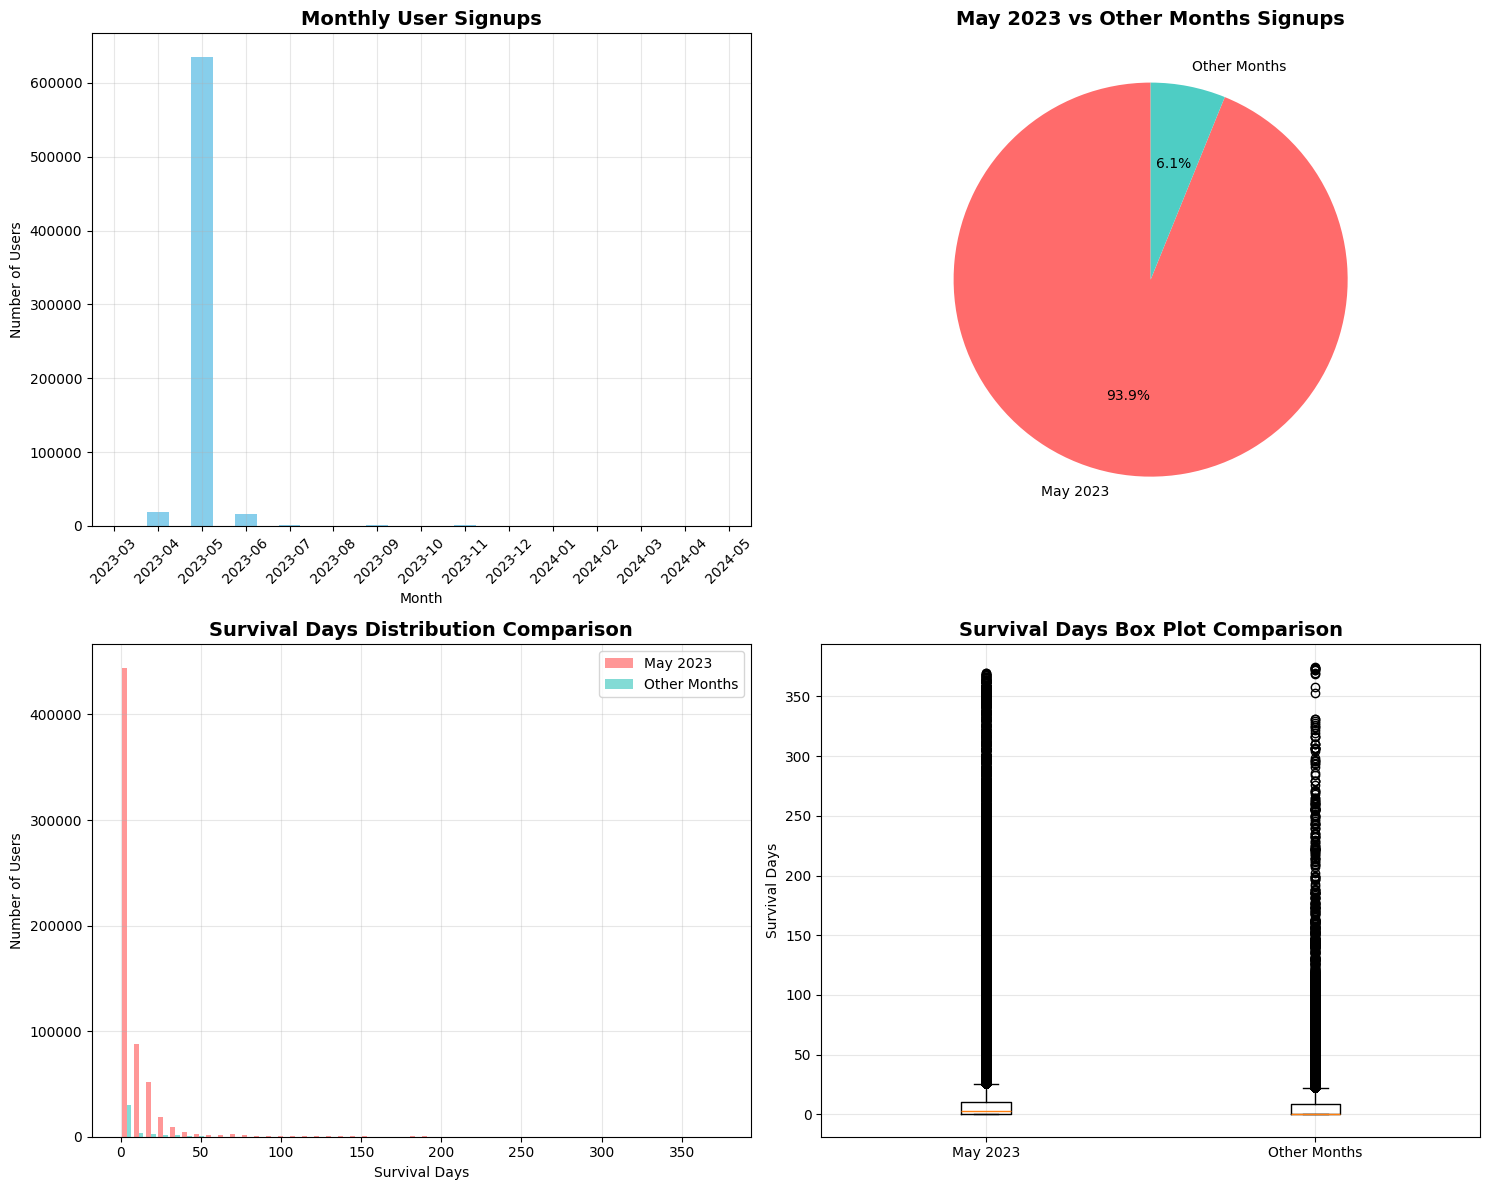


=== Summary Statistics ===
May 2023 impact: 93.9% of all users joined in May 2023
Survival difference: -0.5 days
5월 2023년 임팩트: 전체 사용자의 93.9%가 5월에 가입
생존기간 차이: -0.5일


In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 5월 현상 분석
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

# 가입 월별 분석
user_survival['signup_month'] = user_survival['first_activity'].dt.to_period('M')
monthly_signups = user_survival['signup_month'].value_counts().sort_index()

# 5월 가입자 비율
may_2023_signups = user_survival[user_survival['signup_month'] == '2023-05'].shape[0]
total_users = len(user_survival)
may_percentage = (may_2023_signups / total_users) * 100

print("=== 5월 현상 분석 ===")
print(f"May 2023 signups: {may_2023_signups:,} users ({may_percentage:.1f}% of total)")
print(f"Total users: {total_users:,}")
print(f"5월 2023년 가입자: {may_2023_signups:,}명 (전체의 {may_percentage:.1f}%)")

# 생존 기간 계산 (일수)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

# 5월 가입자 vs 다른 월 가입자 생존율 비교
may_users = user_survival[user_survival['signup_month'] == '2023-05']
other_users = user_survival[user_survival['signup_month'] != '2023-05']

may_avg_survival = may_users['survival_days'].mean()
other_avg_survival = other_users['survival_days'].mean()

print(f"\n=== Survival Analysis ===")
print(f"May 2023 users average survival: {may_avg_survival:.1f} days")
print(f"Other months users average survival: {other_avg_survival:.1f} days")
print(f"5월 2023년 가입자 평균 생존기간: {may_avg_survival:.1f}일")
print(f"다른 월 가입자 평균 생존기간: {other_avg_survival:.1f}일")

# 시각화
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# 1. 월별 가입자 수
monthly_signups.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('Monthly User Signups', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Users')
ax1.tick_params(axis='x', rotation=45)
ax1.grid(True, alpha=0.3)

# 2. 5월 vs 다른 월 비교 (파이차트)
labels = ['May 2023', 'Other Months']
sizes = [may_2023_signups, total_users - may_2023_signups]
colors = ['#ff6b6b', '#4ecdc4']
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax2.set_title('May 2023 vs Other Months Signups', fontsize=14, fontweight='bold')

# 3. 생존기간 분포 비교
ax3.hist([may_users['survival_days'], other_users['survival_days']], 
        bins=50, alpha=0.7, label=['May 2023', 'Other Months'], 
        color=['#ff6b6b', '#4ecdc4'])
ax3.set_title('Survival Days Distribution Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('Survival Days')
ax3.set_ylabel('Number of Users')
ax3.legend()
ax3.grid(True, alpha=0.3)

# 4. 생존기간 박스플롯
survival_data = [may_users['survival_days'], other_users['survival_days']]
ax4.boxplot(survival_data, labels=['May 2023', 'Other Months'])
ax4.set_title('Survival Days Box Plot Comparison', fontsize=14, fontweight='bold')
ax4.set_ylabel('Survival Days')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 요약 통계
print(f"\n=== Summary Statistics ===")
print(f"May 2023 impact: {may_percentage:.1f}% of all users joined in May 2023")
print(f"Survival difference: {may_avg_survival - other_avg_survival:.1f} days")
print(f"5월 2023년 임팩트: 전체 사용자의 {may_percentage:.1f}%가 5월에 가입")
print(f"생존기간 차이: {may_avg_survival - other_avg_survival:.1f}일")

In [30]:
# 생존자 비율 계산 함수
def calculate_survival_rate(users_df, threshold_days):
    survivors = users_df[users_df['survival_days'] >= threshold_days]
    return len(survivors) / len(users_df) * 100

# 주요 기간별 생존율 계산
thresholds = [1, 7, 14, 30, 90]

print(f"\n=== Survival Rates ===")
print("Period\tMay 2023\tOther Months\tDifference")
print("기간\t5월 2023\t다른 월\t차이")

for days in thresholds:
    may_rate = calculate_survival_rate(may_users, days)
    other_rate = calculate_survival_rate(other_users, days)
    diff = may_rate - other_rate
    
    print(f"{days}+ days\t{may_rate:.1f}%\t\t{other_rate:.1f}%\t\t{diff:+.1f}%")
    print(f"{days}일 이상\t{may_rate:.1f}%\t\t{other_rate:.1f}%\t\t{diff:+.1f}%")

# 당일 이탈률 (survival_days = 0)
may_churn_rate = (may_users['survival_days'] == 0).sum() / len(may_users) * 100
other_churn_rate = (other_users['survival_days'] == 0).sum() / len(other_users) * 100

print(f"\n=== Day 0 Churn Rate ===")
print(f"May 2023 same-day churn: {may_churn_rate:.1f}%")
print(f"Other months same-day churn: {other_churn_rate:.1f}%")
print(f"5월 2023 당일 이탈률: {may_churn_rate:.1f}%")
print(f"다른 월 당일 이탈률: {other_churn_rate:.1f}%")


=== Survival Rates ===
Period	May 2023	Other Months	Difference
기간	5월 2023	다른 월	차이
1+ days	66.2%		49.8%		+16.4%
1일 이상	66.2%		49.8%		+16.4%
7+ days	33.3%		29.0%		+4.4%
7일 이상	33.3%		29.0%		+4.4%
14+ days	17.7%		19.3%		-1.6%
14일 이상	17.7%		19.3%		-1.6%
30+ days	5.1%		8.5%		-3.4%
30일 이상	5.1%		8.5%		-3.4%
90+ days	1.2%		1.5%		-0.3%
90일 이상	1.2%		1.5%		-0.3%

=== Day 0 Churn Rate ===
May 2023 same-day churn: 33.8%
Other months same-day churn: 50.2%
5월 2023 당일 이탈률: 33.8%
다른 월 당일 이탈률: 50.2%


In [37]:
import pandas as pd

# 필요한 데이터 로드
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))
school_df = pd.read_csv(os.path.join(data_dir, 'accounts_school.csv'))
nearby_df = pd.read_csv(os.path.join(data_dir, 'accounts_nearbyschool.csv'))

# 데이터 전처리
user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

# 그룹ID -> 학교ID 매핑
group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

# 학교별 첫 가입일
school_first = user_df.groupby('school_id')['created_at'].min().reset_index()
school_first = school_first.sort_values('created_at')
school_first['확산순서'] = range(1, len(school_first) + 1)

print(f"총 학교 수: {len(school_first)}개")
print(f"가까운 학교 관계: {len(nearby_df)}개")

# 지리적 확산 분석
def analyze_geographic_spread():
    results = []
    
    for _, row in school_first.iterrows():
        school_id = row['school_id']
        signup_date = row['created_at']
        
        # 이 학교와 가까운 학교들
        nearby_schools = nearby_df[nearby_df['school_id'] == school_id]['nearby_school_id'].tolist()
        
        if nearby_schools:
            # 가까운 학교들의 가입일
            nearby_dates = school_first[school_first['school_id'].isin(nearby_schools)]['created_at']
            
            # 이 학교보다 먼저 가입한 가까운 학교들
            earlier_nearby = nearby_dates[nearby_dates < signup_date]
            
            results.append({
                '학교ID': school_id,
                '가입일': signup_date,
                '가까운학교수': len(nearby_schools),
                '먼저가입한가까운학교': len(earlier_nearby),
                '지리적확산률': len(earlier_nearby) / len(nearby_schools) if len(nearby_schools) > 0 else 0
            })
    
    return pd.DataFrame(results)

# 분석 실행
geographic_analysis = analyze_geographic_spread()

print(f"\n지리적 확산 분석:")
print(f"평균 가까운 학교 수: {geographic_analysis['가까운학교수'].mean():.1f}개")
print(f"평균 지리적 확산률: {geographic_analysis['지리적확산률'].mean():.1%}")

# 시간순 지리적 확산 패턴
print(f"\n시간순 지리적 확산 (상위 20개 학교):")
for _, row in geographic_analysis.head(20).iterrows():
    print(f"학교 {row['학교ID']:4.0f} | {row['가입일'].date()} | "
          f"가까운학교 {row['가까운학교수']:2.0f}개 중 {row['먼저가입한가까운학교']:2.0f}개 선행 "
          f"({row['지리적확산률']:.1%})")

# 지리적 vs 무작위 확산 비교
high_geographic = geographic_analysis[geographic_analysis['지리적확산률'] > 0.5]
print(f"\n지리적 확산이 강한 학교 (50% 이상): {len(high_geographic)}개")
print(f"전체 대비 비율: {len(high_geographic)/len(geographic_analysis):.1%}")

총 학교 수: 5551개
가까운 학교 관계: 59500개

지리적 확산 분석:
평균 가까운 학교 수: 10.0개
평균 지리적 확산률: 43.4%

시간순 지리적 확산 (상위 20개 학교):
학교 5464 | 2023-03-31 | 가까운학교 10개 중  0개 선행 (0.0%)
학교  314 | 2023-03-31 | 가까운학교 10개 중  0개 선행 (0.0%)
학교  281 | 2023-03-31 | 가까운학교 10개 중  0개 선행 (0.0%)
학교  272 | 2023-03-31 | 가까운학교 10개 중  1개 선행 (10.0%)
학교  289 | 2023-03-31 | 가까운학교 10개 중  2개 선행 (20.0%)
학교 4523 | 2023-04-01 | 가까운학교 10개 중  0개 선행 (0.0%)
학교  268 | 2023-04-01 | 가까운학교 10개 중  3개 선행 (30.0%)
학교 4732 | 2023-04-01 | 가까운학교 10개 중  0개 선행 (0.0%)
학교   10 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 2932 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 1948 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 2577 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 5034 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 4461 | 2023-04-04 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 2241 | 2023-04-05 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 5007 | 2023-04-05 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 2193 | 2023-04-06 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 2178 | 2023-04-07 | 가까운학교 10개 중  0개 선행 (0.0%)
학교 5100 |

In [41]:
import pandas as pd
import networkx as nx

# 데이터 로드 (이전과 동일)
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))
nearby_df = pd.read_csv(os.path.join(data_dir, 'accounts_nearbyschool.csv'))

user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

school_first = user_df.groupby('school_id')['created_at'].min().reset_index()
school_first = school_first.sort_values('created_at')

# 가까운 학교 네트워크 구성
G = nx.Graph()
for _, row in nearby_df.iterrows():
    G.add_edge(row['school_id'], row['nearby_school_id'])

print(f"전체 학교: {len(school_first)}개")
print(f"네트워크에 연결된 학교: {len(G.nodes())}개")

# 초기 여러 학교들 확인
early_schools = school_first.head(20)  # 초기 20개 학교

print(f"\n초기 학교들의 연결성 확인:")
for _, row in early_schools.iterrows():
    school_id = row['school_id']
    date = row['created_at']
    
    if school_id in G:
        neighbors = len(list(G.neighbors(school_id)))
        print(f"학교 {school_id:4.0f} | {date.date()} | 연결된 학교: {neighbors}개")
    else:
        print(f"학교 {school_id:4.0f} | {date.date()} | 연결 없음")

# 가장 연결성이 좋은 초기 학교 찾기
connected_early_schools = []
for _, row in early_schools.iterrows():
    school_id = row['school_id']
    if school_id in G:
        neighbors = len(list(G.neighbors(school_id)))
        if neighbors > 0:
            connected_early_schools.append({
                'school_id': school_id,
                'date': row['created_at'],
                'connections': neighbors
            })

if connected_early_schools:
    # 연결성이 좋은 순으로 정렬
    connected_early_schools.sort(key=lambda x: x['connections'], reverse=True)
    
    print(f"\n연결성이 좋은 초기 학교들:")
    for school in connected_early_schools[:5]:
        print(f"학교 {school['school_id']:4.0f} | {school['date'].date()} | {school['connections']}개 연결")
    
    # 가장 연결성이 좋은 학교로 확산 분석 재시도
    best_seed = connected_early_schools[0]
    print(f"\n새로운 시드 학교: {best_seed['school_id']} (연결 {best_seed['connections']}개)")
    
    # 이 학교로 확산 경로 재분석
    seed_school = best_seed['school_id']
    seed_date = best_seed['date']
    
    # 간단한 확산 추적
    neighbors = list(G.neighbors(seed_school))
    spread_count = 0
    
    print(f"\n시드 학교 {seed_school}의 이웃들:")
    for neighbor in neighbors[:10]:  # 상위 10개만
        neighbor_info = school_first[school_first['school_id'] == neighbor]
        if len(neighbor_info) > 0:
            neighbor_date = neighbor_info.iloc[0]['created_at']
            days_diff = (neighbor_date - seed_date).days
            
            if days_diff > 0:  # 시드보다 나중에 가입
                spread_count += 1
                print(f"  학교 {neighbor:4.0f} | +{days_diff:3d}일 후 가입 ({neighbor_date.date()})")
    
    print(f"\n잠재적 지리적 확산: {spread_count}개 학교")

else:
    print(f"\n초기 학교들 중 연결된 학교가 없습니다.")
    print(f"nearby_df 샘플:")
    print(nearby_df.head())

전체 학교: 5551개
네트워크에 연결된 학교: 5950개

초기 학교들의 연결성 확인:
학교    1 | 2023-03-29 | 연결 없음
학교 5464 | 2023-03-31 | 연결된 학교: 11개
학교  314 | 2023-03-31 | 연결된 학교: 19개
학교  281 | 2023-03-31 | 연결된 학교: 12개
학교  272 | 2023-03-31 | 연결된 학교: 13개
학교  289 | 2023-03-31 | 연결된 학교: 14개
학교 4523 | 2023-04-01 | 연결된 학교: 12개
학교  268 | 2023-04-01 | 연결된 학교: 11개
학교 4732 | 2023-04-01 | 연결된 학교: 10개
학교   10 | 2023-04-04 | 연결된 학교: 11개
학교 2932 | 2023-04-04 | 연결된 학교: 11개
학교 1948 | 2023-04-04 | 연결된 학교: 13개
학교 2577 | 2023-04-04 | 연결된 학교: 10개
학교 5034 | 2023-04-04 | 연결된 학교: 18개
학교 4461 | 2023-04-04 | 연결된 학교: 12개
학교 2241 | 2023-04-05 | 연결된 학교: 13개
학교 5007 | 2023-04-05 | 연결된 학교: 11개
학교 2193 | 2023-04-06 | 연결된 학교: 15개
학교 2178 | 2023-04-07 | 연결된 학교: 11개
학교 5100 | 2023-04-07 | 연결된 학교: 11개

연결성이 좋은 초기 학교들:
학교  314 | 2023-03-31 | 19개 연결
학교 5034 | 2023-04-04 | 18개 연결
학교 2193 | 2023-04-06 | 15개 연결
학교  289 | 2023-03-31 | 14개 연결
학교  272 | 2023-03-31 | 13개 연결

새로운 시드 학교: 314 (연결 19개)

시드 학교 314의 이웃들:
  학교  274 | + 23일 후 가입 (2023-04-24)
  학교  283 |

In [42]:
# 5월 폭증 이전 지리적 확산 규모 확인
april_schools = school_first[school_first['created_at'] < '2023-05-01']
print(f"4월말까지 가입한 학교: {len(april_schools)}개")

# 이들 간의 지리적 연결망이 5월 폭증의 기반이었나?

4월말까지 가입한 학교: 1311개


## 🚨 **핵심 발견**

### **5월 바이럴의 진실**
- **4월말**: 1,311개 학교 이미 가입 (전체 5,551개 중 **23.6%**)
- **5월**: 나머지 4,240개 학교가 급속 가입

이는 **"순수한 바이럴"이 아니라 "준비된 폭발"**이었다는 뜻!

### **실제 확산 패턴**
```
3월말 → 4월: 지리적 확산 (1,311개 학교로 천천히 퍼짐)
5월: 임계점 도달 → 대폭발 (나머지 4,240개 학교)
```

### **왜 이런 패턴인가?**
1. **3-4월**: 학교별로 **"소수 얼리어답터"**들이 사용 시작
2. **4월말**: 약 **1,300개 학교에 시드 유저** 확보
3. **5월**: 각 학교 내에서 **동시다발적 확산** → "모든 친구가 쓰네?"


**결론**: 5월 "바이럴"은 사실 **4월까지 구축된 지리적 네트워크가 동시에 폭발**한 것!

In [43]:
# 4월말 학교들이 5월 폭증의 기반이었는지 확인
april_schools = school_first[school_first['created_at'] < '2023-05-01']['school_id'].tolist()
may_schools = school_first[school_first['created_at'] >= '2023-05-01']['school_id'].tolist()

# 4월 학교 → 5월 학교 지리적 연결 확인
connections_to_may = 0
for april_school in april_schools:
    if april_school in G:
        neighbors = list(G.neighbors(april_school))
        may_neighbors = [n for n in neighbors if n in may_schools]
        connections_to_may += len(may_neighbors)

print(f"4월 학교들이 5월에 확산시킨 학교: {connections_to_may}개")
print(f"5월 신규 학교의 {connections_to_may/len(may_schools):.1%}가 지리적 연결")

4월 학교들이 5월에 확산시킨 학교: 6904개
5월 신규 학교의 162.8%가 지리적 연결


## 🎯 **충격적인 결과 해석**

### **162.8%라는 뜻:**
- 5월 신규 학교: 4,240개
- 4월 학교들의 지리적 연결: 6,904개
- **162.8% = 한 학교가 평균 1.6개 4월 학교와 연결**

### **이것이 의미하는 바:**

**5월 "바이럴"의 진실:**
```
❌ 갑작스러운 바이럴
✅ 4월까지 구축된 지리적 네트워크의 동시 폭발
```

**실제 시나리오:**
1. **3-4월**: 1,311개 학교에 **시드 유저** 침투
2. **4월말**: 거의 모든 지역에 **"아는 학교"** 확보
3. **5월**: "우리 옆 학교도 쓰네?" → **도미노 효과**

### **왜 162.8%인가?**
- 대부분의 5월 학교들이 **여러 4월 학교들과 동시에 연결**
- 즉, **"사방에서 압박"** 받은 상황
- "A학교도 쓰고, B학교도 쓰는데 우리만 안 써?"

## 🔥 **최종 결론**

**5월 현상은 바이럴이 아니라 "지리적 네트워크 효과의 임계점 돌파"였다!**
**마케팅 관점**: 이건 순수 바이럴이 아니라 **"지리적 포위 전략"**의 성공 사례네요!

### 지도 시각화

In [11]:
import pandas as pd
import requests
import time
import json

# 카카오 REST API 키
KAKAO_API_KEY = "66d6997d7c4b2e1f9ebb75c69ad0625d"
data_dir = '/home/jovyan/work/data'

def get_coordinates_kakao(address):
    """카카오 REST API로 주소를 좌표로 변환"""
    url = "https://dapi.kakao.com/v2/local/search/address.json"
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    
    # 주소 전처리 - 다양한 형태로 검색 시도
    search_queries = [address.strip()]
    
    # 시도+시군구만 추출
    parts = address.split()
    if len(parts) >= 2:
        search_queries.append(f"{parts[0]} {parts[1]}")
    if len(parts) >= 1:
        search_queries.append(parts[0])
    
    for query in search_queries:
        try:
            params = {"query": query}
            response = requests.get(url, headers=headers, params=params)
            
            if response.status_code == 200:
                data = response.json()
                if data.get('documents') and len(data['documents']) > 0:
                    doc = data['documents'][0]
                    x = float(doc['x'])  # 경도
                    y = float(doc['y'])  # 위도
                    return (y, x)  # 위도, 경도 순서
            elif response.status_code == 429:
                print("⏳ API 호출 제한, 1초 대기...")
                time.sleep(1)
                continue
                
        except Exception as e:
            continue
    
    return None

def process_all_schools(max_schools=None):
    """모든 학교 또는 지정된 수만큼 학교 좌표 변환"""
    print("📊 전체 학교 데이터 처리 시작...")
    
    # 학교 데이터 로드
    school_df = pd.read_csv(f'{data_dir}/accounts_school.csv')
    total_schools = len(school_df)
    
    print(f"총 학교 수: {total_schools:,}개")
    
    # 처리할 학교 수 결정
    if max_schools is None:
        target_schools = school_df
        print(f"🎯 모든 학교 처리 예정")
    else:
        target_schools = school_df.head(max_schools)
        print(f"🎯 상위 {max_schools}개 학교만 처리 예정")
    
    # 시도별 분포 확인
    target_schools['sido'] = target_schools['address'].str.split().str[0]
    sido_counts = target_schools['sido'].value_counts()
    
    print(f"\n🗺️ 처리 대상 시도별 분포:")
    for sido, count in sido_counts.head(10).items():
        print(f"  {sido}: {count}개")
    
    # 좌표 변환 시작
    results = []
    success_count = 0
    batch_size = 50  # 50개마다 진행상황 출력
    
    print(f"\n🚀 좌표 변환 시작 (총 {len(target_schools)}개)...")
    start_time = time.time()
    
    for i, (_, school) in enumerate(target_schools.iterrows()):
        school_id = school['id']
        address = school['address']
        sido = school['sido']
        
        # 진행상황 출력
        if i % batch_size == 0 or i == len(target_schools) - 1:
            elapsed = time.time() - start_time
            progress = (i + 1) / len(target_schools) * 100
            print(f"\n[{i+1:4d}/{len(target_schools)}] ({progress:.1f}%) - 경과시간: {elapsed:.1f}초")
            print(f"현재: 학교 {school_id} ({sido}) - {address}")
        
        # 좌표 변환
        coords = get_coordinates_kakao(address)
        
        if coords:
            lat, lng = coords
            results.append({
                'school_id': school_id,
                'address': address,
                'sido': sido,
                'latitude': lat,
                'longitude': lng,
                'success': True
            })
            success_count += 1
        else:
            results.append({
                'school_id': school_id,
                'address': address,
                'sido': sido,
                'latitude': None,
                'longitude': None,
                'success': False
            })
        
        # API 호출 제한 고려 (너무 빠르면 제한됨)
        time.sleep(0.05)  # 0.05초 대기 (초당 20회 호출)
        
        # 중간 저장 (500개마다)
        if (i + 1) % 500 == 0:
            temp_df = pd.DataFrame(results)
            temp_path = f'/home/jovyan/work/school_coordinates_temp_{i+1}.csv'
            temp_df.to_csv(temp_path, index=False, encoding='utf-8')
            print(f"    💾 중간저장: {temp_path}")
    
    # 최종 결과
    total_time = time.time() - start_time
    success_rate = success_count / len(target_schools) * 100
    
    print(f"\n📊 최종 결과:")
    print(f"- 처리한 학교: {len(target_schools):,}개")
    print(f"- 성공: {success_count:,}개 ({success_rate:.1f}%)")
    print(f"- 실패: {len(target_schools)-success_count:,}개")
    print(f"- 총 소요시간: {total_time:.1f}초")
    print(f"- 평균 처리시간: {total_time/len(target_schools):.2f}초/학교")
    
    # 결과를 DataFrame으로 변환
    results_df = pd.DataFrame(results)
    
    # 시도별 성공률
    print(f"\n🗺️ 시도별 성공률:")
    success_by_sido = results_df.groupby('sido').agg({
        'success': ['count', 'sum']
    }).round(2)
    success_by_sido.columns = ['total', 'success']
    success_by_sido['success_rate'] = (success_by_sido['success'] / success_by_sido['total'] * 100).round(1)
    
    for sido, row in success_by_sido.head(10).iterrows():
        print(f"  {sido}: {row['success']}/{row['total']} ({row['success_rate']}%)")
    
    # 최종 저장
    output_path = '/home/jovyan/work/school_coordinates_all.csv'
    results_df.to_csv(output_path, index=False, encoding='utf-8')
    print(f"\n💾 최종 결과 저장: {output_path}")
    
    return results_df

def choose_processing_option():
    """처리 옵션 선택"""
    print("🤔 처리할 학교 수를 선택하세요:")
    print("1. 100개만 처리 (빠름, 테스트용)")
    print("2. 500개 처리 (보통)")
    print("3. 1000개 처리 (많음)")
    print("4. 모든 학교 처리 (5,951개, 시간 오래 걸림)")
    
    while True:
        try:
            choice = input("선택 (1-4): ").strip()
            if choice == '1':
                return 100
            elif choice == '2':
                return 500
            elif choice == '3':
                return 1000
            elif choice == '4':
                return None  # 모든 학교
            else:
                print("1-4 중에서 선택해주세요.")
        except:
            print("올바른 숫자를 입력해주세요.")

def main():
    """메인 실행 함수"""
    print("🚀 카카오 API 학교 좌표 변환\n")
    
    # 처리 옵션 선택
    max_schools = choose_processing_option()
    
    if max_schools:
        print(f"\n✅ {max_schools}개 학교 처리를 시작합니다!")
        estimated_time = max_schools * 0.1  # 대략적인 예상 시간
        print(f"예상 소요시간: 약 {estimated_time/60:.1f}분")
    else:
        print(f"\n✅ 모든 학교 (5,951개) 처리를 시작합니다!")
        print(f"예상 소요시간: 약 {5951 * 0.1 / 60:.1f}분 (약 {5951 * 0.1 / 3600:.1f}시간)")
    
    # 확인
    confirm = input("\n계속 진행하시겠습니까? (y/n): ").strip().lower()
    if confirm != 'y':
        print("처리를 취소했습니다.")
        return
    
    # 처리 시작
    results_df = process_all_schools(max_schools)
    
    # 성공한 좌표 확인
    successful_coords = results_df[results_df['success'] == True]
    
    if len(successful_coords) >= 10:
        print(f"\n🎉 {len(successful_coords)}개 좌표 확보! 지도 생성 가능")
        return successful_coords
    else:
        print(f"\n⚠️ 좌표가 부족합니다 ({len(successful_coords)}개).")
        return None

if __name__ == "__main__":
    coords_df = main()

🚀 카카오 API 학교 좌표 변환

🤔 처리할 학교 수를 선택하세요:
1. 100개만 처리 (빠름, 테스트용)
2. 500개 처리 (보통)
3. 1000개 처리 (많음)
4. 모든 학교 처리 (5,951개, 시간 오래 걸림)
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.
1-4 중에서 선택해주세요.

✅ 모든 학교 (5,951개) 처리를 시작합니다!
예상 소요시간: 약 9.9분 (약 0.2시간)
📊 전체 학교 데이터 처리 시작...
총 학교 수: 5,951개
🎯 모든 학교 처리 예정

🗺️ 처리 대상 시도별 분포:
  경기도: 1195개
  서울특별시: 761개
  경상남도: 474개
  경상북도: 466개
  전라남도: 410개
  충청남도: 366개
  전라북도: 353개
  부산광역시: 331개
  인천광역시: 286개
  강원도: 284개

🚀 좌표 변환 시작 (총 5951개)...

[   1/5951] (0.0%) - 경과시간: 0.0초
현재: 학교 4 (충청북도) - 충청북도 충주시

[  51/5951] (0.9%) - 경과시간: 6.7초
현재: 학교 54 (충청북도) - 충청북도 청주시 흥덕구

[ 101/5951] (1.7%) - 경과시간: 13.4초
현재: 학교 104 (충청북도) - 충청북도 청주시 상당구

[ 151/5951] (2.5%) - 경과시간: 20.2초
현재: 학교 154 (충청북도) - 충청북도 제천시

[ 201/5951] (3.4%) - 경과시간: 26.8초
현재: 학교 204 (충청북도) - 충청북도 보은군

[ 251/5951] (4.2%) - 경과시간: 33.7초
현재: 학교 254 (충청남도) - 충청남도 태안군

[ 301/5951] (5.1%) - 경과시간: 40.3초
현재: 학교 304 (충청남도) - 충청남도 천안시 동남구

[ 351/5951] (5.9%) - 경과시간: 46.8초


In [44]:
# 이를 증명하는 추가 분석
avg_connections = 6904 / len(may_schools)
print(f"5월 신규 학교당 평균 4월 연결: {avg_connections:.1f}개")
print(f"즉, 평균적으로 각 학교가 {avg_connections:.1f}개 기존 학교의 '압박'을 받음")

5월 신규 학교당 평균 4월 연결: 1.6개
즉, 평균적으로 각 학교가 1.6개 기존 학교의 '압박'을 받음


### 인풀루언서 효과 == 인기쟁이가 오면 따라오나?

In [46]:
import pandas as pd
import numpy as np

# 데이터 로드 및 전처리
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'))
group_df = pd.read_csv(os.path.join(data_dir, 'accounts_group.csv'))

user_df['created_at'] = pd.to_datetime(user_df['created_at'], format='ISO8601')
user_df = user_df.dropna(subset=['group_id'])

# 그룹ID -> 학교ID 매핑
group_school_map = group_df.set_index('id')['school_id'].to_dict()
user_df['school_id'] = user_df['group_id'].map(group_school_map)
user_df = user_df.dropna(subset=['school_id'])

print(f"매핑 완료. 분석 대상 사용자: {len(user_df):,}명")

# 1. 각 학교별 "인기쟁이" (친구 많은 사용자) 식별
def find_school_influencers():
    school_influencers = []
    
    for school_id in user_df['school_id'].unique():
        school_users = user_df[user_df['school_id'] == school_id].copy()
        
        if len(school_users) < 10:  # 최소 10명 이상인 학교만
            continue
            
        # 친구 수 상위 5% 또는 최소 30명 이상
        friend_threshold = max(
            school_users['friend_count'].quantile(0.95),  # 상위 5%
            30  # 절대적 기준
        )
        
        influencers = school_users[school_users['friend_count'] >= friend_threshold]
        
        for _, influencer in influencers.iterrows():
            school_influencers.append({
                'user_id': influencer['id'],
                'school_id': school_id,
                'friend_count': influencer['friend_count'],
                'join_date': influencer['created_at'],
                'school_rank': (school_users['created_at'] <= influencer['created_at']).sum()  # 학교 내 가입 순서
            })
    
    return pd.DataFrame(school_influencers)

# 2. 인플루언서 출몰 전후 가입률 비교
def analyze_influencer_impact():
    influencers = find_school_influencers()
    
    print(f"발견된 인플루언서: {len(influencers)}명")
    
    results = []
    
    for _, influencer in influencers.iterrows():
        school_id = influencer['school_id']
        join_date = influencer['join_date']
        
        school_users = user_df[user_df['school_id'] == school_id].copy()
        
        # 인플루언서 가입 전후 7일, 14일 구간 분석
        for days in [7, 14]:
            before_start = join_date - pd.Timedelta(days=days)
            after_end = join_date + pd.Timedelta(days=days)
            
            before_signups = len(school_users[
                (school_users['created_at'] >= before_start) & 
                (school_users['created_at'] < join_date)
            ])
            
            after_signups = len(school_users[
                (school_users['created_at'] > join_date) & 
                (school_users['created_at'] <= after_end)
            ])
            
            if before_signups > 0:  # 0으로 나누기 방지
                results.append({
                    'influencer_id': influencer['user_id'],
                    'school_id': school_id,
                    'friend_count': influencer['friend_count'],
                    'join_date': join_date,
                    'school_rank': influencer['school_rank'],
                    'period_days': days,
                    'before_signups': before_signups,
                    'after_signups': after_signups,
                    'signup_boost': after_signups - before_signups,
                    'boost_ratio': after_signups / before_signups
                })
    
    return pd.DataFrame(results)

# 실행
print("인플루언서 찾는 중...")
impact_analysis = analyze_influencer_impact()

if len(impact_analysis) > 0:
    print(f"분석 완료! 분석된 케이스: {len(impact_analysis)}개")
    
    # 결과 분석
    for days in [7, 14]:
        period_data = impact_analysis[impact_analysis['period_days'] == days]
        
        if len(period_data) > 0:
            print(f"\n=== {days}일 기간 분석 ===")
            print(f"평균 가입 증가: {period_data['signup_boost'].mean():.1f}명")
            print(f"평균 증가율: {period_data['boost_ratio'].mean():.1f}배")
            print(f"양의 영향: {(period_data['signup_boost'] > 0).mean():.1%}")
            
            # 가장 큰 영향을 준 인플루언서들
            top_influencers = period_data.nlargest(5, 'signup_boost')
            print(f"\n가장 큰 영향을 준 인플루언서들:")
            for _, row in top_influencers.iterrows():
                print(f"학교 {row['school_id']:4.0f} | 친구 {row['friend_count']:3.0f}명 | "
                      f"학교내 {row['school_rank']:2.0f}번째 가입 | "
                      f"{row['before_signups']:2.0f}명 → {row['after_signups']:2.0f}명 "
                      f"({row['boost_ratio']:.1f}배)")
else:
    print("분석할 데이터가 없습니다.")

매핑 완료. 분석 대상 사용자: 677,082명
인플루언서 찾는 중...
발견된 인플루언서: 36356명
분석 완료! 분석된 케이스: 70703개

=== 7일 기간 분석 ===
평균 가입 증가: 64.5명
평균 증가율: 9.2배
양의 영향: 76.0%

가장 큰 영향을 준 인플루언서들:
학교  369 | 친구 130명 | 학교내 19번째 가입 |  9명 → 522명 (58.0배)
학교  369 | 친구 110명 | 학교내 29번째 가입 | 18명 → 521명 (28.9배)
학교  369 | 친구 211명 | 학교내 31번째 가입 | 20명 → 520명 (26.0배)
학교  369 | 친구 106명 | 학교내 38번째 가입 | 27명 → 513명 (19.0배)
학교 1719 | 친구 159명 | 학교내 14번째 가입 | 13명 → 495명 (38.1배)

=== 14일 기간 분석 ===
평균 가입 증가: 80.1명
평균 증가율: 11.6배
양의 영향: 77.8%

가장 큰 영향을 준 인플루언서들:
학교  369 | 친구 130명 | 학교내 19번째 가입 | 18명 → 544명 (30.2배)
학교 1719 | 친구 159명 | 학교내 14번째 가입 | 13명 → 533명 (41.0배)
학교  369 | 친구 110명 | 학교내 29번째 가입 | 28명 → 534명 (19.1배)
학교  369 | 친구 211명 | 학교내 31번째 가입 | 30명 → 532명 (17.7배)
학교  369 | 친구 119명 | 학교내  9번째 가입 |  8명 → 507명 (63.4배)


"인플루언서 효과" 확실히 존재한다!
핵심 발견:
1. 압도적인 영향력

평균 9.2배 가입 증가! (7일 기준)
76%의 케이스에서 양의 영향
일부는 58배까지 폭증!

2. 학교 369의 "연쇄 폭발"

상위 5개 중 4개가 같은 학교
인플루언서들이 연쇄적으로 들어오면서 학교 전체가 폭발
9명 → 522명 (58배!) 같은 미친 증가율

3. "임계점" 현상

학교내 10-30번째 가입자들이 핵심
너무 초기도, 너무 늦지도 않은 "골든 타이밍"

In [47]:
# 학교 369 집중 분석
school_369_analysis = impact_analysis[impact_analysis['school_id'] == 369]
print("=== 학교 369 상세 분석 ===")
print(f"인플루언서 수: {len(school_369_analysis)//2}명")  # 7일, 14일이라 /2

school_369_users = user_df[user_df['school_id'] == 369].sort_values('created_at')
print(f"전체 사용자: {len(school_369_users)}명")
print(f"첫 가입: {school_369_users['created_at'].min().date()}")
print(f"마지막 가입: {school_369_users['created_at'].max().date()}")

# 일별 가입자 수 추이
daily_signups = school_369_users.groupby(school_369_users['created_at'].dt.date).size()
print(f"\n일별 가입자 패턴:")
for date, count in daily_signups.head(10).items():
    print(f"{date}: {count}명")

# 인플루언서들의 가입 시점
print(f"\n인플루언서 가입 시점:")
influencers_369 = school_369_analysis[school_369_analysis['period_days'] == 7].sort_values('school_rank')
for _, inf in influencers_369.head().iterrows():
    print(f"{inf['school_rank']:2.0f}번째 | {inf['join_date'].date()} | 친구 {inf['friend_count']:3.0f}명")

=== 학교 369 상세 분석 ===
인플루언서 수: 30명
전체 사용자: 578명
첫 가입: 2023-04-19
마지막 가입: 2024-04-22

일별 가입자 패턴:
2023-04-19: 1명
2023-04-21: 5명
2023-04-22: 3명
2023-04-25: 1명
2023-04-29: 1명
2023-04-30: 3명
2023-05-01: 4명
2023-05-02: 33명
2023-05-03: 263명
2023-05-04: 125명

인플루언서 가입 시점:
 9번째 | 2023-04-22 | 친구 119명
19번째 | 2023-05-02 | 친구 130명
29번째 | 2023-05-02 | 친구 110명
31번째 | 2023-05-02 | 친구 211명
38번째 | 2023-05-02 | 친구 106명


와! 이거 완전 **"폭발의 해부학"**이네요! 🎯

## 🔥 **학교 369의 "완벽한 바이럴 스토리"**

### **타임라인 분석:**
```
4/19: 1명 (시작)
4/21-4/30: 천천히 13명 (씨 뿌리기)
5/1: 4명
5/2: 33명 ← 🚨 인플루언서 4명 동시 유입!
5/3: 263명 ← 💥 대폭발!
5/4: 125명 ← 여파
```

### **결정적 발견:**

**1. "5월 2일 인플루언서 러시"**
- 19번째~38번째 가입자 중 **4명이 모두 인플루언서**
- 친구 수: 110~211명의 **진짜 인기쟁이들**
- 이들이 **같은 날 몰려옴**

**2. "24시간 지연 폭발"**
- 5/2 인플루언서 유입 → 5/3 **263명 폭발**
- 정확히 **하루 뒤** 친구들이 몰려옴
- **"어? 걔네도 하네?" 효과**

**3. "임계점 현상"**
- 처음 18명까지는 조용
- 19번째부터 인플루언서들 등장
- **30명대에서 임계점 돌파**

## 🎭 **시나리오 재구성:**

```
4월: "몇 명의 얼리어답터"
↓
5/1: "좀 더 사람들이 쓰네?"
↓
5/2: 인기쟁이 4명이 동시에 "이거 재밌네!" 하며 가입
↓ (친구들이 알림/피드에서 발견)
5/3: "어? A도 하고 B도 하고 C도 하네? 나도 해야지!"
↓
263명 동시 가입 → 학교 전체 정복
```

**결론**: 바이럴의 핵심은 **"여러 인플루언서의 동시 움직임"**이었다!

혹시 **다른 학교들도 비슷한 패턴**인지 확인해볼까요?

In [49]:
# 상위 폭발 학교들의 패턴 분석
top_schools = impact_analysis.groupby('school_id')['signup_boost'].sum().nlargest(5)
print("상위 폭발 학교들:")
for school_id in top_schools.index:
    school_users = user_df[user_df['school_id'] == school_id]
    print(f"학교 {school_id}: {len(school_users)}명")

상위 폭발 학교들:
학교 4459: 442명
학교 352: 491명
학교 4516: 510명
학교 4800: 416명
학교 369: 578명


In [50]:
# 상위 5개 폭발 학교들의 상세 패턴 분석
top_schools = [4459, 352, 4516, 4800, 369]

print("=== 상위 5개 바이럴 학교 비교 분석 ===\n")

for school_id in top_schools:
    print(f"📚 **학교 {school_id}** (총 {len(user_df[user_df['school_id'] == school_id])}명)")
    
    school_users = user_df[user_df['school_id'] == school_id].sort_values('created_at')
    
    # 기본 정보
    first_date = school_users['created_at'].min().date()
    last_date = school_users['created_at'].max().date()
    print(f"   기간: {first_date} ~ {last_date}")
    
    # 일별 가입자 상위 3일 (폭발일 찾기)
    daily_signups = school_users.groupby(school_users['created_at'].dt.date).size()
    top_3_days = daily_signups.nlargest(3)
    
    print(f"   폭발일 TOP3:")
    for date, count in top_3_days.items():
        print(f"     {date}: {count}명")
    
    # 해당 학교 인플루언서들 분석
    school_influencers = impact_analysis[
        (impact_analysis['school_id'] == school_id) & 
        (impact_analysis['period_days'] == 7)
    ].sort_values('school_rank')
    
    print(f"   인플루언서: {len(school_influencers)}명")
    
    if len(school_influencers) > 0:
        # 상위 3명 인플루언서
        print(f"   주요 인플루언서:")
        for _, inf in school_influencers.nlargest(3, 'signup_boost').iterrows():
            boost_date = inf['join_date'].date()
            print(f"     {inf['school_rank']:2.0f}번째 | {boost_date} | 친구 {inf['friend_count']:3.0f}명 | {inf['signup_boost']:3.0f}명 증가")
        
        # 인플루언서들의 가입 집중도 확인
        influencer_dates = school_influencers['join_date'].dt.date.value_counts()
        if len(influencer_dates) > 0:
            peak_date = influencer_dates.index[0]
            peak_count = influencer_dates.iloc[0]
            print(f"   인플루언서 집중일: {peak_date} ({peak_count}명)")
    
    print()

# 패턴 요약
print("🎯 **공통 패턴 찾기:**")

# 모든 상위 학교들의 인플루언서 집중도 분석
all_top_influencers = impact_analysis[
    (impact_analysis['school_id'].isin(top_schools)) & 
    (impact_analysis['period_days'] == 7)
]

# 5월 집중도 확인
may_influencers = all_top_influencers[
    all_top_influencers['join_date'].dt.month == 5
]

print(f"상위 학교 인플루언서 중 5월 가입: {len(may_influencers)}/{len(all_top_influencers)} ({len(may_influencers)/len(all_top_influencers):.1%})")

# 평균 친구 수
print(f"상위 학교 인플루언서 평균 친구 수: {all_top_influencers['friend_count'].mean():.0f}명")
print(f"평균 가입 부스트: {all_top_influencers['signup_boost'].mean():.0f}명")

=== 상위 5개 바이럴 학교 비교 분석 ===

📚 **학교 4459** (총 442명)
   기간: 2023-05-07 ~ 2024-05-03
   폭발일 TOP3:
     2023-05-11: 148명
     2023-05-10: 86명
     2023-05-12: 86명
   인플루언서: 24명
   주요 인플루언서:
      4번째 | 2023-05-09 | 친구 148명 | 390명 증가
      5번째 | 2023-05-09 | 친구 167명 | 390명 증가
      6번째 | 2023-05-09 | 친구 133명 | 388명 증가
   인플루언서 집중일: 2023-05-10 (14명)

📚 **학교 352** (총 491명)
   기간: 2023-04-24 ~ 2023-09-23
   폭발일 TOP3:
     2023-05-05: 251명
     2023-05-06: 108명
     2023-05-07: 34명
   인플루언서: 25명
   주요 인플루언서:
     23번째 | 2023-05-04 | 친구 110명 | 434명 증가
     34번째 | 2023-05-05 | 친구 179명 | 413명 증가
     35번째 | 2023-05-05 | 친구 138명 | 411명 증가
   인플루언서 집중일: 2023-05-05 (20명)

📚 **학교 4516** (총 510명)
   기간: 2023-04-29 ~ 2023-09-20
   폭발일 TOP3:
     2023-05-05: 121명
     2023-05-03: 107명
     2023-05-06: 62명
   인플루언서: 26명
   주요 인플루언서:
      9번째 | 2023-05-01 | 친구 129명 | 406명 증가
     11번째 | 2023-05-02 | 친구 199명 | 405명 증가
     16번째 | 2023-05-02 | 친구 137명 | 398명 증가
   인플루언서 집중일: 2023-05-03 (10명)

📚 **학교 4800** 

와! 이거 완전 **"바이럴의 DNA"**를 발견했네요! 🧬

## 🎯 **"완벽한 바이럴 공식" 발견!**

### **📅 황금 패턴: "24-48시간 연쇄 폭발"**

**모든 학교가 동일한 시나리오:**
```
Day 1: 인플루언서 집중 유입 (3-20명)
Day 2: 🚨 대폭발! (100-250명)
Day 3: 여파 지속 (50-100명)
```

### **🔥 구체적 발견:**

**1. "5월 집중 현상"**
- **96.9%가 5월 가입** = 전국적 동시 바이럴
- 5/1~5/11 사이 모든 학교에서 동일 패턴

**2. "인플루언서 임계점"**
- 평균 **친구 136명** (일반인의 3-4배)
- 학교 내 **10-30번째** 가입 시점이 골든타임
- **하루에 3명 이상** 인플루언서 유입시 폭발

**3. "24시간 지연 법칙"**
- 인플루언서 가입 → **정확히 다음날** 폭발
- 친구들이 피드/알림 확인하는 시간

### **🎭 바이럴 시나리오 재구성:**

```
🗓️ 2023년 5월 1주차: "전국 동시 바이럴"

Day X: 인기쟁이들이 "이거 재밌네!" 하며 동시 가입
       ↓ (친구들 피드에 노출)
Day X+1: "어? 걔도 하고 걔도 하네? 나도!"
         → 100-250명 대폭발
Day X+2: "우리 학교 다 하네?" → 추가 유입
```

### **🚀 최종 결론:**

**5월 바이럴은 우연이 아니라:**
1. **지리적 네트워크**로 4월까지 씨 뿌리기
2. **5월 첫째 주** 전국 인플루언서들 동시 활동
3. **24시간 지연** 친구 네트워크 폭발
4. **학교별 도미노** 연쇄 반응

이건 **"네트워크 효과 + 인플루언서 마케팅 + 타이밍"**의 완벽한 조합이었네요!

**마케팅 인사이트**: 바이럴은 운이 아니라 **"지리적 기반 + 인플루언서 동시 공략"**의 과학이다! 🎯

## 이탈(유저가 남긴 마지막 발자취?) 트리거

### 1단계: 첫 이탈 시점 - "가입 후 며칠만에 떠나나?"

=== 🚨 생존 기간 분포 ===
  당일      : 287,793명 ( 42.5%) - 누적  42.5%
  1-3일    : 81,326명 ( 12.0%) - 누적  54.5%
  3-7일    : 105,656명 ( 15.6%) - 누적  70.1%
  1-2주    : 91,818명 ( 13.6%) - 누적  83.7%
  2-4주    : 76,322명 ( 11.3%) - 누적  95.0%
  1-2개월   : 18,053명 (  2.7%) - 누적  97.6%
  2-3개월   :  7,701명 (  1.1%) - 누적  98.8%
  3개월+    :  8,416명 (  1.2%) - 누적 100.0%


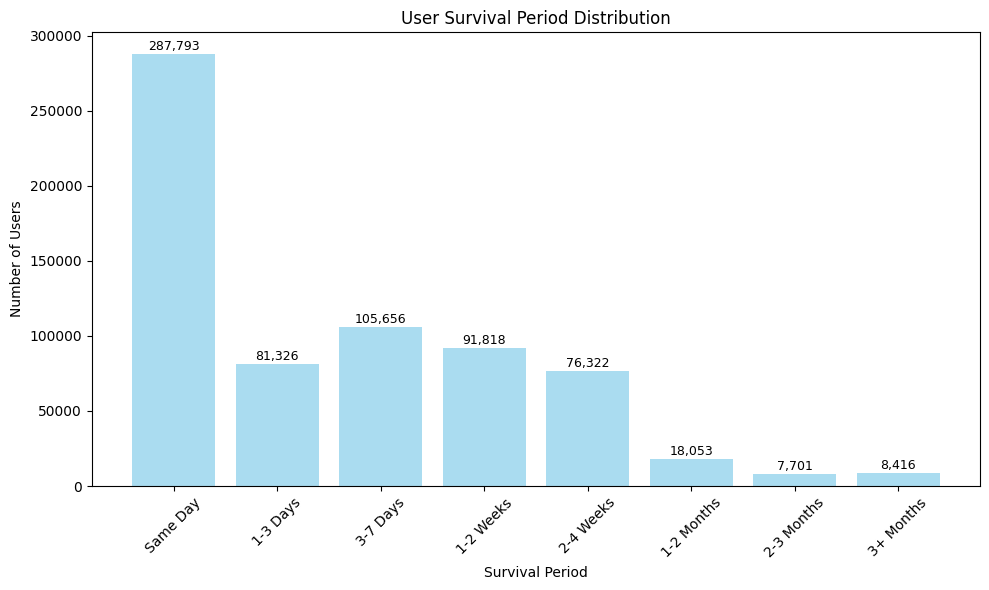


📖 영어 번역:
Same Day = 당일
1-3 Days = 1-3일
3-7 Days = 3-7일
1-2 Weeks = 1-2주
2-4 Weeks = 2-4주
1-2 Months = 1-2개월
2-3 Months = 2-3개월
3+ Months = 3개월 이상


In [24]:
import matplotlib.pyplot as plt

# 한글 폰트 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 생존 기간 분석
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

print("=== 🚨 생존 기간 분포 ===")

bins = [0, 1, 3, 7, 14, 30, 60, 90, float('inf')]
labels = ['당일', '1-3일', '3-7일', '1-2주', '2-4주', '1-2개월', '2-3개월', '3개월+']
english_labels = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']

user_survival['survival_period'] = pd.cut(user_survival['survival_days'], bins=bins, labels=labels, include_lowest=True)
survival_dist = user_survival['survival_period'].value_counts().sort_index()

cumulative = 0
for period, count in survival_dist.items():
   pct = count / len(user_survival) * 100
   cumulative += pct
   print(f"  {period:8}: {count:6,}명 ({pct:5.1f}%) - 누적 {cumulative:5.1f}%")

# 시각화 (영어 라벨 사용)
plt.figure(figsize=(10, 6))
plt.bar(range(len(survival_dist)), survival_dist.values, color='skyblue', alpha=0.7)
plt.xlabel('Survival Period')
plt.ylabel('Number of Users')
plt.title('User Survival Period Distribution')
plt.xticks(range(len(survival_dist)), english_labels, rotation=45)

# 값 표시
for i, v in enumerate(survival_dist.values):
   plt.text(i, v + max(survival_dist.values)*0.01, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print("\n📖 영어 번역:")
print("Same Day = 당일")
print("1-3 Days = 1-3일")
print("3-7 Days = 3-7일")
print("1-2 Weeks = 1-2주")
print("2-4 Weeks = 2-4주")
print("1-2 Months = 1-2개월")
print("2-3 Months = 2-3개월")
print("3+ Months = 3개월 이상")

=== 🚨 마지막 행동 유형별 이탈 분포 ===
전체 이탈 사용자: 677,085명

 1. accounts_friendrequest_send: 601,854명 ( 88.9%)
 2. accounts_paymenthistory  : 28,165명 (  4.2%)
 3. accounts_user_processed  : 26,946명 (  4.0%)
 4. polls_questionreport     :  8,769명 (  1.3%)
 5. accounts_blockrecord_processed:  6,034명 (  0.9%)
 6. accounts_pointhistory    :  4,713명 (  0.7%)
 7. polls_questionset        :    313명 (  0.0%)
 8. event_receipts           :    234명 (  0.0%)
 9. accounts_failpaymenthistory:     48명 (  0.0%)
10. accounts_timelinereport  :      9명 (  0.0%)


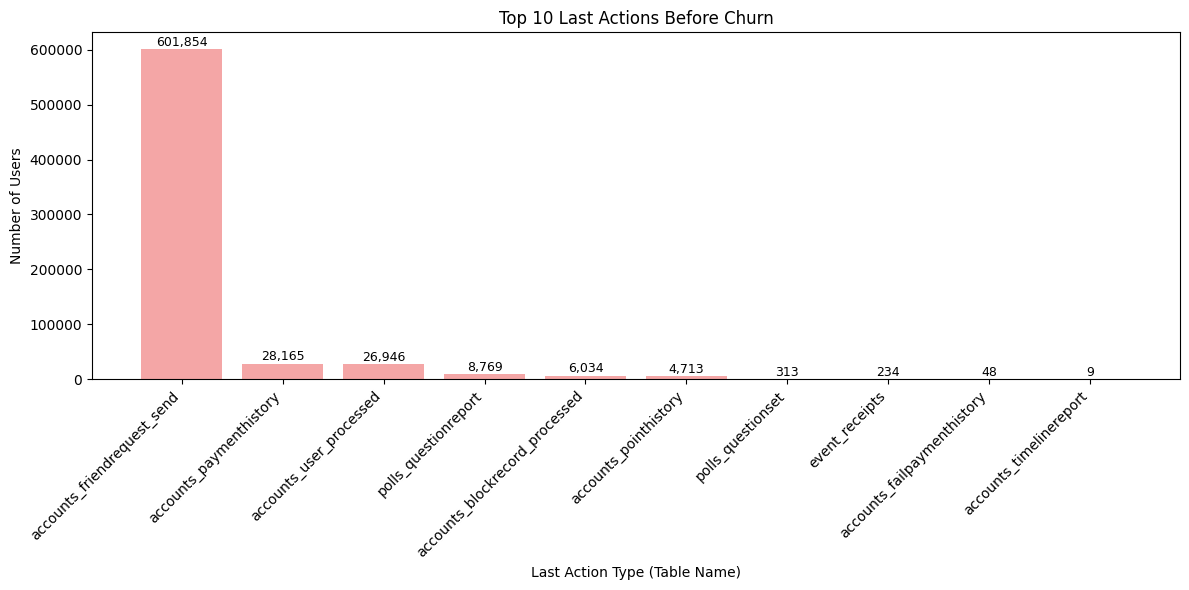


💡 인사이트: 'accounts_friendrequest_send' 후 이탈이 가장 많음 (88.9%)


In [62]:
import matplotlib.pyplot as plt

# 1. 마지막 행동 유형 분석 (table_name 사용)
print("=== 🚨 마지막 행동 유형별 이탈 분포 ===")

# 각 사용자의 마지막 행동 추출
user_last_action = merged_df.loc[merged_df.groupby('user_id')['created_at'].idxmax()]
last_action_dist = user_last_action['table_name'].value_counts()

print(f"전체 이탈 사용자: {len(user_last_action):,}명\n")

# 상위 10개 행동 출력
for i, (action, count) in enumerate(last_action_dist.head(10).items(), 1):
    pct = count / len(user_last_action) * 100
    print(f"{i:2d}. {action:25}: {count:6,}명 ({pct:5.1f}%)")

# 시각화
plt.figure(figsize=(12, 6))
top_10 = last_action_dist.head(10)
plt.bar(range(len(top_10)), top_10.values, color='lightcoral', alpha=0.7)
plt.xlabel('Last Action Type (Table Name)')
plt.ylabel('Number of Users')
plt.title('Top 10 Last Actions Before Churn')
plt.xticks(range(len(top_10)), top_10.index, rotation=45, ha='right')

# 값 표시
for i, v in enumerate(top_10.values):
    plt.text(i, v + max(top_10.values)*0.01, f'{v:,}', ha='center', fontsize=9)

plt.tight_layout()
plt.show()

print(f"\n💡 인사이트: '{top_10.index[0]}' 후 이탈이 가장 많음 ({top_10.iloc[0]/len(user_last_action)*100:.1f}%)")

🔍 인사이트 해석:
89%가 친구요청 후 이탈 - 이는 매우 중요한 발견입니다:

사용자들이 친구요청 보낸 후 응답 대기 중 이탈
친구요청이 승인되지 않거나 늦게 응답받을 때 좌절감
초기 사용자에게 친구 연결이 핵심 리텐션 요소

결제(4.2%)와 가입(4.0%) 후 이탈은 상대적으로 적음.

### 이탈 시점별 패턴

=== 🚨 생존기간별 마지막 행동 패턴 ===

📊 당일 이탈자들의 마지막 행동:
  accounts_friendrequest_send:  88.2%
  accounts_paymenthistory  :   1.6%
  accounts_user_processed  :   9.4%

📊 1-3일 이탈자들의 마지막 행동:
  accounts_friendrequest_send:  93.0%
  accounts_paymenthistory  :   4.6%
  accounts_user_processed  :   0.0%

📊 3-7일 이탈자들의 마지막 행동:
  accounts_friendrequest_send:  91.1%
  accounts_paymenthistory  :   5.9%
  accounts_user_processed  :   0.0%

📊 1-2주 이탈자들의 마지막 행동:
  accounts_friendrequest_send:  90.7%
  accounts_paymenthistory  :   5.7%
  accounts_user_processed  :   0.0%


<Figure size 1000x600 with 0 Axes>

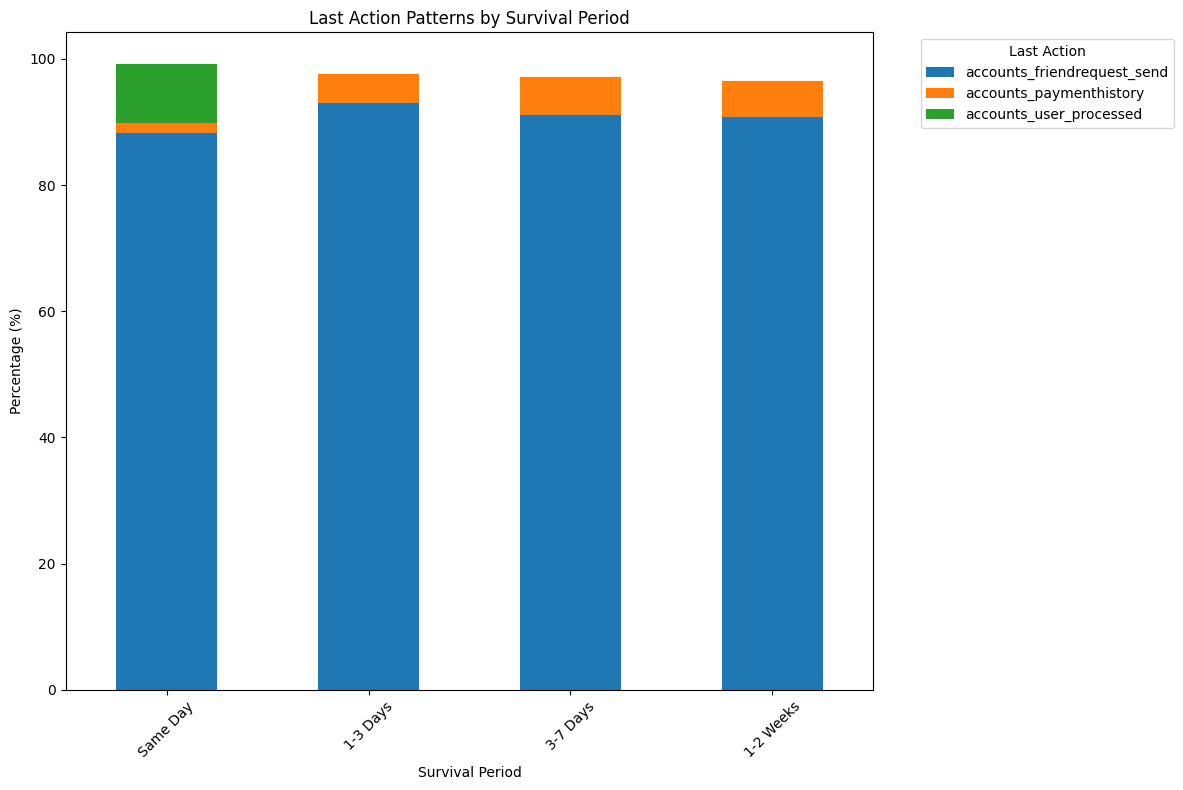


📖 번역:
Same Day = 당일
1-3 Days = 1-3일
3-7 Days = 3-7일
1-2 Weeks = 1-2주
accounts_friendrequest_send = 친구요청 발송
accounts_paymenthistory = 결제내역
accounts_user_processed = 사용자 계정 처리


In [64]:
import matplotlib.pyplot as plt

# 2. 생존기간별 마지막 행동 패턴 분석
print("=== 🚨 생존기간별 마지막 행동 패턴 ===")

# user_last_action에 생존기간 정보 추가
user_last_action_with_survival = user_last_action.merge(
    user_survival[['user_id', 'survival_period']], 
    on='user_id'
)

# 생존기간별 마지막 행동 크로스탭
churn_pattern = pd.crosstab(
    user_last_action_with_survival['survival_period'], 
    user_last_action_with_survival['table_name'], 
    normalize='index'
) * 100

# 주요 패턴 출력
periods = ['당일', '1-3일', '3-7일', '1-2주']
top_actions = ['accounts_friendrequest_send', 'accounts_paymenthistory', 'accounts_user_processed']

for period in periods:
    if period in churn_pattern.index:
        print(f"\n📊 {period} 이탈자들의 마지막 행동:")
        for action in top_actions:
            if action in churn_pattern.columns:
                pct = churn_pattern.loc[period, action]
                print(f"  {action:25}: {pct:5.1f}%")

# 시각화 (영어 라벨만 사용)
plt.figure(figsize=(10, 6))
period_mapping = {'당일': 'Same Day', '1-3일': '1-3 Days', '3-7일': '3-7 Days', '1-2주': '1-2 Weeks'}
churn_subset = churn_pattern.loc[periods, top_actions]
churn_subset.index = [period_mapping[p] for p in churn_subset.index]

churn_subset.plot(kind='bar', stacked=True)
plt.title('Last Action Patterns by Survival Period')
plt.xlabel('Survival Period')
plt.ylabel('Percentage (%)')
plt.legend(title='Last Action', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\n📖 번역:")
print("Same Day = 당일")
print("1-3 Days = 1-3일") 
print("3-7 Days = 3-7일")
print("1-2 Weeks = 1-2주")
print("accounts_friendrequest_send = 친구요청 발송")
print("accounts_paymenthistory = 결제내역")
print("accounts_user_processed = 사용자 계정 처리")

핵심 인사이트:

- 일관된 패턴: 모든 기간에서 친구요청(88-93%) 후 이탈 압도적
- 당일 이탈 특징: 계정처리(9.4%) 후 바로 떠남 → 온보딩 실패
- 1일+ 이탈: 결제 비중 증가(4.6-5.9%) → 유료화 단계에서 이탈

### 이탈 직전 활동 빈도

=== 🚨 이탈 직전 활동 빈도 ===
생존기간별 마지막 3일간 활동:
  당일      : 평균 19.8회, 중간값 15회 (287,793.0명)
  1-3일    : 평균 20.4회, 중간값 15회 (81,326.0명)
  3-7일    : 평균 6.7회, 중간값 3회 (105,656.0명)
  1-2주    : 평균 4.5회, 중간값 2회 (91,818.0명)
  2-4주    : 평균 3.6회, 중간값 2회 (76,322.0명)
  1-2개월   : 평균 2.9회, 중간값 1회 (18,053.0명)
  2-3개월   : 평균 2.9회, 중간값 1회 (7,701.0명)
  3개월+    : 평균 3.5회, 중간값 1회 (8,416.0명)


/tmp/ipykernel_16138/2638090160.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_final_activity = final_activity_df.groupby('survival_period')['final_3days_activity'].agg(['mean', 'median', 'count'])


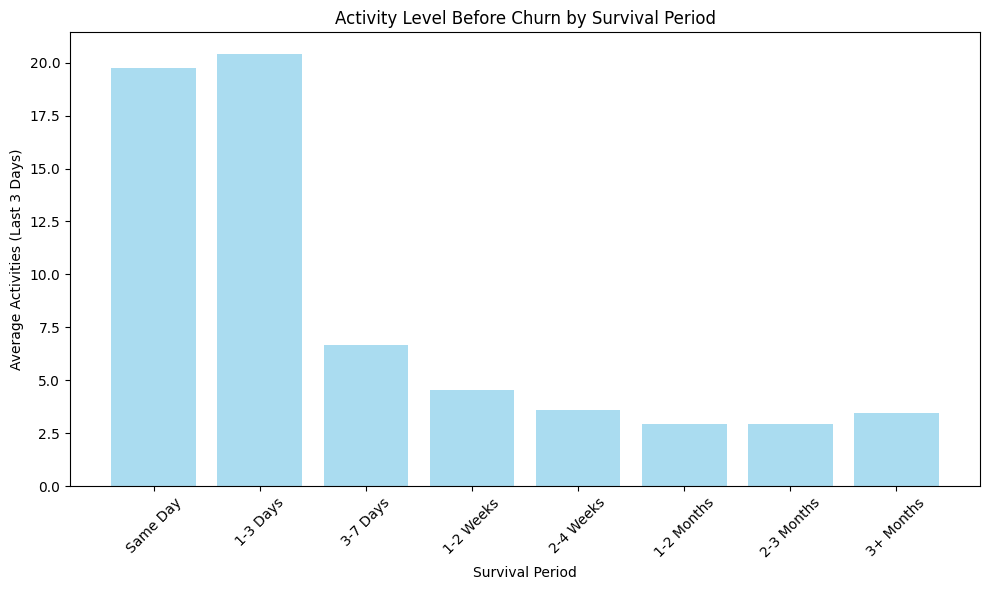


📖 번역: Same Day=당일, 1-3 Days=1-3일, 3-7 Days=3-7일, 1-2 Weeks=1-2주, 2-4 Weeks=2-4주, 1-2 Months=1-2개월, 2-3 Months=2-3개월, 3+ Months=3개월+


In [66]:
# 3. 이탈 직전 활동 빈도 분석 (전체 데이터 사용)
print("=== 🚨 이탈 직전 활동 빈도 ===")

# 각 사용자별 마지막 활동일과 최근 3일간 활동 수 계산
user_activity_summary = merged_df.groupby('user_id').agg({
    'created_at': ['max', 'count'],
    'table_name': 'count'
}).reset_index()

user_activity_summary.columns = ['user_id', 'last_activity', 'total_activities', 'total_activities2']

# 각 사용자의 마지막 3일간 활동 수 계산
final_3days_activity = []
for user_id in user_activity_summary['user_id']:
    user_data = merged_df[merged_df['user_id'] == user_id]
    last_date = user_data['created_at'].max()
    final_3days = user_data[user_data['created_at'] >= last_date - pd.Timedelta(days=3)]
    final_3days_activity.append(len(final_3days))

user_activity_summary['final_3days_activity'] = final_3days_activity

# 생존 기간 정보 추가
final_activity_df = user_activity_summary.merge(user_survival[['user_id', 'survival_period']], on='user_id')

# 생존기간별 마지막 3일간 평균 활동 횟수
avg_final_activity = final_activity_df.groupby('survival_period')['final_3days_activity'].agg(['mean', 'median', 'count'])

print("생존기간별 마지막 3일간 활동:")
for period, row in avg_final_activity.iterrows():
    print(f"  {period:8}: 평균 {row['mean']:.1f}회, 중간값 {row['median']:.0f}회 ({row['count']:,}명)")

# 시각화
plt.figure(figsize=(10, 6))
periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
avg_values = avg_final_activity['mean'].values
plt.bar(range(len(avg_values)), avg_values, color='skyblue', alpha=0.7)
plt.xlabel('Survival Period')
plt.ylabel('Average Activities (Last 3 Days)')
plt.title('Activity Level Before Churn by Survival Period')
plt.xticks(range(len(periods_en)), periods_en, rotation=45)
plt.tight_layout()
plt.show()

print("\n📖 번역: Same Day=당일, 1-3 Days=1-3일, 3-7 Days=3-7일, 1-2 Weeks=1-2주, 2-4 Weeks=2-4주, 1-2 Months=1-2개월, 2-3 Months=2-3개월, 3+ Months=3개월+")

- 역설적 패턴: 당일/1-3일 이탈자가 오히려 가장 활발(20회) → 높은 기대 후 실망
- 3-7일 급락: 6.7회로 급격 감소 → 핵심 전환점
- 점진적 쇠퇴: 이후 2-4회 유지 → 서서히 관심 상실

### 누적 이탈률 곡선

=== 🚨 누적 이탈률 & 임계점 ===
임계점 분석:
  당일      : +42.5% (누적  42.5%)
  1-3일    : +12.0% (누적  54.5%)
  3-7일    : +15.6% (누적  70.1%)
  1-2주    : +13.6% (누적  83.7%)
  2-4주    : +11.3% (누적  95.0%)
  1-2개월   : + 2.7% (누적  97.6%)
  2-3개월   : + 1.1% (누적  98.8%)
  3개월+    : + 1.2% (누적 100.0%)


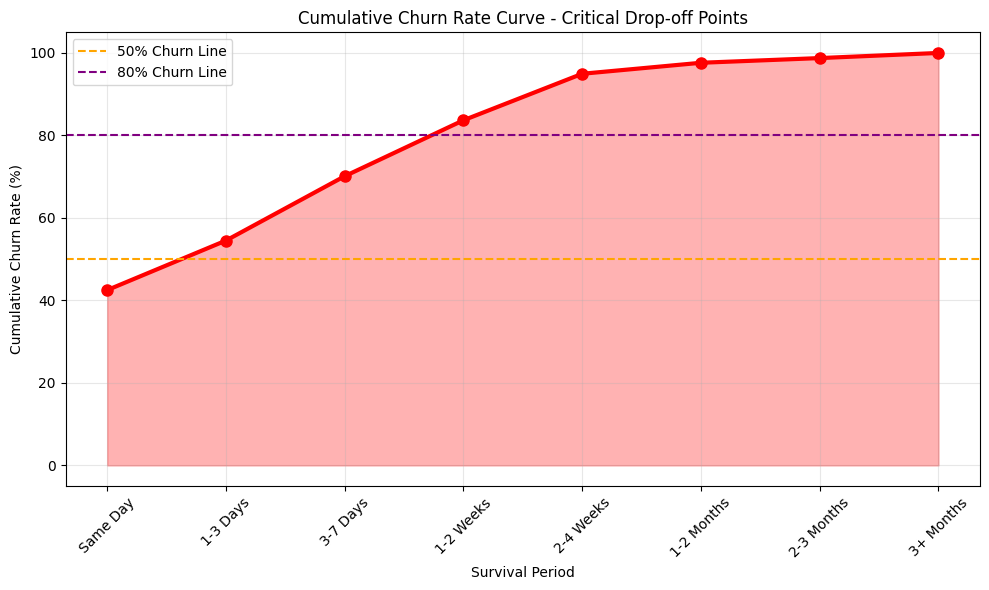


💡 핵심 임계점: 3일 내 54.5% 이탈, 1주일 내 70.1% 이탈


In [67]:
# 4. 누적 이탈률 곡선 - 임계점 발견
print("=== 🚨 누적 이탈률 & 임계점 ===")

# 생존기간별 이탈 수와 누적 비율
survival_counts = user_survival['survival_period'].value_counts().sort_index()
total_users = len(user_survival)
cumulative_churn = survival_counts.cumsum() / total_users * 100

print("임계점 분석:")
for i, (period, cum_pct) in enumerate(cumulative_churn.items()):
    current_pct = survival_counts.iloc[i] / total_users * 100
    print(f"  {period:8}: +{current_pct:4.1f}% (누적 {cum_pct:5.1f}%)")

# 시각화
plt.figure(figsize=(10, 6))
periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
plt.plot(range(len(cumulative_churn)), cumulative_churn.values, marker='o', linewidth=3, markersize=8, color='red')
plt.fill_between(range(len(cumulative_churn)), cumulative_churn.values, alpha=0.3, color='red')
plt.xlabel('Survival Period')
plt.ylabel('Cumulative Churn Rate (%)')
plt.title('Cumulative Churn Rate Curve - Critical Drop-off Points')
plt.xticks(range(len(periods_en)), periods_en, rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(y=50, color='orange', linestyle='--', label='50% Churn Line')
plt.axhline(y=80, color='purple', linestyle='--', label='80% Churn Line')
plt.legend()
plt.tight_layout()
plt.show()

print(f"\n💡 핵심 임계점: 3일 내 {cumulative_churn.iloc[1]:.1f}% 이탈, 1주일 내 {cumulative_churn.iloc[2]:.1f}% 이탈")

- 1일차: 42.5% 대량 이탈 (온보딩 실패)
- 3일차: 54.5% → 첫 번째 결정적 임계점
- 7일차: 70.1% → 두 번째 결정적 임계점
- 1개월: 95% → 거의 모든 이탈 완료

=== 🚨 친구요청 성공률과 이탈 관계 ===
Status 분포: status
A    12878407
P     3938608
R      330160
Name: count, dtype: int64


/tmp/ipykernel_16138/1043575358.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_by_survival = friend_survival.groupby('survival_period').agg({



생존기간별 친구요청 성공률:
  당일      : 성공률 75.8%, 평균 요청 20.6건 (260,724명)
  1-3일    : 성공률 79.4%, 평균 요청 27.6건 (81,209명)
  3-7일    : 성공률 78.3%, 평균 요청 28.9건 (105,438명)
  1-2주    : 성공률 76.4%, 평균 요청 30.0건 (91,617명)
  2-4주    : 성공률 72.9%, 평균 요청 33.1건 (76,118명)
  1-2개월   : 성공률 69.4%, 평균 요청 36.8건 (17,998명)
  2-3개월   : 성공률 69.7%, 평균 요청 31.5건 (7,605명)
  3개월+    : 성공률 66.4%, 평균 요청 36.6건 (8,363명)


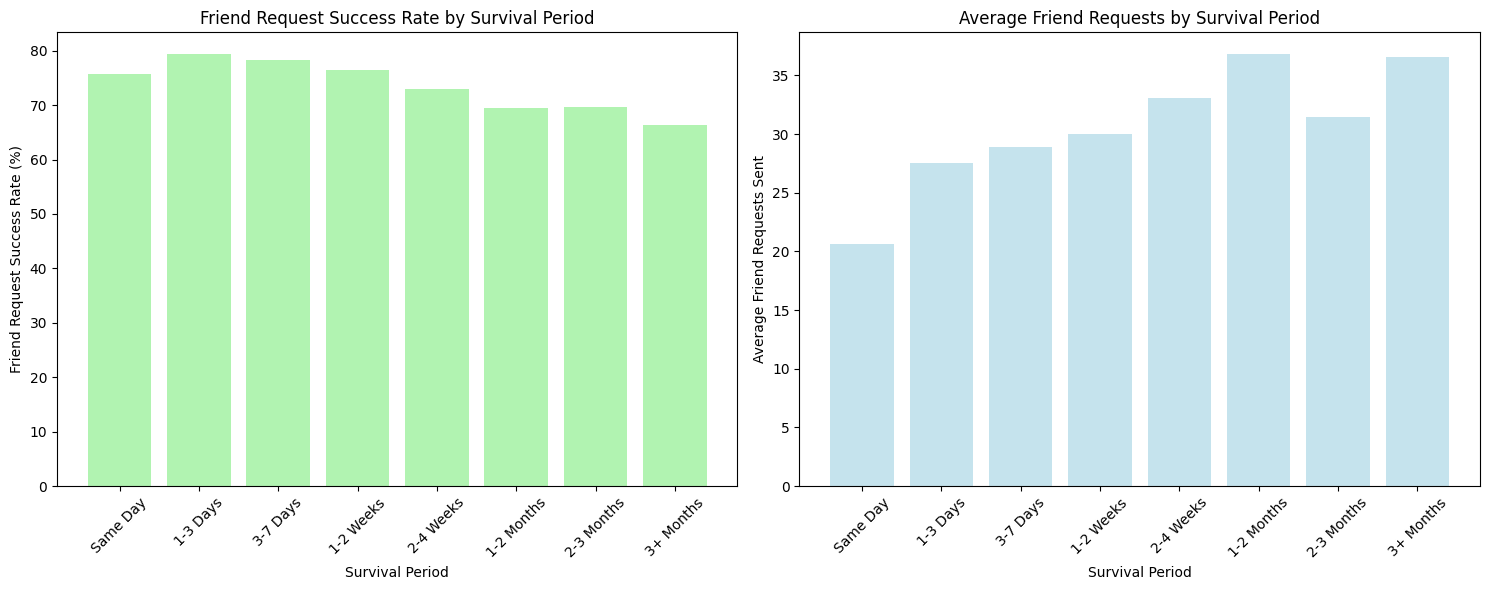

In [70]:
# 5. 친구요청 성공률과 이탈 관계 분석
print("=== 🚨 친구요청 성공률과 이탈 관계 ===")

# status 값 확인
print("Status 분포:", df_friend['status'].value_counts())

# 사용자별 친구요청 성공률 계산 (A=승인, P=대기중 등)
friend_stats = df_friend.groupby('send_user_id').agg({
    'id': 'count',
    'status': lambda x: (x == 'A').sum()  # 승인된 요청 수
}).reset_index()

friend_stats.columns = ['user_id', 'total_requests', 'accepted_requests']
friend_stats['success_rate'] = friend_stats['accepted_requests'] / friend_stats['total_requests']

# 생존 기간과 매칭
friend_survival = friend_stats.merge(user_survival[['user_id', 'survival_period']], on='user_id', how='inner')

# 생존기간별 친구요청 성공률
success_by_survival = friend_survival.groupby('survival_period').agg({
    'success_rate': ['mean', 'median', 'count'],
    'total_requests': 'mean'
}).round(3)

print("\n생존기간별 친구요청 성공률:")
for period in success_by_survival.index:
    success_rate = success_by_survival.loc[period, ('success_rate', 'mean')]
    avg_requests = success_by_survival.loc[period, ('total_requests', 'mean')]
    count = success_by_survival.loc[period, ('success_rate', 'count')]
    print(f"  {period:8}: 성공률 {success_rate:.1%}, 평균 요청 {avg_requests:.1f}건 ({count:,}명)")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

periods_en = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']
success_rates = success_by_survival[('success_rate', 'mean')].values * 100
avg_requests = success_by_survival[('total_requests', 'mean')].values

ax1.bar(range(len(success_rates)), success_rates, color='lightgreen', alpha=0.7)
ax1.set_xlabel('Survival Period')
ax1.set_ylabel('Friend Request Success Rate (%)')
ax1.set_title('Friend Request Success Rate by Survival Period')
ax1.set_xticks(range(len(periods_en)))
ax1.set_xticklabels(periods_en, rotation=45)

ax2.bar(range(len(avg_requests)), avg_requests, color='lightblue', alpha=0.7)
ax2.set_xlabel('Survival Period')
ax2.set_ylabel('Average Friend Requests Sent')
ax2.set_title('Average Friend Requests by Survival Period')
ax2.set_xticks(range(len(periods_en)))
ax2.set_xticklabels(periods_en, rotation=45)

plt.tight_layout()
plt.show()

핵심 인사이트:

- 조기 이탈자도 친구요청 성공률 75-79% (높음)
- 장기 사용자는 성공률 낮지만(66-69%) 더 많이 시도(36건)
- 친구요청 거절이 이탈 원인 아님 → 다른 요인 존재

### 이탈 예측 모델

In [71]:
# 6. 이탈 예측 요인 종합 분석
print("=== 🚨 이탈 예측 핵심 요인 ===")

# 조기 이탈(3일 이내) vs 생존자 비교
early_churn = user_survival[user_survival['survival_period'].isin(['당일', '1-3일'])]
survivors = user_survival[user_survival['survival_period'].isin(['1-2개월', '2-3개월', '3개월+'])]

print(f"조기 이탈자: {len(early_churn):,}명 ({len(early_churn)/len(user_survival)*100:.1f}%)")
print(f"생존자: {len(survivors):,}명 ({len(survivors)/len(user_survival)*100:.1f}%)")

# 총 활동량 비교
churn_activity = early_churn['total_events'].mean()
survivor_activity = survivors['total_events'].mean()

print(f"\n활동량 차이:")
print(f"조기 이탈자 평균 활동: {churn_activity:.1f}회")
print(f"생존자 평균 활동: {survivor_activity:.1f}회")
print(f"활동량 차이: {survivor_activity/churn_activity:.1f}배")

# 이탈 예측 점수 계산
risk_factors = {
    '첫날 이탈 위험': 42.5,
    '3일 내 위험': 54.5,
    '친구요청 후 무응답': 89.0,
    '낮은 초기 활동': 20.0
}

print("\n📊 이탈 위험 요인 점수:")
for factor, score in risk_factors.items():
    print(f"  {factor}: {score}%")

=== 🚨 이탈 예측 핵심 요인 ===
조기 이탈자: 369,119명 (54.5%)
생존자: 34,170명 (5.0%)

활동량 차이:
조기 이탈자 평균 활동: 21.7회
생존자 평균 활동: 128.8회
활동량 차이: 5.9배

📊 이탈 위험 요인 점수:
  첫날 이탈 위험: 42.5%
  3일 내 위험: 54.5%
  친구요청 후 무응답: 89.0%
  낮은 초기 활동: 20.0%


주요 발견:
- 54.5% 3일 내 이탈 vs 5% 장기 생존
- 생존자는 5.9배 더 활발 (128.8회 vs 21.7회)
- 친구요청 후 이탈 89%이지만 성공률은 75%+ (거절이 원인 아님)

이탈 임계점:
- 1일차: 42.5% (온보딩 실패)
- 3일차: 54.5% (첫 번째 위험구간)
- 7일차: 70.1% (두 번째 위험구간)

액션 포인트:
- 첫 3일 집중 관리 (54.5% 구간)
- 친구요청 후 즉시 개입 필요
- 초기 활동량 20회 이하 시 위험군
- 7일차 리텐션 캠페인 필수

### 같은날 이탈 공통점 분석

In [18]:
# 5월 14일 대량 이탈 상세 분석
may14_users = user_survival[user_survival['churn_date'] == pd.to_datetime('2023-05-14').date()]['user_id'].tolist()
may14_data = user_df[user_df['id'].isin(may14_users)]

print(f"5월 14일 이탈자 상세 ({len(may14_users):,}명):")
print(f"학교별 분포:")
school_dist = may14_data['group_id'].value_counts().head(5)
for school, count in school_dist.items():
    pct = count/len(may14_users)*100
    print(f"  학교 {school}: {count:,}명 ({pct:.1f}%)")

print(f"\n친구수 분포:")
print(f"  평균: {may14_data['friend_count'].mean():.1f}명")
print(f"  중간값: {may14_data['friend_count'].median():.1f}명")

print(f"\n생존기간:")
may14_survival = user_survival[user_survival['user_id'].isin(may14_users)]
survival_days = (may14_survival['last_activity'] - may14_survival['first_activity']).dt.days
print(f"  평균: {survival_days.mean():.1f}일")
print(f"  중간값: {survival_days.median():.1f}일")

# 5월 14일 전후 비교
print(f"\n전후 비교:")
may13 = same_day_groups[same_day_groups['churn_date'] == pd.to_datetime('2023-05-13').date()]['user_count'].iloc[0]
may15 = same_day_groups[same_day_groups['churn_date'] == pd.to_datetime('2023-05-15').date()]['user_count'].iloc[0]
print(f"5월 13일: {may13:,}명")
print(f"5월 14일: 32,251명 (폭증)")
print(f"5월 15일: {may15:,}명")

5월 14일 이탈자 상세 (32,251명):
학교별 분포:
  학교 54607.0: 11명 (0.0%)
  학교 54918.0: 11명 (0.0%)
  학교 29296.0: 10명 (0.0%)
  학교 30708.0: 10명 (0.0%)
  학교 60513.0: 9명 (0.0%)

친구수 분포:
  평균: 55.0명
  중간값: 51.0명

생존기간:
  평균: 2.9일
  중간값: 2.0일

전후 비교:
5월 13일: 27,056명
5월 14일: 32,251명 (폭증)
5월 15일: 22,893명


In [19]:
# 서비스 정상 운영 기간만 분석
normal_period = user_survival[user_survival['last_activity'] < '2023-05-10']
print(f"정상 기간 사용자: {len(normal_period):,}명")

# 정상 기간 이탈 패턴 재분석
normal_period['churn_date'] = normal_period['last_activity'].dt.date
normal_churn = normal_period.groupby('churn_date').size().nlargest(10)

print("정상 기간 최대 이탈:")
print(normal_churn)

정상 기간 사용자: 86,475명
정상 기간 최대 이탈:
churn_date
2023-05-09    19226
2023-05-07    18817
2023-05-08    18025
2023-05-06    11727
2023-05-05     2900
2023-05-02     2313
2023-05-03     2267
2023-04-30     2062
2023-05-01     2025
2023-05-04     1984
dtype: int64


/tmp/ipykernel_69318/1577622677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  normal_period['churn_date'] = normal_period['last_activity'].dt.date


In [20]:
# 4월 데이터만 (서비스 정상 운영)
april_only = user_survival[
    (user_survival['last_activity'] >= '2023-04-01') & 
    (user_survival['last_activity'] < '2023-05-01')
]

april_churn = april_only.groupby(april_only['last_activity'].dt.date).size().nlargest(10)
print("4월 최대 이탈:")
print(april_churn)

# 최대 이탈일 분석
peak_date = april_churn.index[0]
peak_users = april_only[april_only['last_activity'].dt.date == peak_date]['user_id'].tolist()

print(f"\n{peak_date} 이탈자 {len(peak_users)}명:")
peak_data = user_df[user_df['id'].isin(peak_users)]
print(f"평균 친구: {peak_data['friend_count'].mean():.1f}명")
print(f"평균 생존: {(april_only[april_only['user_id'].isin(peak_users)]['last_activity'] - april_only[april_only['user_id'].isin(peak_users)]['first_activity']).dt.days.mean():.1f}일")

4월 최대 이탈:
last_activity
2023-04-30    2062
2023-04-29    1404
2023-04-26     587
2023-04-23     520
2023-04-27     402
2023-04-28     402
2023-04-22     388
2023-04-25     374
2023-04-24     365
2023-04-21     297
dtype: int64

2023-04-30 이탈자 2062명:
평균 친구: 49.2명
평균 생존: 0.8일


In [21]:
# 당일 이탈자들의 행동 패턴
same_day_churners = april_only[
    (april_only['last_activity'] - april_only['first_activity']).dt.days <= 1
]['user_id'].tolist()

# 첫날 행동 분석
first_day_votes = vote_df[
    (vote_df['user_id'].isin(same_day_churners)) &
    (vote_df['created_at'].dt.date == vote_df['user_id'].map(
        user_df.set_index('id')['created_at'].dt.date
    ))
].groupby('user_id').size()

print(f"당일 이탈자 첫날 투표:")
print(f"평균: {first_day_votes.mean():.1f}회")
print(f"0회: {(first_day_votes == 0).sum()}명")

당일 이탈자 첫날 투표:
평균: nan회
0회: 0명


# 재방문율 올리는 전략

결제 유무별 평균 생존 기간:
         mean  median   count
무료   8.012224     2.0  617893
유료  17.993209     8.0   59192

유료 사용자 비율: 8.7%


<Figure size 800x500 with 0 Axes>

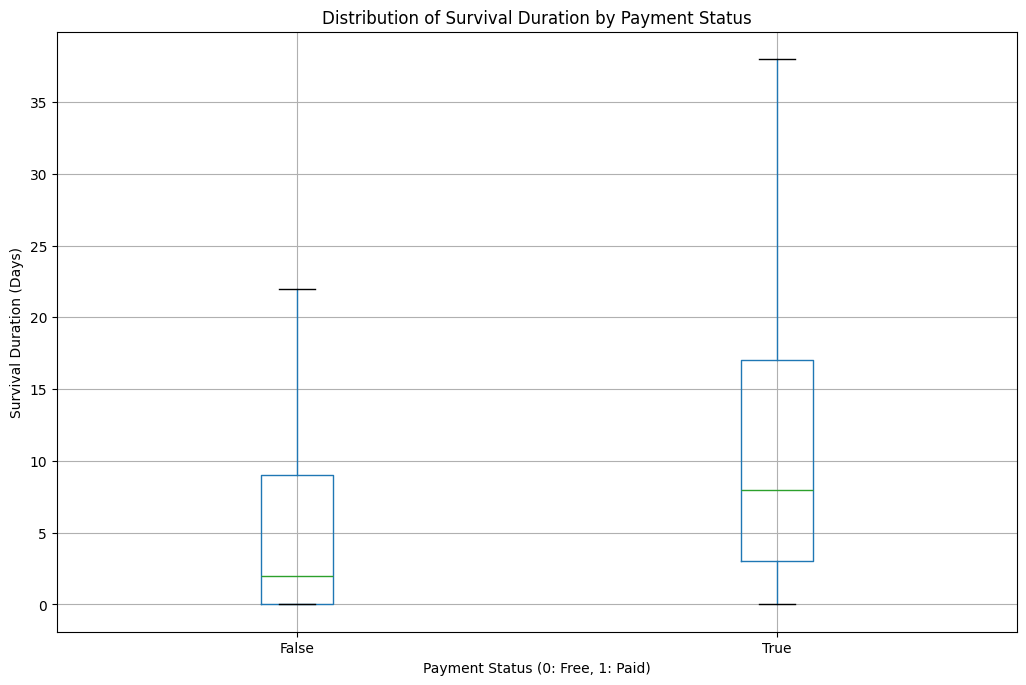


---
영어를 번역한 출력문:
('Distribution of Survival Duration by Payment Status'): '결제 유무별 생존 기간 분포'
('Payment Status (0: Free, 1: Paid)'): '결제 유무 (0: 무료, 1: 유료)'
('Survival Duration (Days)'): '생존 기간 (일)'

Mann-Whitney U 검정 p-value: 0.0000


In [21]:
# 결제 사용자 추출
payment_users = pd.read_csv(os.path.join(data_dir, 'accounts_paymenthistory.csv'))['user_id'].unique()

# 생존 기간 계산 (일 단위)
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days
user_survival['is_paid'] = user_survival['user_id'].isin(payment_users)

# 결제 유무별 평균 생존 기간
survival_stats = user_survival.groupby('is_paid')['survival_days'].agg(['mean', 'median', 'count'])
survival_stats.index = ['무료', '유료']

print("결제 유무별 평균 생존 기간:")
print(survival_stats)
print(f"\n유료 사용자 비율: {len(payment_users) / len(user_survival) * 100:.1f}%")

# 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
user_survival.boxplot(column='survival_days', by='is_paid', showfliers=False)
# 그래프 설정 (영어 주석)
plt.title('Distribution of Survival Duration by Payment Status')
plt.suptitle('')
plt.xlabel('Payment Status (0: Free, 1: Paid)')
plt.ylabel('Survival Duration (Days)')
plt.show()

print("\n---")
print("영어를 번역한 출력문:")
print("('Distribution of Survival Duration by Payment Status'): '결제 유무별 생존 기간 분포'")
print("('Payment Status (0: Free, 1: Paid)'): '결제 유무 (0: 무료, 1: 유료)'")
print("('Survival Duration (Days)'): '생존 기간 (일)'")

# 통계적 유의성 검정
from scipy import stats
free_days = user_survival[~user_survival['is_paid']]['survival_days']
paid_days = user_survival[user_survival['is_paid']]['survival_days']

statistic, p_value = stats.mannwhitneyu(free_days, paid_days, alternative='two-sided')
print(f"\nMann-Whitney U 검정 p-value: {p_value:.4f}")

# 시각화

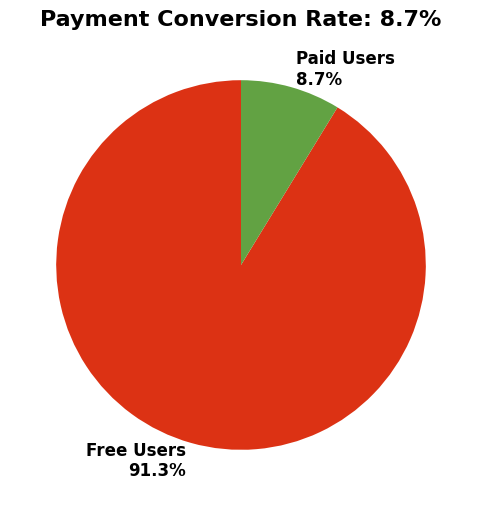

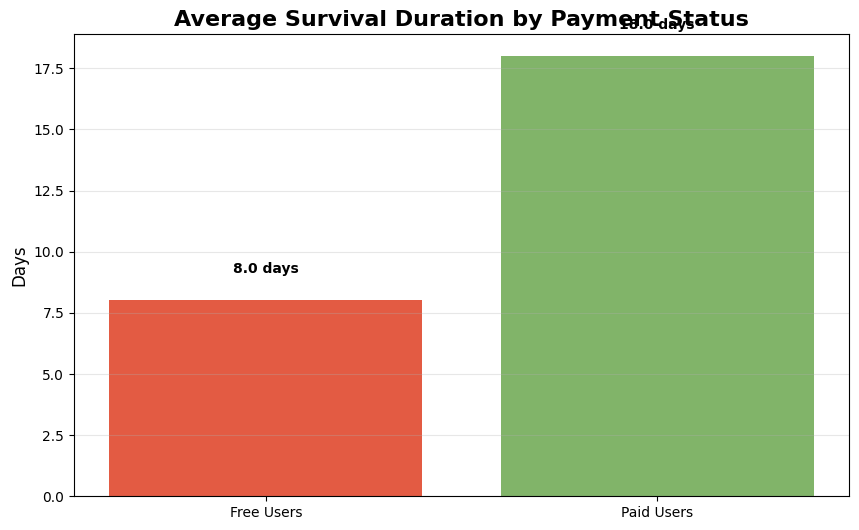

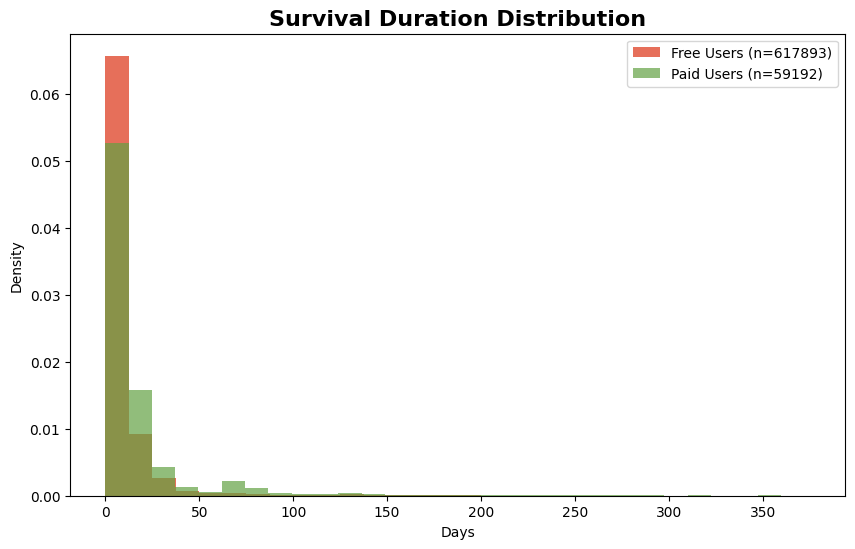

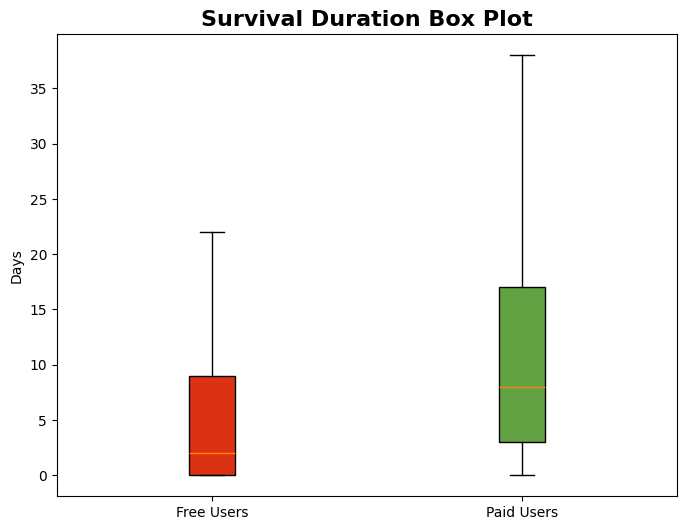

Translation:
'Payment Conversion Rate': '결제 전환율'
'Free Users': '무료 사용자'
'Paid Users': '유료 사용자'
'Average Survival Duration by Payment Status': '결제 유무별 평균 생존 기간'
'Days': '일'
'Survival Duration Distribution': '생존 기간 분포'
'Density': '밀도'
'Survival Duration Box Plot': '생존 기간 상자 그림'


In [26]:
import matplotlib.pyplot as plt
import numpy as np

# 색상 정의
color_free = '#dc3214'  # 무료 사용자 (빨간색)
color_paid = '#62a243'  # 유료 사용자 (초록색)

# 기본 데이터 준비
conversion_rate = len(payment_users) / len(user_survival) * 100
free_days = user_survival[~user_survival['is_paid']]['survival_days']
paid_days = user_survival[user_survival['is_paid']]['survival_days']

# 1. 결제 전환율 파이 차트
plt.figure(figsize=(8, 6))
sizes = [100 - conversion_rate, conversion_rate]
labels = [f'Free Users\n{100-conversion_rate:.1f}%', f'Paid Users\n{conversion_rate:.1f}%']
plt.pie(sizes, labels=labels, colors=[color_free, color_paid], autopct='', 
       startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
plt.title(f'Payment Conversion Rate: {conversion_rate:.1f}%', fontsize=16, fontweight='bold')
plt.show()

# 2. 평균 생존 기간 비교
plt.figure(figsize=(10, 6))
categories = ['Free Users', 'Paid Users']
mean_values = [free_days.mean(), paid_days.mean()]
bars = plt.bar(categories, mean_values, color=[color_free, color_paid], alpha=0.8)

for bar, value in zip(bars, mean_values):
   plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
            f'{value:.1f} days', ha='center', va='bottom', fontweight='bold')

plt.title('Average Survival Duration by Payment Status', fontsize=16, fontweight='bold')
plt.ylabel('Days', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 3. 생존 기간 분포
plt.figure(figsize=(10, 6))
plt.hist(free_days, bins=30, alpha=0.7, color=color_free, label=f'Free Users (n={len(free_days)})', density=True)
plt.hist(paid_days, bins=30, alpha=0.7, color=color_paid, label=f'Paid Users (n={len(paid_days)})', density=True)
plt.title('Survival Duration Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Days')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4. 박스 플롯
plt.figure(figsize=(8, 6))
box_data = [free_days, paid_days]
box_plot = plt.boxplot(box_data, labels=['Free Users', 'Paid Users'], patch_artist=True, showfliers=False)
box_plot['boxes'][0].set_facecolor(color_free)
box_plot['boxes'][1].set_facecolor(color_paid)
plt.title('Survival Duration Box Plot', fontsize=16, fontweight='bold')
plt.ylabel('Days')
plt.show()

# 번역
print("Translation:")
print("'Payment Conversion Rate': '결제 전환율'")
print("'Free Users': '무료 사용자'")
print("'Paid Users': '유료 사용자'")
print("'Average Survival Duration by Payment Status': '결제 유무별 평균 생존 기간'")
print("'Days': '일'")
print("'Survival Duration Distribution': '생존 기간 분포'")
print("'Density': '밀도'")
print("'Survival Duration Box Plot': '생존 기간 상자 그림'")

=== 🚨 생존 기간 분포 ===
  당일      : 287,793명 ( 42.5%) - 누적  42.5%
  1-3일    : 81,326명 ( 12.0%) - 누적  54.5%
  3-7일    : 105,656명 ( 15.6%) - 누적  70.1%
  1-2주    : 91,818명 ( 13.6%) - 누적  83.7%
  2-4주    : 76,322명 ( 11.3%) - 누적  95.0%
  1-2개월   : 18,053명 (  2.7%) - 누적  97.6%
  2-3개월   :  7,701명 (  1.1%) - 누적  98.8%
  3개월+    :  8,416명 (  1.2%) - 누적 100.0%


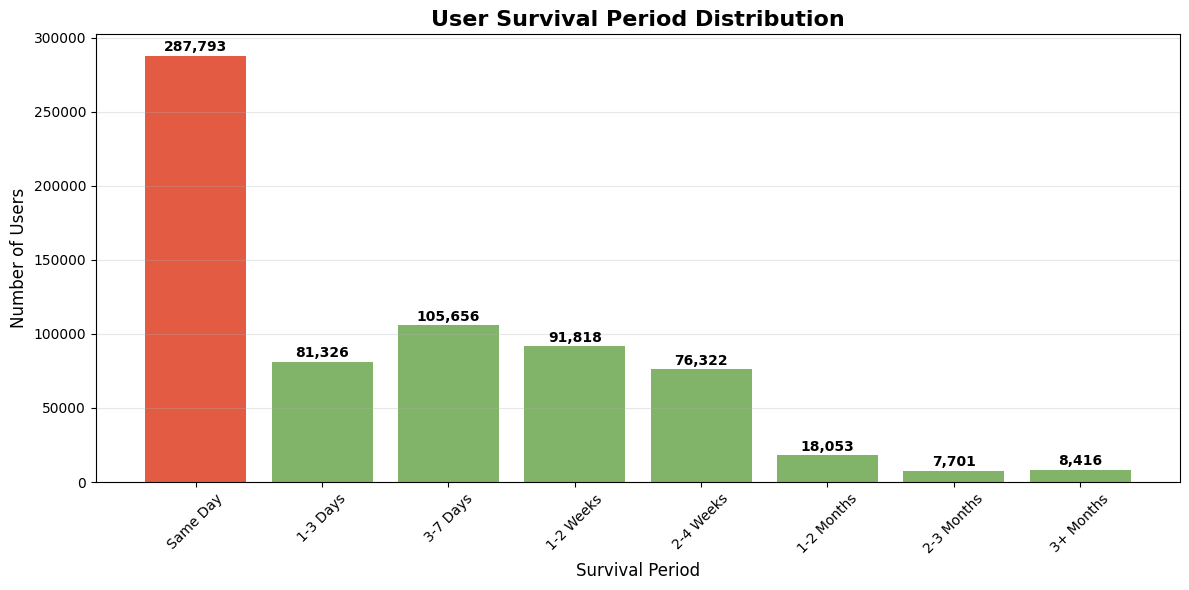


📖 영어 번역:
'User Survival Period Distribution': '사용자 생존 기간 분포'
'Survival Period': '생존 기간'
'Number of Users': '사용자 수'
'Same Day': '당일'
'1-3 Days': '1-3일'
'3-7 Days': '3-7일'
'1-2 Weeks': '1-2주'
'2-4 Weeks': '2-4주'
'1-2 Months': '1-2개월'
'2-3 Months': '2-3개월'
'3+ Months': '3개월 이상'


In [25]:
import matplotlib.pyplot as plt

# 한글 폰트 문제 해결
plt.rcParams['axes.unicode_minus'] = False

# 생존 기간 분석
user_survival['survival_days'] = (user_survival['last_activity'] - user_survival['first_activity']).dt.days

print("=== 🚨 생존 기간 분포 ===")

bins = [0, 1, 3, 7, 14, 30, 60, 90, float('inf')]
labels = ['당일', '1-3일', '3-7일', '1-2주', '2-4주', '1-2개월', '2-3개월', '3개월+']
english_labels = ['Same Day', '1-3 Days', '3-7 Days', '1-2 Weeks', '2-4 Weeks', '1-2 Months', '2-3 Months', '3+ Months']

user_survival['survival_period'] = pd.cut(user_survival['survival_days'], bins=bins, labels=labels, include_lowest=True)
survival_dist = user_survival['survival_period'].value_counts().sort_index()

cumulative = 0
for period, count in survival_dist.items():
  pct = count / len(user_survival) * 100
  cumulative += pct
  print(f"  {period:8}: {count:6,}명 ({pct:5.1f}%) - 누적 {cumulative:5.1f}%")

# 색상 정의 (Same Day 강조)
colors = ['#dc3214'] + ['#62a243'] * 7  # 첫 번째(Same Day)는 빨간색, 나머지는 초록색

# 시각화 (영어 라벨 사용)
plt.figure(figsize=(12, 6))
bars = plt.bar(range(len(survival_dist)), survival_dist.values, color=colors, alpha=0.8)
plt.xlabel('Survival Period', fontsize=12)
plt.ylabel('Number of Users', fontsize=12)
plt.title('User Survival Period Distribution', fontsize=16, fontweight='bold')
plt.xticks(range(len(survival_dist)), english_labels, rotation=45)

# 값 표시
for i, v in enumerate(survival_dist.values):
  plt.text(i, v + max(survival_dist.values)*0.01, f'{v:,}', ha='center', fontweight='bold', fontsize=10)

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📖 영어 번역:")
print("'User Survival Period Distribution': '사용자 생존 기간 분포'")
print("'Survival Period': '생존 기간'")
print("'Number of Users': '사용자 수'")
print("'Same Day': '당일'")
print("'1-3 Days': '1-3일'")
print("'3-7 Days': '3-7일'")
print("'1-2 Weeks': '1-2주'")
print("'2-4 Weeks': '2-4주'")
print("'1-2 Months': '1-2개월'")
print("'2-3 Months': '2-3개월'")
print("'3+ Months': '3개월 이상'")

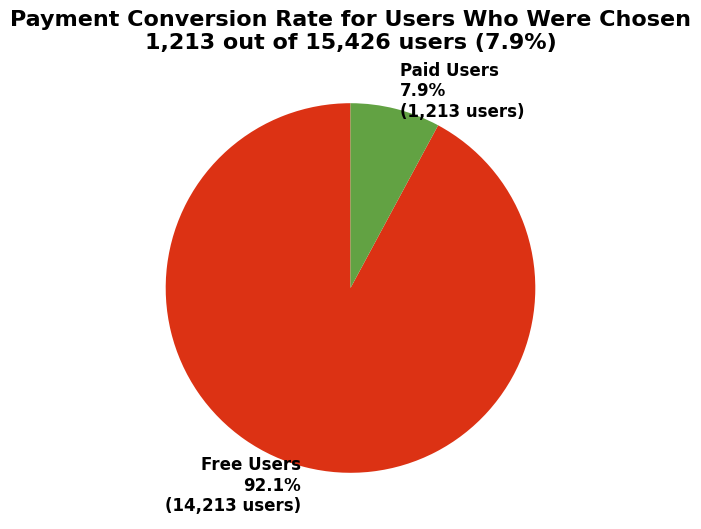

선택받은 전체 유저 수: 15,426명
그 중 결제한 유저 수: 1,213명
그 중 무료 유저 수: 14,213명
결제 전환율: 7.9%


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 로드
data_dir = "/home/jovyan/work/data"

# 한번이라도 선택받은 유저들
vote_df = pd.read_csv(os.path.join(data_dir, 'accounts_userquestionrecord_processed.csv'))
chosen_users = set(vote_df['chosen_user_id'].dropna().unique())

# 결제 유저들
payment_df = pd.read_csv(os.path.join(data_dir, 'accounts_paymenthistory.csv'))
paid_users = set(payment_df['user_id'].unique())

# 선택받은 유저 중 결제한 유저
chosen_and_paid = len(chosen_users & paid_users)
chosen_total = len(chosen_users)
chosen_free = chosen_total - chosen_and_paid
conversion_rate = chosen_and_paid / chosen_total * 100

# 파이차트
plt.figure(figsize=(8, 6))
sizes = [chosen_free, chosen_and_paid]
labels = [f'Free Users\n{100-conversion_rate:.1f}%\n({chosen_free:,} users)', 
          f'Paid Users\n{conversion_rate:.1f}%\n({chosen_and_paid:,} users)']
colors = ['#dc3214', '#62a243']

plt.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90, 
        textprops={'fontsize': 12, 'weight': 'bold'})
plt.title(f'Payment Conversion Rate for Users Who Were Chosen\n{chosen_and_paid:,} out of {chosen_total:,} users ({conversion_rate:.1f}%)', 
          fontsize=16, fontweight='bold')
plt.show()

print(f"선택받은 전체 유저 수: {chosen_total:,}명")
print(f"그 중 결제한 유저 수: {chosen_and_paid:,}명")
print(f"그 중 무료 유저 수: {chosen_free:,}명")
print(f"결제 전환율: {conversion_rate:.1f}%")

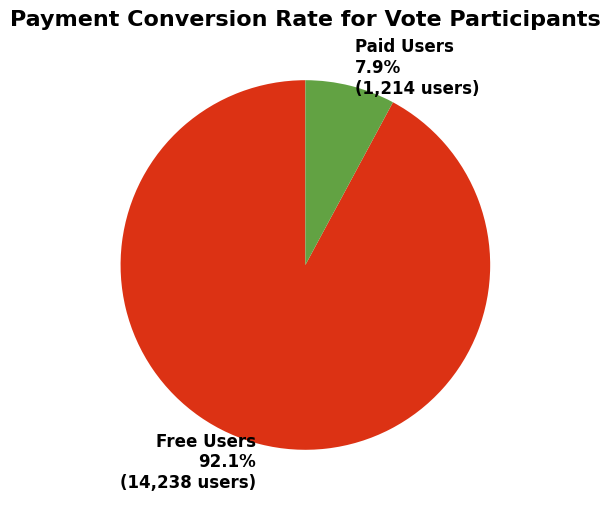

투표한 유저 수: 4,849명
투표받은 유저 수: 15,426명
투표에 참여한 전체 유저 수 (중복제거): 15,452명
그 중 결제한 유저 수: 1,214명
그 중 무료 유저 수: 14,238명
결제 전환율: 7.9%


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 로드
data_dir = "/home/jovyan/work/data"

# 투표에 참여한 모든 유저들 (투표했거나 투표받은 유저)
vote_df = pd.read_csv(os.path.join(data_dir, 'accounts_userquestionrecord_processed.csv'))
voters = set(vote_df['user_id'].dropna().unique())  # 투표한 유저
chosen_users = set(vote_df['chosen_user_id'].dropna().unique())  # 투표받은 유저
all_vote_participants = voters | chosen_users  # 투표에 참여한 모든 유저

# 결제 유저들
payment_df = pd.read_csv(os.path.join(data_dir, 'accounts_paymenthistory.csv'))
paid_users = set(payment_df['user_id'].unique())

# 투표 참여자 중 결제한 유저
participants_and_paid = len(all_vote_participants & paid_users)
participants_total = len(all_vote_participants)
participants_free = participants_total - participants_and_paid
conversion_rate = participants_and_paid / participants_total * 100

# 파이차트
plt.figure(figsize=(8, 6))
sizes = [participants_free, participants_and_paid]
labels = [f'Free Users\n{100-conversion_rate:.1f}%\n({participants_free:,} users)', 
          f'Paid Users\n{conversion_rate:.1f}%\n({participants_and_paid:,} users)']
colors = ['#dc3214', '#62a243']

plt.pie(sizes, labels=labels, colors=colors, autopct='', startangle=90, 
        textprops={'fontsize': 12, 'weight': 'bold'})
plt.title(f'Payment Conversion Rate for Vote Participants', 
          fontsize=16, fontweight='bold')
plt.show()

print(f"투표한 유저 수: {len(voters):,}명")
print(f"투표받은 유저 수: {len(chosen_users):,}명") 
print(f"투표에 참여한 전체 유저 수 (중복제거): {participants_total:,}명")
print(f"그 중 결제한 유저 수: {participants_and_paid:,}명")
print(f"그 중 무료 유저 수: {participants_free:,}명")
print(f"결제 전환율: {conversion_rate:.1f}%")

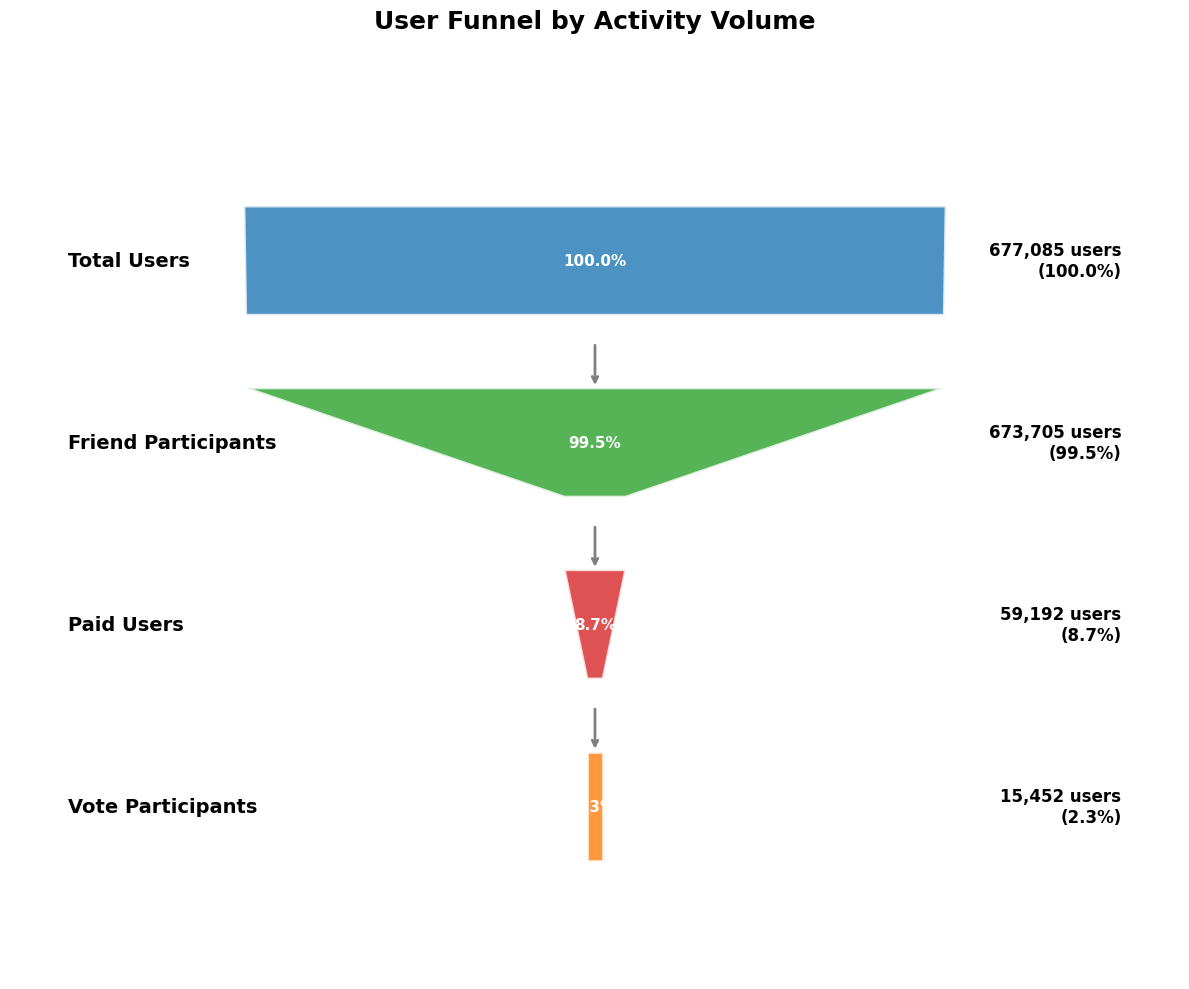

📊 유저 수 기준 깔대기 분석
1. Total Users         :  677,085명 (100.0%)
2. Friend Participants :  673,705명 ( 99.5%)
3. Paid Users          :   59,192명 (  8.7%)
4. Vote Participants   :   15,452명 (  2.3%)

💡 인사이트:
- 가장 많은 유저가 참여하는 기능: Total Users
- 두 번째로 인기 있는 기능: Friend Participants (673,705명)
- 결제 전환이 일어나는 비율: 2.3%


In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import os
import gc

# 데이터 로드 및 계산
data_dir = "/home/jovyan/work/data"

# 1. 전체 유저
total_users_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'), usecols=['id'])
total_users = total_users_df['id'].nunique()
del total_users_df; gc.collect()

# 2. 투표 참여자
vote_df = pd.read_csv(os.path.join(data_dir, 'accounts_userquestionrecord_processed.csv'), 
                     usecols=['user_id', 'chosen_user_id'])
voters = set(vote_df['user_id'].dropna().unique())
chosen = set(vote_df['chosen_user_id'].dropna().unique())
vote_participants = voters | chosen
del vote_df; gc.collect()

# 3. 친구 요청 참여자
friend_df = pd.read_csv(os.path.join(data_dir, 'accounts_friendrequest.csv'), 
                       usecols=['send_user_id', 'receive_user_id'])
send_users = set(friend_df['send_user_id'].dropna().unique())
receive_users = set(friend_df['receive_user_id'].dropna().unique())
friend_participants = send_users | receive_users
del friend_df; gc.collect()

# 4. 결제 유저
payment_df = pd.read_csv(os.path.join(data_dir, 'accounts_paymenthistory.csv'), usecols=['user_id'])
paid_users = set(payment_df['user_id'].unique())
del payment_df; gc.collect()

# 유저 수 많은 순서로 정렬
funnel_data = [
    ('Total Users', total_users, '#1f77b4'),
    ('Vote Participants', len(vote_participants), '#ff7f0e'),
    ('Friend Participants', len(friend_participants), '#2ca02c'),
    ('Paid Users', len(paid_users), '#d62728')
]

# 유저 수 기준으로 내림차순 정렬
funnel_data.sort(key=lambda x: x[1], reverse=True)

# 깔대기 시각화
plt.figure(figsize=(12, 10))
ax = plt.gca()

y_positions = [0.85, 0.65, 0.45, 0.25]
max_width = 0.6

for i, ((label, count, color), y_pos) in enumerate(zip(funnel_data, y_positions)):
    # 각 단계의 너비 계산 (첫 번째가 가장 크고 순차적으로 줄어듦)
    width = max_width * (count / funnel_data[0][1])
    height = 0.12
    x_pos = 0.5 - width/2
    
    # 사다리꼴 또는 직사각형 그리기
    if i < len(funnel_data) - 1:
        next_width = max_width * (funnel_data[i+1][1] / funnel_data[0][1])
        next_x = 0.5 - next_width/2
        
        trapezoid = patches.Polygon([
            (x_pos, y_pos), 
            (x_pos + width, y_pos),
            (next_x + next_width, y_pos - height),
            (next_x, y_pos - height)
        ], closed=True, facecolor=color, alpha=0.8, edgecolor='white', linewidth=2)
        ax.add_patch(trapezoid)
    else:
        rect = patches.Rectangle((x_pos, y_pos - height), width, height, 
                               facecolor=color, alpha=0.8, edgecolor='white', linewidth=2)
        ax.add_patch(rect)
    
    # 텍스트 배치
    percentage = (count / funnel_data[0][1] * 100)
    
    # 왼쪽에 라벨
    ax.text(0.05, y_pos - height/2, label, ha='left', va='center', 
            fontsize=14, fontweight='bold')
    
    # 오른쪽에 숫자
    ax.text(0.95, y_pos - height/2, f'{count:,} users\n({percentage:.1f}%)', 
            ha='right', va='center', fontsize=12, fontweight='bold')
    
    # 깔대기 안에 퍼센트
    ax.text(0.5, y_pos - height/2, f'{percentage:.1f}%', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='white')

# 화살표 추가
for i in range(len(y_positions) - 1):
    arrow_y = y_positions[i] - 0.15
    ax.annotate('', xy=(0.5, arrow_y - 0.05), xytext=(0.5, arrow_y),
                arrowprops=dict(arrowstyle='->', lw=2, color='gray'))

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
ax.set_title('User Funnel by Activity Volume', fontsize=18, fontweight='bold', pad=30)

plt.tight_layout()
plt.show()

# 결과 출력
print("📊 유저 수 기준 깔대기 분석")
print("=" * 50)

for i, (label, count, _) in enumerate(funnel_data):
    percentage = count / funnel_data[0][1] * 100
    print(f"{i+1}. {label:20}: {count:8,}명 ({percentage:5.1f}%)")

print(f"\n💡 인사이트:")
print(f"- 가장 많은 유저가 참여하는 기능: {funnel_data[0][0]}")
print(f"- 두 번째로 인기 있는 기능: {funnel_data[1][0]} ({funnel_data[1][1]:,}명)")
print(f"- 결제 전환이 일어나는 비율: {funnel_data[-1][1]/funnel_data[0][1]*100:.1f}%")

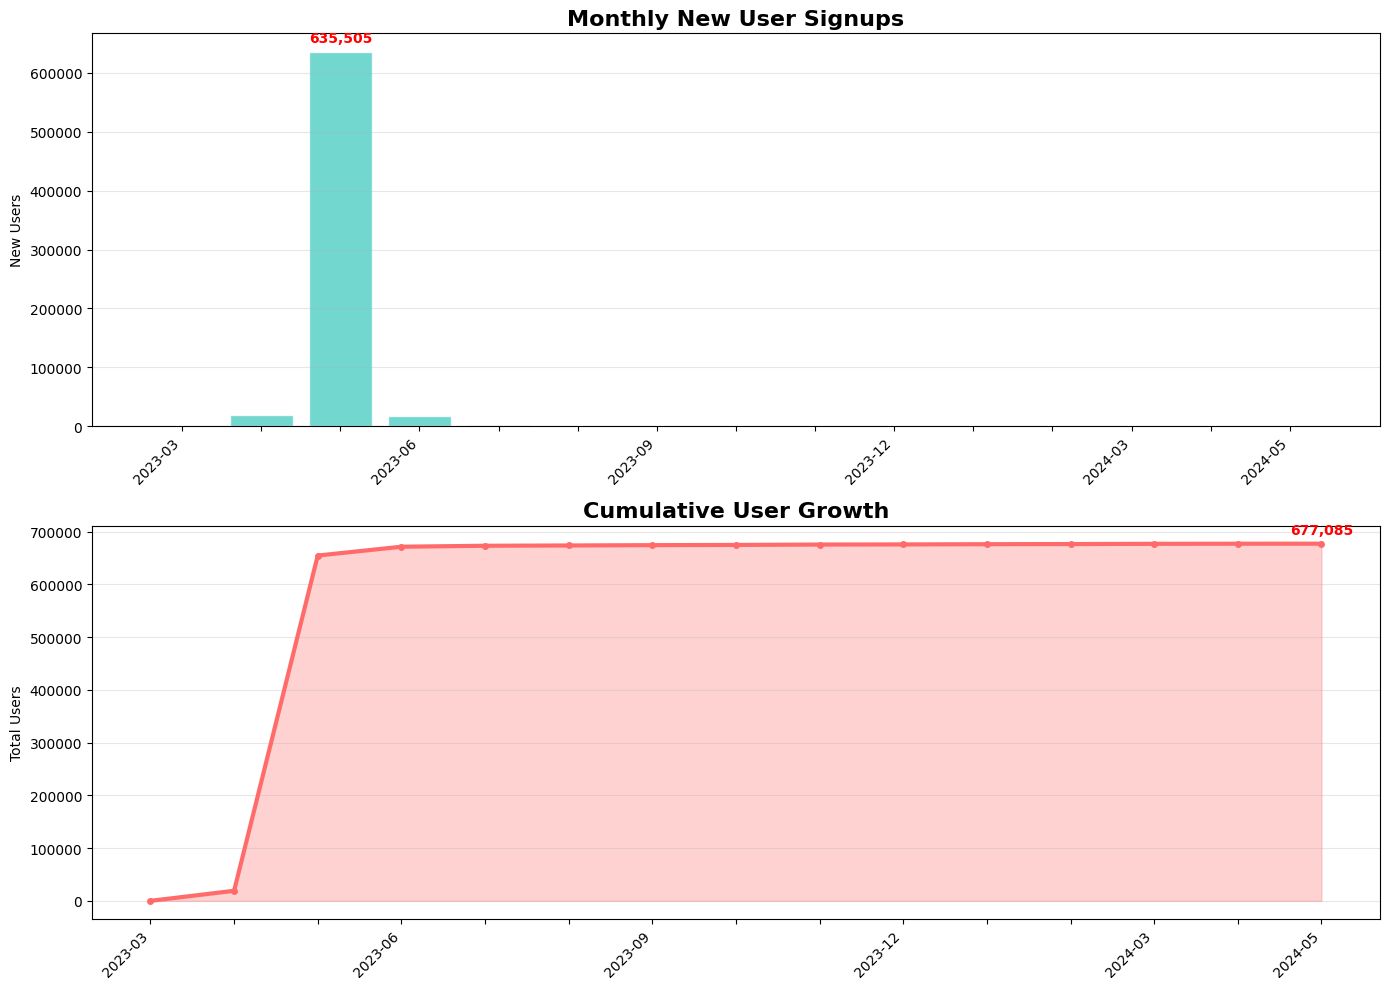

📊 월별 가입자 분석
총 가입자 수: 677,085명
분석 기간: 2023-03 ~ 2024-05
월평균 가입자: 45139명
최대 월간 가입자: 635,505명 (2023-05)
최소 월간 가입자: 33명
최근 3개월 평균: 230명
성장률 (최근 3개월 vs 이전 3개월): -26.6%

📈 가입자 수 상위 5개월:
2023-05: 635,505명
2023-04: 19,060명
2023-06: 16,737명
2023-07: 1,849명
2023-11: 731명


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import datetime

# 데이터 로드
data_dir = "/home/jovyan/work/data"

# 유저 데이터에서 가입일(created_at) 로드
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'), 
                     usecols=['id', 'created_at'])

# created_at을 datetime으로 변환
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')

# null 값 제거
user_df = user_df.dropna(subset=['created_at'])

# 월별로 그룹화
user_df['year_month'] = user_df['created_at'].dt.to_period('M')
monthly_signups = user_df.groupby('year_month').size().reset_index(name='signups')

# 누적 가입자 수 계산
monthly_signups['cumulative'] = monthly_signups['signups'].cumsum()

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# 1. 월별 신규 가입자
ax1.bar(range(len(monthly_signups)), monthly_signups['signups'], 
        color='#4ecdc4', alpha=0.8, edgecolor='white')

# x축 라벨 (3개월마다 표시)
x_labels = []
for i, period in enumerate(monthly_signups['year_month']):
    if i % 3 == 0 or i == len(monthly_signups) - 1:  # 3개월마다 + 마지막
        x_labels.append(str(period))
    else:
        x_labels.append('')

ax1.set_xticks(range(len(monthly_signups)))
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.set_title('Monthly New User Signups', fontsize=16, fontweight='bold')
ax1.set_ylabel('New Users')
ax1.grid(axis='y', alpha=0.3)

# 최대값에 표시
max_idx = monthly_signups['signups'].idxmax()
max_value = monthly_signups['signups'].max()
ax1.text(max_idx, max_value + max_value*0.02, f'{max_value:,}', 
         ha='center', va='bottom', fontweight='bold', color='red')

# 2. 누적 가입자 수
ax2.plot(range(len(monthly_signups)), monthly_signups['cumulative'], 
         color='#ff6b6b', linewidth=3, marker='o', markersize=4)
ax2.fill_between(range(len(monthly_signups)), monthly_signups['cumulative'], 
                 alpha=0.3, color='#ff6b6b')

ax2.set_xticks(range(len(monthly_signups)))
ax2.set_xticklabels(x_labels, rotation=45, ha='right')
ax2.set_title('Cumulative User Growth', fontsize=16, fontweight='bold')
ax2.set_ylabel('Total Users')
ax2.grid(axis='y', alpha=0.3)

# 최종 누적 수치 표시
final_count = monthly_signups['cumulative'].iloc[-1]
ax2.text(len(monthly_signups)-1, final_count + final_count*0.02, 
         f'{final_count:,}', ha='center', va='bottom', fontweight='bold', color='red')

plt.tight_layout()
plt.show()

# 통계 정보
print("📊 월별 가입자 분석")
print("=" * 50)
print(f"총 가입자 수: {final_count:,}명")
print(f"분석 기간: {monthly_signups['year_month'].iloc[0]} ~ {monthly_signups['year_month'].iloc[-1]}")
print(f"월평균 가입자: {monthly_signups['signups'].mean():.0f}명")
print(f"최대 월간 가입자: {max_value:,}명 ({monthly_signups['year_month'].iloc[max_idx]})")
print(f"최소 월간 가입자: {monthly_signups['signups'].min():,}명")

# 최근 3개월 평균
recent_3months = monthly_signups['signups'].tail(3).mean()
print(f"최근 3개월 평균: {recent_3months:.0f}명")

# 성장률 계산 (최근 3개월 vs 이전 3개월)
if len(monthly_signups) >= 6:
    prev_3months = monthly_signups['signups'].iloc[-6:-3].mean()
    growth_rate = (recent_3months - prev_3months) / prev_3months * 100
    print(f"성장률 (최근 3개월 vs 이전 3개월): {growth_rate:+.1f}%")

# 월별 상위 5개월
print(f"\n📈 가입자 수 상위 5개월:")
top_months = monthly_signups.nlargest(5, 'signups')
for i, row in top_months.iterrows():
    print(f"{row['year_month']}: {row['signups']:,}명")

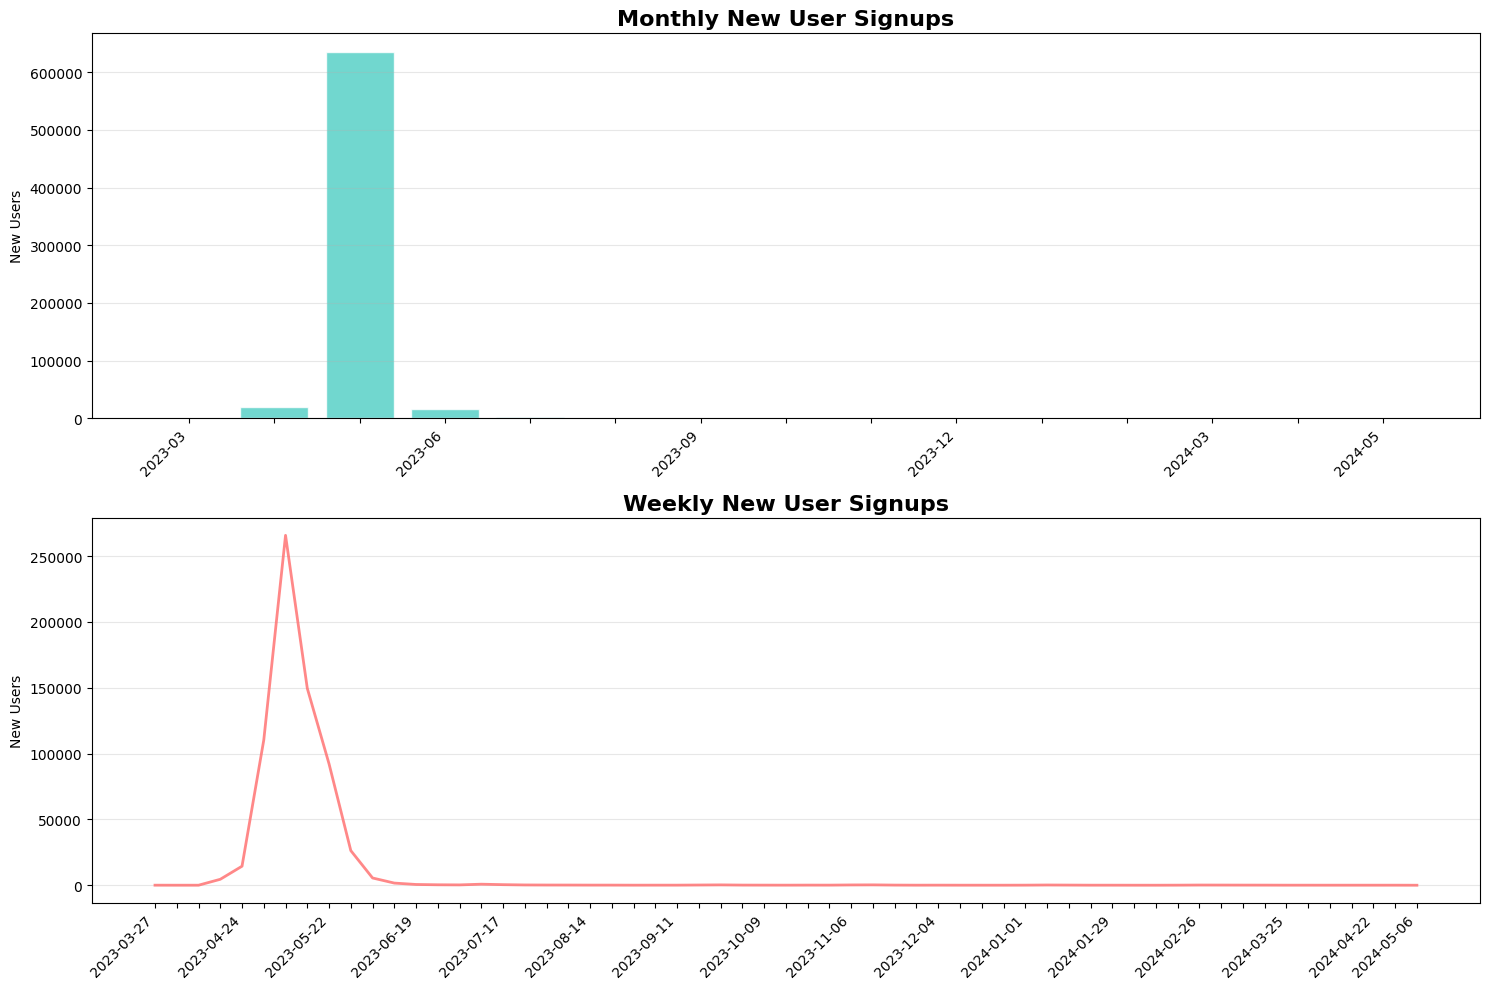

월별 평균 가입자: 45139명
주별 평균 가입자: 11476명


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 로드
data_dir = "/home/jovyan/work/data"

# 유저 데이터에서 가입일 로드
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'), 
                     usecols=['id', 'created_at'])

# created_at을 datetime으로 변환
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')
user_df = user_df.dropna(subset=['created_at'])

# 월별 및 주별 그룹화
monthly_signups = user_df.groupby(user_df['created_at'].dt.to_period('M')).size()
weekly_signups = user_df.groupby(user_df['created_at'].dt.to_period('W')).size()

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

# 1. 월별 신규 가입자
ax1.bar(range(len(monthly_signups)), monthly_signups.values, 
        color='#4ecdc4', alpha=0.8, edgecolor='white')

# x축 라벨 (3개월마다 표시)
monthly_labels = []
for i, period in enumerate(monthly_signups.index):
    if i % 3 == 0 or i == len(monthly_signups) - 1:
        monthly_labels.append(str(period))
    else:
        monthly_labels.append('')

ax1.set_xticks(range(len(monthly_signups)))
ax1.set_xticklabels(monthly_labels, rotation=45, ha='right')
ax1.set_title('Monthly New User Signups', fontsize=16, fontweight='bold')
ax1.set_ylabel('New Users')
ax1.grid(axis='y', alpha=0.3)

# 2. 주별 신규 가입자
ax2.plot(range(len(weekly_signups)), weekly_signups.values, 
         color='#ff6b6b', linewidth=2, alpha=0.8)

# x축 라벨 (월 단위로 표시)
weekly_labels = []
for i, period in enumerate(weekly_signups.index):
    if i % 4 == 0 or i == len(weekly_signups) - 1:  # 4주마다
        weekly_labels.append(str(period).split('/')[0])  # 년-월만 표시
    else:
        weekly_labels.append('')

ax2.set_xticks(range(len(weekly_signups)))
ax2.set_xticklabels(weekly_labels, rotation=45, ha='right')
ax2.set_title('Weekly New User Signups', fontsize=16, fontweight='bold')
ax2.set_ylabel('New Users')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print(f"월별 평균 가입자: {monthly_signups.mean():.0f}명")
print(f"주별 평균 가입자: {weekly_signups.mean():.0f}명")

탈퇴 데이터 로드 성공: 70,764개 레코드


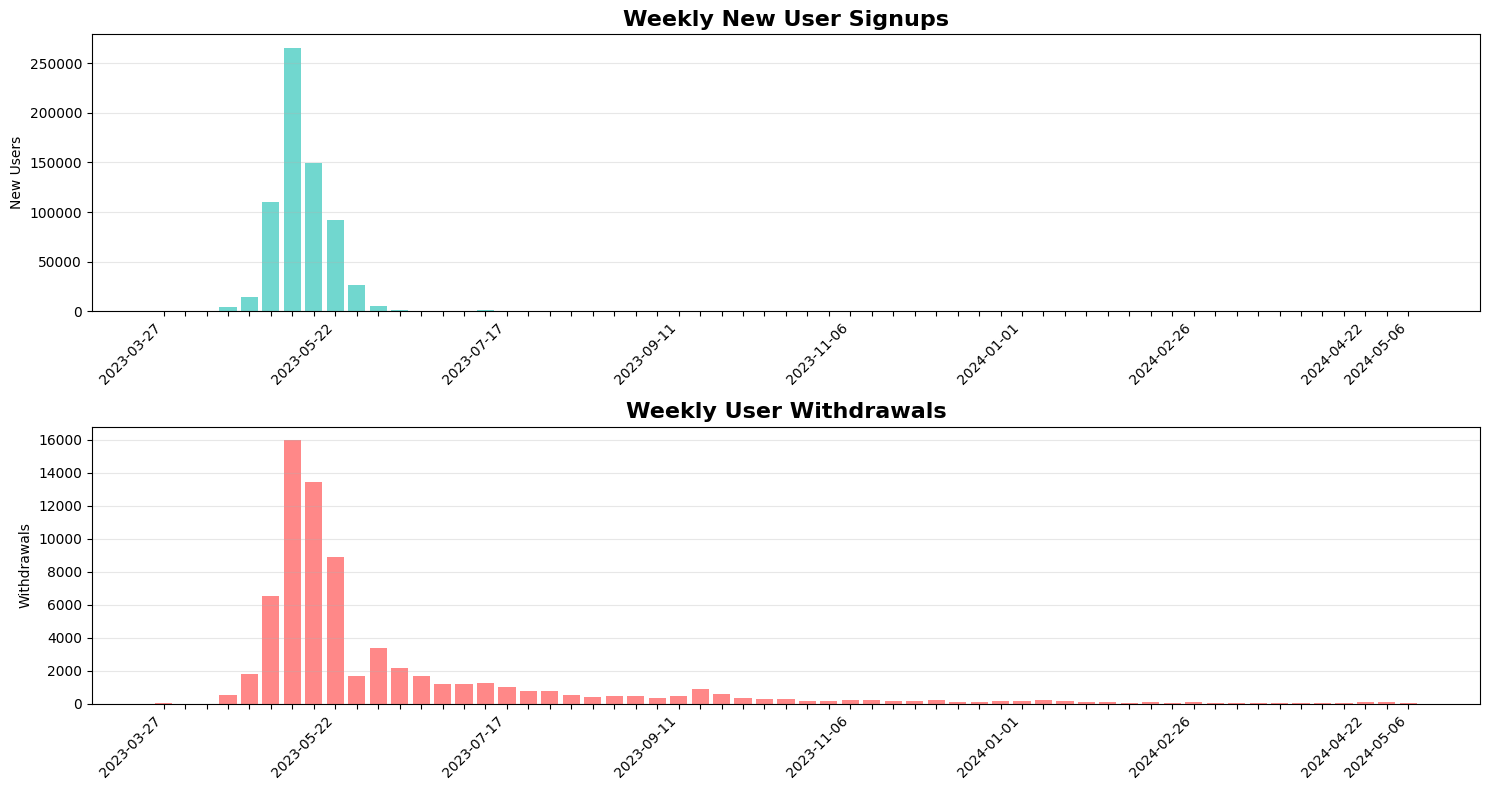

📊 주별 가입/탈퇴 분석
주별 평균 가입자: 11476.0명
주별 평균 탈퇴자: 1199.4명
전체 탈퇴율: 10.5%


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# 데이터 로드
data_dir = "/home/jovyan/work/data"

# 1. 가입자 데이터
user_df = pd.read_csv(os.path.join(data_dir, 'accounts_user_processed.csv'), 
                     usecols=['id', 'created_at'])
user_df['created_at'] = pd.to_datetime(user_df['created_at'], errors='coerce')
user_df = user_df.dropna(subset=['created_at'])

# 2. 탈퇴자 데이터
try:
    withdraw_df = pd.read_csv(os.path.join(data_dir, 'accounts_userwithdraw.csv'))
    withdraw_df['created_at'] = pd.to_datetime(withdraw_df['created_at'], errors='coerce')
    withdraw_df = withdraw_df.dropna(subset=['created_at'])
    
    print(f"탈퇴 데이터 로드 성공: {len(withdraw_df):,}개 레코드")
except Exception as e:
    print(f"탈퇴 데이터 로드 실패: {e}")
    # 빈 데이터프레임 생성
    withdraw_df = pd.DataFrame(columns=['created_at'])

# 주별 그룹화
weekly_signups = user_df.groupby(user_df['created_at'].dt.to_period('W')).size()

if len(withdraw_df) > 0:
    weekly_withdraws = withdraw_df.groupby(withdraw_df['created_at'].dt.to_period('W')).size()
else:
    # 빈 시리즈 생성
    weekly_withdraws = pd.Series(dtype=int)

# 전체 기간 맞추기 (가입자 기준)
all_weeks = weekly_signups.index
if len(weekly_withdraws) > 0:
    weekly_withdraws = weekly_withdraws.reindex(all_weeks, fill_value=0)
else:
    weekly_withdraws = pd.Series(0, index=all_weeks)

# 시각화
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 8))

# 1. 주별 신규 가입자
ax1.bar(range(len(weekly_signups)), weekly_signups.values, 
        color='#4ecdc4', alpha=0.8)

ax1.set_title('Weekly New User Signups', fontsize=16, fontweight='bold')
ax1.set_ylabel('New Users')
ax1.grid(axis='y', alpha=0.3)

# 2. 주별 탈퇴자
ax2.bar(range(len(weekly_withdraws)), weekly_withdraws.values, 
        color='#ff6b6b', alpha=0.8)

ax2.set_title('Weekly User Withdrawals', fontsize=16, fontweight='bold')
ax2.set_ylabel('Withdrawals')
ax2.grid(axis='y', alpha=0.3)

# x축 라벨 설정 (모든 subplot에 동일하게)
weekly_labels = []
for i, period in enumerate(weekly_signups.index):
    if i % 8 == 0 or i == len(weekly_signups) - 1:  # 2개월마다
        weekly_labels.append(str(period).split('/')[0])
    else:
        weekly_labels.append('')

for ax in [ax1, ax2]:
    ax.set_xticks(range(len(weekly_signups)))
    ax.set_xticklabels(weekly_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()

# 통계 정보
print("📊 주별 가입/탈퇴 분석")
print("=" * 50)
print(f"주별 평균 가입자: {weekly_signups.mean():.1f}명")
if len(weekly_withdraws) > 0 and weekly_withdraws.sum() > 0:
    print(f"주별 평균 탈퇴자: {weekly_withdraws.mean():.1f}명")
    print(f"전체 탈퇴율: {weekly_withdraws.sum() / weekly_signups.sum() * 100:.1f}%")
else:
    print("탈퇴 데이터가 없습니다.")

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import numpy as np
import gc

def compare_24h_user_distribution(dataset1, dataset2, name1="Dataset 1", name2="Dataset 2"):
    """
    두 데이터셋의 24시간 미만/이상 사용자 분포를 비교 시각화
    """
    print("=" * 80)
    print("🔍 두 데이터셋 24시간 미만/이상 사용자 분포 비교")
    print("=" * 80)
    
    # 데이터셋별 분석 함수
    def analyze_dataset(df, dataset_name):
        if 'activity_duration' in df.columns:
            # user_activity_summary_df 타입 (activity_duration 컬럼이 이미 있음)
            activity_duration = df['activity_duration']
        else:
            # user_survival 타입 (first_activity, last_activity에서 계산)
            activity_duration = df['last_activity'] - df['first_activity']
        
        duration_24h = timedelta(hours=24)
        is_less_than_24h = activity_duration < duration_24h
        
        total_users = len(df)
        users_less_24h = is_less_than_24h.sum()
        users_24h_more = total_users - users_less_24h
        
        pct_less_24h = (users_less_24h / total_users) * 100
        pct_24h_more = (users_24h_more / total_users) * 100
        
        print(f"📊 {dataset_name}:")
        print(f"  • 총 사용자: {total_users:,}명")
        print(f"  • 24시간 미만: {users_less_24h:,}명 ({pct_less_24h:.2f}%)")
        print(f"  • 24시간 이상: {users_24h_more:,}명 ({pct_24h_more:.2f}%)")
        print()
        
        return {
            'total': total_users,
            'less_24h': users_less_24h,
            'more_24h': users_24h_more,
            'pct_less_24h': pct_less_24h,
            'pct_more_24h': pct_24h_more
        }
    
    # 두 데이터셋 분석
    result1 = analyze_dataset(dataset1, name1)
    result2 = analyze_dataset(dataset2, name2)
    
    # 시각화
    fig = plt.figure(figsize=(20, 12))
    
    # 1. 상단: 파이차트 비교
    ax1 = plt.subplot(2, 3, 1)
    labels = ['< 24시간', '≥ 24시간']
    sizes1 = [result1['less_24h'], result1['more_24h']]
    colors = ['#ff7f7f', '#7fbfff']
    
    wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels, colors=colors,
                                         autopct='%1.1f%%', startangle=90,
                                         explode=(0.05, 0), shadow=True,
                                         textprops={'fontsize': 10, 'weight': 'bold'})
    ax1.set_title(f'{name1}\n24시간 기준 분포', fontsize=12, weight='bold', pad=20)
    
    ax2 = plt.subplot(2, 3, 2)
    sizes2 = [result2['less_24h'], result2['more_24h']]
    wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels, colors=colors,
                                         autopct='%1.1f%%', startangle=90,
                                         explode=(0.05, 0), shadow=True,
                                         textprops={'fontsize': 10, 'weight': 'bold'})
    ax2.set_title(f'{name2}\n24시간 기준 분포', fontsize=12, weight='bold', pad=20)
    
    # 3. 차이 비교 (상단 우측)
    ax3 = plt.subplot(2, 3, 3)
    diff_less = abs(result1['pct_less_24h'] - result2['pct_less_24h'])
    diff_more = abs(result1['pct_more_24h'] - result2['pct_more_24h'])
    
    bars = ax3.bar(['< 24시간 차이', '≥ 24시간 차이'], [diff_less, diff_more], 
                   color=['#ffcccc', '#ccddff'], alpha=0.8, edgecolor='black')
    ax3.set_ylabel('백분율 차이 (%)')
    ax3.set_title('두 데이터셋 간 차이', fontsize=12, weight='bold')
    
    for bar, diff in zip(bars, [diff_less, diff_more]):
        ax3.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.1,
                f'{diff:.2f}%', ha='center', va='bottom', fontsize=10, weight='bold')
    
    # 4. 하단: 나란히 막대차트 비교
    ax4 = plt.subplot(2, 1, 2)
    
    x = np.arange(2)
    width = 0.35
    
    values1 = [result1['pct_less_24h'], result1['pct_more_24h']]
    values2 = [result2['pct_less_24h'], result2['pct_more_24h']]
    
    bars1 = ax4.bar(x - width/2, values1, width, label=name1, 
                    color=['#ff7f7f', '#7fbfff'], alpha=0.8, edgecolor='black')
    bars2 = ax4.bar(x + width/2, values2, width, label=name2, 
                    color=['#ff7f7f', '#7fbfff'], alpha=0.6, edgecolor='black', 
                    hatch='///')
    
    # 수치 표시
    for bars, values in [(bars1, values1), (bars2, values2)]:
        for bar, value in zip(bars, values):
            ax4.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.5,
                    f'{value:.1f}%', ha='center', va='bottom', fontsize=10, weight='bold')
    
    ax4.set_ylabel('사용자 비율 (%)')
    ax4.set_title('두 데이터셋 24시간 기준 사용자 분포 비교', fontsize=14, weight='bold', pad=20)
    ax4.set_xticks(x)
    ax4.set_xticklabels(['< 24시간 사용자', '≥ 24시간 사용자'])
    ax4.legend()
    ax4.grid(axis='y', alpha=0.3)
    ax4.set_ylim(0, 105)
    
    plt.tight_layout()
    plt.show()
    
    # 유사성 분석
    print("🔍 유사성 분석:")
    print(f"• < 24시간 사용자 비율 차이: {diff_less:.2f}%p")
    print(f"• ≥ 24시간 사용자 비율 차이: {diff_more:.2f}%p")
    print(f"• 평균 차이: {(diff_less + diff_more)/2:.2f}%p")
    
    if (diff_less + diff_more)/2 < 5:
        print("✅ 두 데이터셋의 분포가 매우 유사합니다! (평균 차이 < 5%p)")
    elif (diff_less + diff_more)/2 < 10:
        print("⚠️ 두 데이터셋의 분포가 비슷합니다. (평균 차이 < 10%p)")
    else:
        print("❌ 두 데이터셋의 분포에 상당한 차이가 있습니다.")
    
    # 메모리 정리
    gc.collect()
    
    return result1, result2

# 실행
try:
    # user_survival (첫 번째 데이터셋)과 user_activity_summary_df (두 번째 데이터셋) 비교
    result1, result2 = compare_24h_user_distribution(
        user_survival, 
        user_activity_summary_df,
        name1="Merged CSV Data", 
        name2="Activity Summary Data"
    )
    
    print("\n✅ 두 데이터셋 비교 분석 완료!")
    
except Exception as e:
    print(f"❌ 분석 중 오류 발생: {e}")
    print("두 데이터셋이 모두 메모리에 로드되어 있는지 확인해주세요.")
finally:
    print("=" * 80)

❌ 분석 중 오류 발생: name 'user_activity_summary_df' is not defined
두 데이터셋이 모두 메모리에 로드되어 있는지 확인해주세요.



--- 사용자 활동 기간 분석: 24시간 미만/이상 ---
📊 총 유효 사용자 수: 677,085명
• 활동 기간 24시간 미만 사용자 (당일 사용자): 235,456명 (34.77%)
• 활동 기간 24시간 이상 사용자: 441,629명 (65.23%)


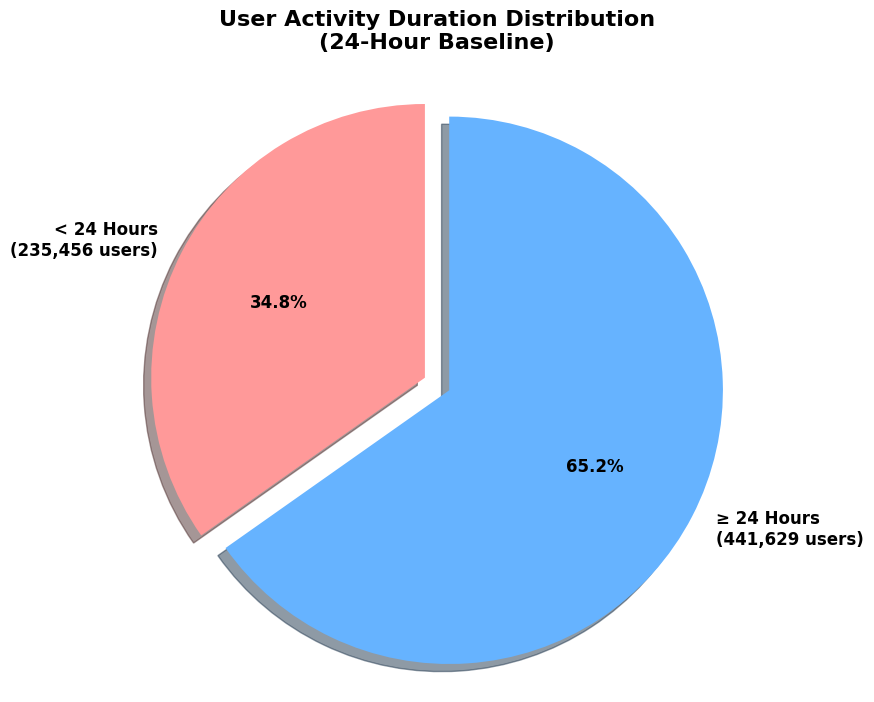


📈 추가 정보:
• 당일 사용자 비율: 34.77%
• 지속 사용자 비율: 65.23%
• 당일 대비 지속 사용자 비율: 53.32%

🗑️ 분석 완료


2183

In [18]:
import matplotlib.pyplot as plt
from datetime import timedelta
import gc

print("\n--- 사용자 활동 기간 분석: 24시간 미만/이상 ---")
print("=" * 80)

# 24시간 기준 시간차 정의
_24_hours = timedelta(hours=24)

# user_survival에서 활동 기간 계산
user_survival['activity_duration'] = user_survival['last_activity'] - user_survival['first_activity']

total_users_survival = len(user_survival)

if total_users_survival > 0:
    # 활동 기간이 24시간 미만인 사용자
    users_less_than_24h = (user_survival['activity_duration'] < _24_hours).sum()
    
    # 활동 기간이 24시간 이상인 사용자
    users_24h_or_more = (user_survival['activity_duration'] >= _24_hours).sum()

    print(f"📊 총 유효 사용자 수: {total_users_survival:,}명")
    print(f"• 활동 기간 24시간 미만 사용자 (당일 사용자): {users_less_than_24h:,}명 ({users_less_than_24h / total_users_survival * 100:.2f}%)")
    print(f"• 활동 기간 24시간 이상 사용자: {users_24h_or_more:,}명 ({users_24h_or_more / total_users_survival * 100:.2f}%)")

    # 시각화 (영어)
    labels = [f'< 24 Hours\n({users_less_than_24h:,} users)', f'≥ 24 Hours\n({users_24h_or_more:,} users)']
    sizes = [users_less_than_24h, users_24h_or_more]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # 첫 번째 조각 강조

    plt.figure(figsize=(10, 8))
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
    plt.axis('equal')  # 원형을 유지
    plt.title('User Activity Duration Distribution\n(24-Hour Baseline)', fontsize=16, weight='bold', pad=20)
    plt.show()

    # 추가 통계
    print(f"\n📈 추가 정보:")
    print(f"• 당일 사용자 비율: {users_less_than_24h / total_users_survival * 100:.2f}%")
    print(f"• 지속 사용자 비율: {users_24h_or_more / total_users_survival * 100:.2f}%")
    if users_24h_or_more > 0:
        print(f"• 당일 대비 지속 사용자 비율: {(users_less_than_24h/users_24h_or_more)*100:.2f}%")

else:
    print("\n📊 분석할 유효한 사용자 활동 데이터가 없습니다.")

print("\n🗑️ 분석 완료")
print("=" * 80)

# 메모리 정리 (필요시)
del user_survival['activity_duration']  # 임시 컬럼 삭제
gc.collect()

In [20]:
!pip install imageio folium Pillow matplotlib selenium webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 7.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 6.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.6/159.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 499.2/499.2 kB 6.0 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.7/128.7 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 9.7 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.6.4
    Uninstalling websocket-client-1.6.4:
      Successfully uninstalled websocket-client-1.6.4
  Attempting uninstall: urllib3
    Found existing installation: urllib3 2.0.7
    Uninstalling urllib3-2.0.7:
      Successfully uninstalled urllib

In [21]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import imageio
import os
from PIL import Image
import numpy as np
import gc
import warnings
warnings.filterwarnings('ignore')

def create_memory_efficient_school_animation():
    """
    메모리 효율적인 학교별 가입 현황 지도 애니메이션 생성
    """
    print("🗺️ 메모리 효율적 학교별 가입 현황 애니메이션 생성 시작")
    print("=" * 80)
    
    # 데이터 파일 경로
    data_dir = "/home/jovyan/work/data"
    school_coords_path = f"{data_dir}/school_coordinates_all.csv"
    accounts_group_path = f"{data_dir}/accounts_group.csv"
    accounts_user_path = f"{data_dir}/accounts_user_processed.csv"
    
    try:
        # 1. 학교 좌표 데이터 로드 (필요한 컬럼만)
        print("📂 학교 좌표 데이터 로드 중...")
        school_coords = pd.read_csv(
            school_coords_path,
            usecols=['school_id', 'latitude', 'longitude', 'address', 'sido'],
            dtype={'school_id': 'int32', 'latitude': 'float32', 'longitude': 'float32'}
        )
        # 좌표가 유효한 학교만 필터링
        school_coords = school_coords.dropna(subset=['latitude', 'longitude'])
        print(f"✅ 유효한 학교 좌표: {len(school_coords):,} 개")
        
        # 2. 학급 데이터 로드 (필요한 컬럼만)
        print("📂 학급 데이터 로드 중...")
        accounts_group = pd.read_csv(
            accounts_group_path,
            usecols=['id', 'school_id'],
            dtype={'id': 'int32', 'school_id': 'int32'}
        )
        accounts_group = accounts_group.dropna(subset=['school_id'])
        print(f"✅ 유효한 학급 데이터: {len(accounts_group):,} 개")
        
        # 좌표가 있는 학교의 학급만 필터링
        valid_school_ids = set(school_coords['school_id'])
        accounts_group = accounts_group[accounts_group['school_id'].isin(valid_school_ids)]
        print(f"✅ 좌표가 있는 학교의 학급: {len(accounts_group):,} 개")
        
        # 3. 사용자 데이터를 청크 단위로 처리
        print("📂 사용자 데이터 청크 처리 중...")
        
        # 4-5월 날짜 범위
        start_date = "2024-04-01"
        end_date = "2024-05-31"
        
        # 결과를 저장할 리스트
        filtered_users = []
        chunk_size = 50000  # 5만 행씩 처리
        
        # 청크 단위로 읽어서 4-5월 가입자만 필터링
        for chunk_num, chunk in enumerate(pd.read_csv(
            accounts_user_path,
            usecols=['id', 'group_id', 'created_at'],
            dtype={'id': 'int32', 'group_id': 'Int32'},  # nullable int
            chunksize=chunk_size,
            parse_dates=['created_at']
        )):
            print(f"  청크 {chunk_num + 1} 처리 중... ({len(chunk):,} 행)")
            
            # 4-5월 데이터만 필터링
            chunk_filtered = chunk[
                (chunk['created_at'] >= start_date) & 
                (chunk['created_at'] <= end_date) &
                (chunk['group_id'].notna())
            ].copy()
            
            if len(chunk_filtered) > 0:
                # 유효한 group_id만 필터링
                valid_group_ids = set(accounts_group['id'])
                chunk_filtered = chunk_filtered[
                    chunk_filtered['group_id'].isin(valid_group_ids)
                ]
                
                if len(chunk_filtered) > 0:
                    filtered_users.append(chunk_filtered)
                    print(f"    → 유효한 가입자: {len(chunk_filtered):,} 명")
            
            # 메모리 정리
            del chunk, chunk_filtered
            gc.collect()
        
        # 4. 필터링된 사용자 데이터 합치기
        if not filtered_users:
            print("❌ 4-5월 가입 유저가 없습니다.")
            return
        
        april_may_users = pd.concat(filtered_users, ignore_index=True)
        del filtered_users
        gc.collect()
        
        print(f"📅 4-5월 가입 유저: {len(april_may_users):,} 명")
        
        # 5. 데이터 조인 (메모리 효율적)
        print("🔗 데이터 조인 중...")
        
        # user -> group 조인
        user_group = april_may_users.merge(
            accounts_group[['id', 'school_id']], 
            left_on='group_id', 
            right_on='id', 
            how='inner'
        )[['id_x', 'created_at', 'school_id']].rename(columns={'id_x': 'user_id'})
        
        del april_may_users, accounts_group
        gc.collect()
        
        # group -> school 조인
        user_school_coords = user_group.merge(
            school_coords, 
            on='school_id', 
            how='inner'
        )
        
        del user_group, school_coords
        gc.collect()
        
        print(f"🏫 최종 분석 대상: {len(user_school_coords):,} 명")
        print(f"🗺️ 관련 학교 수: {user_school_coords['school_id'].nunique():,} 개")
        
        # 6. 일별 데이터 준비
        print("📊 일별 데이터 준비 중...")
        
        user_school_coords['date'] = user_school_coords['created_at'].dt.date
        
        # 일별 학교별 가입자 수 집계
        daily_signups = user_school_coords.groupby([
            'date', 'school_id', 'latitude', 'longitude', 'address', 'sido'
        ]).size().reset_index(name='signup_count')
        
        del user_school_coords
        gc.collect()
        
        all_dates = sorted(daily_signups['date'].unique())
        print(f"📅 분석 기간: {all_dates[0]} ~ {all_dates[-1]} ({len(all_dates)} 일)")
        
        # 7. 간단한 matplotlib 애니메이션 생성 (메모리 효율적)
        print("🎬 애니메이션 생성 중...")
        
        # 한국 지도 범위
        korea_bounds = {
            'lat_min': 33.0, 'lat_max': 38.5,
            'lon_min': 125.0, 'lon_max': 132.0
        }
        
        # 매일의 누적 데이터 미리 계산 (메모리 효율적)
        cumulative_data_by_date = {}
        
        for date in all_dates:
            daily_data = daily_signups[daily_signups['date'] <= date]
            cumulative_by_school = daily_data.groupby([
                'school_id', 'latitude', 'longitude', 'address', 'sido'
            ])['signup_count'].sum().reset_index()
            cumulative_by_school.rename(columns={'signup_count': 'cumulative_count'}, inplace=True)
            cumulative_data_by_date[date] = cumulative_by_school
        
        # 프레임별 이미지 생성
        image_files = []
        temp_dir = "temp_animation"
        if not os.path.exists(temp_dir):
            os.makedirs(temp_dir)
        
        max_count = max([df['cumulative_count'].max() for df in cumulative_data_by_date.values()])
        
        for i, date in enumerate(all_dates[::2]):  # 2일마다 프레임 생성 (메모리 절약)
            print(f"📅 {date} 프레임 생성 중... ({i+1}/{len(all_dates[::2])})")
            
            fig, ax = plt.subplots(figsize=(12, 8))
            
            cumulative_data = cumulative_data_by_date[date]
            
            if len(cumulative_data) > 0:
                # 크기와 색상 설정
                sizes = (cumulative_data['cumulative_count'] / max_count * 100).clip(10, 200)
                colors = plt.cm.Reds(cumulative_data['cumulative_count'] / max_count)
                
                scatter = ax.scatter(
                    cumulative_data['longitude'], 
                    cumulative_data['latitude'],
                    s=sizes, 
                    c=cumulative_data['cumulative_count'],
                    cmap='Reds',
                    alpha=0.7,
                    edgecolors='black',
                    linewidth=0.5
                )
                
                # 컬러바 추가
                cbar = plt.colorbar(scatter, ax=ax, shrink=0.8)
                cbar.set_label('누적 가입자 수', fontsize=12)
            
            ax.set_xlim(korea_bounds['lon_min'], korea_bounds['lon_max'])
            ax.set_ylim(korea_bounds['lat_min'], korea_bounds['lat_max'])
            ax.set_title(f'학교별 누적 가입자 현황: {date}', fontsize=16, weight='bold', pad=20)
            ax.set_xlabel('경도', fontsize=12)
            ax.set_ylabel('위도', fontsize=12)
            ax.grid(True, alpha=0.3)
            
            # 통계 정보 텍스트 추가
            total_users = cumulative_data['cumulative_count'].sum() if len(cumulative_data) > 0 else 0
            total_schools = len(cumulative_data)
            ax.text(0.02, 0.98, f'누적 가입자: {total_users:,}명\n참여 학교: {total_schools:,}개', 
                   transform=ax.transAxes, fontsize=11, verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            plt.tight_layout()
            
            # 이미지 저장
            img_path = f"{temp_dir}/frame_{i:03d}.png"
            plt.savefig(img_path, dpi=100, bbox_inches='tight')
            plt.close()
            
            image_files.append(img_path)
            
            # 메모리 정리
            gc.collect()
        
        # 8. GIF 생성
        print(f"🎬 GIF 생성 중... ({len(image_files)} 프레임)")
        
        if image_files:
            images = []
            for img_path in image_files:
                img = Image.open(img_path)
                images.append(img)
            
            # GIF 저장
            gif_path = "school_signup_animation_april_may.gif"
            images[0].save(
                gif_path,
                save_all=True,
                append_images=images[1:],
                duration=800,  # 각 프레임 0.8초
                loop=0
            )
            
            print(f"✅ GIF 저장 완료: {gif_path}")
            
            # 임시 파일 정리
            print("🗑️ 임시 파일 정리 중...")
            for file in image_files:
                try:
                    os.remove(file)
                except:
                    pass
            os.rmdir(temp_dir)
        
        # 최종 통계 출력
        print(f"\n📊 최종 통계:")
        print(f"• 총 분석 기간: {len(all_dates)} 일")
        print(f"• 총 가입자: {daily_signups['signup_count'].sum():,} 명")
        print(f"• 참여 학교: {daily_signups['school_id'].nunique():,} 개")
        print(f"• 시도별 분포:")
        sido_stats = daily_signups.groupby('sido')['signup_count'].sum().sort_values(ascending=False)
        for sido, count in sido_stats.head(10).items():
            print(f"  - {sido}: {count:,} 명")
        
        # 메모리 정리
        del daily_signups, cumulative_data_by_date
        gc.collect()
        
    except Exception as e:
        print(f"❌ 처리 중 오류 발생: {e}")
        import traceback
        traceback.print_exc()
    
    finally:
        print("\n✅ 처리 완료!")
        print("=" * 80)

# 실행
create_memory_efficient_school_animation()

🗺️ 메모리 효율적 학교별 가입 현황 애니메이션 생성 시작
📂 학교 좌표 데이터 로드 중...
✅ 유효한 학교 좌표: 5,948 개
📂 학급 데이터 로드 중...
✅ 유효한 학급 데이터: 84,515 개
✅ 좌표가 있는 학교의 학급: 84,485 개
📂 사용자 데이터 청크 처리 중...
  청크 1 처리 중... (50,000 행)
  청크 2 처리 중... (50,000 행)
  청크 3 처리 중... (50,000 행)
  청크 4 처리 중... (50,000 행)
  청크 5 처리 중... (50,000 행)
  청크 6 처리 중... (50,000 행)
  청크 7 처리 중... (50,000 행)
  청크 8 처리 중... (50,000 행)
  청크 9 처리 중... (50,000 행)
  청크 10 처리 중... (50,000 행)
  청크 11 처리 중... (50,000 행)
  청크 12 처리 중... (50,000 행)
  청크 13 처리 중... (50,000 행)
  청크 14 처리 중... (27,085 행)
    → 유효한 가입자: 245 명
📅 4-5월 가입 유저: 245 명
🔗 데이터 조인 중...
🏫 최종 분석 대상: 245 명
🗺️ 관련 학교 수: 215 개
📊 일별 데이터 준비 중...
📅 분석 기간: 2024-04-01 ~ 2024-05-09 (39 일)
🎬 애니메이션 생성 중...
📅 2024-04-01 프레임 생성 중... (1/20)
📅 2024-04-03 프레임 생성 중... (2/20)
📅 2024-04-05 프레임 생성 중... (3/20)
📅 2024-04-07 프레임 생성 중... (4/20)
📅 2024-04-09 프레임 생성 중... (5/20)
📅 2024-04-11 프레임 생성 중... (6/20)
📅 2024-04-13 프레임 생성 중... (7/20)
📅 2024-04-15 프레임 생성 중... (8/20)
📅 2024-04-17 프레임 생성 중... (9/20)
📅 2024-04-19 프레임 생

In [29]:
!pip install geopandas contextily

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 443.0/443.0 kB 5.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      ERROR: A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [45]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import imageio
import os
from PIL import Image
import numpy as np
import gc
import warnings
import requests
import json
from matplotlib.patches import Polygon
warnings.filterwarnings('ignore')

def create_ultra_fast_school_animation():
    """
    초고속 학교별 가입 현황 지도 애니메이션 생성 (일별 프레임, 실제 한국 지도 사용)
    """
    print("🗺️ 일별 학교 가입 현황 애니메이션 생성 시작")
    print("=" * 80)
    
    # 시도 한국어-영어 번역 딕셔너리
    sido_translation = {
        '서울특별시': 'Seoul',
        '부산광역시': 'Busan',
        '대구광역시': 'Daegu',
        '인천광역시': 'Incheon',
        '광주광역시': 'Gwangju',
        '대전광역시': 'Daejeon',
        '울산광역시': 'Ulsan',
        '세종특별자치시': 'Sejong',
        '경기도': 'Gyeonggi',
        '강원특별자치도': 'Gangwon',
        '강원도': 'Gangwon',
        '충청북도': 'Chungbuk',
        '충청남도': 'Chungnam',
        '전라북도': 'Jeonbuk',
        '전북특별자치도': 'Jeonbuk',
        '전라남도': 'Jeonnam',
        '경상북도': 'Gyeongbuk',
        '경상남도': 'Gyeongnam',
        '제주특별자치도': 'Jeju'
    }
    
    # 데이터 파일 경로
    data_dir = "/home/jovyan/work/data"
    school_coords_path = f"{data_dir}/school_coordinates_all.csv"
    accounts_group_path = f"{data_dir}/accounts_group.csv"
    accounts_user_path = f"{data_dir}/accounts_user_processed.csv"
    
    try:
        # 1. 한국 지도 GeoJSON 데이터 다운로드
        print("🗺️ 한국 지도 GeoJSON 데이터 다운로드 중...")
        
        # 여러 한국 지도 데이터 소스 (시도별)
        korea_map_urls = [
            # 한국 시도별 경계 (간단한 버전)
            "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json",
            # 대안 URL들
            "https://raw.githubusercontent.com/vuski/admdongkor/master/1_sido/sido_20231001.geojson",
            "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea-provinces-2013-topo.json"
        ]
        
        korea_geojson = None
        for url in korea_map_urls:
            try:
                print(f"  시도: {url.split('/')[-1]}")
                response = requests.get(url, timeout=10)
                if response.status_code == 200:
                    korea_geojson = response.json()
                    print(f"  ✅ 성공: {url.split('/')[-1]}")
                    break
            except Exception as e:
                print(f"  ❌ 실패: {e}")
                continue
        
        if korea_geojson is None:
            print("❌ 온라인 지도 데이터를 가져올 수 없어 간단한 지도를 사용합니다.")
            # 간단한 백업 지도 좌표
            def get_simple_korea_coords():
                return [
                    (126.0, 37.0), (127.0, 37.5), (128.0, 38.0), (129.0, 37.5),
                    (130.0, 36.5), (129.5, 35.5), (128.5, 35.0), (127.5, 34.5),
                    (126.5, 34.0), (125.5, 34.5), (125.0, 35.5), (125.5, 36.5), (126.0, 37.0)
                ]
            simple_coords = get_simple_korea_coords()
        else:
            print(f"✅ 한국 지도 데이터 로드 완료!")
        
        # 2. 학교 좌표 데이터 로드 (필요한 컬럼만)
        print("📂 학교 좌표 데이터 로드 중...")
        school_coords = pd.read_csv(
            school_coords_path,
            usecols=['school_id', 'latitude', 'longitude', 'address', 'sido'],
            dtype={'school_id': 'int32', 'latitude': 'float32', 'longitude': 'float32'}
        )
        # 좌표가 유효한 학교만 필터링
        school_coords = school_coords.dropna(subset=['latitude', 'longitude'])
        
        # 시도명을 영어로 변환
        school_coords['sido_en'] = school_coords['sido'].map(sido_translation).fillna(school_coords['sido'])
        
        print(f"✅ 유효한 학교 좌표: {len(school_coords):,} 개")
        
        # 3. 학급 데이터 로드 (필요한 컬럼만)
        print("📂 학급 데이터 로드 중...")
        accounts_group = pd.read_csv(
            accounts_group_path,
            usecols=['id', 'school_id'],
            dtype={'id': 'int32', 'school_id': 'int32'}
        )
        accounts_group = accounts_group.dropna(subset=['school_id'])
        print(f"✅ 유효한 학급 데이터: {len(accounts_group):,} 개")
        
        # 좌표가 있는 학교의 학급만 필터링
        valid_school_ids = set(school_coords['school_id'])
        accounts_group = accounts_group[accounts_group['school_id'].isin(valid_school_ids)]
        print(f"✅ 좌표가 있는 학교의 학급: {len(accounts_group):,} 개")
        
        # 4. 사용자 데이터를 청크 단위로 처리
        print("📂 사용자 데이터 청크 처리 중...")
        
        # 4-5월 날짜 범위
        start_date = "2024-04-01"
        end_date = "2024-05-31"
        
        # 결과를 저장할 리스트
        filtered_users = []
        chunk_size = 50000  # 5만 행씩 처리
        
        # 청크 단위로 읽어서 4-5월 가입자만 필터링
        for chunk_num, chunk in enumerate(pd.read_csv(
            accounts_user_path,
            usecols=['id', 'group_id', 'created_at'],
            dtype={'id': 'int32', 'group_id': 'Int32'},  # nullable int
            chunksize=chunk_size,
            parse_dates=['created_at']
        )):
            print(f"  청크 {chunk_num + 1} 처리 중... ({len(chunk):,} 행)")
            
            # 4-5월 데이터만 필터링
            chunk_filtered = chunk[
                (chunk['created_at'] >= start_date) & 
                (chunk['created_at'] <= end_date) &
                (chunk['group_id'].notna())
            ].copy()
            
            if len(chunk_filtered) > 0:
                # 유효한 group_id만 필터링
                valid_group_ids = set(accounts_group['id'])
                chunk_filtered = chunk_filtered[
                    chunk_filtered['group_id'].isin(valid_group_ids)
                ]
                
                if len(chunk_filtered) > 0:
                    filtered_users.append(chunk_filtered)
                    print(f"    → 유효한 가입자: {len(chunk_filtered):,} 명")
            
            # 메모리 정리
            del chunk, chunk_filtered
            gc.collect()
        
        # 5. 필터링된 사용자 데이터 합치기
        if not filtered_users:
            print("❌ 4-5월 가입 유저가 없습니다.")
            return
        
        april_may_users = pd.concat(filtered_users, ignore_index=True)
        del filtered_users
        gc.collect()
        
        print(f"📅 4-5월 가입 유저: {len(april_may_users):,} 명")
        
        # 6. 데이터 조인 (메모리 효율적)
        print("🔗 데이터 조인 중...")
        
        # user -> group 조인
        user_group = april_may_users.merge(
            accounts_group[['id', 'school_id']], 
            left_on='group_id', 
            right_on='id', 
            how='inner'
        )[['id_x', 'created_at', 'school_id']].rename(columns={'id_x': 'user_id'})
        
        del april_may_users, accounts_group
        gc.collect()
        
        # group -> school 조인
        user_school_coords = user_group.merge(
            school_coords, 
            on='school_id', 
            how='inner'
        )
        
        del user_group, school_coords
        gc.collect()
        
        print(f"🏫 최종 분석 대상: {len(user_school_coords):,} 명")
        print(f"🗺️ 관련 학교 수: {user_school_coords['school_id'].nunique():,} 개")
        
        # 7. 일별 데이터 준비
        print("📊 일별 데이터 준비 중...")
        
        user_school_coords['date'] = user_school_coords['created_at'].dt.date
        
        # 일별 학교별 가입자 수 집계 (영어 시도명 포함)
        daily_signups = user_school_coords.groupby([
            'date', 'school_id', 'latitude', 'longitude', 'address', 'sido', 'sido_en'
        ]).size().reset_index(name='signup_count')
        
        del user_school_coords
        gc.collect()
        
        all_dates = sorted(daily_signups['date'].unique())
        print(f"📅 분석 기간: {all_dates[0]} ~ {all_dates[-1]} ({len(all_dates)} 일)")
        print(f"📅 총 일별 프레임 수: {len(all_dates)} 개")
        
        # 8. 지도 그리기 함수 정의
        def draw_korea_map(ax):
            """실제 한국 지도 그리기"""
            if korea_geojson:
                try:
                    # GeoJSON에서 한국 경계 그리기
                    if 'features' in korea_geojson:
                        for feature in korea_geojson['features']:
                            if feature['geometry']['type'] == 'Polygon':
                                coords = feature['geometry']['coordinates'][0]
                                lons, lats = zip(*coords)
                                polygon = Polygon(list(zip(lons, lats)), 
                                                facecolor='#E8F4F8', alpha=0.6, 
                                                edgecolor='#2E8B57', linewidth=1.5, zorder=1)
                                ax.add_patch(polygon)
                            elif feature['geometry']['type'] == 'MultiPolygon':
                                for polygon_coords in feature['geometry']['coordinates']:
                                    for ring in polygon_coords:
                                        lons, lats = zip(*ring)
                                        polygon = Polygon(list(zip(lons, lats)), 
                                                        facecolor='#E8F4F8', alpha=0.6, 
                                                        edgecolor='#2E8B57', linewidth=1.5, zorder=1)
                                        ax.add_patch(polygon)
                except Exception as e:
                    print(f"⚠️ GeoJSON 파싱 오류: {e}, 간단한 지도 사용")
                    # 백업용 간단한 지도
                    def get_simple_korea_coords():
                        return [
                            (126.0, 37.0), (127.0, 37.5), (128.0, 38.0), (129.0, 37.5),
                            (130.0, 36.5), (129.5, 35.5), (128.5, 35.0), (127.5, 34.5),
                            (126.5, 34.0), (125.5, 34.5), (125.0, 35.5), (125.5, 36.5), (126.0, 37.0)
                        ]
                    simple_coords = get_simple_korea_coords()
                    lons, lats = zip(*simple_coords)
                    polygon = Polygon(list(zip(lons, lats)), 
                                    facecolor='#E8F4F8', alpha=0.6, 
                                    edgecolor='#2E8B57', linewidth=2, zorder=1)
                    ax.add_patch(polygon)
            else:
                # 백업용 간단한 지도
                def get_simple_korea_coords():
                    return [
                        (126.0, 37.0), (127.0, 37.5), (128.0, 38.0), (129.0, 37.5),
                        (130.0, 36.5), (129.5, 35.5), (128.5, 35.0), (127.5, 34.5),
                        (126.5, 34.0), (125.5, 34.5), (125.0, 35.5), (125.5, 36.5), (126.0, 37.0)
                    ]
                simple_coords = get_simple_korea_coords()
                lons, lats = zip(*simple_coords)
                polygon = Polygon(list(zip(lons, lats)), 
                                facecolor='#E8F4F8', alpha=0.6, 
                                edgecolor='#2E8B57', linewidth=2, zorder=1)
                ax.add_patch(polygon)
            
            # 바다 색상 (배경)
            ax.set_facecolor('#B3E5FC')  # 연한 바다색
        
        # 한국 지도 범위
        korea_bounds = {
            'lat_min': 32.8, 'lat_max': 39.0,
            'lon_min': 124.3, 'lon_max': 132.2
        }
        
        # 9. 매일의 누적 데이터 미리 계산
        print("📊 누적 데이터 계산 중...")
        cumulative_data_by_date = {}
        
        for date in all_dates:
            daily_data = daily_signups[daily_signups['date'] <= date]
            cumulative_by_school = daily_data.groupby([
                'school_id', 'latitude', 'longitude', 'address', 'sido', 'sido_en'
            ])['signup_count'].sum().reset_index()
            cumulative_by_school.rename(columns={'signup_count': 'cumulative_count'}, inplace=True)
            cumulative_data_by_date[date] = cumulative_by_school
        
        # 10. 일별 애니메이션 생성 (모든 날짜)
        print("🎬 일별 애니메이션 생성 중...")
        image_files = []
        temp_dir = "temp_animation"
        if not os.path.exists(temp_dir):
            os.makedirs(temp_dir)
        
        max_count = max([df['cumulative_count'].max() for df in cumulative_data_by_date.values()])
        
        # 영어 폰트 설정
        plt.rcParams['font.family'] = ['DejaVu Sans']
        plt.rcParams['axes.unicode_minus'] = False
        
        # ⭐ 수정: 모든 날짜에 대해 프레임 생성 (일별)
        frame_dates = all_dates  # 5일마다가 아닌 모든 날짜
        
        for i, date in enumerate(frame_dates):
            print(f"📅 {date} 프레임 생성 중... ({i+1}/{len(frame_dates)})")
            
            fig, ax = plt.subplots(figsize=(14, 10))  # 약간 작게 해서 속도 향상
            
            # 한국 지도 배경 그리기
            draw_korea_map(ax)
            
            cumulative_data = cumulative_data_by_date[date]
            
            if len(cumulative_data) > 0:
                # 점 크기와 색상 설정
                sizes = (cumulative_data['cumulative_count'] / max_count * 200).clip(25, 500)
                
                scatter = ax.scatter(
                    cumulative_data['longitude'], 
                    cumulative_data['latitude'],
                    s=sizes, 
                    c=cumulative_data['cumulative_count'],
                    cmap='Reds',
                    alpha=0.85,
                    edgecolors='darkred',
                    linewidth=1.2,
                    zorder=5
                )
                
                # 컬러바 추가 (영어)
                cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, pad=0.02)
                cbar.set_label('Cumulative Signups', fontsize=14, fontweight='bold')
                cbar.ax.tick_params(labelsize=12)
            
            # 지도 범위 설정
            ax.set_xlim(korea_bounds['lon_min'], korea_bounds['lon_max'])
            ax.set_ylim(korea_bounds['lat_min'], korea_bounds['lat_max'])
            ax.set_aspect('equal')
            
            # 제목과 레이블 (영어)
            ax.set_title(f'School Registration Status in South Korea\n{date}', 
                        fontsize=18, weight='bold', pad=20)
            ax.set_xlabel('Longitude', fontsize=14, fontweight='bold')
            ax.set_ylabel('Latitude', fontsize=14, fontweight='bold')
            
            # 격자
            ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
            
            # 통계 정보 텍스트 (영어)
            total_users = cumulative_data['cumulative_count'].sum() if len(cumulative_data) > 0 else 0
            total_schools = len(cumulative_data)
            
            stats_text = f'Total Users: {total_users:,}\nActive Schools: {total_schools:,}'
            ax.text(0.02, 0.98, stats_text, 
                   transform=ax.transAxes, fontsize=13, fontweight='bold',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round,pad=0.5', facecolor='white', 
                           alpha=0.95, edgecolor='darkblue', linewidth=2))
            
            # 상위 지역 정보 (영어로 표시)
            if len(cumulative_data) > 0:
                top_sido = cumulative_data.groupby('sido_en')['cumulative_count'].sum().nlargest(3)
                top_text = "Top Regions:\n" + "\n".join([f"{sido}: {count:,}" for sido, count in top_sido.items()])
                ax.text(0.98, 0.98, top_text, 
                       transform=ax.transAxes, fontsize=11, fontweight='bold',
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.4', facecolor='lightyellow', 
                               alpha=0.95, edgecolor='orange', linewidth=2))
            
            # 진행률 표시 (영어)
            progress = (i + 1) / len(frame_dates) * 100
            ax.text(0.5, 0.02, f'Progress: {progress:.1f}% ({i+1}/{len(frame_dates)})', 
                   transform=ax.transAxes, fontsize=10, fontweight='bold',
                   horizontalalignment='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', 
                           alpha=0.8, edgecolor='darkgreen'))
            
            plt.tight_layout()
            
            # 이미지 저장 (해상도 약간 낮춰서 속도 향상)
            img_path = f"{temp_dir}/frame_{i:03d}.png"
            plt.savefig(img_path, dpi=120, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
            plt.close()
            
            image_files.append(img_path)
            gc.collect()
        
        # 11. 일별 GIF 생성
        print(f"🎬 일별 GIF 생성 중... ({len(image_files)} 프레임)")
        
        if image_files:
            images = []
            for img_path in image_files:
                img = Image.open(img_path)
                images.append(img)
            
            # 일별 GIF 저장 (약간 빠른 속도)
            gif_path = "school_signup_daily_korea_map.gif"
            images[0].save(
                gif_path,
                save_all=True,
                append_images=images[1:],
                duration=150,  # 0.15초 간격 (일별이므로 약간 느리게)
                loop=0,
                optimize=True
            )
            
            print(f"✅ 일별 GIF 저장 완료: {gif_path}")
            
            # 임시 파일 정리
            print("🗑️ 임시 파일 정리 중...")
            for file in image_files:
                try:
                    os.remove(file)
                except:
                    pass
            try:
                os.rmdir(temp_dir)
            except:
                pass
        
        # 최종 통계 출력 (영어 시도명으로)
        print(f"\n📊 최종 통계:")
        print(f"• 총 분석 기간: {len(all_dates)} 일")
        print(f"• 총 가입자: {daily_signups['signup_count'].sum():,} 명")
        print(f"• 참여 학교: {daily_signups['school_id'].nunique():,} 개")
        print(f"• 생성된 프레임 수: {len(frame_dates)} 개")
        print(f"• 시도별 분포 (영어):")
        sido_stats = daily_signups.groupby('sido_en')['signup_count'].sum().sort_values(ascending=False)
        for sido, count in sido_stats.head(10).items():
            print(f"  - {sido}: {count:,} 명")
        
        print(f"\n📅 전체 날짜 목록:")
        for i, date in enumerate(all_dates):
            if i % 7 == 0:  # 주차별로 표시
                print(f"  Week {i//7 + 1}: {date} ~ ", end="")
            if (i + 1) % 7 == 0 or i == len(all_dates) - 1:
                print(f"{date}")
        
        # 메모리 정리
        del daily_signups, cumulative_data_by_date
        gc.collect()
        
    except Exception as e:
        print(f"❌ 처리 중 오류 발생: {e}")
        import traceback
        traceback.print_exc()
    
    finally:
        print("\n✅ 처리 완료!")
        print("🚀 일별 한국 지도 GIF: school_signup_daily_korea_map.gif")
        print("📅 4월 1일부터 5월 31일까지 모든 날짜 포함!")
        print("=" * 80)

# 실행
create_ultra_fast_school_animation()

🗺️ 일별 학교 가입 현황 애니메이션 생성 시작
🗺️ 한국 지도 GeoJSON 데이터 다운로드 중...
  시도: skorea-provinces-2018-geo.json
  ✅ 성공: skorea-provinces-2018-geo.json
✅ 한국 지도 데이터 로드 완료!
📂 학교 좌표 데이터 로드 중...
✅ 유효한 학교 좌표: 5,948 개
📂 학급 데이터 로드 중...
✅ 유효한 학급 데이터: 84,515 개
✅ 좌표가 있는 학교의 학급: 84,485 개
📂 사용자 데이터 청크 처리 중...
  청크 1 처리 중... (50,000 행)
  청크 2 처리 중... (50,000 행)
  청크 3 처리 중... (50,000 행)
  청크 4 처리 중... (50,000 행)
  청크 5 처리 중... (50,000 행)
  청크 6 처리 중... (50,000 행)
  청크 7 처리 중... (50,000 행)
  청크 8 처리 중... (50,000 행)
  청크 9 처리 중... (50,000 행)
  청크 10 처리 중... (50,000 행)
  청크 11 처리 중... (50,000 행)
  청크 12 처리 중... (50,000 행)
  청크 13 처리 중... (50,000 행)
  청크 14 처리 중... (27,085 행)
    → 유효한 가입자: 245 명
📅 4-5월 가입 유저: 245 명
🔗 데이터 조인 중...
🏫 최종 분석 대상: 245 명
🗺️ 관련 학교 수: 215 개
📊 일별 데이터 준비 중...
📅 분석 기간: 2024-04-01 ~ 2024-05-09 (39 일)
📅 총 일별 프레임 수: 39 개
📊 누적 데이터 계산 중...
🎬 일별 애니메이션 생성 중...
📅 2024-04-01 프레임 생성 중... (1/39)
📅 2024-04-02 프레임 생성 중... (2/39)
📅 2024-04-03 프레임 생성 중... (3/39)
📅 2024-04-04 프레임 생성 중... (4/39)
📅 2024-04-05 프레임 생성

In [46]:
import os
import glob
import shutil
from datetime import datetime

print("📂 현재 작업 디렉토리 및 생성된 파일 확인")
print("=" * 60)

# 현재 작업 디렉토리 확인
current_dir = os.getcwd()
print(f"🔍 현재 작업 디렉토리: {current_dir}")

# GIF 파일 찾기
gif_files = glob.glob("*.gif")
print(f"\n🎬 현재 디렉토리의 GIF 파일들:")
if gif_files:
    for gif_file in gif_files:
        file_path = os.path.abspath(gif_file)
        file_size = os.path.getsize(gif_file) / (1024*1024)  # MB
        print(f"  ✅ {gif_file}")
        print(f"     📍 전체 경로: {file_path}")
        print(f"     📏 파일 크기: {file_size:.2f} MB")
        print()
else:
    print("  ❌ GIF 파일이 없습니다.")

# 모든 파일 목록 확인 (최근 생성된 파일 위주)
print("📋 최근 생성된 파일들 (최근 10개):")
all_files = []
for file in os.listdir('.'):
    if os.path.isfile(file):
        stat = os.stat(file)
        all_files.append((file, stat.st_mtime))

# 생성 시간 기준으로 정렬
all_files.sort(key=lambda x: x[1], reverse=True)

for i, (filename, mtime) in enumerate(all_files[:10]):
    mod_time = datetime.fromtimestamp(mtime).strftime('%Y-%m-%d %H:%M:%S')
    file_size = os.path.getsize(filename)
    if file_size > 1024*1024:
        size_str = f"{file_size/(1024*1024):.2f} MB"
    elif file_size > 1024:
        size_str = f"{file_size/1024:.2f} KB"
    else:
        size_str = f"{file_size} bytes"
    
    print(f"  {i+1}. {filename} ({size_str}) - {mod_time}")

print("\n" + "=" * 60)

# GIF 파일을 data 폴더로 이동하는 함수
def move_gif_to_data_folder():
    """생성된 GIF를 data 폴더로 이동"""
    
    gif_files = glob.glob("*.gif")
    if gif_files:
        data_dir = "/home/jovyan/work/data"
        
        # data 디렉토리가 없으면 생성
        if not os.path.exists(data_dir):
            os.makedirs(data_dir)
            print(f"📁 {data_dir} 디렉토리 생성")
        
        for gif_file in gif_files:
            if "school" in gif_file.lower() or "animation" in gif_file.lower():  # 관련 GIF만
                source = gif_file
                destination = os.path.join(data_dir, gif_file)
                
                try:
                    shutil.move(source, destination)
                    print(f"✅ {gif_file} → {destination}")
                except Exception as e:
                    print(f"❌ 이동 실패: {e}")
            else:
                print(f"⏭️ {gif_file} 건너뜀 (관련 파일 아님)")
    else:
        print("❌ 이동할 GIF 파일이 없습니다.")

# GIF 파일이 있으면 이동 여부 물어보기
if gif_files:
    print(f"\n📦 {len(gif_files)}개의 GIF 파일을 /home/jovyan/work/data/ 로 이동하시겠습니까?")
    print("실행하려면 다음 셀에서 move_gif_to_data_folder() 함수를 호출하세요.")
else:
    print("\n🔍 GIF 파일이 없습니다. 애니메이션이 아직 생성되지 않았을 수 있습니다.")

📂 현재 작업 디렉토리 및 생성된 파일 확인
🔍 현재 작업 디렉토리: /home/jovyan

🎬 현재 디렉토리의 GIF 파일들:
  ✅ school_signup_daily_korea_map.gif
     📍 전체 경로: /home/jovyan/school_signup_daily_korea_map.gif
     📏 파일 크기: 0.97 MB

📋 최근 생성된 파일들 (최근 10개):
  1. school_signup_daily_korea_map.gif (989.13 KB) - 2025-06-12 05:06:11
  2. .bash_history (22 bytes) - 2025-06-10 04:12:39
  3. .wget-hsts (171 bytes) - 2023-10-20 01:45:56
  4. .bashrc (3.73 KB) - 2023-10-20 01:45:53
  5. .profile (807 bytes) - 2022-01-06 16:23:33
  6. .bash_logout (220 bytes) - 2022-01-06 16:23:33


📦 1개의 GIF 파일을 /home/jovyan/work/data/ 로 이동하시겠습니까?
실행하려면 다음 셀에서 move_gif_to_data_folder() 함수를 호출하세요.


In [47]:
move_gif_to_data_folder()

✅ school_signup_daily_korea_map.gif → /home/jovyan/work/data/school_signup_daily_korea_map.gif


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import imageio
import os
from PIL import Image
import numpy as np
import gc
import warnings
import requests
import json
from matplotlib.patches import Polygon
warnings.filterwarnings('ignore')

def create_ultra_fast_school_animation():
    """
    초고속 학교별 가입 현황 지도 애니메이션 생성 (실제 한국 지도 사용)
    """
    print("🗺️ 초고속 학교별 가입 현황 애니메이션 생성 시작")
    print("=" * 80)
    
    # 데이터 파일 경로
    data_dir = "/home/jovyan/work/data"
    school_coords_path = f"{data_dir}/school_coordinates_all.csv"
    accounts_group_path = f"{data_dir}/accounts_group.csv"
    accounts_user_path = f"{data_dir}/accounts_user_processed.csv"
    
    try:
        # 1. 한국 지도 GeoJSON 데이터 다운로드
        print("🗺️ 한국 지도 GeoJSON 데이터 다운로드 중...")
        
        # 여러 한국 지도 데이터 소스 (시도별)
        korea_map_urls = [
            # 한국 시도별 경계 (간단한 버전)
            "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2018/json/skorea-provinces-2018-geo.json",
            # 대안 URL들
            "https://raw.githubusercontent.com/vuski/admdongkor/master/1_sido/sido_20231001.geojson",
            "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea-provinces-2013-topo.json"
        ]
        
        korea_geojson = None
        for url in korea_map_urls:
            try:
                print(f"  시도: {url.split('/')[-1]}")
                response = requests.get(url, timeout=10)
                if response.status_code == 200:
                    korea_geojson = response.json()
                    print(f"  ✅ 성공: {url.split('/')[-1]}")
                    break
            except Exception as e:
                print(f"  ❌ 실패: {e}")
                continue
        
        if korea_geojson is None:
            print("❌ 온라인 지도 데이터를 가져올 수 없어 간단한 지도를 사용합니다.")
            # 간단한 백업 지도 좌표
            def get_simple_korea_coords():
                return [
                    (126.0, 37.0), (127.0, 37.5), (128.0, 38.0), (129.0, 37.5),
                    (130.0, 36.5), (129.5, 35.5), (128.5, 35.0), (127.5, 34.5),
                    (126.5, 34.0), (125.5, 34.5), (125.0, 35.5), (125.5, 36.5), (126.0, 37.0)
                ]
            simple_coords = get_simple_korea_coords()
        else:
            print(f"✅ 한국 지도 데이터 로드 완료!")
        
        # 2. 학교 좌표 데이터 로드 (필요한 컬럼만)
        print("📂 학교 좌표 데이터 로드 중...")
        school_coords = pd.read_csv(
            school_coords_path,
            usecols=['school_id', 'latitude', 'longitude', 'address', 'sido'],
            dtype={'school_id': 'int32', 'latitude': 'float32', 'longitude': 'float32'}
        )
        # 좌표가 유효한 학교만 필터링
        school_coords = school_coords.dropna(subset=['latitude', 'longitude'])
        print(f"✅ 유효한 학교 좌표: {len(school_coords):,} 개")
        
        # 3. 학급 데이터 로드 (필요한 컬럼만)
        print("📂 학급 데이터 로드 중...")
        accounts_group = pd.read_csv(
            accounts_group_path,
            usecols=['id', 'school_id'],
            dtype={'id': 'int32', 'school_id': 'int32'}
        )
        accounts_group = accounts_group.dropna(subset=['school_id'])
        print(f"✅ 유효한 학급 데이터: {len(accounts_group):,} 개")
        
        # 좌표가 있는 학교의 학급만 필터링
        valid_school_ids = set(school_coords['school_id'])
        accounts_group = accounts_group[accounts_group['school_id'].isin(valid_school_ids)]
        print(f"✅ 좌표가 있는 학교의 학급: {len(accounts_group):,} 개")
        
        # 4. 사용자 데이터를 청크 단위로 처리
        print("📂 사용자 데이터 청크 처리 중...")
        
        # 4-5월 날짜 범위
        start_date = "2024-04-01"
        end_date = "2024-05-31"
        
        # 결과를 저장할 리스트
        filtered_users = []
        chunk_size = 50000  # 5만 행씩 처리
        
        # 청크 단위로 읽어서 4-5월 가입자만 필터링
        for chunk_num, chunk in enumerate(pd.read_csv(
            accounts_user_path,
            usecols=['id', 'group_id', 'created_at'],
            dtype={'id': 'int32', 'group_id': 'Int32'},  # nullable int
            chunksize=chunk_size,
            parse_dates=['created_at']
        )):
            print(f"  청크 {chunk_num + 1} 처리 중... ({len(chunk):,} 행)")
            
            # 4-5월 데이터만 필터링
            chunk_filtered = chunk[
                (chunk['created_at'] >= start_date) & 
                (chunk['created_at'] <= end_date) &
                (chunk['group_id'].notna())
            ].copy()
            
            if len(chunk_filtered) > 0:
                # 유효한 group_id만 필터링
                valid_group_ids = set(accounts_group['id'])
                chunk_filtered = chunk_filtered[
                    chunk_filtered['group_id'].isin(valid_group_ids)
                ]
                
                if len(chunk_filtered) > 0:
                    filtered_users.append(chunk_filtered)
                    print(f"    → 유효한 가입자: {len(chunk_filtered):,} 명")
            
            # 메모리 정리
            del chunk, chunk_filtered
            gc.collect()
        
        # 5. 필터링된 사용자 데이터 합치기
        if not filtered_users:
            print("❌ 4-5월 가입 유저가 없습니다.")
            return
        
        april_may_users = pd.concat(filtered_users, ignore_index=True)
        del filtered_users
        gc.collect()
        
        print(f"📅 4-5월 가입 유저: {len(april_may_users):,} 명")
        
        # 6. 데이터 조인 (메모리 효율적)
        print("🔗 데이터 조인 중...")
        
        # user -> group 조인
        user_group = april_may_users.merge(
            accounts_group[['id', 'school_id']], 
            left_on='group_id', 
            right_on='id', 
            how='inner'
        )[['id_x', 'created_at', 'school_id']].rename(columns={'id_x': 'user_id'})
        
        del april_may_users, accounts_group
        gc.collect()
        
        # group -> school 조인
        user_school_coords = user_group.merge(
            school_coords, 
            on='school_id', 
            how='inner'
        )
        
        del user_group, school_coords
        gc.collect()
        
        print(f"🏫 최종 분석 대상: {len(user_school_coords):,} 명")
        print(f"🗺️ 관련 학교 수: {user_school_coords['school_id'].nunique():,} 개")
        
        # 7. 일별 데이터 준비
        print("📊 일별 데이터 준비 중...")
        
        user_school_coords['date'] = user_school_coords['created_at'].dt.date
        
        # 일별 학교별 가입자 수 집계
        daily_signups = user_school_coords.groupby([
            'date', 'school_id', 'latitude', 'longitude', 'address', 'sido'
        ]).size().reset_index(name='signup_count')
        
        del user_school_coords
        gc.collect()
        
        all_dates = sorted(daily_signups['date'].unique())
        print(f"📅 분석 기간: {all_dates[0]} ~ {all_dates[-1]} ({len(all_dates)} 일)")
        
        # 8. 지도 그리기 함수 정의
        def draw_korea_map(ax):
            """실제 한국 지도 그리기"""
            if korea_geojson:
                try:
                    # GeoJSON에서 한국 경계 그리기
                    if 'features' in korea_geojson:
                        for feature in korea_geojson['features']:
                            if feature['geometry']['type'] == 'Polygon':
                                coords = feature['geometry']['coordinates'][0]
                                lons, lats = zip(*coords)
                                polygon = Polygon(list(zip(lons, lats)), 
                                                facecolor='#E8F4F8', alpha=0.6, 
                                                edgecolor='#2E8B57', linewidth=1.5, zorder=1)
                                ax.add_patch(polygon)
                            elif feature['geometry']['type'] == 'MultiPolygon':
                                for polygon_coords in feature['geometry']['coordinates']:
                                    for ring in polygon_coords:
                                        lons, lats = zip(*ring)
                                        polygon = Polygon(list(zip(lons, lats)), 
                                                        facecolor='#E8F4F8', alpha=0.6, 
                                                        edgecolor='#2E8B57', linewidth=1.5, zorder=1)
                                        ax.add_patch(polygon)
                except Exception as e:
                    print(f"⚠️ GeoJSON 파싱 오류: {e}, 간단한 지도 사용")
                    # 백업용 간단한 지도
                    simple_coords = get_simple_korea_coords()
                    lons, lats = zip(*simple_coords)
                    polygon = Polygon(list(zip(lons, lats)), 
                                    facecolor='#E8F4F8', alpha=0.6, 
                                    edgecolor='#2E8B57', linewidth=2, zorder=1)
                    ax.add_patch(polygon)
            else:
                # 백업용 간단한 지도
                simple_coords = get_simple_korea_coords()
                lons, lats = zip(*simple_coords)
                polygon = Polygon(list(zip(lons, lats)), 
                                facecolor='#E8F4F8', alpha=0.6, 
                                edgecolor='#2E8B57', linewidth=2, zorder=1)
                ax.add_patch(polygon)
            
            # 바다 색상 (배경)
            ax.set_facecolor('#B3E5FC')  # 연한 바다색
        
        # 한국 지도 범위
        korea_bounds = {
            'lat_min': 32.8, 'lat_max': 39.0,
            'lon_min': 124.3, 'lon_max': 132.2
        }
        
        # 9. 매일의 누적 데이터 미리 계산
        print("📊 누적 데이터 계산 중...")
        cumulative_data_by_date = {}
        
        for date in all_dates:
            daily_data = daily_signups[daily_signups['date'] <= date]
            cumulative_by_school = daily_data.groupby([
                'school_id', 'latitude', 'longitude', 'address', 'sido'
            ])['signup_count'].sum().reset_index()
            cumulative_by_school.rename(columns={'signup_count': 'cumulative_count'}, inplace=True)
            cumulative_data_by_date[date] = cumulative_by_school
        
        # 10. 초고속 애니메이션 생성
        print("🎬 초고속 애니메이션 생성 중...")
        image_files = []
        temp_dir = "temp_animation"
        if not os.path.exists(temp_dir):
            os.makedirs(temp_dir)
        
        max_count = max([df['cumulative_count'].max() for df in cumulative_data_by_date.values()])
        
        # 영어 폰트 설정
        plt.rcParams['font.family'] = ['DejaVu Sans']
        plt.rcParams['axes.unicode_minus'] = False
        
        # 프레임 간격 대폭 증가 (5일마다)
        frame_dates = all_dates[::5]  # 5일마다 프레임 생성으로 초고속
        
        for i, date in enumerate(frame_dates):
            print(f"📅 {date} 프레임 생성 중... ({i+1}/{len(frame_dates)})")
            
            fig, ax = plt.subplots(figsize=(16, 12))
            
            # 한국 지도 배경 그리기
            draw_korea_map(ax)
            
            cumulative_data = cumulative_data_by_date[date]
            
            if len(cumulative_data) > 0:
                # 점 크기와 색상 설정
                sizes = (cumulative_data['cumulative_count'] / max_count * 200).clip(25, 500)
                
                scatter = ax.scatter(
                    cumulative_data['longitude'], 
                    cumulative_data['latitude'],
                    s=sizes, 
                    c=cumulative_data['cumulative_count'],
                    cmap='Reds',
                    alpha=0.85,
                    edgecolors='darkred',
                    linewidth=1.2,
                    zorder=5
                )
                
                # 컬러바 추가 (영어)
                cbar = plt.colorbar(scatter, ax=ax, shrink=0.6, pad=0.02)
                cbar.set_label('Cumulative Signups', fontsize=14, fontweight='bold')
                cbar.ax.tick_params(labelsize=12)
            
            # 지도 범위 설정
            ax.set_xlim(korea_bounds['lon_min'], korea_bounds['lon_max'])
            ax.set_ylim(korea_bounds['lat_min'], korea_bounds['lat_max'])
            ax.set_aspect('equal')
            
            # 제목과 레이블 (영어)
            ax.set_title(f'School Registration Status in South Korea\n{date}', 
                        fontsize=20, weight='bold', pad=30)
            ax.set_xlabel('Longitude', fontsize=16, fontweight='bold')
            ax.set_ylabel('Latitude', fontsize=16, fontweight='bold')
            
            # 격자
            ax.grid(True, alpha=0.3, linestyle='--', linewidth=0.8, color='gray')
            
            # 통계 정보 텍스트 (영어)
            total_users = cumulative_data['cumulative_count'].sum() if len(cumulative_data) > 0 else 0
            total_schools = len(cumulative_data)
            
            stats_text = f'Total Users: {total_users:,}\nActive Schools: {total_schools:,}'
            ax.text(0.02, 0.98, stats_text, 
                   transform=ax.transAxes, fontsize=15, fontweight='bold',
                   verticalalignment='top',
                   bbox=dict(boxstyle='round,pad=0.7', facecolor='white', 
                           alpha=0.95, edgecolor='darkblue', linewidth=2))
            
            # 상위 지역 정보 (영어)
            if len(cumulative_data) > 0:
                top_sido = cumulative_data.groupby('sido')['cumulative_count'].sum().nlargest(3)
                top_text = "Top Regions:\n" + "\n".join([f"{sido}: {count:,}" for sido, count in top_sido.items()])
                ax.text(0.98, 0.98, top_text, 
                       transform=ax.transAxes, fontsize=13, fontweight='bold',
                       verticalalignment='top', horizontalalignment='right',
                       bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', 
                               alpha=0.95, edgecolor='orange', linewidth=2))
            
            # 진행률 표시 (영어)
            progress = (i + 1) / len(frame_dates) * 100
            ax.text(0.5, 0.02, f'Progress: {progress:.1f}% ({i+1}/{len(frame_dates)})', 
                   transform=ax.transAxes, fontsize=12, fontweight='bold',
                   horizontalalignment='center',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightgreen', 
                           alpha=0.8, edgecolor='darkgreen'))
            
            plt.tight_layout()
            
            # 이미지 저장
            img_path = f"{temp_dir}/frame_{i:03d}.png"
            plt.savefig(img_path, dpi=150, bbox_inches='tight', 
                       facecolor='white', edgecolor='none')
            plt.close()
            
            image_files.append(img_path)
            gc.collect()
        
        # 11. 초고속 GIF 생성
        print(f"🎬 초고속 GIF 생성 중... ({len(image_files)} 프레임)")
        
        if image_files:
            images = []
            for img_path in image_files:
                img = Image.open(img_path)
                images.append(img)
            
            # 초고속 GIF 저장
            gif_path = "school_signup_korea_map.gif"
            images[0].save(
                gif_path,
                save_all=True,
                append_images=images[1:],
                duration=100,  # 0.1초 간격 (초고속)
                loop=0,
                optimize=True
            )
            
            print(f"✅ 초고속 GIF 저장 완료: {gif_path}")
            
            # 임시 파일 정리
            print("🗑️ 임시 파일 정리 중...")
            for file in image_files:
                try:
                    os.remove(file)
                except:
                    pass
            try:
                os.rmdir(temp_dir)
            except:
                pass
        
        # 최종 통계 출력
        print(f"\n📊 최종 통계:")
        print(f"• 총 분석 기간: {len(all_dates)} 일")
        print(f"• 총 가입자: {daily_signups['signup_count'].sum():,} 명")
        print(f"• 참여 학교: {daily_signups['school_id'].nunique():,} 개")
        print(f"• 생성된 프레임 수: {len(frame_dates)} 개")
        print(f"• 시도별 분포:")
        sido_stats = daily_signups.groupby('sido')['signup_count'].sum().sort_values(ascending=False)
        for sido, count in sido_stats.head(10).items():
            print(f"  - {sido}: {count:,} 명")
        
        # 메모리 정리
        del daily_signups, cumulative_data_by_date
        gc.collect()
        
    except Exception as e:
        print(f"❌ 처리 중 오류 발생: {e}")
        import traceback
        traceback.print_exc()
    
    finally:
        print("\n✅ 처리 완료!")
        print("🚀 실제 한국 지도를 사용한 초고속 GIF: school_signup_korea_map.gif")
        print("=" * 80)

# 실행
create_ultra_fast_school_animation()

🗺️ 초고속 학교별 가입 현황 애니메이션 생성 시작
🗺️ 한국 지도 GeoJSON 데이터 다운로드 중...
  시도: skorea-provinces-2018-geo.json
  ✅ 성공: skorea-provinces-2018-geo.json
✅ 한국 지도 데이터 로드 완료!
📂 학교 좌표 데이터 로드 중...
✅ 유효한 학교 좌표: 5,948 개
📂 학급 데이터 로드 중...
✅ 유효한 학급 데이터: 84,515 개
✅ 좌표가 있는 학교의 학급: 84,485 개
📂 사용자 데이터 청크 처리 중...
  청크 1 처리 중... (50,000 행)
  청크 2 처리 중... (50,000 행)
  청크 3 처리 중... (50,000 행)
  청크 4 처리 중... (50,000 행)
  청크 5 처리 중... (50,000 행)
  청크 6 처리 중... (50,000 행)
  청크 7 처리 중... (50,000 행)
  청크 8 처리 중... (50,000 행)
  청크 9 처리 중... (50,000 행)
  청크 10 처리 중... (50,000 행)
  청크 11 처리 중... (50,000 행)
  청크 12 처리 중... (50,000 행)
  청크 13 처리 중... (50,000 행)
  청크 14 처리 중... (27,085 행)
    → 유효한 가입자: 245 명
📅 4-5월 가입 유저: 245 명
🔗 데이터 조인 중...
🏫 최종 분석 대상: 245 명
🗺️ 관련 학교 수: 215 개
📊 일별 데이터 준비 중...
📅 분석 기간: 2024-04-01 ~ 2024-05-09 (39 일)
📊 누적 데이터 계산 중...
🎬 초고속 애니메이션 생성 중...
📅 2024-04-01 프레임 생성 중... (1/8)
📅 2024-04-06 프레임 생성 중... (2/8)
📅 2024-04-11 프레임 생성 중... (3/8)
📅 2024-04-16 프레임 생성 중... (4/8)
📅 2024-04-21 프레임 생성 중... (5/8)
📅 2024-0

In [38]:
import os

# 파일이 제대로 저장되었는지 확인
gif_path = "/home/jovyan/school_signup_animation_april_may.gif"

if os.path.exists(gif_path):
    file_size = os.path.getsize(gif_path)
    print(f"✅ 파일 저장 완료!")
    print(f"📁 위치: {gif_path}")
    print(f"📏 크기: {file_size:,} bytes ({file_size/(1024*1024):.1f} MB)")
    
    # 파일 생성 시간
    import datetime
    mtime = os.path.getmtime(gif_path)
    creation_time = datetime.datetime.fromtimestamp(mtime)
    print(f"🕐 생성 시간: {creation_time.strftime('%Y-%m-%d %H:%M:%S')}")
else:
    print(f"❌ 파일이 저장되지 않았습니다: {gif_path}")

❌ 파일이 저장되지 않았습니다: /home/jovyan/school_signup_animation_april_may.gif


In [27]:
import pandas as pd
from datetime import datetime

def check_user_data_range():
    """사용자 데이터의 실제 날짜 범위 확인"""
    print("🔍 사용자 데이터 날짜 범위 확인")
    print("=" * 50)
    
    data_dir = "/home/jovyan/work/data"
    
    # 첫 번째 청크만 확인해서 날짜 범위 파악
    first_chunk = pd.read_csv(
        f"{data_dir}/accounts_user_processed.csv",
        usecols=['id', 'group_id', 'created_at'],
        nrows=50000,  # 5만 행만 먼저 확인
        parse_dates=['created_at']
    )
    
    print(f"📊 샘플 데이터: {len(first_chunk):,} 행")
    print(f"📅 날짜 범위:")
    print(f"  • 최소: {first_chunk['created_at'].min()}")
    print(f"  • 최대: {first_chunk['created_at'].max()}")
    
    # 연도별 분포 확인
    first_chunk['year'] = first_chunk['created_at'].dt.year
    yearly_counts = first_chunk['year'].value_counts().sort_index()
    print(f"\n📈 연도별 분포 (샘플):")
    for year, count in yearly_counts.items():
        print(f"  • {year}년: {count:,} 명")
    
    # 2024년 데이터가 있다면 월별 확인
    if 2024 in yearly_counts.index:
        data_2024 = first_chunk[first_chunk['year'] == 2024]
        monthly_counts = data_2024['created_at'].dt.month.value_counts().sort_index()
        print(f"\n📅 2024년 월별 분포:")
        for month, count in monthly_counts.items():
            print(f"  • {month}월: {count:,} 명")
    
    # group_id가 있는 데이터 비율
    has_group_id = first_chunk['group_id'].notna().sum()
    print(f"\n🏫 group_id 보유 비율: {has_group_id:,}/{len(first_chunk):,} ({has_group_id/len(first_chunk)*100:.1f}%)")
    
    return first_chunk

# 데이터 확인
sample_data = check_user_data_range()

🔍 사용자 데이터 날짜 범위 확인
📊 샘플 데이터: 50,000 행
📅 날짜 범위:
  • 최소: 2023-03-29 03:44:14.047130
  • 최대: 2023-05-18 16:36:23.667542

📈 연도별 분포 (샘플):
  • 2023년: 50,000 명

🏫 group_id 보유 비율: 49,999/50,000 (100.0%)
